In [4]:
%matplotlib inline
#from PIL import Image
import glob
import pandas as pd
import yaml
import numpy as np
import cv2
import time
#from skimage import exposure
#from skimage import feature
import matplotlib.pyplot as plt
#from google.cloud.vision import types
from google.protobuf import text_format
#from skimage import io

In [7]:
path = '.'
prefix = 'E:\\MestradoData\\'
prepro_data = 'E:\\MestradoData\\preprocessed\\'
wildcard = '\\*_'
persons = [["p{:03d}".format(i),"{:02d}".format(i)] for i in range(1,45)]
classes_all = [i for i in range(1,20)]
classes = [1,6,10]
suffix = '_{:d}'
type_file = 'rgb'
type_crop = ['rgb']#['ir1', 'ir2', 'rgb']
same_crop_rect = {classes[0]:[1,2],classes[1]:[5,6],classes[2]:[3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]}
file_index = [1,31,61,91,121,]

In [8]:
persons

[['p001', '01'],
 ['p002', '02'],
 ['p003', '03'],
 ['p004', '04'],
 ['p005', '05'],
 ['p006', '06'],
 ['p007', '07'],
 ['p008', '08'],
 ['p009', '09'],
 ['p010', '10'],
 ['p011', '11'],
 ['p012', '12'],
 ['p013', '13'],
 ['p014', '14'],
 ['p015', '15'],
 ['p016', '16'],
 ['p017', '17'],
 ['p018', '18'],
 ['p019', '19'],
 ['p020', '20'],
 ['p021', '21'],
 ['p022', '22'],
 ['p023', '23'],
 ['p024', '24'],
 ['p025', '25'],
 ['p026', '26'],
 ['p027', '27'],
 ['p028', '28'],
 ['p029', '29'],
 ['p030', '30'],
 ['p031', '31'],
 ['p032', '32'],
 ['p033', '33'],
 ['p034', '34'],
 ['p035', '35'],
 ['p036', '36'],
 ['p037', '37'],
 ['p038', '38'],
 ['p039', '39'],
 ['p040', '40'],
 ['p041', '41'],
 ['p042', '42'],
 ['p043', '43'],
 ['p044', '44']]

In [9]:
pad = 64
shift_img = {'rgb':[0,0], 'ir1':[20,8], 'ir2':[-10,8], 'depth':[20,6]}
params = [cv2.IMWRITE_PNG_COMPRESSION, 0]

In [10]:
def read_vertices(file_name):
    # Read response file
    f = open(file_name, 'r')
    resp = types.AnnotateImageResponse() # replace with your own message
    parsed_text = text_format.Parse(f.read(), resp)
    f.close()
    
    faces = resp.face_annotations
    for face in faces:
        vertices = ([[vertex.x, vertex.y] for vertex in face.bounding_poly.vertices])
    return vertices

In [6]:
def write(path, image):
    compress = int(0)
    params = [cv2.cv.CV_IMWRITE_PNG_COMPRESSION, compress]
    cv2.imwrite(path, image, params)

In [11]:
tic = time.clock()
for c in classes:
    for p in persons:
        for findex in range(1,301,30):
            pattern = prefix + p[0] + '\\' + p[1] +'_'+ str(c) + '_' + type_file + '_' + str(findex) + '.txt'
            #print(pattern)
            files_list = glob.glob(pattern)
            try:
                if len(files_list) == 1:
                    vertices = read_vertices(files_list[0])
                    middle = [int(vertices[0][0]+(vertices[2][0]-vertices[0][0])/2), 
                              int(vertices[0][1]+(vertices[2][1]-vertices[0][1])/2)]
                    print (files_list[0], vertices, middle)
                    for c_r in same_crop_rect[c]:
                        for i in range(findex, findex+30, 10):
                            for img_type in type_crop:
                                crop_file = prefix + p[0] + '\\' + p[1] +'_'+ str(c_r) + '_' + img_type + '_' + str(i) + '.bmp'
                                #print(c_r, i, crop_file, img_type)
                                img = cv2.imread(crop_file,CV_LOAD_IMAGE_COLOR)#0)
                                if not img is None:
                                    save_file = prepro_data + "{:02d}".format(c_r) + '\\' + p[1] +'_'+ str(c_r) + '_' + img_type + '_' + str(i) + '.png'
                                    print(save_file, img.shape)
                                    img_crop = img[(middle[1]+shift_img[img_type][1]-pad):(middle[1]+shift_img[img_type][1]+pad),
                                                   (middle[0]+shift_img[img_type][0]-pad):(middle[0]+shift_img[img_type][0]+pad)]                                    
                                    print(c_r, i, crop_file, img_type, save_file, img.shape, img_crop.shape)
                                    #io.imsave(save_file,img_crop)
                                    cv2.imwrite(save_file,img_crop)
            except Exception as ex:
                print(ex)
print(time.clock() - tic)

name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not 

name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not 

name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not 

name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not 

name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
name 'types' is not defined
22.00977183640994


In [ ]:
###############

In [ ]:
# Read depth data

In [13]:
import yaml
skip_lines = 3
def read_yaml_depth(file):
    file_yaml = file.replace('bmp', 'yaml')
    print(file_yaml)
    with open(file_yaml) as infile:
        for i in range(skip_lines):
            _ = infile.readline()
        data = yaml.load(infile)
    return np.reshape(data['data'], (data['rows'], data['cols']))

E:\MestradoData\p043\43_1_depth_1.yaml
1 1 E:\MestradoData\p043\43_1_depth_1.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_1.png (240, 320) (128, 128)


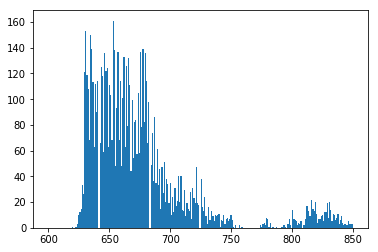

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


E:\MestradoData\p043\43_1_depth_11.yaml
1 11 E:\MestradoData\p043\43_1_depth_11.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_11.png (240, 320) (128, 128)


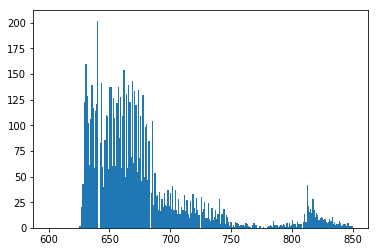

E:\MestradoData\p043\43_1_depth_21.yaml
1 21 E:\MestradoData\p043\43_1_depth_21.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_21.png (240, 320) (128, 128)


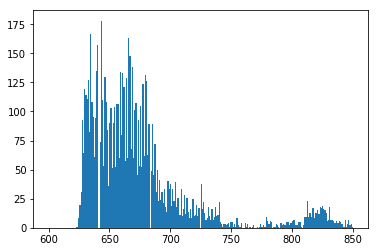

E:\MestradoData\p043\43_2_depth_1.yaml
2 1 E:\MestradoData\p043\43_2_depth_1.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_1.png (240, 320) (128, 128)


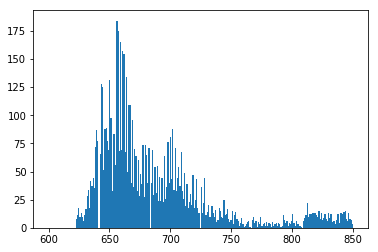

E:\MestradoData\p043\43_2_depth_11.yaml
2 11 E:\MestradoData\p043\43_2_depth_11.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_11.png (240, 320) (128, 128)


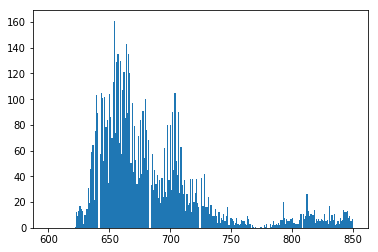

E:\MestradoData\p043\43_2_depth_21.yaml
2 21 E:\MestradoData\p043\43_2_depth_21.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_21.png (240, 320) (128, 128)


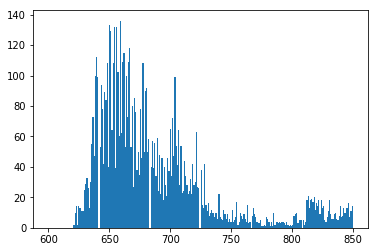

E:\MestradoData\p043\43_1_depth_31.yaml
1 31 E:\MestradoData\p043\43_1_depth_31.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_31.png (240, 320) (128, 128)


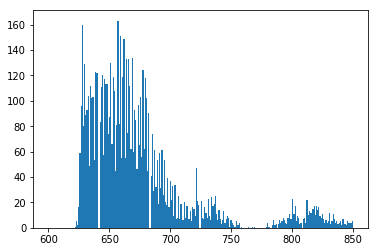

E:\MestradoData\p043\43_1_depth_41.yaml
1 41 E:\MestradoData\p043\43_1_depth_41.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_41.png (240, 320) (128, 128)


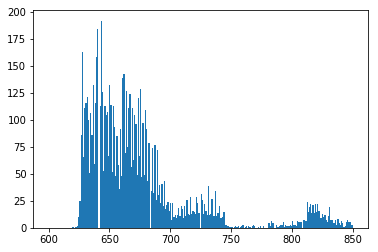

E:\MestradoData\p043\43_1_depth_51.yaml
1 51 E:\MestradoData\p043\43_1_depth_51.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_51.png (240, 320) (128, 128)


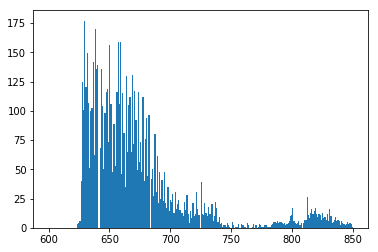

E:\MestradoData\p043\43_2_depth_31.yaml
2 31 E:\MestradoData\p043\43_2_depth_31.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_31.png (240, 320) (128, 128)


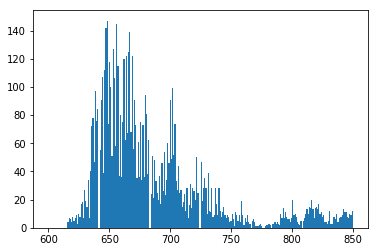

E:\MestradoData\p043\43_2_depth_41.yaml
2 41 E:\MestradoData\p043\43_2_depth_41.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_41.png (240, 320) (128, 128)


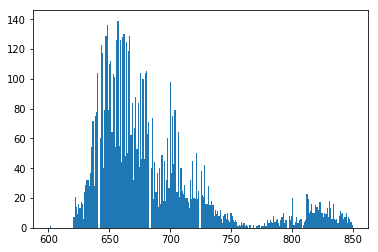

E:\MestradoData\p043\43_2_depth_51.yaml
2 51 E:\MestradoData\p043\43_2_depth_51.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_51.png (240, 320) (128, 128)


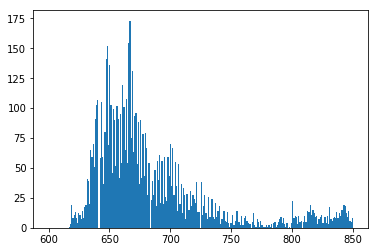

E:\MestradoData\p043\43_1_depth_61.yaml
1 61 E:\MestradoData\p043\43_1_depth_61.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_61.png (240, 320) (128, 128)


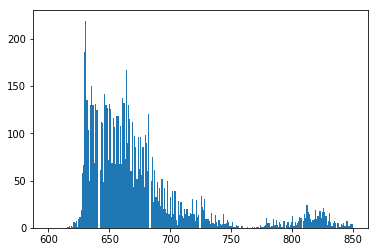

E:\MestradoData\p043\43_1_depth_71.yaml
1 71 E:\MestradoData\p043\43_1_depth_71.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_71.png (240, 320) (128, 128)


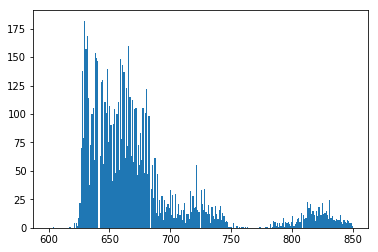

E:\MestradoData\p043\43_1_depth_81.yaml
1 81 E:\MestradoData\p043\43_1_depth_81.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_81.png (240, 320) (128, 128)


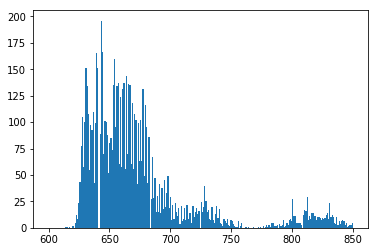

E:\MestradoData\p043\43_2_depth_61.yaml
2 61 E:\MestradoData\p043\43_2_depth_61.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_61.png (240, 320) (128, 128)


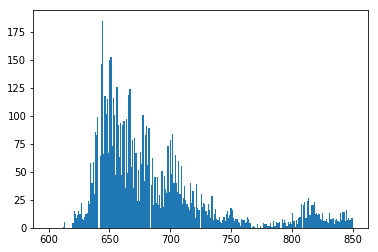

E:\MestradoData\p043\43_2_depth_71.yaml
2 71 E:\MestradoData\p043\43_2_depth_71.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_71.png (240, 320) (128, 128)


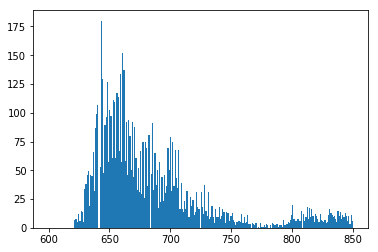

E:\MestradoData\p043\43_2_depth_81.yaml
2 81 E:\MestradoData\p043\43_2_depth_81.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_81.png (240, 320) (128, 128)


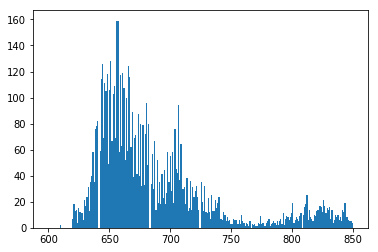

E:\MestradoData\p043\43_1_depth_91.yaml
1 91 E:\MestradoData\p043\43_1_depth_91.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_91.png (240, 320) (128, 128)


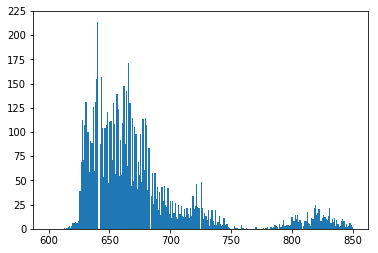

E:\MestradoData\p043\43_1_depth_101.yaml
1 101 E:\MestradoData\p043\43_1_depth_101.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_101.png (240, 320) (128, 128)


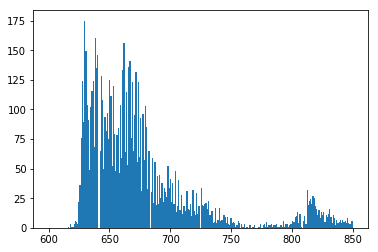

E:\MestradoData\p043\43_1_depth_111.yaml
1 111 E:\MestradoData\p043\43_1_depth_111.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_111.png (240, 320) (128, 128)


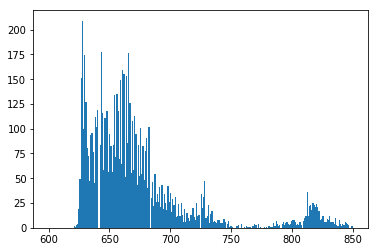

E:\MestradoData\p043\43_2_depth_91.yaml
2 91 E:\MestradoData\p043\43_2_depth_91.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_91.png (240, 320) (128, 128)


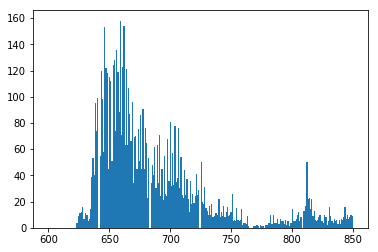

E:\MestradoData\p043\43_2_depth_101.yaml
2 101 E:\MestradoData\p043\43_2_depth_101.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_101.png (240, 320) (128, 128)


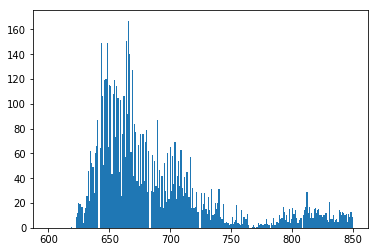

E:\MestradoData\p043\43_2_depth_111.yaml
2 111 E:\MestradoData\p043\43_2_depth_111.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_111.png (240, 320) (128, 128)


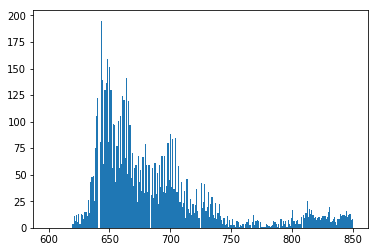

E:\MestradoData\p043\43_1_depth_121.yaml
1 121 E:\MestradoData\p043\43_1_depth_121.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_121.png (240, 320) (128, 128)


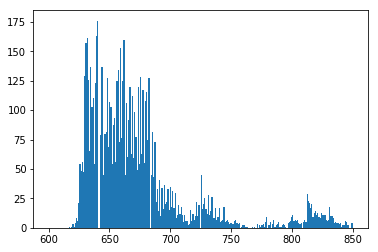

E:\MestradoData\p043\43_1_depth_131.yaml
1 131 E:\MestradoData\p043\43_1_depth_131.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_131.png (240, 320) (128, 128)


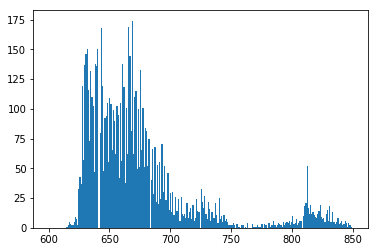

E:\MestradoData\p043\43_1_depth_141.yaml
1 141 E:\MestradoData\p043\43_1_depth_141.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_141.png (240, 320) (128, 128)


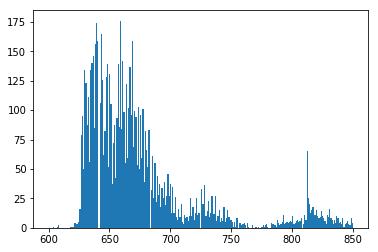

E:\MestradoData\p043\43_2_depth_121.yaml
2 121 E:\MestradoData\p043\43_2_depth_121.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_121.png (240, 320) (128, 128)


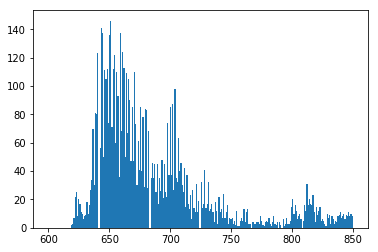

E:\MestradoData\p043\43_2_depth_131.yaml
2 131 E:\MestradoData\p043\43_2_depth_131.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_131.png (240, 320) (128, 128)


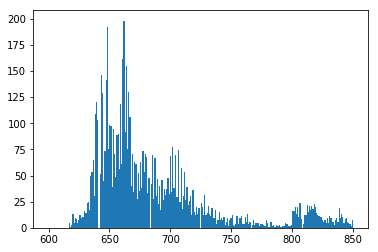

E:\MestradoData\p043\43_2_depth_141.yaml
2 141 E:\MestradoData\p043\43_2_depth_141.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_141.png (240, 320) (128, 128)


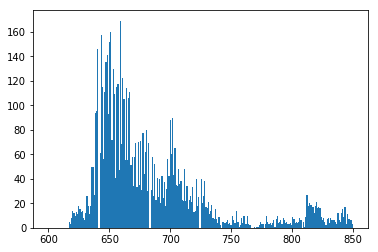

E:\MestradoData\p043\43_1_depth_151.yaml
1 151 E:\MestradoData\p043\43_1_depth_151.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_151.png (240, 320) (128, 128)


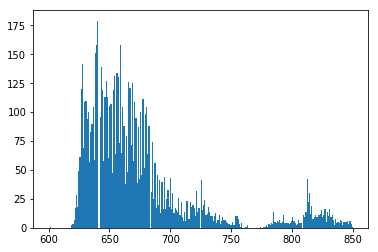

E:\MestradoData\p043\43_1_depth_161.yaml
1 161 E:\MestradoData\p043\43_1_depth_161.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_161.png (240, 320) (128, 128)


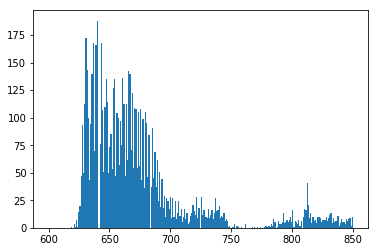

E:\MestradoData\p043\43_1_depth_171.yaml
1 171 E:\MestradoData\p043\43_1_depth_171.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_171.png (240, 320) (128, 128)


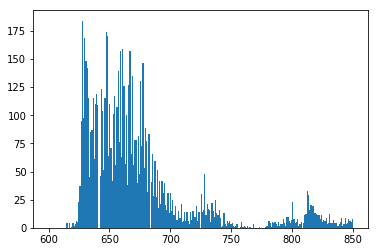

E:\MestradoData\p043\43_2_depth_151.yaml
2 151 E:\MestradoData\p043\43_2_depth_151.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_151.png (240, 320) (128, 128)


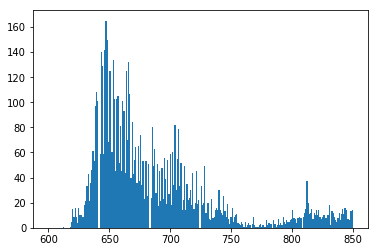

E:\MestradoData\p043\43_2_depth_161.yaml
2 161 E:\MestradoData\p043\43_2_depth_161.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_161.png (240, 320) (128, 128)


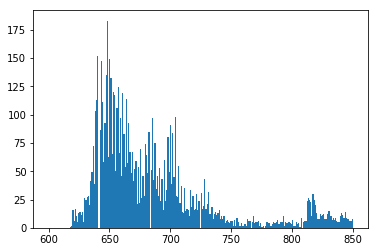

E:\MestradoData\p043\43_2_depth_171.yaml
2 171 E:\MestradoData\p043\43_2_depth_171.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_171.png (240, 320) (128, 128)


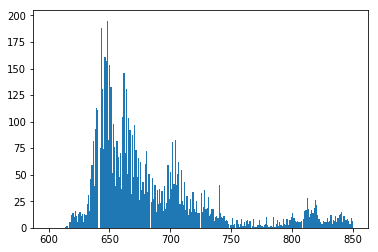

E:\MestradoData\p043\43_1_depth_181.yaml
1 181 E:\MestradoData\p043\43_1_depth_181.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_181.png (240, 320) (128, 128)


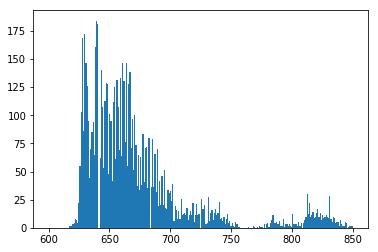

E:\MestradoData\p043\43_1_depth_191.yaml
1 191 E:\MestradoData\p043\43_1_depth_191.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_191.png (240, 320) (128, 128)


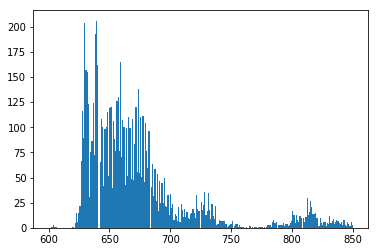

E:\MestradoData\p043\43_1_depth_201.yaml
1 201 E:\MestradoData\p043\43_1_depth_201.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_201.png (240, 320) (128, 128)


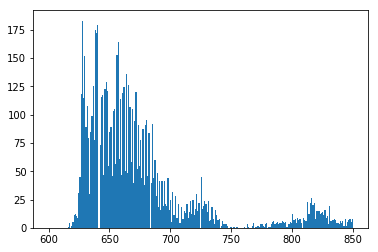

E:\MestradoData\p043\43_2_depth_181.yaml
2 181 E:\MestradoData\p043\43_2_depth_181.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_181.png (240, 320) (128, 128)


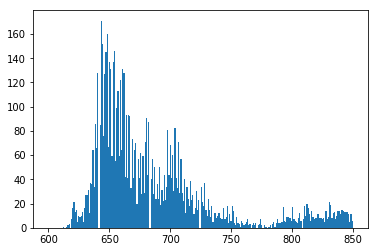

E:\MestradoData\p043\43_2_depth_191.yaml
2 191 E:\MestradoData\p043\43_2_depth_191.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_191.png (240, 320) (128, 128)


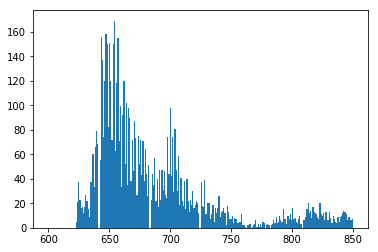

E:\MestradoData\p043\43_2_depth_201.yaml
2 201 E:\MestradoData\p043\43_2_depth_201.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_201.png (240, 320) (128, 128)


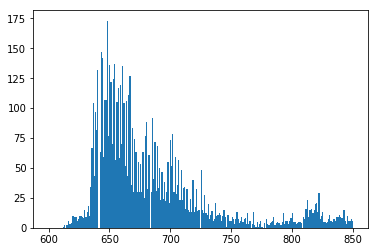

E:\MestradoData\p043\43_1_depth_211.yaml
1 211 E:\MestradoData\p043\43_1_depth_211.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_211.png (240, 320) (128, 128)


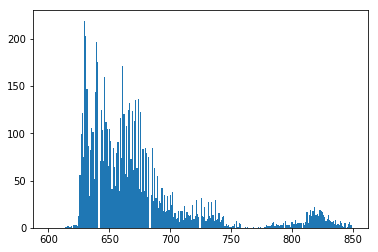

E:\MestradoData\p043\43_1_depth_221.yaml
1 221 E:\MestradoData\p043\43_1_depth_221.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_221.png (240, 320) (128, 128)


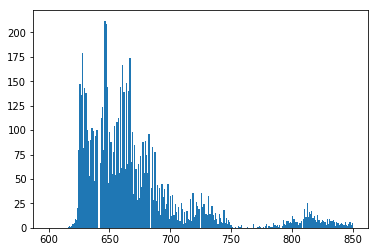

E:\MestradoData\p043\43_1_depth_231.yaml
1 231 E:\MestradoData\p043\43_1_depth_231.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_231.png (240, 320) (128, 128)


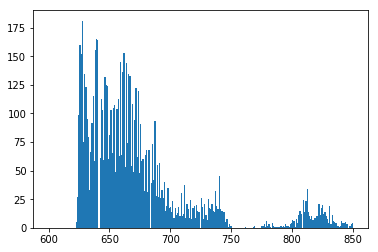

E:\MestradoData\p043\43_2_depth_211.yaml
2 211 E:\MestradoData\p043\43_2_depth_211.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_211.png (240, 320) (128, 128)


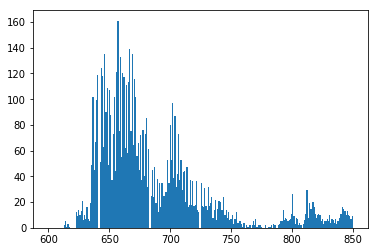

E:\MestradoData\p043\43_2_depth_221.yaml
2 221 E:\MestradoData\p043\43_2_depth_221.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_221.png (240, 320) (128, 128)


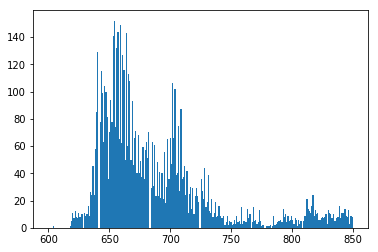

E:\MestradoData\p043\43_2_depth_231.yaml
2 231 E:\MestradoData\p043\43_2_depth_231.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_231.png (240, 320) (128, 128)


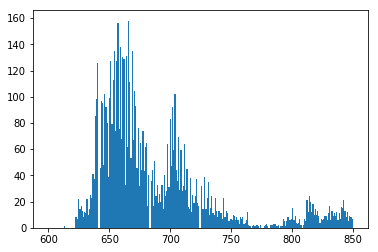

E:\MestradoData\p043\43_1_depth_241.yaml
1 241 E:\MestradoData\p043\43_1_depth_241.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_241.png (240, 320) (128, 128)


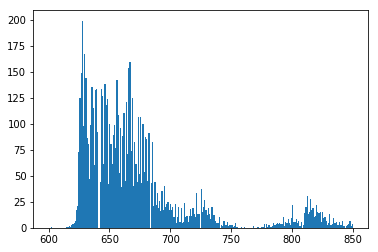

E:\MestradoData\p043\43_1_depth_251.yaml
1 251 E:\MestradoData\p043\43_1_depth_251.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_251.png (240, 320) (128, 128)


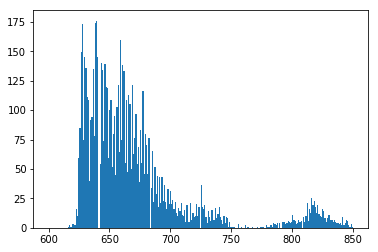

E:\MestradoData\p043\43_1_depth_261.yaml
1 261 E:\MestradoData\p043\43_1_depth_261.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_261.png (240, 320) (128, 128)


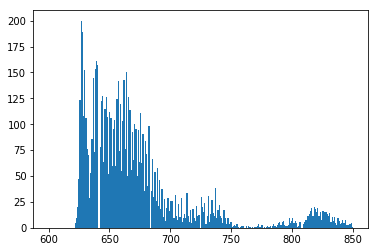

E:\MestradoData\p043\43_2_depth_241.yaml
2 241 E:\MestradoData\p043\43_2_depth_241.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_241.png (240, 320) (128, 128)


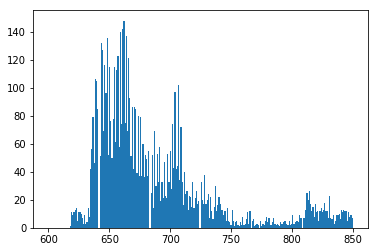

E:\MestradoData\p043\43_2_depth_251.yaml
2 251 E:\MestradoData\p043\43_2_depth_251.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_251.png (240, 320) (128, 128)


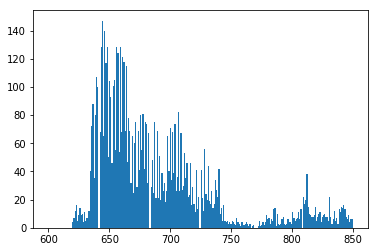

E:\MestradoData\p043\43_2_depth_261.yaml
2 261 E:\MestradoData\p043\43_2_depth_261.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_261.png (240, 320) (128, 128)


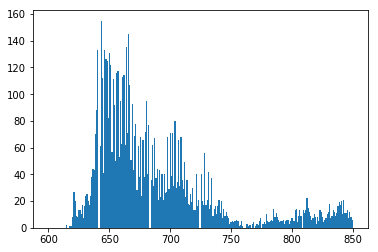

E:\MestradoData\p043\43_1_depth_271.yaml
1 271 E:\MestradoData\p043\43_1_depth_271.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_271.png (240, 320) (128, 128)


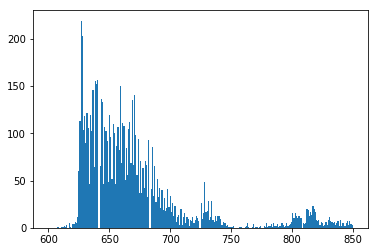

E:\MestradoData\p043\43_1_depth_281.yaml
1 281 E:\MestradoData\p043\43_1_depth_281.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_281.png (240, 320) (128, 128)


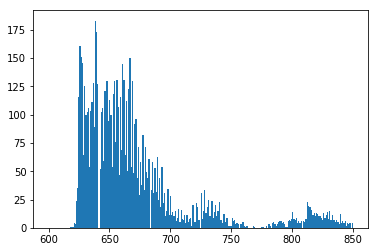

E:\MestradoData\p043\43_1_depth_291.yaml
1 291 E:\MestradoData\p043\43_1_depth_291.yaml depth E:\MestradoData\preprocessed\01\43_1_depth_291.png (240, 320) (128, 128)


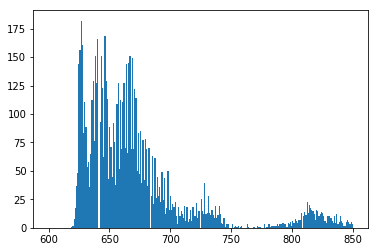

E:\MestradoData\p043\43_2_depth_271.yaml
2 271 E:\MestradoData\p043\43_2_depth_271.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_271.png (240, 320) (128, 128)


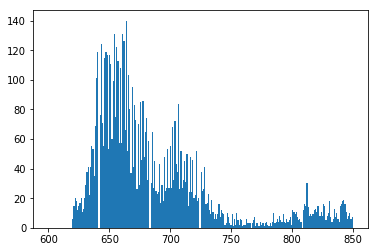

E:\MestradoData\p043\43_2_depth_281.yaml
2 281 E:\MestradoData\p043\43_2_depth_281.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_281.png (240, 320) (128, 128)


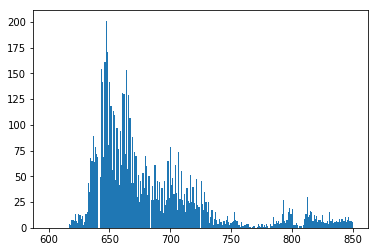

E:\MestradoData\p043\43_2_depth_291.yaml
2 291 E:\MestradoData\p043\43_2_depth_291.yaml depth E:\MestradoData\preprocessed\02\43_2_depth_291.png (240, 320) (128, 128)


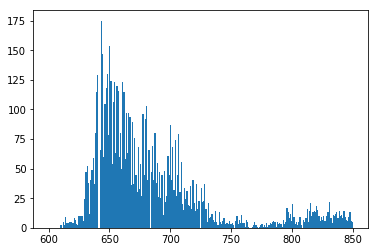

E:\MestradoData\p044\44_1_depth_1.yaml
1 1 E:\MestradoData\p044\44_1_depth_1.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_1.png (240, 320) (128, 128)


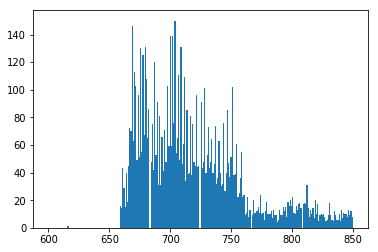

E:\MestradoData\p044\44_1_depth_11.yaml
1 11 E:\MestradoData\p044\44_1_depth_11.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_11.png (240, 320) (128, 128)


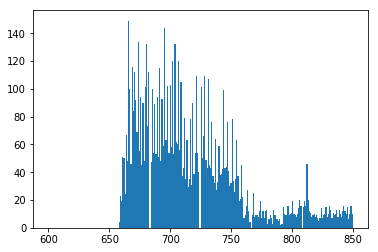

E:\MestradoData\p044\44_1_depth_21.yaml
1 21 E:\MestradoData\p044\44_1_depth_21.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_21.png (240, 320) (128, 128)


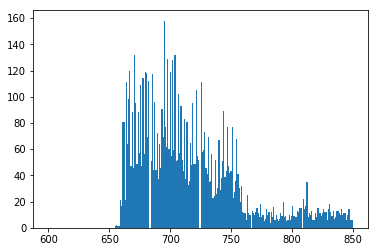

E:\MestradoData\p044\44_2_depth_1.yaml
2 1 E:\MestradoData\p044\44_2_depth_1.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_1.png (240, 320) (128, 128)


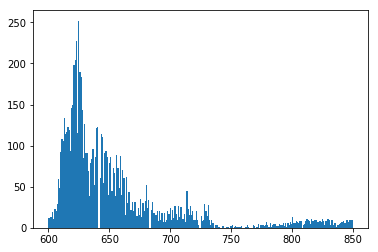

E:\MestradoData\p044\44_2_depth_11.yaml
2 11 E:\MestradoData\p044\44_2_depth_11.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_11.png (240, 320) (128, 128)


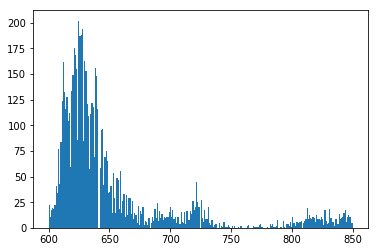

E:\MestradoData\p044\44_2_depth_21.yaml
2 21 E:\MestradoData\p044\44_2_depth_21.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_21.png (240, 320) (128, 128)


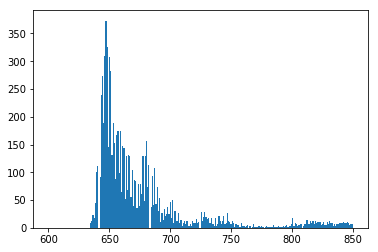

E:\MestradoData\p044\44_1_depth_31.yaml
1 31 E:\MestradoData\p044\44_1_depth_31.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_31.png (240, 320) (128, 128)


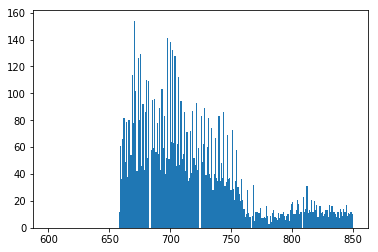

E:\MestradoData\p044\44_1_depth_41.yaml
1 41 E:\MestradoData\p044\44_1_depth_41.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_41.png (240, 320) (128, 128)


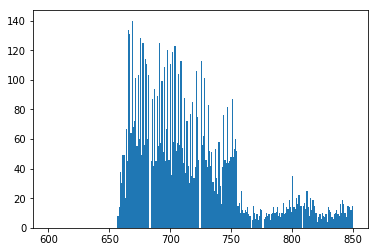

E:\MestradoData\p044\44_1_depth_51.yaml
1 51 E:\MestradoData\p044\44_1_depth_51.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_51.png (240, 320) (128, 128)


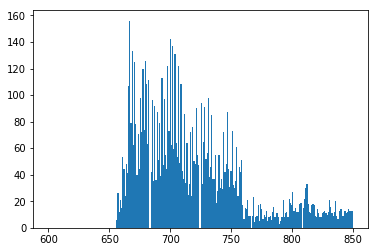

E:\MestradoData\p044\44_2_depth_31.yaml
2 31 E:\MestradoData\p044\44_2_depth_31.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_31.png (240, 320) (128, 128)


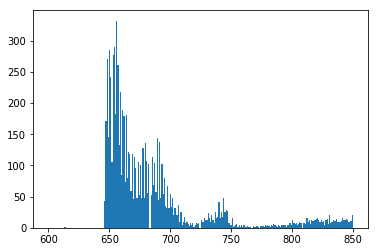

E:\MestradoData\p044\44_2_depth_41.yaml
2 41 E:\MestradoData\p044\44_2_depth_41.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_41.png (240, 320) (128, 128)


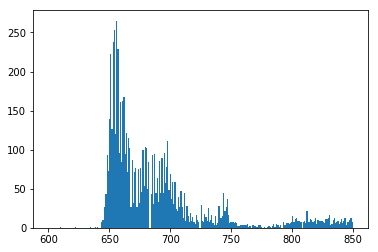

E:\MestradoData\p044\44_2_depth_51.yaml
2 51 E:\MestradoData\p044\44_2_depth_51.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_51.png (240, 320) (128, 128)


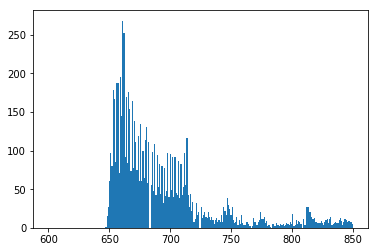

E:\MestradoData\p044\44_1_depth_61.yaml
1 61 E:\MestradoData\p044\44_1_depth_61.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_61.png (240, 320) (128, 128)


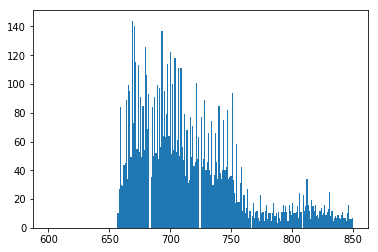

E:\MestradoData\p044\44_1_depth_71.yaml
1 71 E:\MestradoData\p044\44_1_depth_71.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_71.png (240, 320) (128, 128)


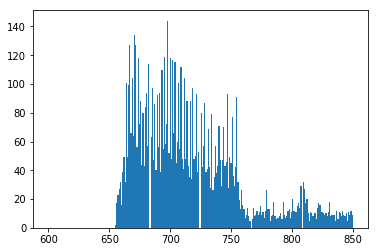

E:\MestradoData\p044\44_1_depth_81.yaml
1 81 E:\MestradoData\p044\44_1_depth_81.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_81.png (240, 320) (128, 128)


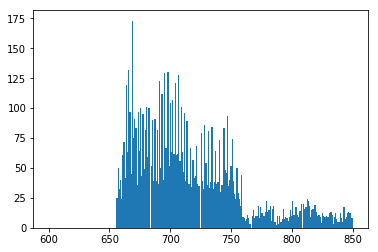

E:\MestradoData\p044\44_2_depth_61.yaml
2 61 E:\MestradoData\p044\44_2_depth_61.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_61.png (240, 320) (128, 128)


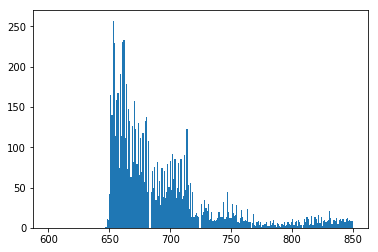

E:\MestradoData\p044\44_2_depth_71.yaml
2 71 E:\MestradoData\p044\44_2_depth_71.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_71.png (240, 320) (128, 128)


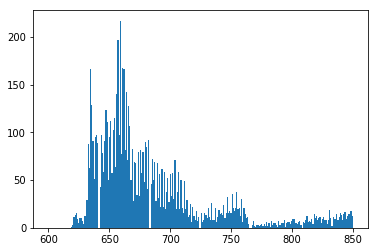

E:\MestradoData\p044\44_2_depth_81.yaml
2 81 E:\MestradoData\p044\44_2_depth_81.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_81.png (240, 320) (128, 128)


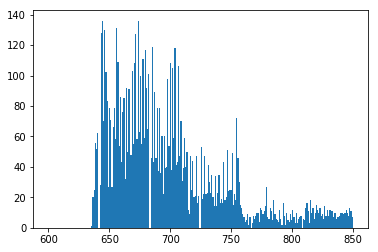

E:\MestradoData\p044\44_1_depth_91.yaml
1 91 E:\MestradoData\p044\44_1_depth_91.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_91.png (240, 320) (128, 128)


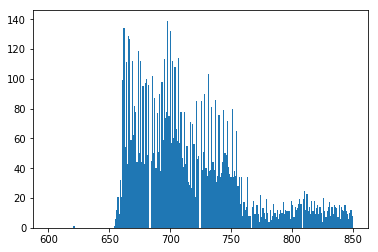

E:\MestradoData\p044\44_1_depth_101.yaml
1 101 E:\MestradoData\p044\44_1_depth_101.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_101.png (240, 320) (128, 128)


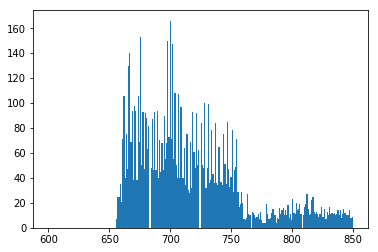

E:\MestradoData\p044\44_1_depth_111.yaml
1 111 E:\MestradoData\p044\44_1_depth_111.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_111.png (240, 320) (128, 128)


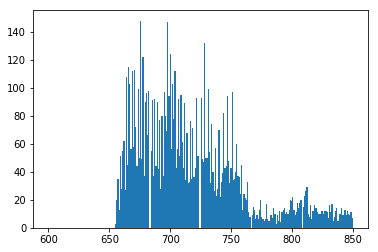

E:\MestradoData\p044\44_2_depth_91.yaml
2 91 E:\MestradoData\p044\44_2_depth_91.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_91.png (240, 320) (128, 128)


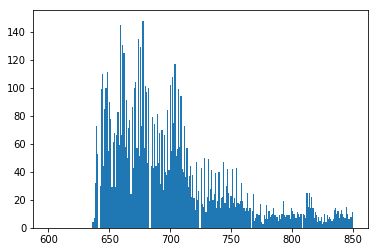

E:\MestradoData\p044\44_2_depth_101.yaml
2 101 E:\MestradoData\p044\44_2_depth_101.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_101.png (240, 320) (128, 128)


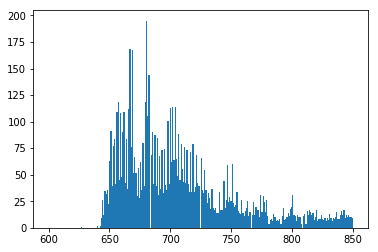

E:\MestradoData\p044\44_2_depth_111.yaml
2 111 E:\MestradoData\p044\44_2_depth_111.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_111.png (240, 320) (128, 128)


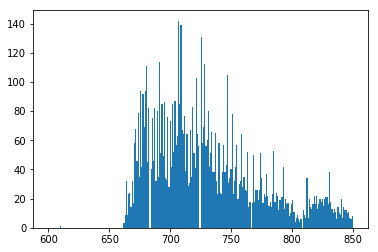

E:\MestradoData\p044\44_1_depth_121.yaml
1 121 E:\MestradoData\p044\44_1_depth_121.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_121.png (240, 320) (128, 128)


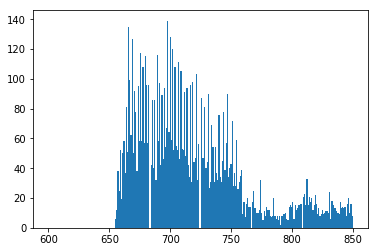

E:\MestradoData\p044\44_1_depth_131.yaml
1 131 E:\MestradoData\p044\44_1_depth_131.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_131.png (240, 320) (128, 128)


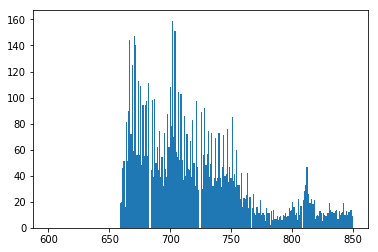

E:\MestradoData\p044\44_1_depth_141.yaml
1 141 E:\MestradoData\p044\44_1_depth_141.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_141.png (240, 320) (128, 128)


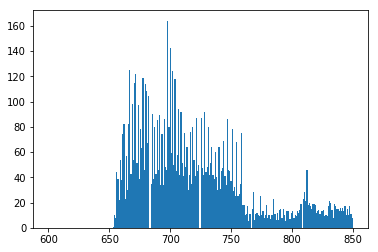

E:\MestradoData\p044\44_2_depth_121.yaml
2 121 E:\MestradoData\p044\44_2_depth_121.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_121.png (240, 320) (128, 128)


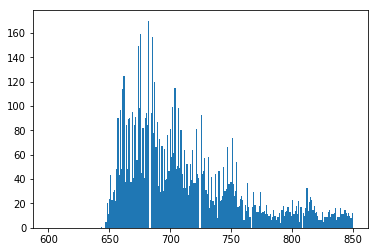

E:\MestradoData\p044\44_2_depth_131.yaml
2 131 E:\MestradoData\p044\44_2_depth_131.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_131.png (240, 320) (128, 128)


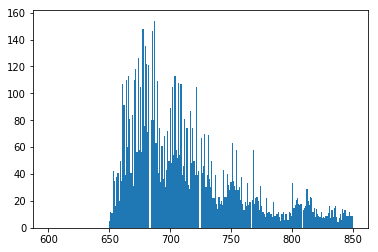

E:\MestradoData\p044\44_2_depth_141.yaml
2 141 E:\MestradoData\p044\44_2_depth_141.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_141.png (240, 320) (128, 128)


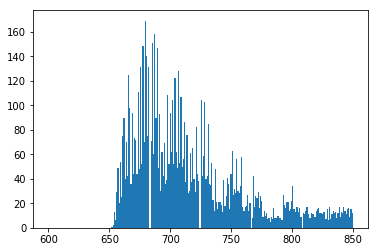

E:\MestradoData\p044\44_1_depth_151.yaml
1 151 E:\MestradoData\p044\44_1_depth_151.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_151.png (240, 320) (128, 128)


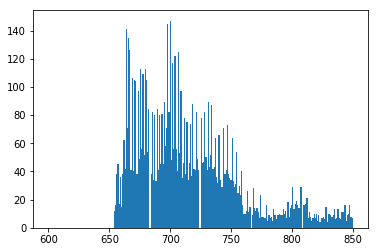

E:\MestradoData\p044\44_1_depth_161.yaml
1 161 E:\MestradoData\p044\44_1_depth_161.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_161.png (240, 320) (128, 128)


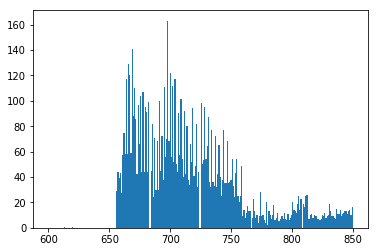

E:\MestradoData\p044\44_1_depth_171.yaml
1 171 E:\MestradoData\p044\44_1_depth_171.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_171.png (240, 320) (128, 128)


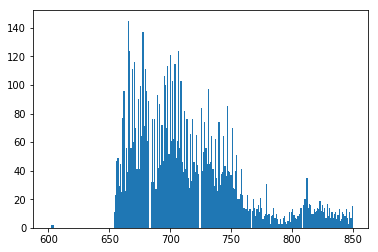

E:\MestradoData\p044\44_2_depth_151.yaml
2 151 E:\MestradoData\p044\44_2_depth_151.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_151.png (240, 320) (128, 128)


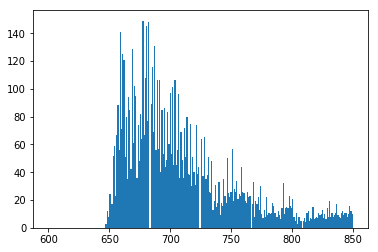

E:\MestradoData\p044\44_2_depth_161.yaml
2 161 E:\MestradoData\p044\44_2_depth_161.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_161.png (240, 320) (128, 128)


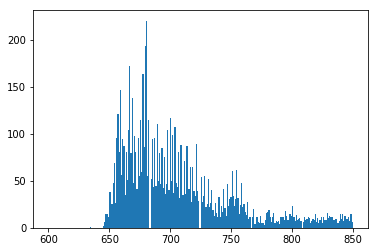

E:\MestradoData\p044\44_2_depth_171.yaml
2 171 E:\MestradoData\p044\44_2_depth_171.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_171.png (240, 320) (128, 128)


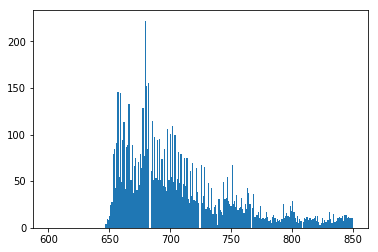

E:\MestradoData\p044\44_1_depth_181.yaml
1 181 E:\MestradoData\p044\44_1_depth_181.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_181.png (240, 320) (128, 128)


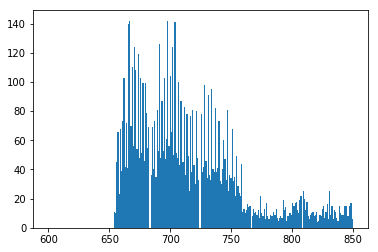

E:\MestradoData\p044\44_1_depth_191.yaml
1 191 E:\MestradoData\p044\44_1_depth_191.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_191.png (240, 320) (128, 128)


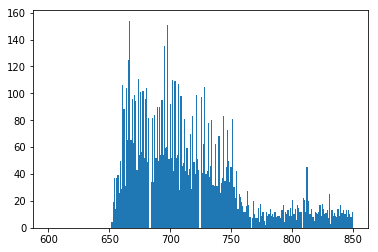

E:\MestradoData\p044\44_1_depth_201.yaml
1 201 E:\MestradoData\p044\44_1_depth_201.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_201.png (240, 320) (128, 128)


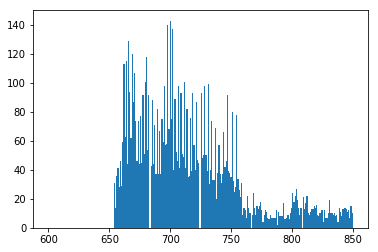

E:\MestradoData\p044\44_2_depth_181.yaml
2 181 E:\MestradoData\p044\44_2_depth_181.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_181.png (240, 320) (128, 128)


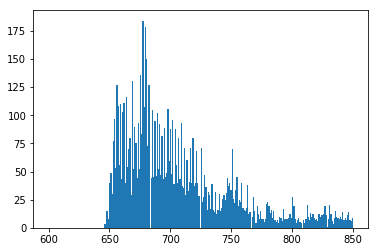

E:\MestradoData\p044\44_2_depth_191.yaml
2 191 E:\MestradoData\p044\44_2_depth_191.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_191.png (240, 320) (128, 128)


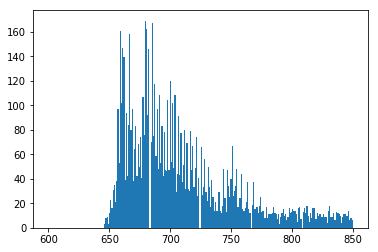

E:\MestradoData\p044\44_2_depth_201.yaml
2 201 E:\MestradoData\p044\44_2_depth_201.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_201.png (240, 320) (128, 128)


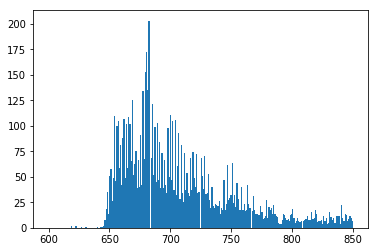

E:\MestradoData\p044\44_1_depth_211.yaml
1 211 E:\MestradoData\p044\44_1_depth_211.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_211.png (240, 320) (128, 128)


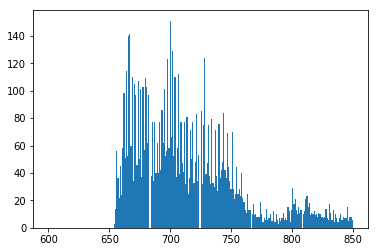

E:\MestradoData\p044\44_1_depth_221.yaml
1 221 E:\MestradoData\p044\44_1_depth_221.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_221.png (240, 320) (128, 128)


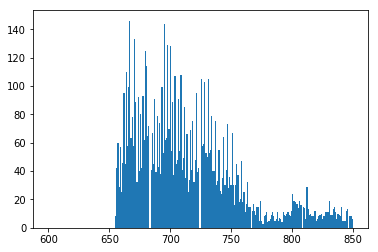

E:\MestradoData\p044\44_1_depth_231.yaml
1 231 E:\MestradoData\p044\44_1_depth_231.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_231.png (240, 320) (128, 128)


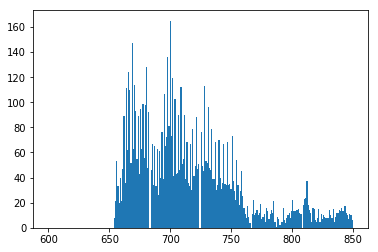

E:\MestradoData\p044\44_2_depth_211.yaml
2 211 E:\MestradoData\p044\44_2_depth_211.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_211.png (240, 320) (128, 128)


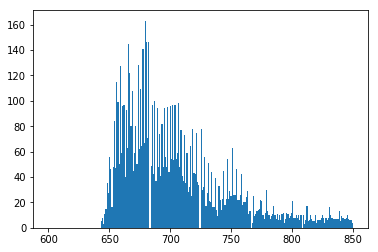

E:\MestradoData\p044\44_2_depth_221.yaml
2 221 E:\MestradoData\p044\44_2_depth_221.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_221.png (240, 320) (128, 128)


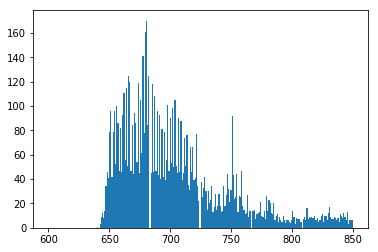

E:\MestradoData\p044\44_2_depth_231.yaml
2 231 E:\MestradoData\p044\44_2_depth_231.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_231.png (240, 320) (128, 128)


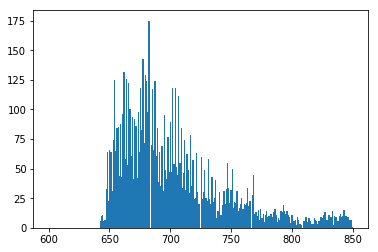

E:\MestradoData\p044\44_1_depth_241.yaml
1 241 E:\MestradoData\p044\44_1_depth_241.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_241.png (240, 320) (128, 128)


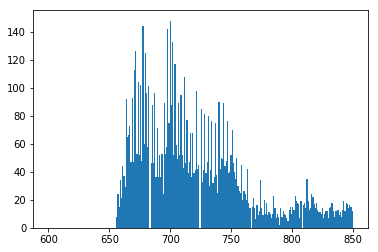

E:\MestradoData\p044\44_1_depth_251.yaml
1 251 E:\MestradoData\p044\44_1_depth_251.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_251.png (240, 320) (128, 128)


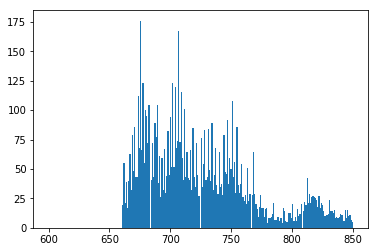

E:\MestradoData\p044\44_1_depth_261.yaml
1 261 E:\MestradoData\p044\44_1_depth_261.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_261.png (240, 320) (128, 128)


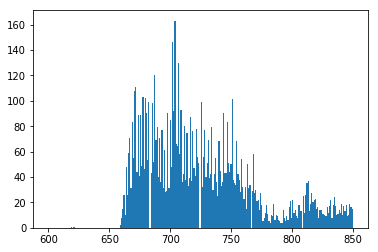

E:\MestradoData\p044\44_2_depth_241.yaml
2 241 E:\MestradoData\p044\44_2_depth_241.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_241.png (240, 320) (128, 128)


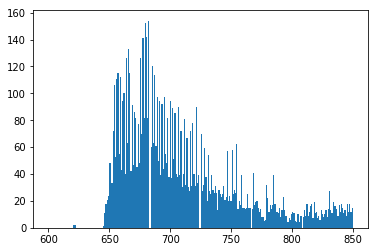

E:\MestradoData\p044\44_2_depth_251.yaml
2 251 E:\MestradoData\p044\44_2_depth_251.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_251.png (240, 320) (128, 128)


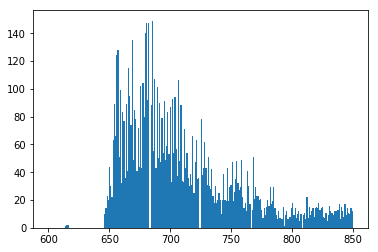

E:\MestradoData\p044\44_2_depth_261.yaml
2 261 E:\MestradoData\p044\44_2_depth_261.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_261.png (240, 320) (128, 128)


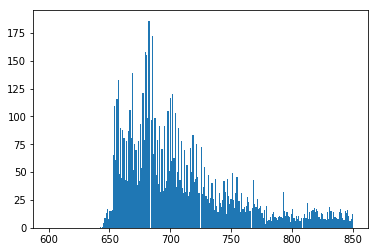

E:\MestradoData\p044\44_1_depth_271.yaml
1 271 E:\MestradoData\p044\44_1_depth_271.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_271.png (240, 320) (128, 128)


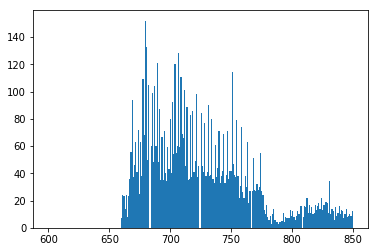

E:\MestradoData\p044\44_1_depth_281.yaml
1 281 E:\MestradoData\p044\44_1_depth_281.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_281.png (240, 320) (128, 128)


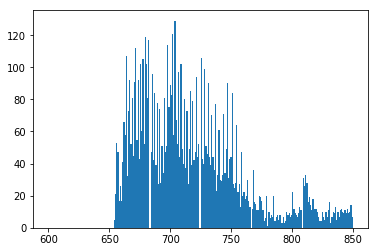

E:\MestradoData\p044\44_1_depth_291.yaml
1 291 E:\MestradoData\p044\44_1_depth_291.yaml depth E:\MestradoData\preprocessed\01\44_1_depth_291.png (240, 320) (128, 128)


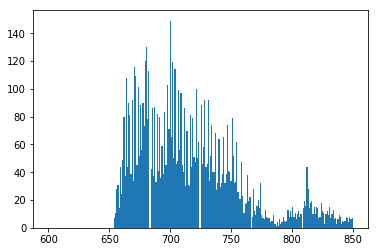

E:\MestradoData\p044\44_2_depth_271.yaml
2 271 E:\MestradoData\p044\44_2_depth_271.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_271.png (240, 320) (128, 128)


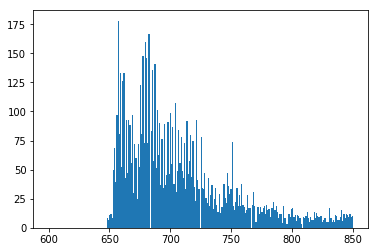

E:\MestradoData\p044\44_2_depth_281.yaml
2 281 E:\MestradoData\p044\44_2_depth_281.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_281.png (240, 320) (128, 128)


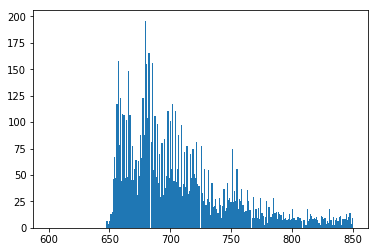

E:\MestradoData\p044\44_2_depth_291.yaml
2 291 E:\MestradoData\p044\44_2_depth_291.yaml depth E:\MestradoData\preprocessed\02\44_2_depth_291.png (240, 320) (128, 128)


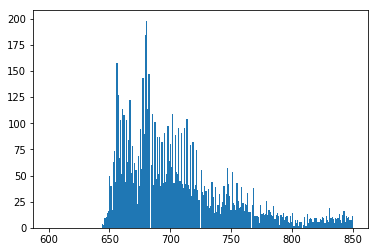

E:\MestradoData\p043\43_5_depth_1.yaml
5 1 E:\MestradoData\p043\43_5_depth_1.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_1.png (240, 320) (128, 128)


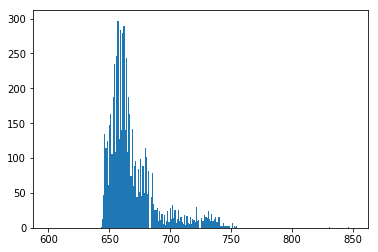

E:\MestradoData\p043\43_5_depth_11.yaml
5 11 E:\MestradoData\p043\43_5_depth_11.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_11.png (240, 320) (128, 128)


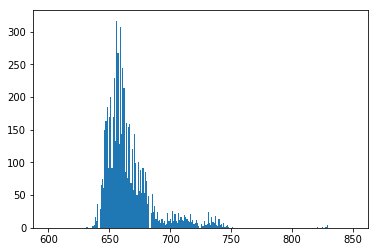

E:\MestradoData\p043\43_5_depth_21.yaml
5 21 E:\MestradoData\p043\43_5_depth_21.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_21.png (240, 320) (128, 128)


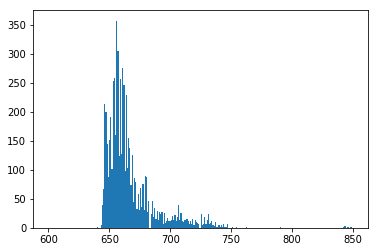

E:\MestradoData\p043\43_6_depth_1.yaml
6 1 E:\MestradoData\p043\43_6_depth_1.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_1.png (240, 320) (128, 128)


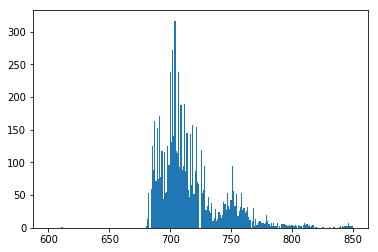

E:\MestradoData\p043\43_6_depth_11.yaml
6 11 E:\MestradoData\p043\43_6_depth_11.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_11.png (240, 320) (128, 128)


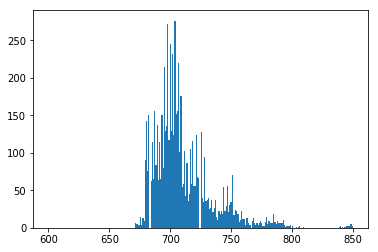

E:\MestradoData\p043\43_6_depth_21.yaml
6 21 E:\MestradoData\p043\43_6_depth_21.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_21.png (240, 320) (128, 128)


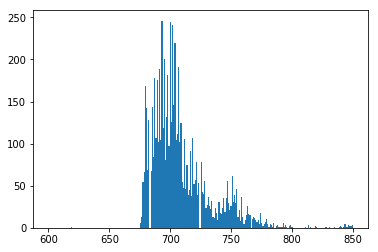

E:\MestradoData\p043\43_5_depth_31.yaml
5 31 E:\MestradoData\p043\43_5_depth_31.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_31.png (240, 320) (128, 128)


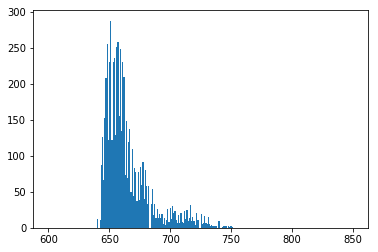

E:\MestradoData\p043\43_5_depth_41.yaml
5 41 E:\MestradoData\p043\43_5_depth_41.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_41.png (240, 320) (128, 128)


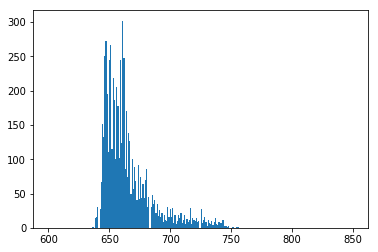

E:\MestradoData\p043\43_5_depth_51.yaml
5 51 E:\MestradoData\p043\43_5_depth_51.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_51.png (240, 320) (128, 128)


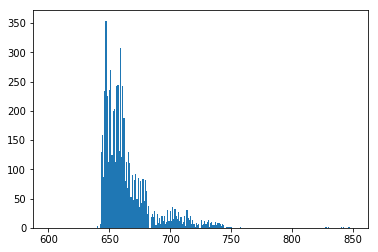

E:\MestradoData\p043\43_6_depth_31.yaml
6 31 E:\MestradoData\p043\43_6_depth_31.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_31.png (240, 320) (128, 128)


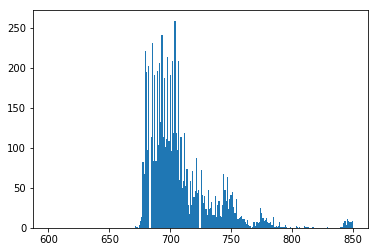

E:\MestradoData\p043\43_6_depth_41.yaml
6 41 E:\MestradoData\p043\43_6_depth_41.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_41.png (240, 320) (128, 128)


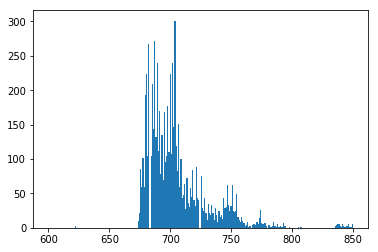

E:\MestradoData\p043\43_6_depth_51.yaml
6 51 E:\MestradoData\p043\43_6_depth_51.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_51.png (240, 320) (128, 128)


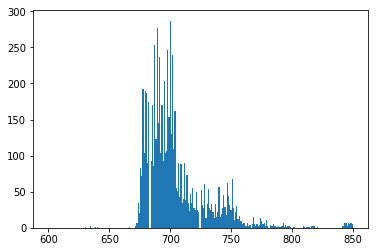

E:\MestradoData\p043\43_5_depth_61.yaml
5 61 E:\MestradoData\p043\43_5_depth_61.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_61.png (240, 320) (128, 128)


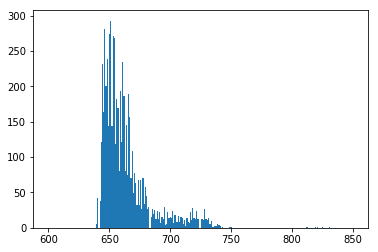

E:\MestradoData\p043\43_5_depth_71.yaml
5 71 E:\MestradoData\p043\43_5_depth_71.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_71.png (240, 320) (128, 128)


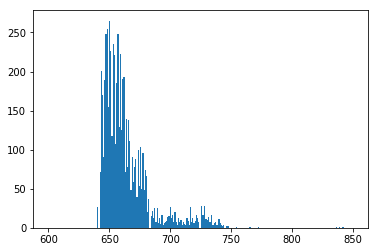

E:\MestradoData\p043\43_5_depth_81.yaml
5 81 E:\MestradoData\p043\43_5_depth_81.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_81.png (240, 320) (128, 128)


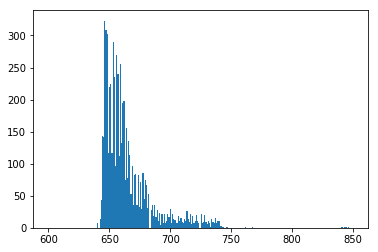

E:\MestradoData\p043\43_6_depth_61.yaml
6 61 E:\MestradoData\p043\43_6_depth_61.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_61.png (240, 320) (128, 128)


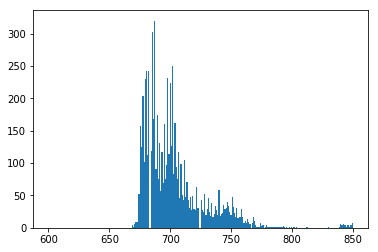

E:\MestradoData\p043\43_6_depth_71.yaml
6 71 E:\MestradoData\p043\43_6_depth_71.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_71.png (240, 320) (128, 128)


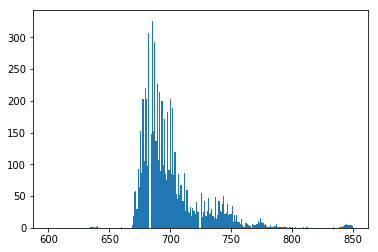

E:\MestradoData\p043\43_6_depth_81.yaml
6 81 E:\MestradoData\p043\43_6_depth_81.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_81.png (240, 320) (128, 128)


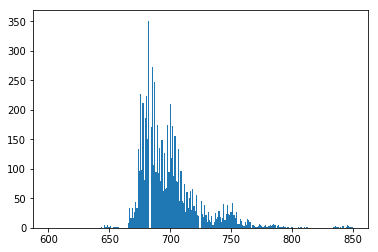

E:\MestradoData\p043\43_5_depth_91.yaml
5 91 E:\MestradoData\p043\43_5_depth_91.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_91.png (240, 320) (128, 128)


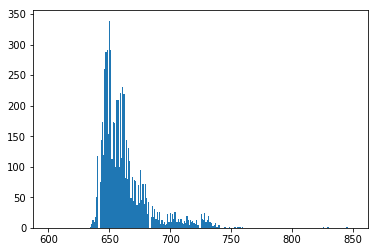

E:\MestradoData\p043\43_5_depth_101.yaml
5 101 E:\MestradoData\p043\43_5_depth_101.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_101.png (240, 320) (128, 128)


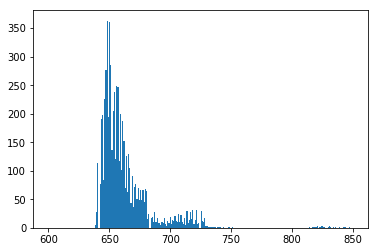

E:\MestradoData\p043\43_5_depth_111.yaml
5 111 E:\MestradoData\p043\43_5_depth_111.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_111.png (240, 320) (128, 128)


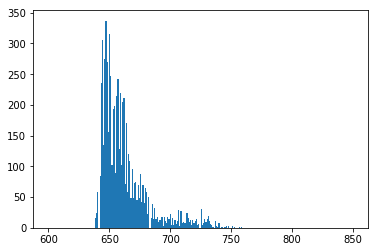

E:\MestradoData\p043\43_6_depth_91.yaml
6 91 E:\MestradoData\p043\43_6_depth_91.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_91.png (240, 320) (128, 128)


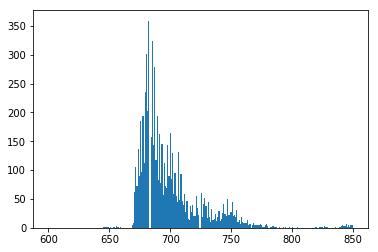

E:\MestradoData\p043\43_6_depth_101.yaml
6 101 E:\MestradoData\p043\43_6_depth_101.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_101.png (240, 320) (128, 128)


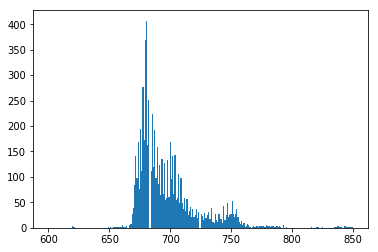

E:\MestradoData\p043\43_6_depth_111.yaml
6 111 E:\MestradoData\p043\43_6_depth_111.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_111.png (240, 320) (128, 128)


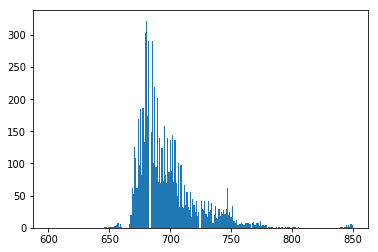

E:\MestradoData\p043\43_5_depth_121.yaml
5 121 E:\MestradoData\p043\43_5_depth_121.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_121.png (240, 320) (128, 128)


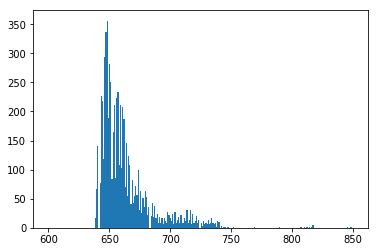

E:\MestradoData\p043\43_5_depth_131.yaml
5 131 E:\MestradoData\p043\43_5_depth_131.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_131.png (240, 320) (128, 128)


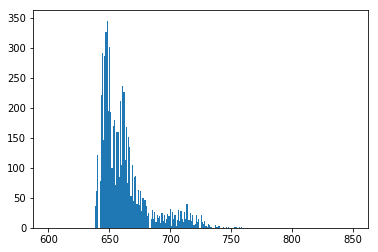

E:\MestradoData\p043\43_5_depth_141.yaml
5 141 E:\MestradoData\p043\43_5_depth_141.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_141.png (240, 320) (128, 128)


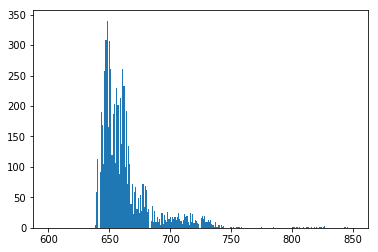

E:\MestradoData\p043\43_6_depth_121.yaml
6 121 E:\MestradoData\p043\43_6_depth_121.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_121.png (240, 320) (128, 128)


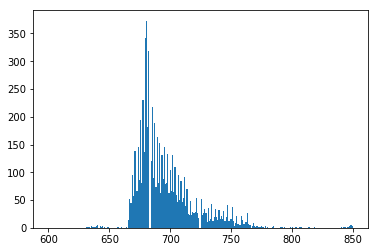

E:\MestradoData\p043\43_6_depth_131.yaml
6 131 E:\MestradoData\p043\43_6_depth_131.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_131.png (240, 320) (128, 128)


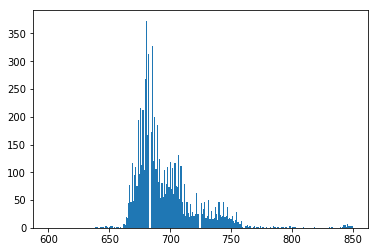

E:\MestradoData\p043\43_6_depth_141.yaml
6 141 E:\MestradoData\p043\43_6_depth_141.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_141.png (240, 320) (128, 128)


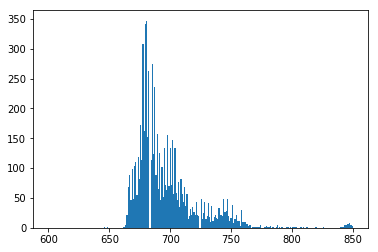

E:\MestradoData\p043\43_5_depth_151.yaml
5 151 E:\MestradoData\p043\43_5_depth_151.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_151.png (240, 320) (128, 128)


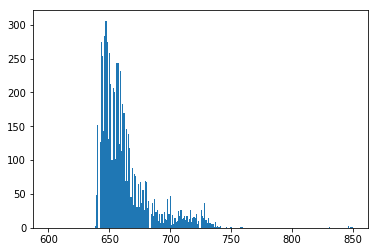

E:\MestradoData\p043\43_5_depth_161.yaml
5 161 E:\MestradoData\p043\43_5_depth_161.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_161.png (240, 320) (128, 128)


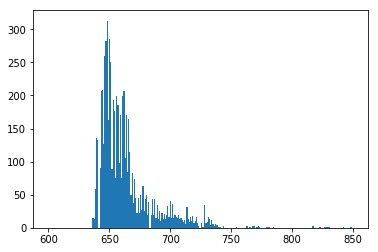

E:\MestradoData\p043\43_5_depth_171.yaml
5 171 E:\MestradoData\p043\43_5_depth_171.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_171.png (240, 320) (128, 128)


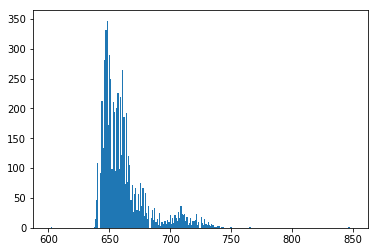

E:\MestradoData\p043\43_6_depth_151.yaml
6 151 E:\MestradoData\p043\43_6_depth_151.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_151.png (240, 320) (128, 128)


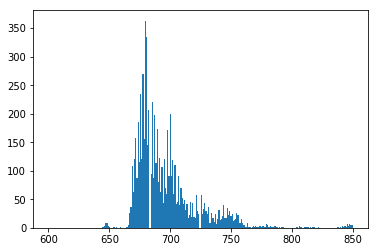

E:\MestradoData\p043\43_6_depth_161.yaml
6 161 E:\MestradoData\p043\43_6_depth_161.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_161.png (240, 320) (128, 128)


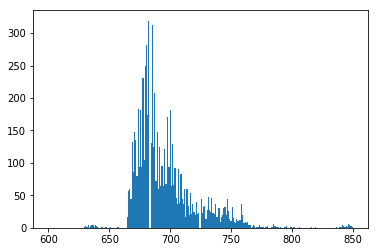

E:\MestradoData\p043\43_6_depth_171.yaml
6 171 E:\MestradoData\p043\43_6_depth_171.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_171.png (240, 320) (128, 128)


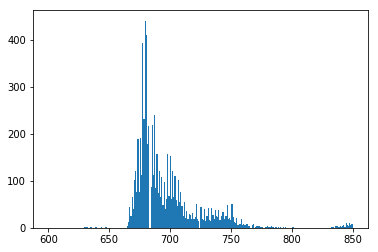

E:\MestradoData\p043\43_5_depth_181.yaml
5 181 E:\MestradoData\p043\43_5_depth_181.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_181.png (240, 320) (128, 128)


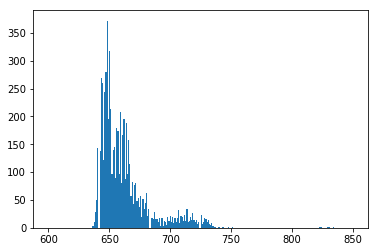

E:\MestradoData\p043\43_5_depth_191.yaml
5 191 E:\MestradoData\p043\43_5_depth_191.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_191.png (240, 320) (128, 128)


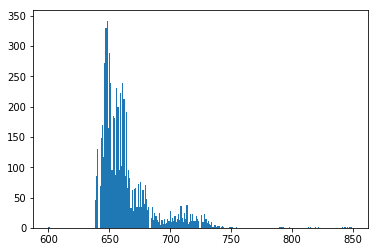

E:\MestradoData\p043\43_5_depth_201.yaml
5 201 E:\MestradoData\p043\43_5_depth_201.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_201.png (240, 320) (128, 128)


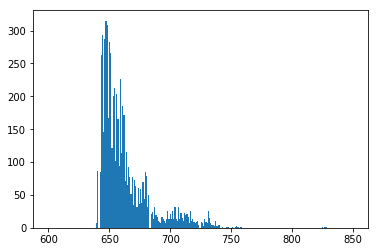

E:\MestradoData\p043\43_6_depth_181.yaml
6 181 E:\MestradoData\p043\43_6_depth_181.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_181.png (240, 320) (128, 128)


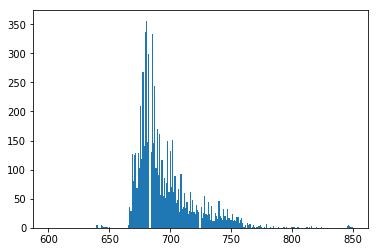

E:\MestradoData\p043\43_6_depth_191.yaml
6 191 E:\MestradoData\p043\43_6_depth_191.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_191.png (240, 320) (128, 128)


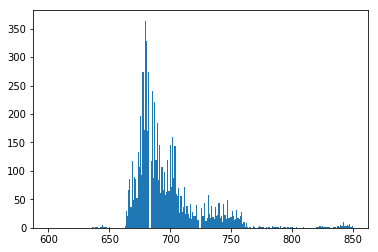

E:\MestradoData\p043\43_6_depth_201.yaml
6 201 E:\MestradoData\p043\43_6_depth_201.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_201.png (240, 320) (128, 128)


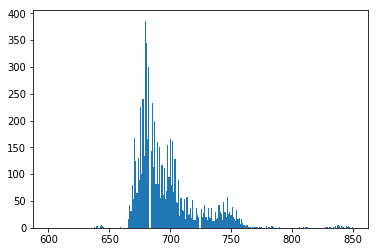

E:\MestradoData\p043\43_5_depth_211.yaml
5 211 E:\MestradoData\p043\43_5_depth_211.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_211.png (240, 320) (128, 128)


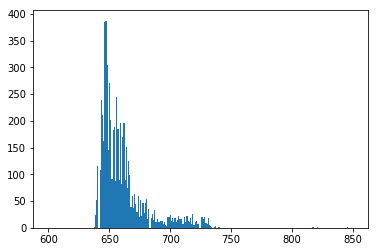

E:\MestradoData\p043\43_5_depth_221.yaml
5 221 E:\MestradoData\p043\43_5_depth_221.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_221.png (240, 320) (128, 128)


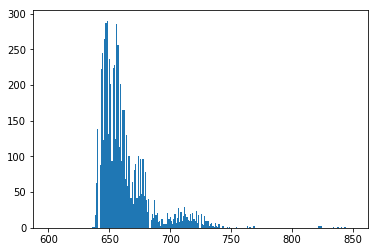

E:\MestradoData\p043\43_5_depth_231.yaml
5 231 E:\MestradoData\p043\43_5_depth_231.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_231.png (240, 320) (128, 128)


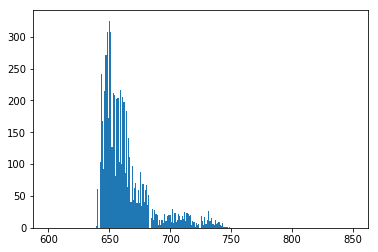

E:\MestradoData\p043\43_6_depth_211.yaml
6 211 E:\MestradoData\p043\43_6_depth_211.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_211.png (240, 320) (128, 128)


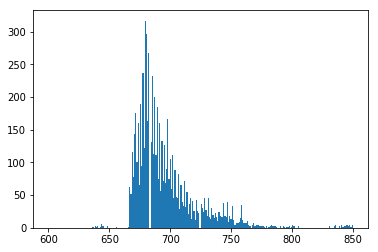

E:\MestradoData\p043\43_6_depth_221.yaml
6 221 E:\MestradoData\p043\43_6_depth_221.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_221.png (240, 320) (128, 128)


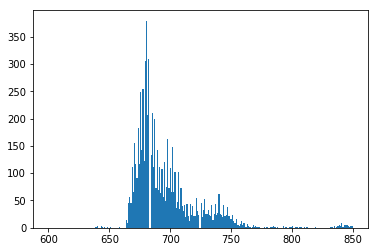

E:\MestradoData\p043\43_6_depth_231.yaml
6 231 E:\MestradoData\p043\43_6_depth_231.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_231.png (240, 320) (128, 128)


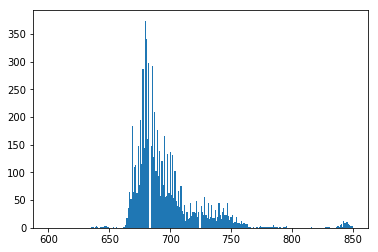

E:\MestradoData\p043\43_5_depth_241.yaml
5 241 E:\MestradoData\p043\43_5_depth_241.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_241.png (240, 320) (128, 128)


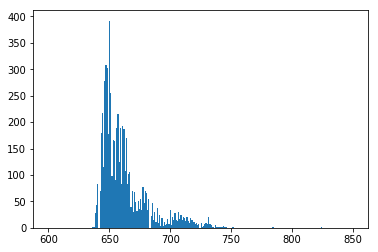

E:\MestradoData\p043\43_5_depth_251.yaml
5 251 E:\MestradoData\p043\43_5_depth_251.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_251.png (240, 320) (128, 128)


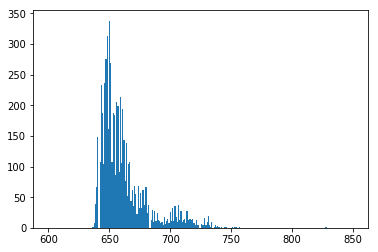

E:\MestradoData\p043\43_5_depth_261.yaml
5 261 E:\MestradoData\p043\43_5_depth_261.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_261.png (240, 320) (128, 128)


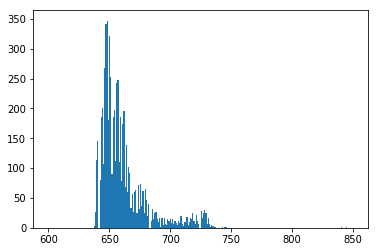

E:\MestradoData\p043\43_6_depth_241.yaml
6 241 E:\MestradoData\p043\43_6_depth_241.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_241.png (240, 320) (128, 128)


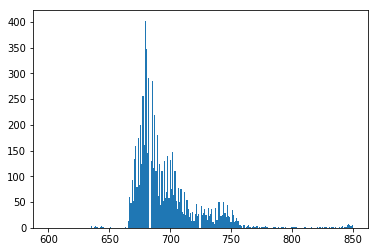

E:\MestradoData\p043\43_6_depth_251.yaml
6 251 E:\MestradoData\p043\43_6_depth_251.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_251.png (240, 320) (128, 128)


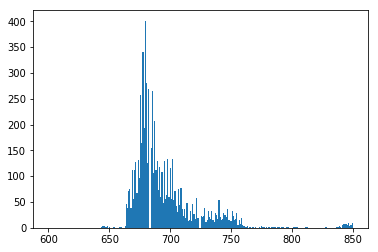

E:\MestradoData\p043\43_6_depth_261.yaml
6 261 E:\MestradoData\p043\43_6_depth_261.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_261.png (240, 320) (128, 128)


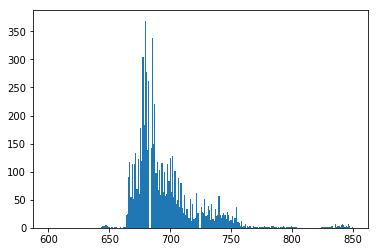

E:\MestradoData\p043\43_5_depth_271.yaml
5 271 E:\MestradoData\p043\43_5_depth_271.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_271.png (240, 320) (128, 128)


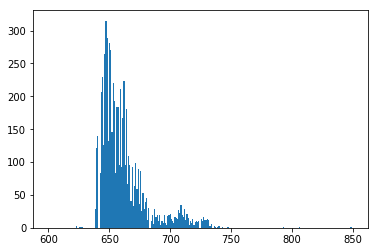

E:\MestradoData\p043\43_5_depth_281.yaml
5 281 E:\MestradoData\p043\43_5_depth_281.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_281.png (240, 320) (128, 128)


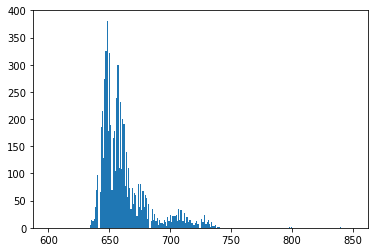

E:\MestradoData\p043\43_5_depth_291.yaml
5 291 E:\MestradoData\p043\43_5_depth_291.yaml depth E:\MestradoData\preprocessed\05\43_5_depth_291.png (240, 320) (128, 128)


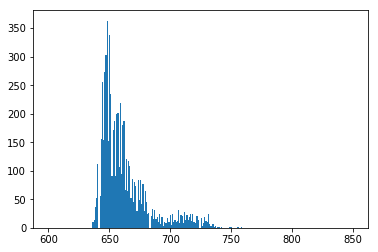

E:\MestradoData\p043\43_6_depth_271.yaml
6 271 E:\MestradoData\p043\43_6_depth_271.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_271.png (240, 320) (128, 128)


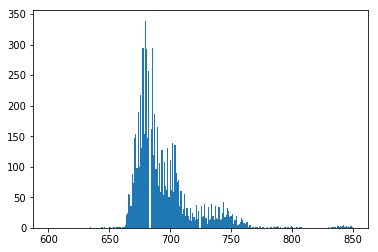

E:\MestradoData\p043\43_6_depth_281.yaml
6 281 E:\MestradoData\p043\43_6_depth_281.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_281.png (240, 320) (128, 128)


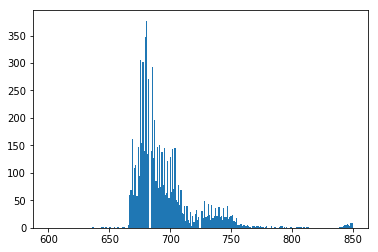

E:\MestradoData\p043\43_6_depth_291.yaml
6 291 E:\MestradoData\p043\43_6_depth_291.yaml depth E:\MestradoData\preprocessed\06\43_6_depth_291.png (240, 320) (128, 128)


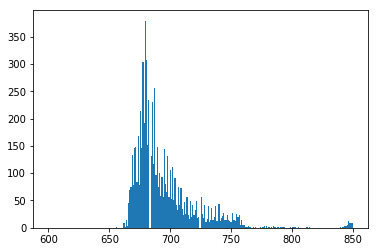

E:\MestradoData\p044\44_5_depth_1.yaml
5 1 E:\MestradoData\p044\44_5_depth_1.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_1.png (240, 320) (128, 128)


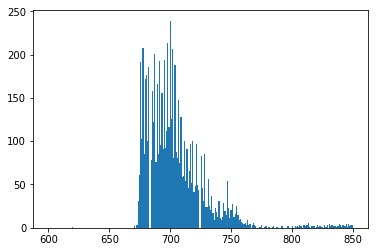

E:\MestradoData\p044\44_5_depth_11.yaml
5 11 E:\MestradoData\p044\44_5_depth_11.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_11.png (240, 320) (128, 128)


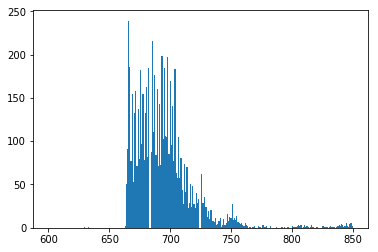

E:\MestradoData\p044\44_5_depth_21.yaml
5 21 E:\MestradoData\p044\44_5_depth_21.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_21.png (240, 320) (128, 128)


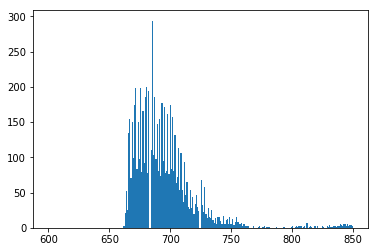

E:\MestradoData\p044\44_6_depth_1.yaml
6 1 E:\MestradoData\p044\44_6_depth_1.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_1.png (240, 320) (128, 128)


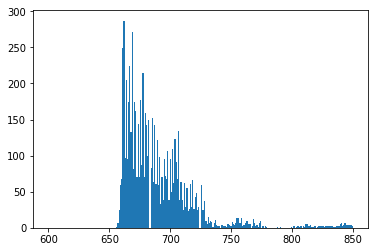

E:\MestradoData\p044\44_6_depth_11.yaml
6 11 E:\MestradoData\p044\44_6_depth_11.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_11.png (240, 320) (128, 128)


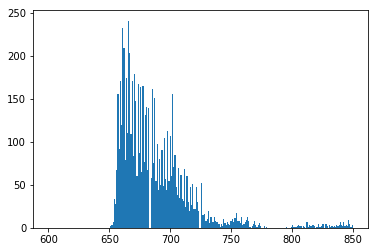

E:\MestradoData\p044\44_6_depth_21.yaml
6 21 E:\MestradoData\p044\44_6_depth_21.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_21.png (240, 320) (128, 128)


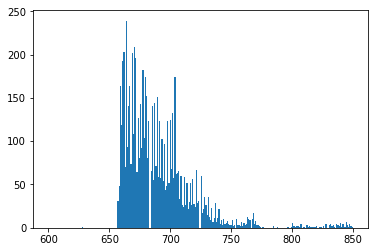

E:\MestradoData\p044\44_5_depth_31.yaml
5 31 E:\MestradoData\p044\44_5_depth_31.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_31.png (240, 320) (128, 128)


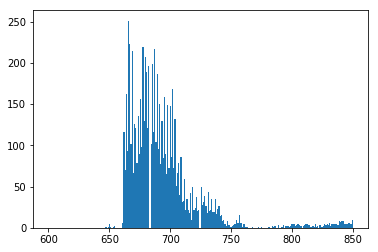

E:\MestradoData\p044\44_5_depth_41.yaml
5 41 E:\MestradoData\p044\44_5_depth_41.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_41.png (240, 320) (128, 128)


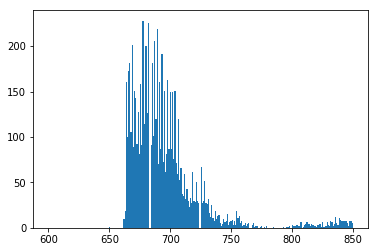

E:\MestradoData\p044\44_5_depth_51.yaml
5 51 E:\MestradoData\p044\44_5_depth_51.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_51.png (240, 320) (128, 128)


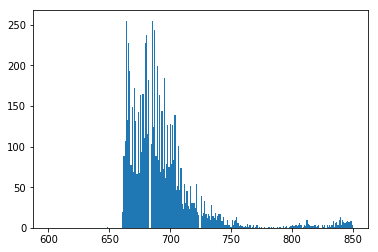

E:\MestradoData\p044\44_6_depth_31.yaml
6 31 E:\MestradoData\p044\44_6_depth_31.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_31.png (240, 320) (128, 128)


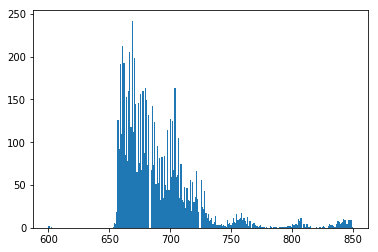

E:\MestradoData\p044\44_6_depth_41.yaml
6 41 E:\MestradoData\p044\44_6_depth_41.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_41.png (240, 320) (128, 128)


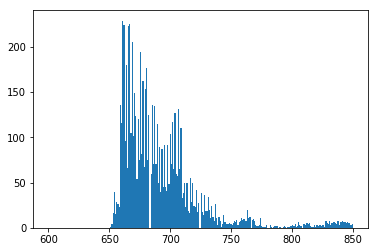

E:\MestradoData\p044\44_6_depth_51.yaml
6 51 E:\MestradoData\p044\44_6_depth_51.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_51.png (240, 320) (128, 128)


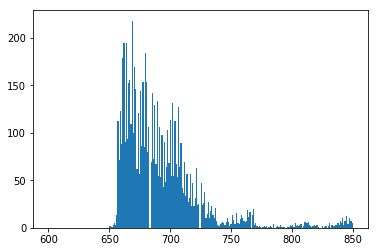

E:\MestradoData\p044\44_5_depth_61.yaml
5 61 E:\MestradoData\p044\44_5_depth_61.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_61.png (240, 320) (128, 128)


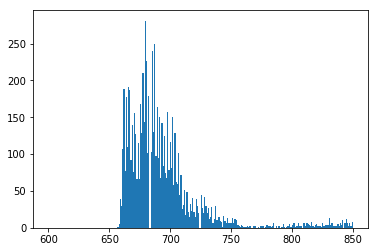

E:\MestradoData\p044\44_5_depth_71.yaml
5 71 E:\MestradoData\p044\44_5_depth_71.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_71.png (240, 320) (128, 128)


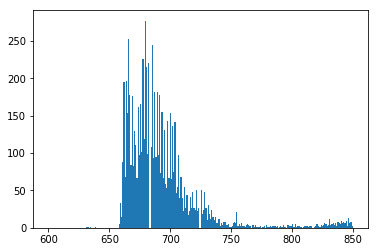

E:\MestradoData\p044\44_5_depth_81.yaml
5 81 E:\MestradoData\p044\44_5_depth_81.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_81.png (240, 320) (128, 128)


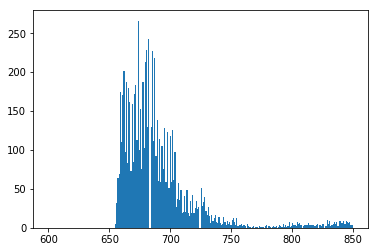

E:\MestradoData\p044\44_6_depth_61.yaml
6 61 E:\MestradoData\p044\44_6_depth_61.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_61.png (240, 320) (128, 128)


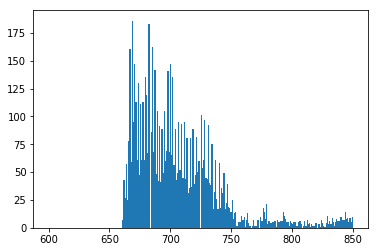

E:\MestradoData\p044\44_6_depth_71.yaml
6 71 E:\MestradoData\p044\44_6_depth_71.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_71.png (240, 320) (128, 128)


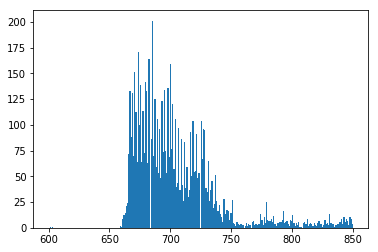

E:\MestradoData\p044\44_6_depth_81.yaml
6 81 E:\MestradoData\p044\44_6_depth_81.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_81.png (240, 320) (128, 128)


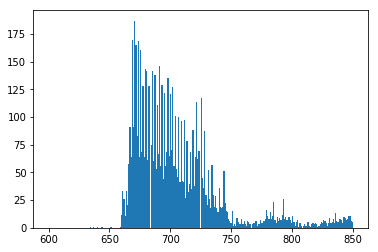

E:\MestradoData\p044\44_5_depth_91.yaml
5 91 E:\MestradoData\p044\44_5_depth_91.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_91.png (240, 320) (128, 128)


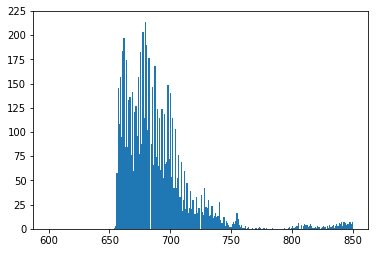

E:\MestradoData\p044\44_5_depth_101.yaml
5 101 E:\MestradoData\p044\44_5_depth_101.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_101.png (240, 320) (128, 128)


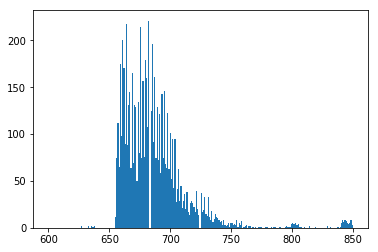

E:\MestradoData\p044\44_5_depth_111.yaml
5 111 E:\MestradoData\p044\44_5_depth_111.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_111.png (240, 320) (128, 128)


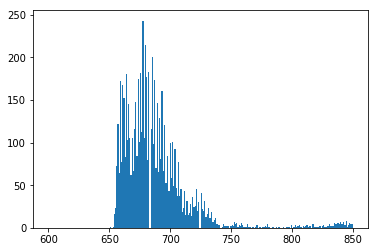

E:\MestradoData\p044\44_6_depth_91.yaml
6 91 E:\MestradoData\p044\44_6_depth_91.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_91.png (240, 320) (128, 128)


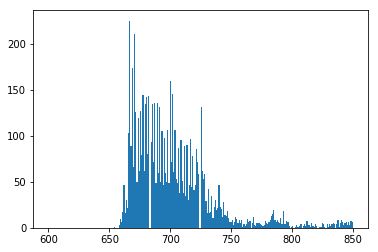

E:\MestradoData\p044\44_6_depth_101.yaml
6 101 E:\MestradoData\p044\44_6_depth_101.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_101.png (240, 320) (128, 128)


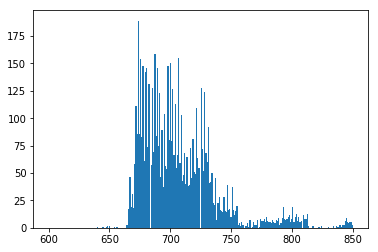

E:\MestradoData\p044\44_6_depth_111.yaml
6 111 E:\MestradoData\p044\44_6_depth_111.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_111.png (240, 320) (128, 128)


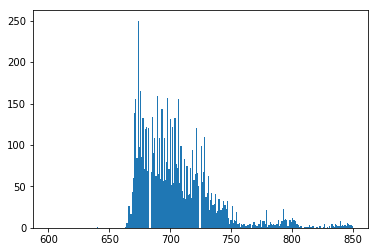

E:\MestradoData\p044\44_5_depth_121.yaml
5 121 E:\MestradoData\p044\44_5_depth_121.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_121.png (240, 320) (128, 128)


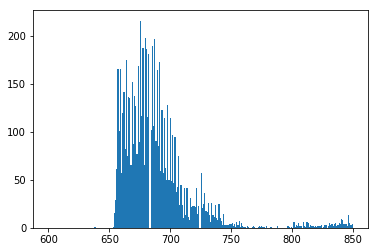

E:\MestradoData\p044\44_5_depth_131.yaml
5 131 E:\MestradoData\p044\44_5_depth_131.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_131.png (240, 320) (128, 128)


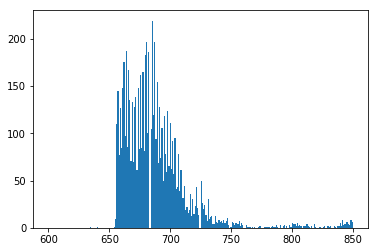

E:\MestradoData\p044\44_5_depth_141.yaml
5 141 E:\MestradoData\p044\44_5_depth_141.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_141.png (240, 320) (128, 128)


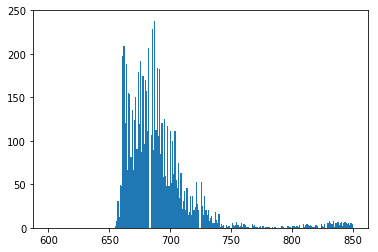

E:\MestradoData\p044\44_6_depth_121.yaml
6 121 E:\MestradoData\p044\44_6_depth_121.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_121.png (240, 320) (128, 128)


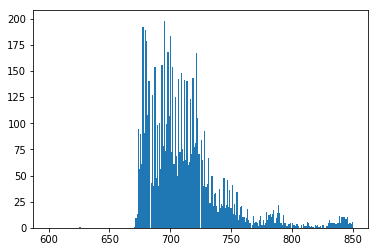

E:\MestradoData\p044\44_6_depth_131.yaml
6 131 E:\MestradoData\p044\44_6_depth_131.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_131.png (240, 320) (128, 128)


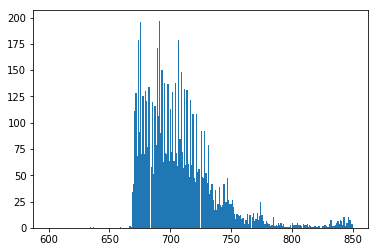

E:\MestradoData\p044\44_6_depth_141.yaml
6 141 E:\MestradoData\p044\44_6_depth_141.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_141.png (240, 320) (128, 128)


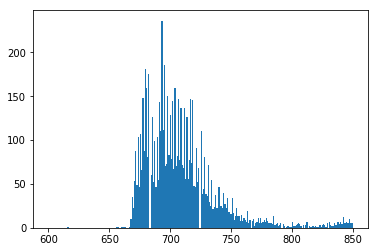

E:\MestradoData\p044\44_5_depth_151.yaml
5 151 E:\MestradoData\p044\44_5_depth_151.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_151.png (240, 320) (128, 128)


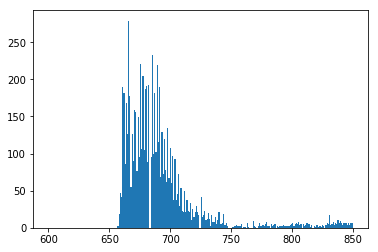

E:\MestradoData\p044\44_5_depth_161.yaml
5 161 E:\MestradoData\p044\44_5_depth_161.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_161.png (240, 320) (128, 128)


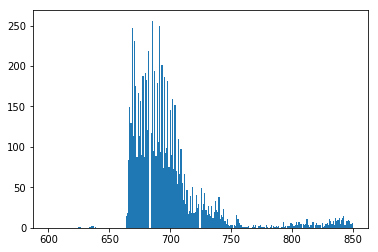

E:\MestradoData\p044\44_5_depth_171.yaml
5 171 E:\MestradoData\p044\44_5_depth_171.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_171.png (240, 320) (128, 128)


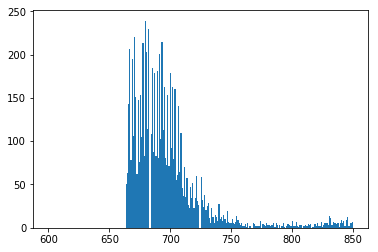

E:\MestradoData\p044\44_6_depth_151.yaml
6 151 E:\MestradoData\p044\44_6_depth_151.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_151.png (240, 320) (128, 128)


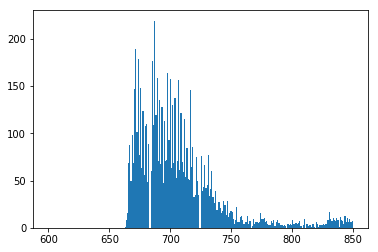

E:\MestradoData\p044\44_6_depth_161.yaml
6 161 E:\MestradoData\p044\44_6_depth_161.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_161.png (240, 320) (128, 128)


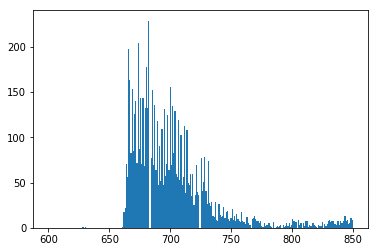

E:\MestradoData\p044\44_6_depth_171.yaml
6 171 E:\MestradoData\p044\44_6_depth_171.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_171.png (240, 320) (128, 128)


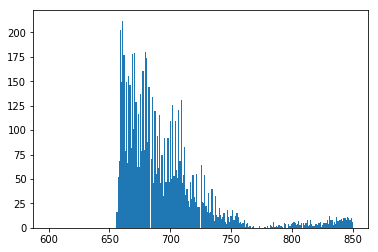

E:\MestradoData\p044\44_5_depth_181.yaml
5 181 E:\MestradoData\p044\44_5_depth_181.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_181.png (240, 320) (128, 128)


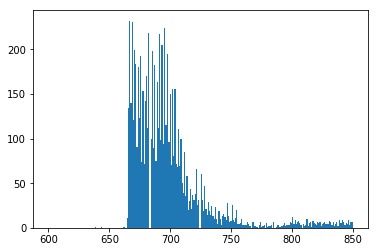

E:\MestradoData\p044\44_5_depth_191.yaml
5 191 E:\MestradoData\p044\44_5_depth_191.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_191.png (240, 320) (128, 128)


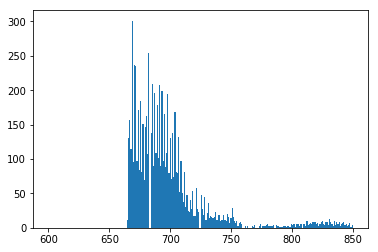

E:\MestradoData\p044\44_5_depth_201.yaml
5 201 E:\MestradoData\p044\44_5_depth_201.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_201.png (240, 320) (128, 128)


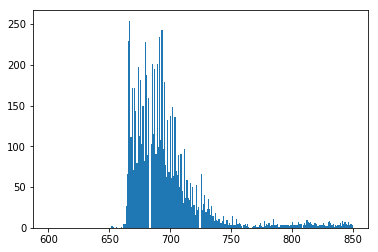

E:\MestradoData\p044\44_6_depth_181.yaml
6 181 E:\MestradoData\p044\44_6_depth_181.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_181.png (240, 320) (128, 128)


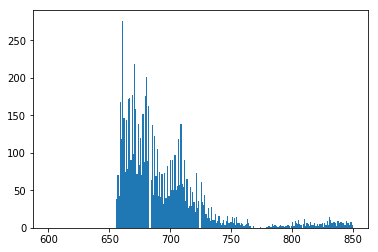

E:\MestradoData\p044\44_6_depth_191.yaml
6 191 E:\MestradoData\p044\44_6_depth_191.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_191.png (240, 320) (128, 128)


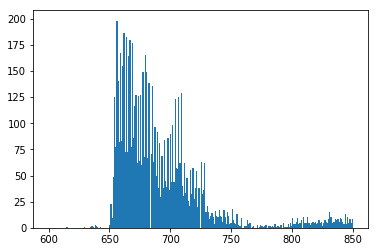

E:\MestradoData\p044\44_6_depth_201.yaml
6 201 E:\MestradoData\p044\44_6_depth_201.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_201.png (240, 320) (128, 128)


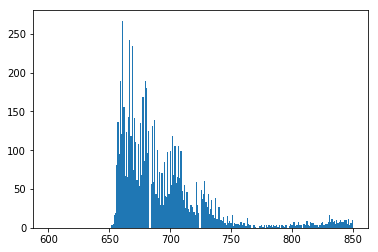

E:\MestradoData\p044\44_5_depth_211.yaml
5 211 E:\MestradoData\p044\44_5_depth_211.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_211.png (240, 320) (128, 128)


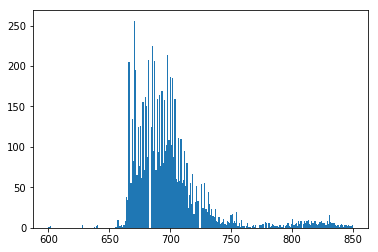

E:\MestradoData\p044\44_5_depth_221.yaml
5 221 E:\MestradoData\p044\44_5_depth_221.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_221.png (240, 320) (128, 128)


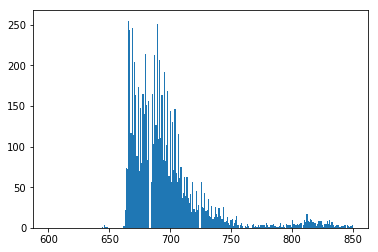

E:\MestradoData\p044\44_5_depth_231.yaml
5 231 E:\MestradoData\p044\44_5_depth_231.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_231.png (240, 320) (128, 128)


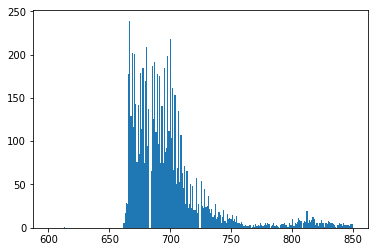

E:\MestradoData\p044\44_6_depth_211.yaml
6 211 E:\MestradoData\p044\44_6_depth_211.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_211.png (240, 320) (128, 128)


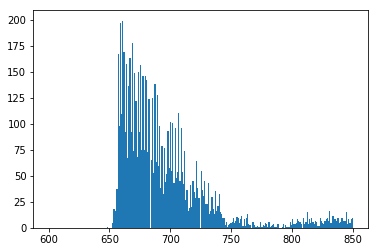

E:\MestradoData\p044\44_6_depth_221.yaml
6 221 E:\MestradoData\p044\44_6_depth_221.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_221.png (240, 320) (128, 128)


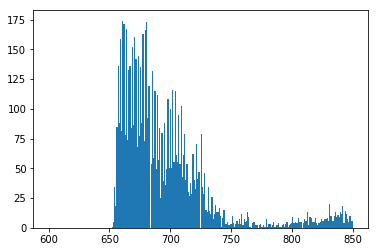

E:\MestradoData\p044\44_6_depth_231.yaml
6 231 E:\MestradoData\p044\44_6_depth_231.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_231.png (240, 320) (128, 128)


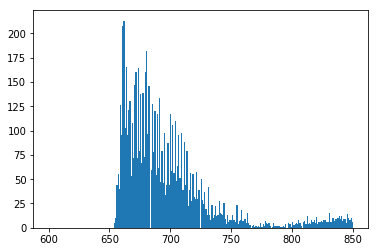

E:\MestradoData\p044\44_5_depth_241.yaml
5 241 E:\MestradoData\p044\44_5_depth_241.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_241.png (240, 320) (128, 128)


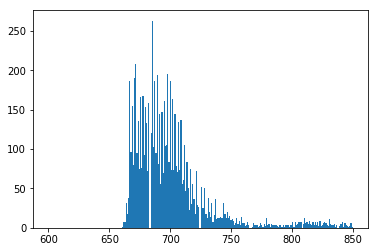

E:\MestradoData\p044\44_5_depth_251.yaml
5 251 E:\MestradoData\p044\44_5_depth_251.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_251.png (240, 320) (128, 128)


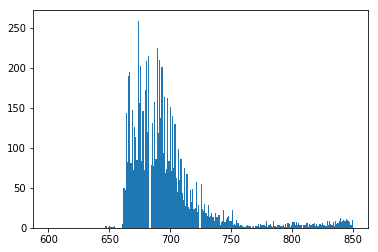

E:\MestradoData\p044\44_5_depth_261.yaml
5 261 E:\MestradoData\p044\44_5_depth_261.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_261.png (240, 320) (128, 128)


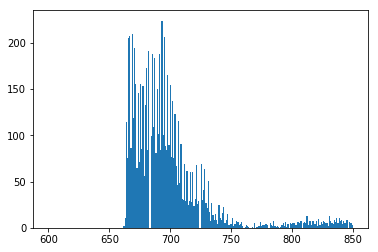

E:\MestradoData\p044\44_6_depth_241.yaml
6 241 E:\MestradoData\p044\44_6_depth_241.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_241.png (240, 320) (128, 128)


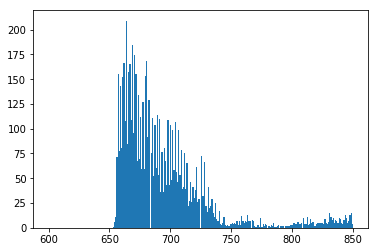

E:\MestradoData\p044\44_6_depth_251.yaml
6 251 E:\MestradoData\p044\44_6_depth_251.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_251.png (240, 320) (128, 128)


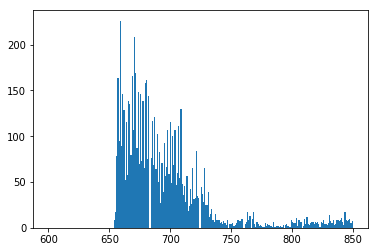

E:\MestradoData\p044\44_6_depth_261.yaml
6 261 E:\MestradoData\p044\44_6_depth_261.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_261.png (240, 320) (128, 128)


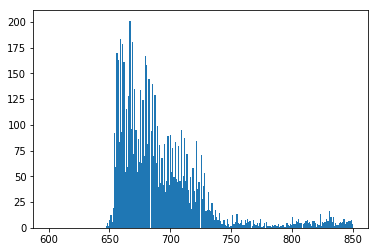

E:\MestradoData\p044\44_5_depth_271.yaml
5 271 E:\MestradoData\p044\44_5_depth_271.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_271.png (240, 320) (128, 128)


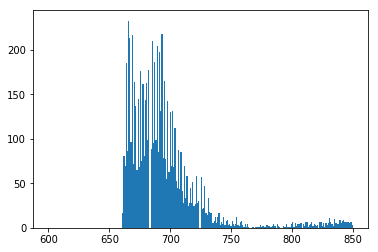

E:\MestradoData\p044\44_5_depth_281.yaml
5 281 E:\MestradoData\p044\44_5_depth_281.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_281.png (240, 320) (128, 128)


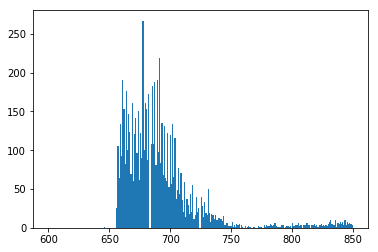

E:\MestradoData\p044\44_5_depth_291.yaml
5 291 E:\MestradoData\p044\44_5_depth_291.yaml depth E:\MestradoData\preprocessed\05\44_5_depth_291.png (240, 320) (128, 128)


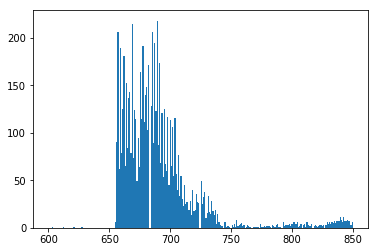

E:\MestradoData\p044\44_6_depth_271.yaml
6 271 E:\MestradoData\p044\44_6_depth_271.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_271.png (240, 320) (128, 128)


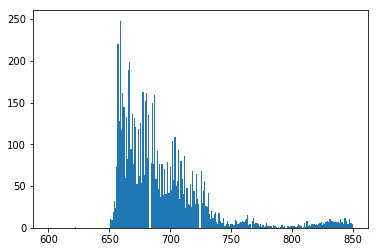

E:\MestradoData\p044\44_6_depth_281.yaml
6 281 E:\MestradoData\p044\44_6_depth_281.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_281.png (240, 320) (128, 128)


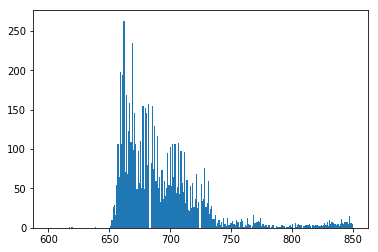

E:\MestradoData\p044\44_6_depth_291.yaml
6 291 E:\MestradoData\p044\44_6_depth_291.yaml depth E:\MestradoData\preprocessed\06\44_6_depth_291.png (240, 320) (128, 128)


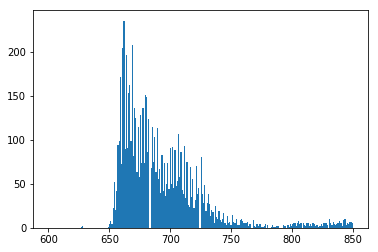

E:\MestradoData\p043\43_3_depth_1.yaml
3 1 E:\MestradoData\p043\43_3_depth_1.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_1.png (240, 320) (128, 128)


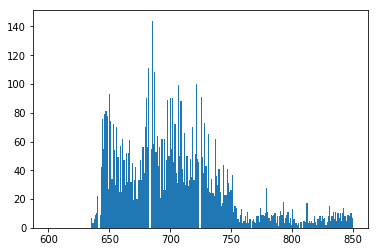

E:\MestradoData\p043\43_3_depth_11.yaml
3 11 E:\MestradoData\p043\43_3_depth_11.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_11.png (240, 320) (128, 128)


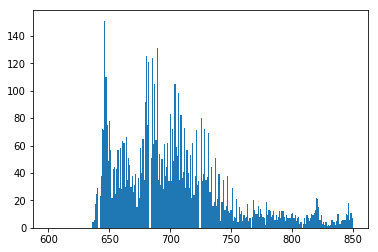

E:\MestradoData\p043\43_3_depth_21.yaml
3 21 E:\MestradoData\p043\43_3_depth_21.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_21.png (240, 320) (128, 128)


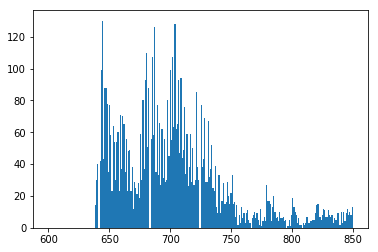

E:\MestradoData\p043\43_4_depth_1.yaml
4 1 E:\MestradoData\p043\43_4_depth_1.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_1.png (240, 320) (128, 128)


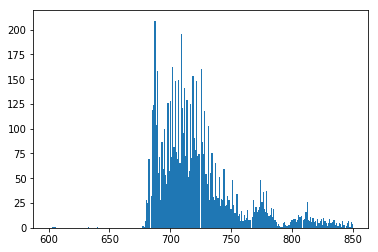

E:\MestradoData\p043\43_4_depth_11.yaml
4 11 E:\MestradoData\p043\43_4_depth_11.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_11.png (240, 320) (128, 128)


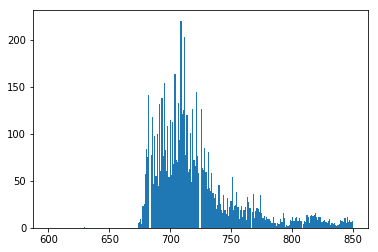

E:\MestradoData\p043\43_4_depth_21.yaml
4 21 E:\MestradoData\p043\43_4_depth_21.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_21.png (240, 320) (128, 128)


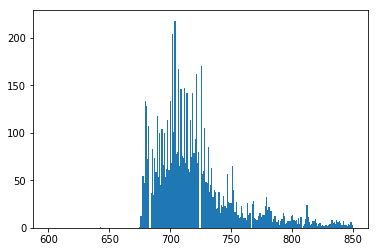

E:\MestradoData\p043\43_7_depth_1.yaml
7 1 E:\MestradoData\p043\43_7_depth_1.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_1.png (240, 320) (128, 128)


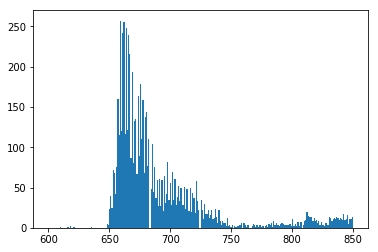

E:\MestradoData\p043\43_7_depth_11.yaml
7 11 E:\MestradoData\p043\43_7_depth_11.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_11.png (240, 320) (128, 128)


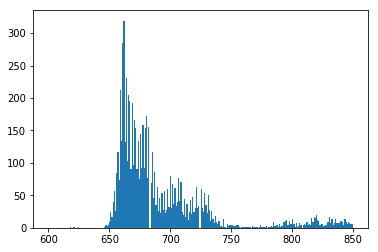

E:\MestradoData\p043\43_7_depth_21.yaml
7 21 E:\MestradoData\p043\43_7_depth_21.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_21.png (240, 320) (128, 128)


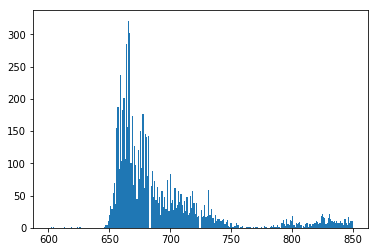

E:\MestradoData\p043\43_8_depth_1.yaml
8 1 E:\MestradoData\p043\43_8_depth_1.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_1.png (240, 320) (128, 128)


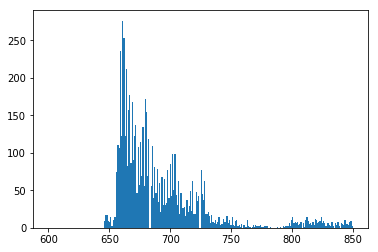

E:\MestradoData\p043\43_8_depth_11.yaml
8 11 E:\MestradoData\p043\43_8_depth_11.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_11.png (240, 320) (128, 128)


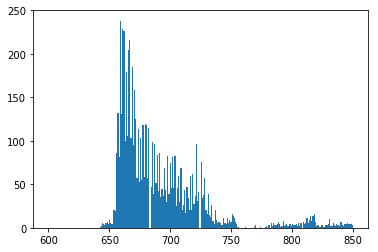

E:\MestradoData\p043\43_8_depth_21.yaml
8 21 E:\MestradoData\p043\43_8_depth_21.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_21.png (240, 320) (128, 128)


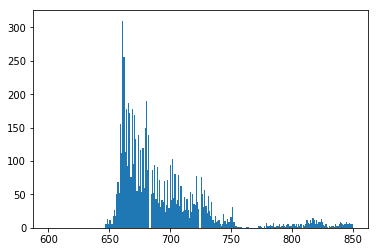

E:\MestradoData\p043\43_9_depth_1.yaml
9 1 E:\MestradoData\p043\43_9_depth_1.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_1.png (240, 320) (128, 128)


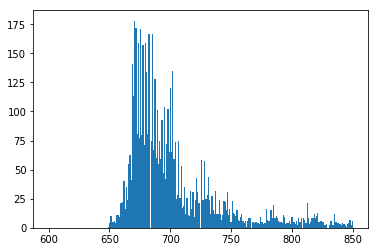

E:\MestradoData\p043\43_9_depth_11.yaml
9 11 E:\MestradoData\p043\43_9_depth_11.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_11.png (240, 320) (128, 128)


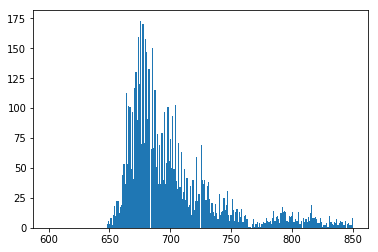

E:\MestradoData\p043\43_9_depth_21.yaml
9 21 E:\MestradoData\p043\43_9_depth_21.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_21.png (240, 320) (128, 128)


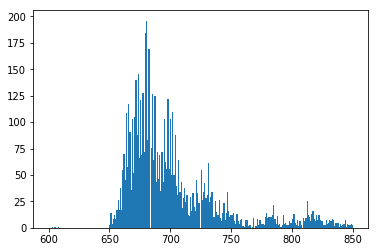

E:\MestradoData\p043\43_10_depth_1.yaml
10 1 E:\MestradoData\p043\43_10_depth_1.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_1.png (240, 320) (128, 128)


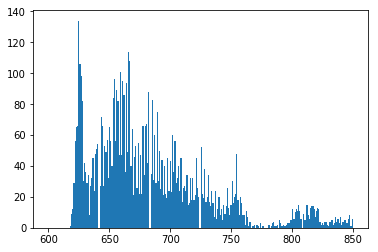

E:\MestradoData\p043\43_10_depth_11.yaml
10 11 E:\MestradoData\p043\43_10_depth_11.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_11.png (240, 320) (128, 128)


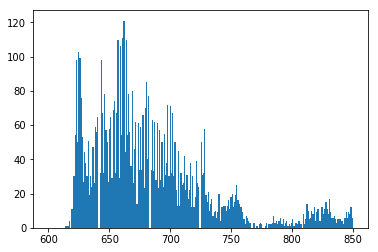

E:\MestradoData\p043\43_10_depth_21.yaml
10 21 E:\MestradoData\p043\43_10_depth_21.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_21.png (240, 320) (128, 128)


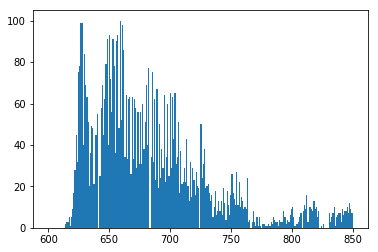

E:\MestradoData\p043\43_11_depth_1.yaml
11 1 E:\MestradoData\p043\43_11_depth_1.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_1.png (240, 320) (128, 128)


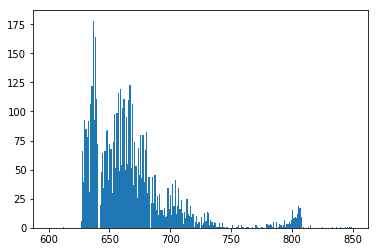

E:\MestradoData\p043\43_11_depth_11.yaml
11 11 E:\MestradoData\p043\43_11_depth_11.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_11.png (240, 320) (128, 128)


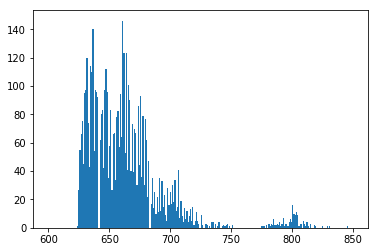

E:\MestradoData\p043\43_11_depth_21.yaml
11 21 E:\MestradoData\p043\43_11_depth_21.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_21.png (240, 320) (128, 128)


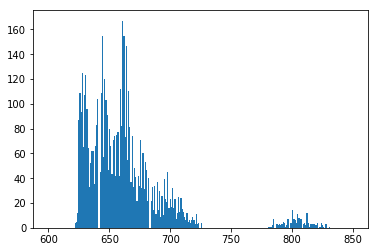

E:\MestradoData\p043\43_12_depth_1.yaml
12 1 E:\MestradoData\p043\43_12_depth_1.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_1.png (240, 320) (128, 128)


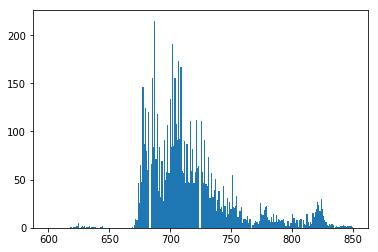

E:\MestradoData\p043\43_12_depth_11.yaml
12 11 E:\MestradoData\p043\43_12_depth_11.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_11.png (240, 320) (128, 128)


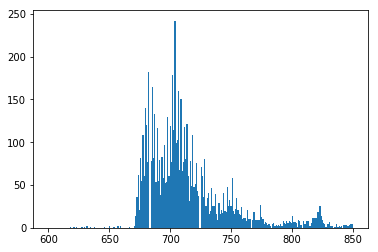

E:\MestradoData\p043\43_12_depth_21.yaml
12 21 E:\MestradoData\p043\43_12_depth_21.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_21.png (240, 320) (128, 128)


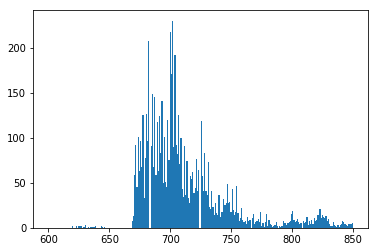

E:\MestradoData\p043\43_13_depth_1.yaml
13 1 E:\MestradoData\p043\43_13_depth_1.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_1.png (240, 320) (128, 128)


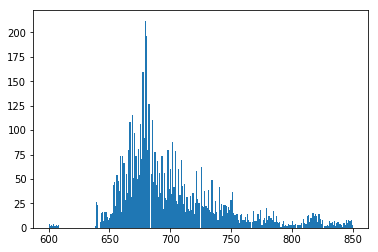

E:\MestradoData\p043\43_13_depth_11.yaml
13 11 E:\MestradoData\p043\43_13_depth_11.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_11.png (240, 320) (128, 128)


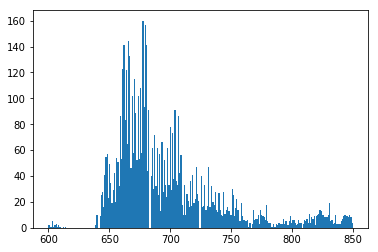

E:\MestradoData\p043\43_13_depth_21.yaml
13 21 E:\MestradoData\p043\43_13_depth_21.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_21.png (240, 320) (128, 128)


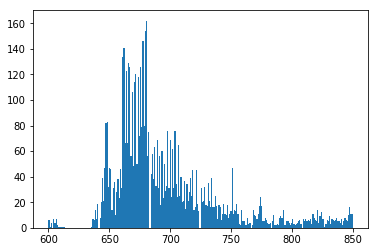

E:\MestradoData\p043\43_14_depth_1.yaml
14 1 E:\MestradoData\p043\43_14_depth_1.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_1.png (240, 320) (128, 128)


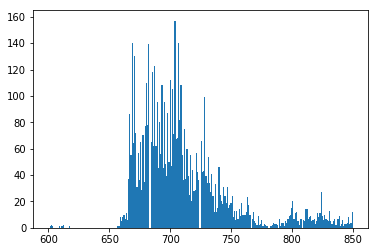

E:\MestradoData\p043\43_14_depth_11.yaml
14 11 E:\MestradoData\p043\43_14_depth_11.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_11.png (240, 320) (128, 128)


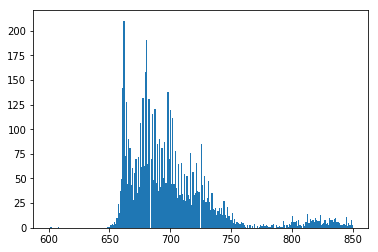

E:\MestradoData\p043\43_14_depth_21.yaml
14 21 E:\MestradoData\p043\43_14_depth_21.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_21.png (240, 320) (128, 128)


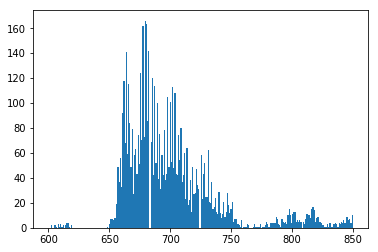

E:\MestradoData\p043\43_15_depth_1.yaml
15 1 E:\MestradoData\p043\43_15_depth_1.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_1.png (240, 320) (128, 128)


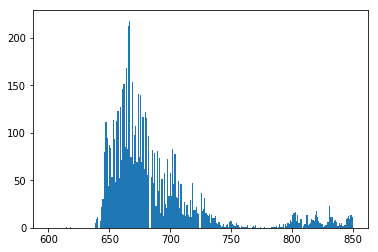

E:\MestradoData\p043\43_15_depth_11.yaml
15 11 E:\MestradoData\p043\43_15_depth_11.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_11.png (240, 320) (128, 128)


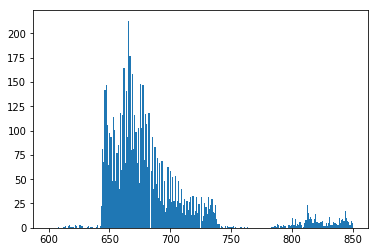

E:\MestradoData\p043\43_15_depth_21.yaml
15 21 E:\MestradoData\p043\43_15_depth_21.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_21.png (240, 320) (128, 128)


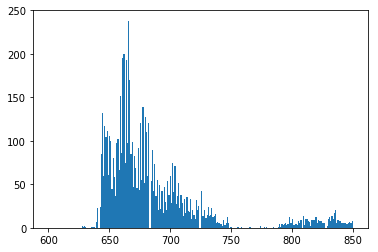

E:\MestradoData\p043\43_16_depth_1.yaml
16 1 E:\MestradoData\p043\43_16_depth_1.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_1.png (240, 320) (128, 128)


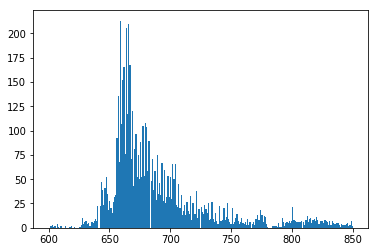

E:\MestradoData\p043\43_16_depth_11.yaml
16 11 E:\MestradoData\p043\43_16_depth_11.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_11.png (240, 320) (128, 128)


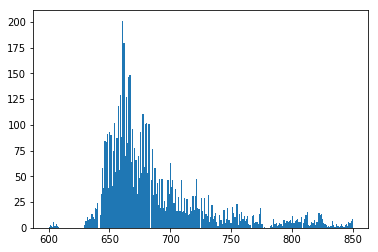

E:\MestradoData\p043\43_16_depth_21.yaml
16 21 E:\MestradoData\p043\43_16_depth_21.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_21.png (240, 320) (128, 128)


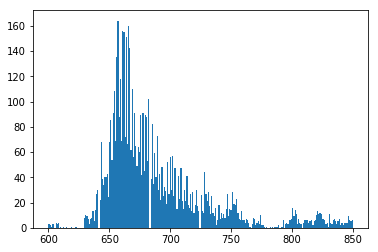

E:\MestradoData\p043\43_17_depth_1.yaml
17 1 E:\MestradoData\p043\43_17_depth_1.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_1.png (240, 320) (128, 128)


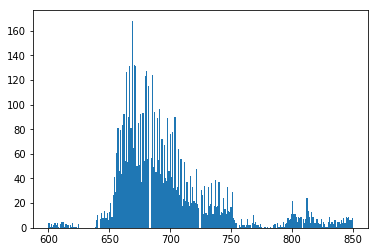

E:\MestradoData\p043\43_17_depth_11.yaml
17 11 E:\MestradoData\p043\43_17_depth_11.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_11.png (240, 320) (128, 128)


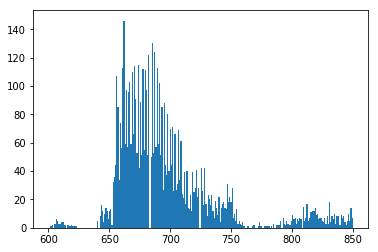

E:\MestradoData\p043\43_17_depth_21.yaml
17 21 E:\MestradoData\p043\43_17_depth_21.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_21.png (240, 320) (128, 128)


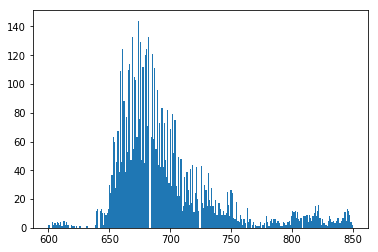

E:\MestradoData\p043\43_18_depth_1.yaml
18 1 E:\MestradoData\p043\43_18_depth_1.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_1.png (240, 320) (128, 128)


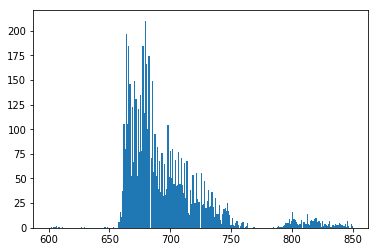

E:\MestradoData\p043\43_18_depth_11.yaml
18 11 E:\MestradoData\p043\43_18_depth_11.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_11.png (240, 320) (128, 128)


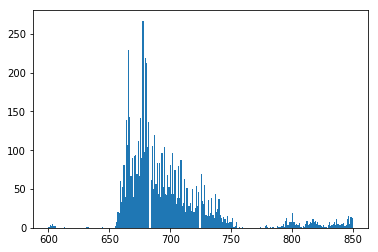

E:\MestradoData\p043\43_18_depth_21.yaml
18 21 E:\MestradoData\p043\43_18_depth_21.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_21.png (240, 320) (128, 128)


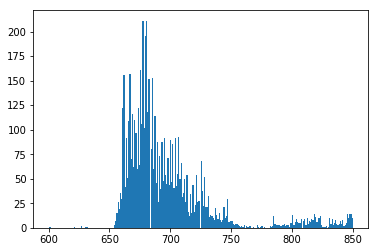

E:\MestradoData\p043\43_19_depth_1.yaml
19 1 E:\MestradoData\p043\43_19_depth_1.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_1.png (240, 320) (128, 128)


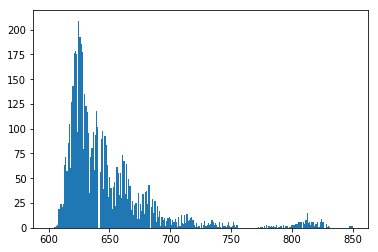

E:\MestradoData\p043\43_19_depth_11.yaml
19 11 E:\MestradoData\p043\43_19_depth_11.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_11.png (240, 320) (128, 128)


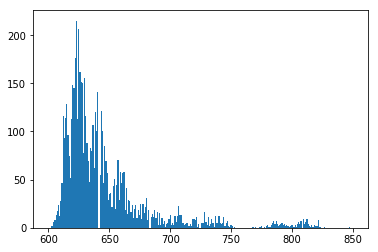

E:\MestradoData\p043\43_19_depth_21.yaml
19 21 E:\MestradoData\p043\43_19_depth_21.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_21.png (240, 320) (128, 128)


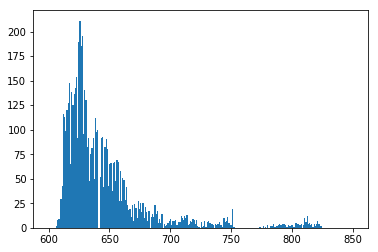

E:\MestradoData\p043\43_3_depth_31.yaml
3 31 E:\MestradoData\p043\43_3_depth_31.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_31.png (240, 320) (128, 128)


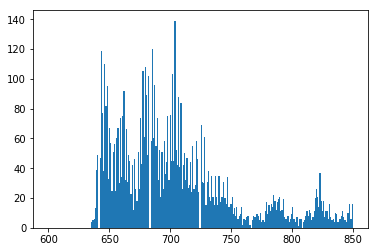

E:\MestradoData\p043\43_3_depth_41.yaml
3 41 E:\MestradoData\p043\43_3_depth_41.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_41.png (240, 320) (128, 128)


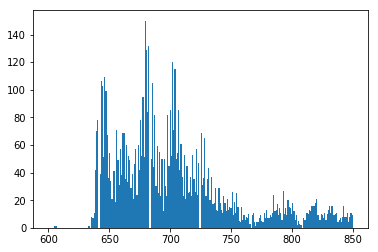

E:\MestradoData\p043\43_3_depth_51.yaml
3 51 E:\MestradoData\p043\43_3_depth_51.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_51.png (240, 320) (128, 128)


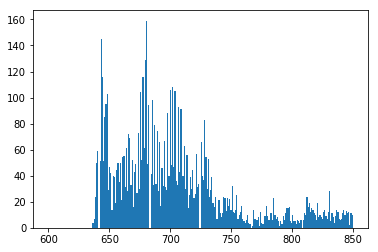

E:\MestradoData\p043\43_4_depth_31.yaml
4 31 E:\MestradoData\p043\43_4_depth_31.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_31.png (240, 320) (128, 128)


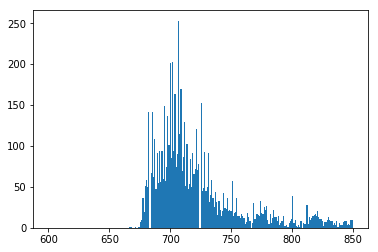

E:\MestradoData\p043\43_4_depth_41.yaml
4 41 E:\MestradoData\p043\43_4_depth_41.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_41.png (240, 320) (128, 128)


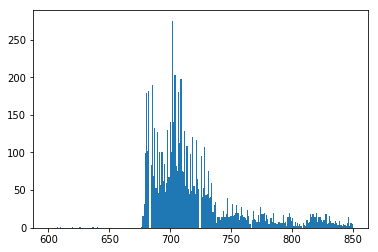

E:\MestradoData\p043\43_4_depth_51.yaml
4 51 E:\MestradoData\p043\43_4_depth_51.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_51.png (240, 320) (128, 128)


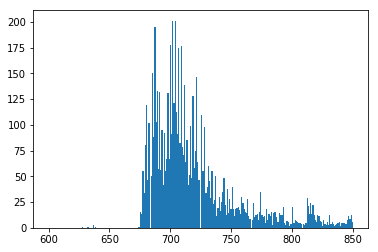

E:\MestradoData\p043\43_7_depth_31.yaml
7 31 E:\MestradoData\p043\43_7_depth_31.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_31.png (240, 320) (128, 128)


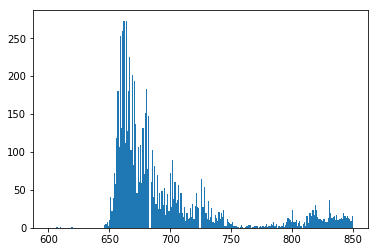

E:\MestradoData\p043\43_7_depth_41.yaml
7 41 E:\MestradoData\p043\43_7_depth_41.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_41.png (240, 320) (128, 128)


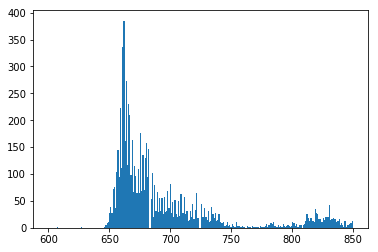

E:\MestradoData\p043\43_7_depth_51.yaml
7 51 E:\MestradoData\p043\43_7_depth_51.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_51.png (240, 320) (128, 128)


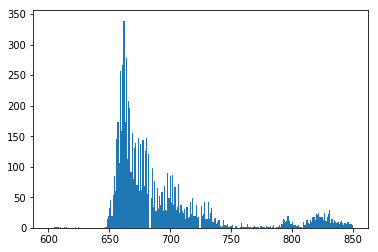

E:\MestradoData\p043\43_8_depth_31.yaml
8 31 E:\MestradoData\p043\43_8_depth_31.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_31.png (240, 320) (128, 128)


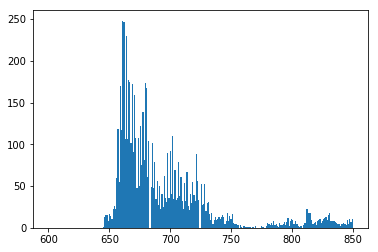

E:\MestradoData\p043\43_8_depth_41.yaml
8 41 E:\MestradoData\p043\43_8_depth_41.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_41.png (240, 320) (128, 128)


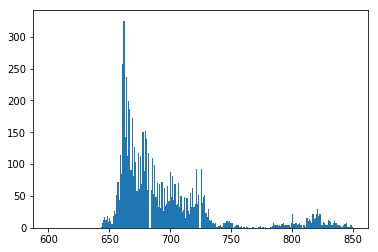

E:\MestradoData\p043\43_8_depth_51.yaml
8 51 E:\MestradoData\p043\43_8_depth_51.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_51.png (240, 320) (128, 128)


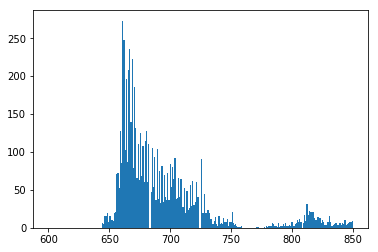

E:\MestradoData\p043\43_9_depth_31.yaml
9 31 E:\MestradoData\p043\43_9_depth_31.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_31.png (240, 320) (128, 128)


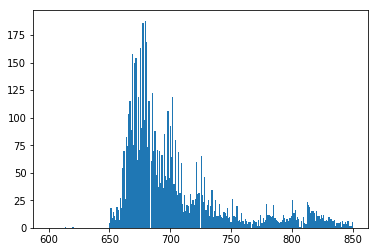

E:\MestradoData\p043\43_9_depth_41.yaml
9 41 E:\MestradoData\p043\43_9_depth_41.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_41.png (240, 320) (128, 128)


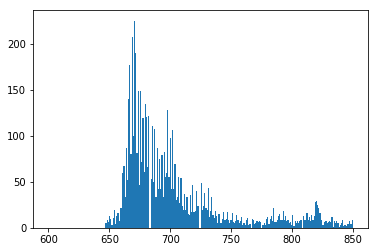

E:\MestradoData\p043\43_9_depth_51.yaml
9 51 E:\MestradoData\p043\43_9_depth_51.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_51.png (240, 320) (128, 128)


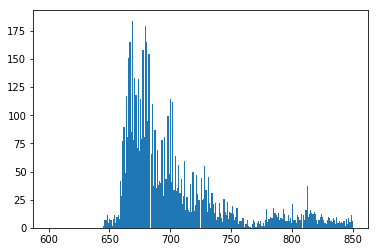

E:\MestradoData\p043\43_10_depth_31.yaml
10 31 E:\MestradoData\p043\43_10_depth_31.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_31.png (240, 320) (128, 128)


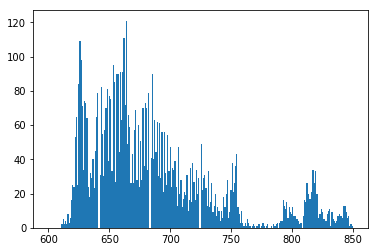

E:\MestradoData\p043\43_10_depth_41.yaml
10 41 E:\MestradoData\p043\43_10_depth_41.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_41.png (240, 320) (128, 128)


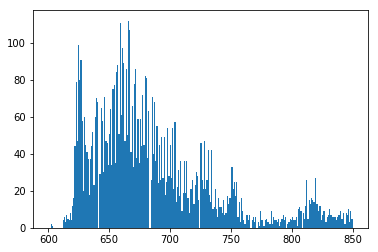

E:\MestradoData\p043\43_10_depth_51.yaml
10 51 E:\MestradoData\p043\43_10_depth_51.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_51.png (240, 320) (128, 128)


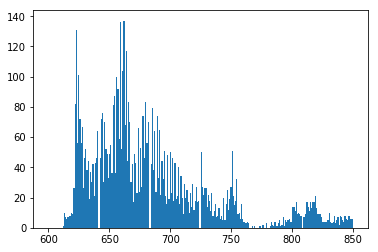

E:\MestradoData\p043\43_11_depth_31.yaml
11 31 E:\MestradoData\p043\43_11_depth_31.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_31.png (240, 320) (128, 128)


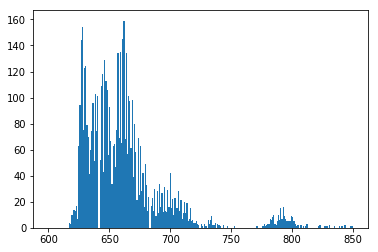

E:\MestradoData\p043\43_11_depth_41.yaml
11 41 E:\MestradoData\p043\43_11_depth_41.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_41.png (240, 320) (128, 128)


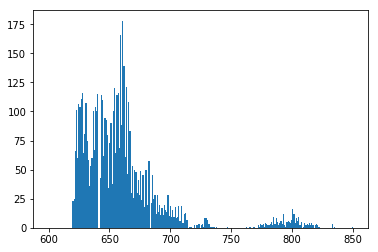

E:\MestradoData\p043\43_11_depth_51.yaml
11 51 E:\MestradoData\p043\43_11_depth_51.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_51.png (240, 320) (128, 128)


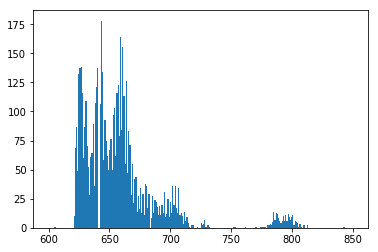

E:\MestradoData\p043\43_12_depth_31.yaml
12 31 E:\MestradoData\p043\43_12_depth_31.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_31.png (240, 320) (128, 128)


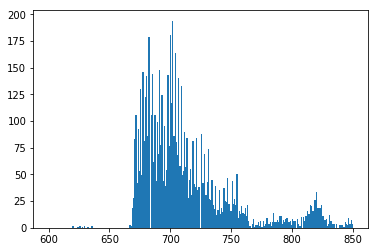

E:\MestradoData\p043\43_12_depth_41.yaml
12 41 E:\MestradoData\p043\43_12_depth_41.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_41.png (240, 320) (128, 128)


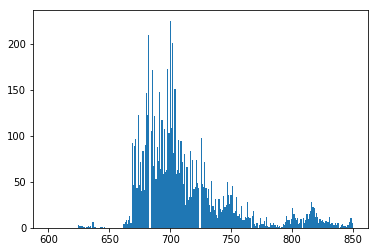

E:\MestradoData\p043\43_12_depth_51.yaml
12 51 E:\MestradoData\p043\43_12_depth_51.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_51.png (240, 320) (128, 128)


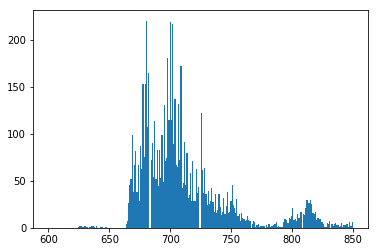

E:\MestradoData\p043\43_13_depth_31.yaml
13 31 E:\MestradoData\p043\43_13_depth_31.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_31.png (240, 320) (128, 128)


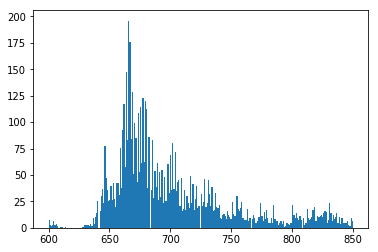

E:\MestradoData\p043\43_13_depth_41.yaml
13 41 E:\MestradoData\p043\43_13_depth_41.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_41.png (240, 320) (128, 128)


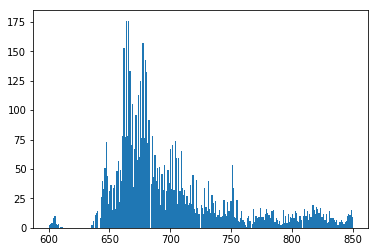

E:\MestradoData\p043\43_13_depth_51.yaml
13 51 E:\MestradoData\p043\43_13_depth_51.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_51.png (240, 320) (128, 128)


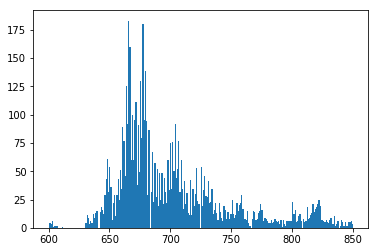

E:\MestradoData\p043\43_14_depth_31.yaml
14 31 E:\MestradoData\p043\43_14_depth_31.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_31.png (240, 320) (128, 128)


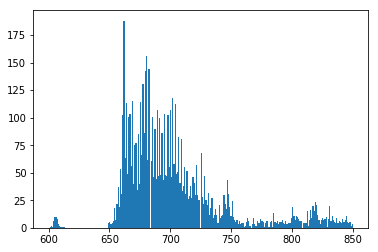

E:\MestradoData\p043\43_14_depth_41.yaml
14 41 E:\MestradoData\p043\43_14_depth_41.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_41.png (240, 320) (128, 128)


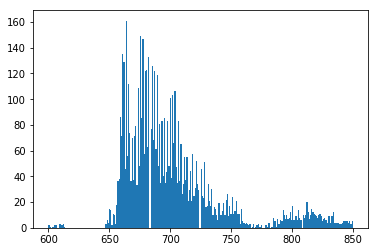

E:\MestradoData\p043\43_14_depth_51.yaml
14 51 E:\MestradoData\p043\43_14_depth_51.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_51.png (240, 320) (128, 128)


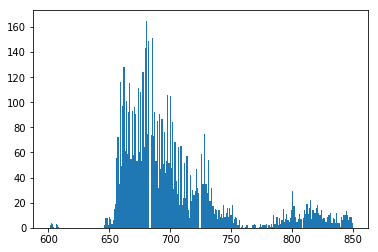

E:\MestradoData\p043\43_15_depth_31.yaml
15 31 E:\MestradoData\p043\43_15_depth_31.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_31.png (240, 320) (128, 128)


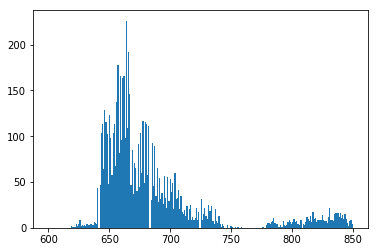

E:\MestradoData\p043\43_15_depth_41.yaml
15 41 E:\MestradoData\p043\43_15_depth_41.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_41.png (240, 320) (128, 128)


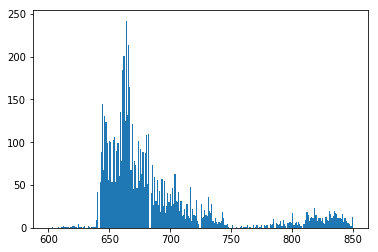

E:\MestradoData\p043\43_15_depth_51.yaml
15 51 E:\MestradoData\p043\43_15_depth_51.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_51.png (240, 320) (128, 128)


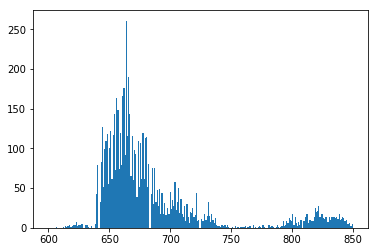

E:\MestradoData\p043\43_16_depth_31.yaml
16 31 E:\MestradoData\p043\43_16_depth_31.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_31.png (240, 320) (128, 128)


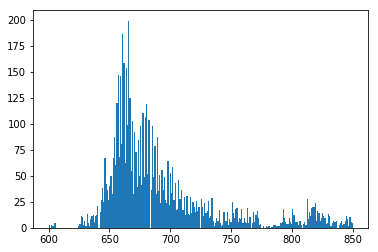

E:\MestradoData\p043\43_16_depth_41.yaml
16 41 E:\MestradoData\p043\43_16_depth_41.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_41.png (240, 320) (128, 128)


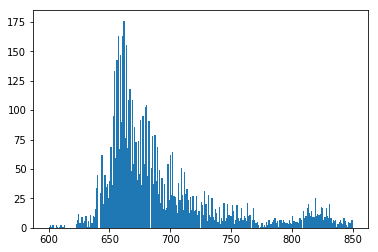

E:\MestradoData\p043\43_16_depth_51.yaml
16 51 E:\MestradoData\p043\43_16_depth_51.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_51.png (240, 320) (128, 128)


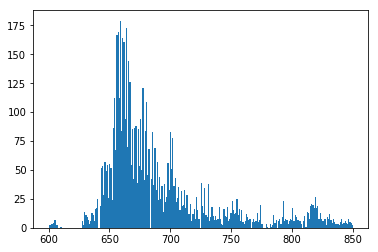

E:\MestradoData\p043\43_17_depth_31.yaml
17 31 E:\MestradoData\p043\43_17_depth_31.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_31.png (240, 320) (128, 128)


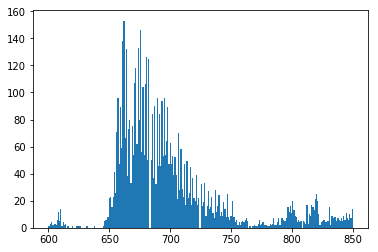

E:\MestradoData\p043\43_17_depth_41.yaml
17 41 E:\MestradoData\p043\43_17_depth_41.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_41.png (240, 320) (128, 128)


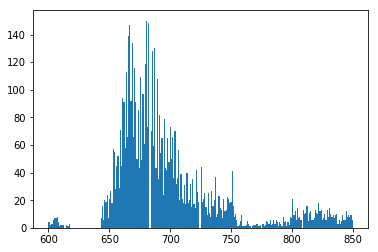

E:\MestradoData\p043\43_17_depth_51.yaml
17 51 E:\MestradoData\p043\43_17_depth_51.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_51.png (240, 320) (128, 128)


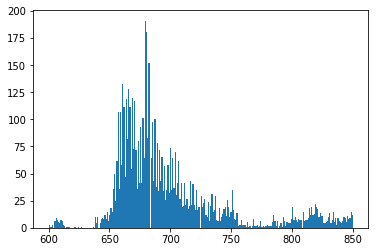

E:\MestradoData\p043\43_18_depth_31.yaml
18 31 E:\MestradoData\p043\43_18_depth_31.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_31.png (240, 320) (128, 128)


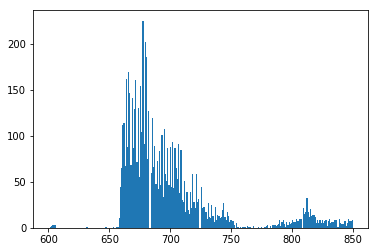

E:\MestradoData\p043\43_18_depth_41.yaml
18 41 E:\MestradoData\p043\43_18_depth_41.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_41.png (240, 320) (128, 128)


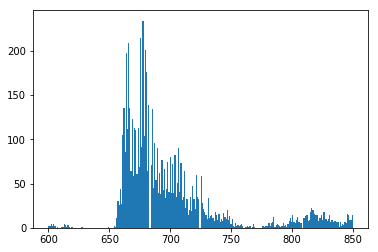

E:\MestradoData\p043\43_18_depth_51.yaml
18 51 E:\MestradoData\p043\43_18_depth_51.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_51.png (240, 320) (128, 128)


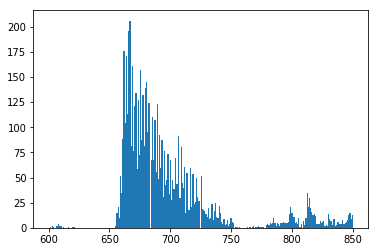

E:\MestradoData\p043\43_19_depth_31.yaml
19 31 E:\MestradoData\p043\43_19_depth_31.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_31.png (240, 320) (128, 128)


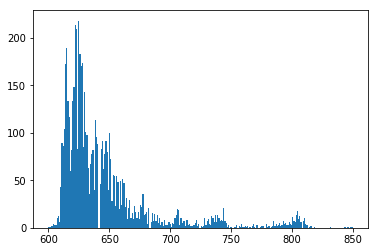

E:\MestradoData\p043\43_19_depth_41.yaml
19 41 E:\MestradoData\p043\43_19_depth_41.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_41.png (240, 320) (128, 128)


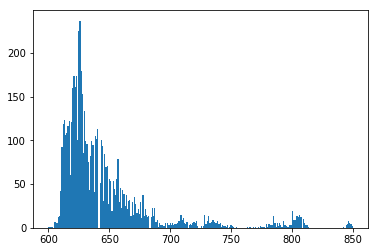

E:\MestradoData\p043\43_19_depth_51.yaml
19 51 E:\MestradoData\p043\43_19_depth_51.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_51.png (240, 320) (128, 128)


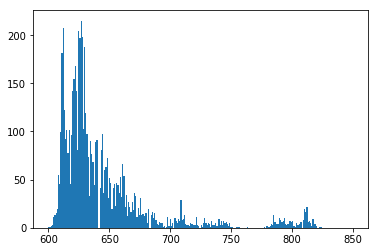

E:\MestradoData\p043\43_3_depth_61.yaml
3 61 E:\MestradoData\p043\43_3_depth_61.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_61.png (240, 320) (128, 128)


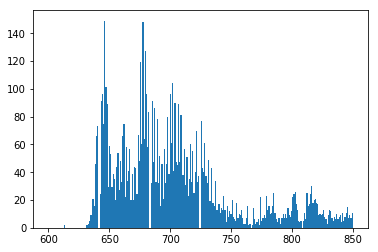

E:\MestradoData\p043\43_3_depth_71.yaml
3 71 E:\MestradoData\p043\43_3_depth_71.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_71.png (240, 320) (128, 128)


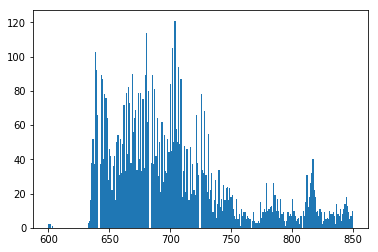

E:\MestradoData\p043\43_3_depth_81.yaml
3 81 E:\MestradoData\p043\43_3_depth_81.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_81.png (240, 320) (128, 128)


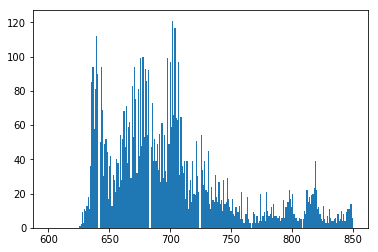

E:\MestradoData\p043\43_4_depth_61.yaml
4 61 E:\MestradoData\p043\43_4_depth_61.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_61.png (240, 320) (128, 128)


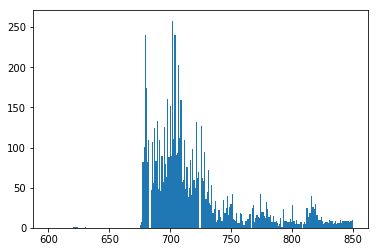

E:\MestradoData\p043\43_4_depth_71.yaml
4 71 E:\MestradoData\p043\43_4_depth_71.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_71.png (240, 320) (128, 128)


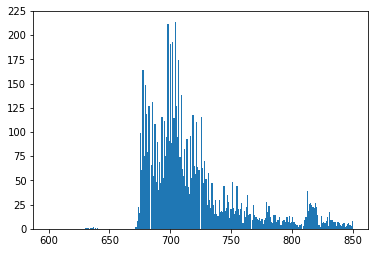

E:\MestradoData\p043\43_4_depth_81.yaml
4 81 E:\MestradoData\p043\43_4_depth_81.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_81.png (240, 320) (128, 128)


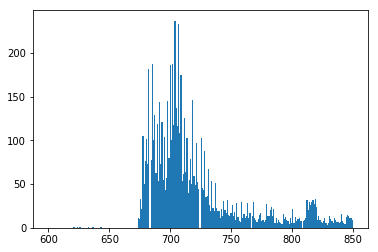

E:\MestradoData\p043\43_7_depth_61.yaml
7 61 E:\MestradoData\p043\43_7_depth_61.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_61.png (240, 320) (128, 128)


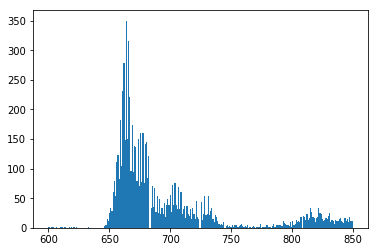

E:\MestradoData\p043\43_7_depth_71.yaml
7 71 E:\MestradoData\p043\43_7_depth_71.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_71.png (240, 320) (128, 128)


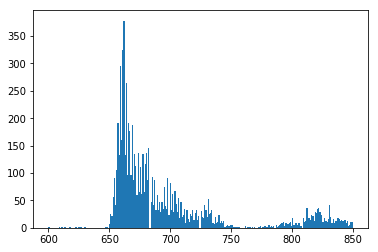

E:\MestradoData\p043\43_7_depth_81.yaml
7 81 E:\MestradoData\p043\43_7_depth_81.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_81.png (240, 320) (128, 128)


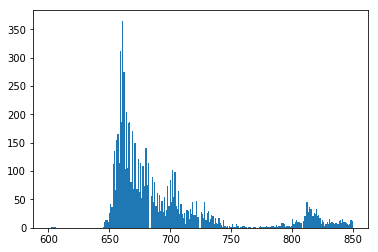

E:\MestradoData\p043\43_8_depth_61.yaml
8 61 E:\MestradoData\p043\43_8_depth_61.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_61.png (240, 320) (128, 128)


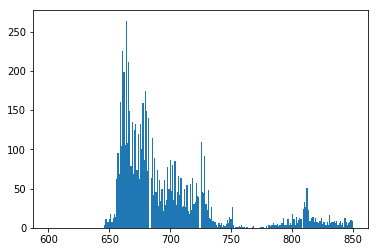

E:\MestradoData\p043\43_8_depth_71.yaml
8 71 E:\MestradoData\p043\43_8_depth_71.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_71.png (240, 320) (128, 128)


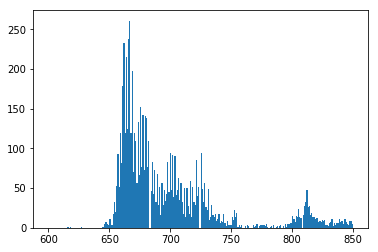

E:\MestradoData\p043\43_8_depth_81.yaml
8 81 E:\MestradoData\p043\43_8_depth_81.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_81.png (240, 320) (128, 128)


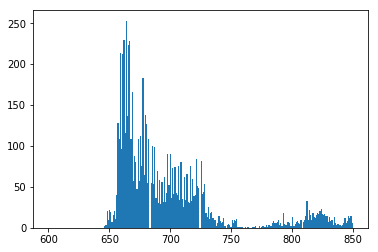

E:\MestradoData\p043\43_9_depth_61.yaml
9 61 E:\MestradoData\p043\43_9_depth_61.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_61.png (240, 320) (128, 128)


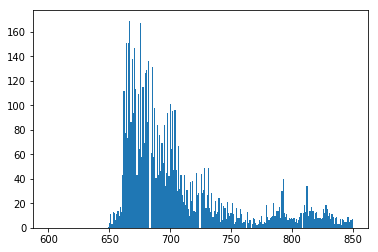

E:\MestradoData\p043\43_9_depth_71.yaml
9 71 E:\MestradoData\p043\43_9_depth_71.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_71.png (240, 320) (128, 128)


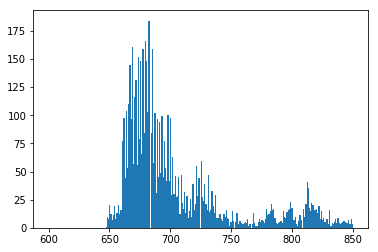

E:\MestradoData\p043\43_9_depth_81.yaml
9 81 E:\MestradoData\p043\43_9_depth_81.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_81.png (240, 320) (128, 128)


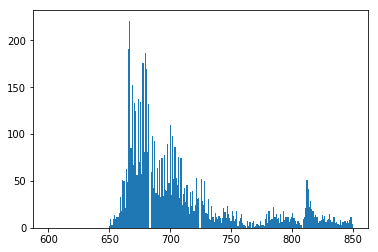

E:\MestradoData\p043\43_10_depth_61.yaml
10 61 E:\MestradoData\p043\43_10_depth_61.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_61.png (240, 320) (128, 128)


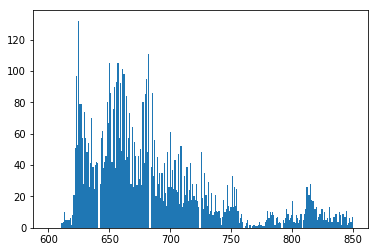

E:\MestradoData\p043\43_10_depth_71.yaml
10 71 E:\MestradoData\p043\43_10_depth_71.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_71.png (240, 320) (128, 128)


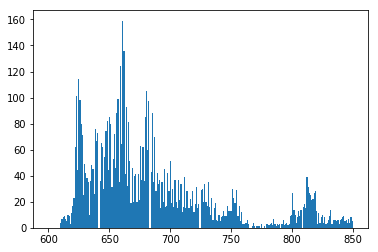

E:\MestradoData\p043\43_10_depth_81.yaml
10 81 E:\MestradoData\p043\43_10_depth_81.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_81.png (240, 320) (128, 128)


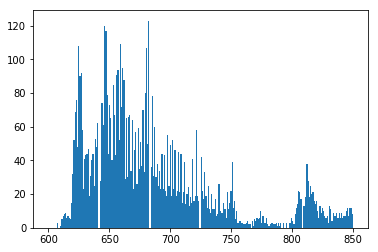

E:\MestradoData\p043\43_11_depth_61.yaml
11 61 E:\MestradoData\p043\43_11_depth_61.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_61.png (240, 320) (128, 128)


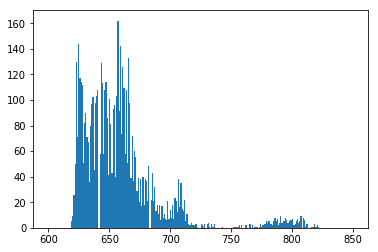

E:\MestradoData\p043\43_11_depth_71.yaml
11 71 E:\MestradoData\p043\43_11_depth_71.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_71.png (240, 320) (128, 128)


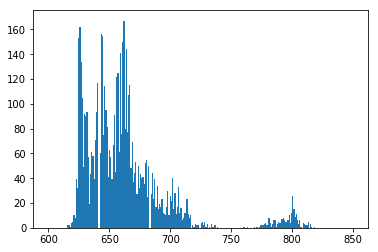

E:\MestradoData\p043\43_11_depth_81.yaml
11 81 E:\MestradoData\p043\43_11_depth_81.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_81.png (240, 320) (128, 128)


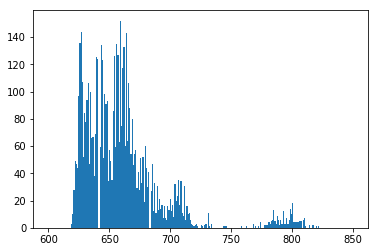

E:\MestradoData\p043\43_12_depth_61.yaml
12 61 E:\MestradoData\p043\43_12_depth_61.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_61.png (240, 320) (128, 128)


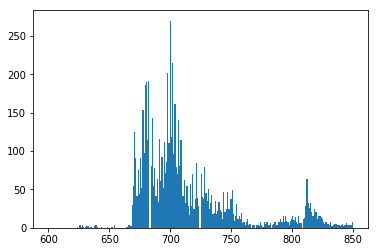

E:\MestradoData\p043\43_12_depth_71.yaml
12 71 E:\MestradoData\p043\43_12_depth_71.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_71.png (240, 320) (128, 128)


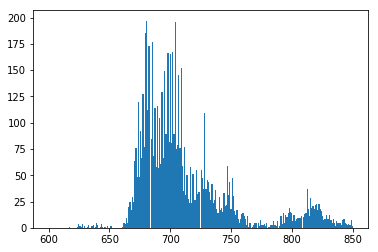

E:\MestradoData\p043\43_12_depth_81.yaml
12 81 E:\MestradoData\p043\43_12_depth_81.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_81.png (240, 320) (128, 128)


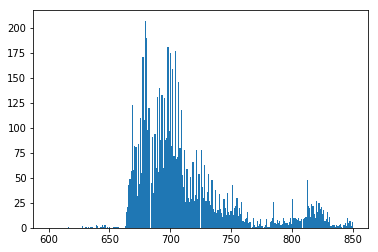

E:\MestradoData\p043\43_13_depth_61.yaml
13 61 E:\MestradoData\p043\43_13_depth_61.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_61.png (240, 320) (128, 128)


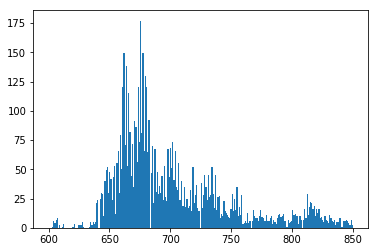

E:\MestradoData\p043\43_13_depth_71.yaml
13 71 E:\MestradoData\p043\43_13_depth_71.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_71.png (240, 320) (128, 128)


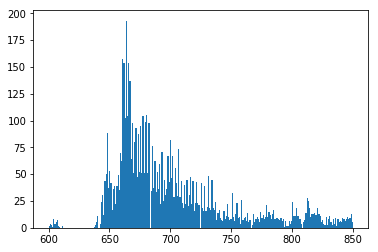

E:\MestradoData\p043\43_13_depth_81.yaml
13 81 E:\MestradoData\p043\43_13_depth_81.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_81.png (240, 320) (128, 128)


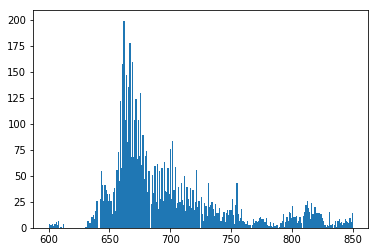

E:\MestradoData\p043\43_14_depth_61.yaml
14 61 E:\MestradoData\p043\43_14_depth_61.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_61.png (240, 320) (128, 128)


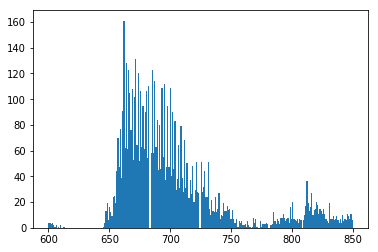

E:\MestradoData\p043\43_14_depth_71.yaml
14 71 E:\MestradoData\p043\43_14_depth_71.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_71.png (240, 320) (128, 128)


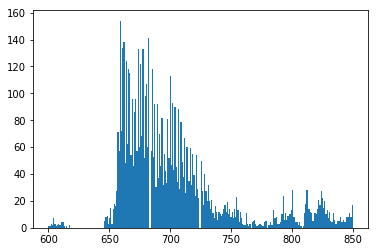

E:\MestradoData\p043\43_14_depth_81.yaml
14 81 E:\MestradoData\p043\43_14_depth_81.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_81.png (240, 320) (128, 128)


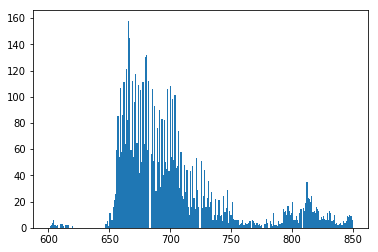

E:\MestradoData\p043\43_15_depth_61.yaml
15 61 E:\MestradoData\p043\43_15_depth_61.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_61.png (240, 320) (128, 128)


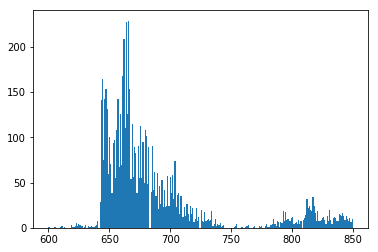

E:\MestradoData\p043\43_15_depth_71.yaml
15 71 E:\MestradoData\p043\43_15_depth_71.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_71.png (240, 320) (128, 128)


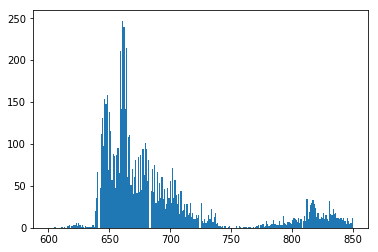

E:\MestradoData\p043\43_15_depth_81.yaml
15 81 E:\MestradoData\p043\43_15_depth_81.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_81.png (240, 320) (128, 128)


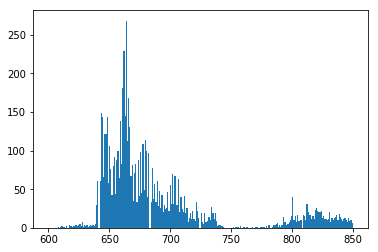

E:\MestradoData\p043\43_16_depth_61.yaml
16 61 E:\MestradoData\p043\43_16_depth_61.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_61.png (240, 320) (128, 128)


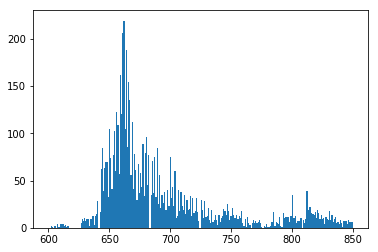

E:\MestradoData\p043\43_16_depth_71.yaml
16 71 E:\MestradoData\p043\43_16_depth_71.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_71.png (240, 320) (128, 128)


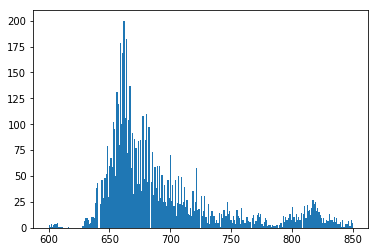

E:\MestradoData\p043\43_16_depth_81.yaml
16 81 E:\MestradoData\p043\43_16_depth_81.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_81.png (240, 320) (128, 128)


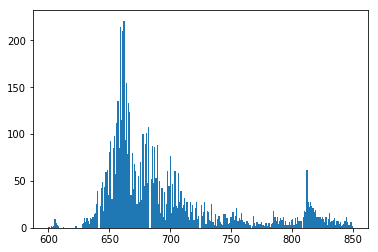

E:\MestradoData\p043\43_17_depth_61.yaml
17 61 E:\MestradoData\p043\43_17_depth_61.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_61.png (240, 320) (128, 128)


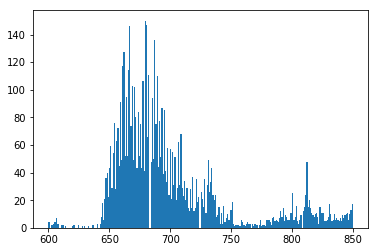

E:\MestradoData\p043\43_17_depth_71.yaml
17 71 E:\MestradoData\p043\43_17_depth_71.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_71.png (240, 320) (128, 128)


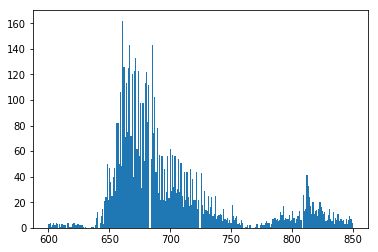

E:\MestradoData\p043\43_17_depth_81.yaml
17 81 E:\MestradoData\p043\43_17_depth_81.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_81.png (240, 320) (128, 128)


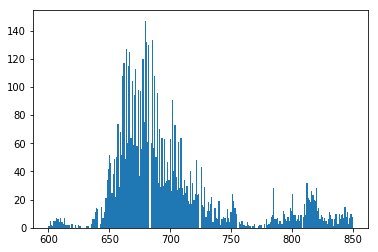

E:\MestradoData\p043\43_18_depth_61.yaml
18 61 E:\MestradoData\p043\43_18_depth_61.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_61.png (240, 320) (128, 128)


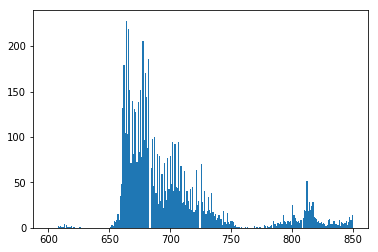

E:\MestradoData\p043\43_18_depth_71.yaml
18 71 E:\MestradoData\p043\43_18_depth_71.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_71.png (240, 320) (128, 128)


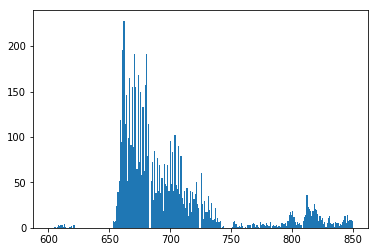

E:\MestradoData\p043\43_18_depth_81.yaml
18 81 E:\MestradoData\p043\43_18_depth_81.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_81.png (240, 320) (128, 128)


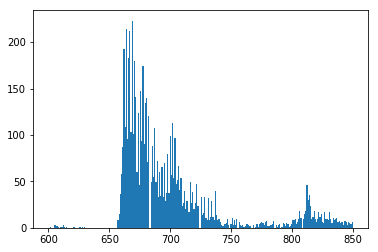

E:\MestradoData\p043\43_19_depth_61.yaml
19 61 E:\MestradoData\p043\43_19_depth_61.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_61.png (240, 320) (128, 128)


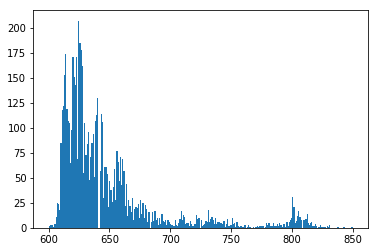

E:\MestradoData\p043\43_19_depth_71.yaml
19 71 E:\MestradoData\p043\43_19_depth_71.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_71.png (240, 320) (128, 128)


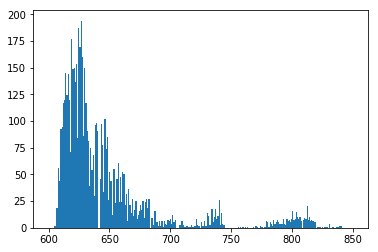

E:\MestradoData\p043\43_19_depth_81.yaml
19 81 E:\MestradoData\p043\43_19_depth_81.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_81.png (240, 320) (128, 128)


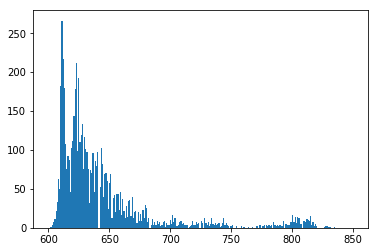

E:\MestradoData\p043\43_3_depth_91.yaml
3 91 E:\MestradoData\p043\43_3_depth_91.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_91.png (240, 320) (128, 128)


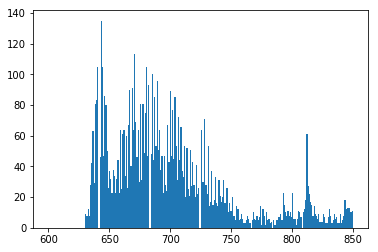

E:\MestradoData\p043\43_3_depth_101.yaml
3 101 E:\MestradoData\p043\43_3_depth_101.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_101.png (240, 320) (128, 128)


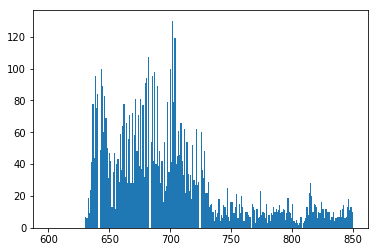

E:\MestradoData\p043\43_3_depth_111.yaml
3 111 E:\MestradoData\p043\43_3_depth_111.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_111.png (240, 320) (128, 128)


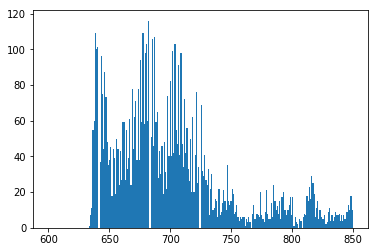

E:\MestradoData\p043\43_4_depth_91.yaml
4 91 E:\MestradoData\p043\43_4_depth_91.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_91.png (240, 320) (128, 128)


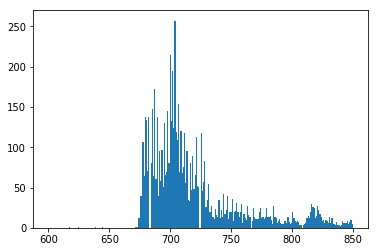

E:\MestradoData\p043\43_4_depth_101.yaml
4 101 E:\MestradoData\p043\43_4_depth_101.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_101.png (240, 320) (128, 128)


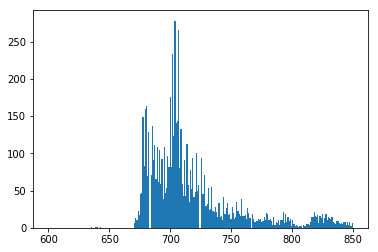

E:\MestradoData\p043\43_4_depth_111.yaml
4 111 E:\MestradoData\p043\43_4_depth_111.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_111.png (240, 320) (128, 128)


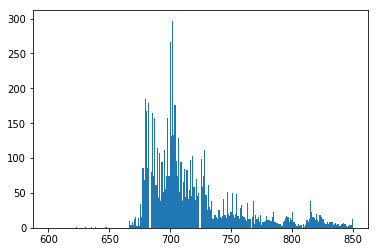

E:\MestradoData\p043\43_7_depth_91.yaml
7 91 E:\MestradoData\p043\43_7_depth_91.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_91.png (240, 320) (128, 128)


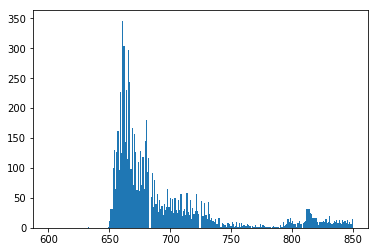

E:\MestradoData\p043\43_7_depth_101.yaml
7 101 E:\MestradoData\p043\43_7_depth_101.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_101.png (240, 320) (128, 128)


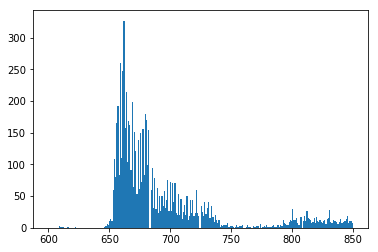

E:\MestradoData\p043\43_7_depth_111.yaml
7 111 E:\MestradoData\p043\43_7_depth_111.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_111.png (240, 320) (128, 128)


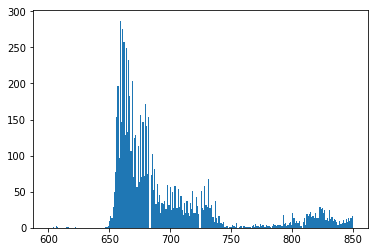

E:\MestradoData\p043\43_8_depth_91.yaml
8 91 E:\MestradoData\p043\43_8_depth_91.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_91.png (240, 320) (128, 128)


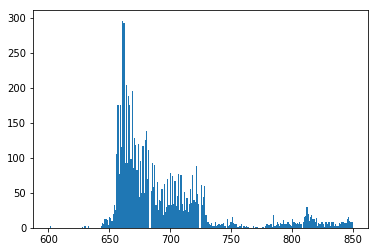

E:\MestradoData\p043\43_8_depth_101.yaml
8 101 E:\MestradoData\p043\43_8_depth_101.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_101.png (240, 320) (128, 128)


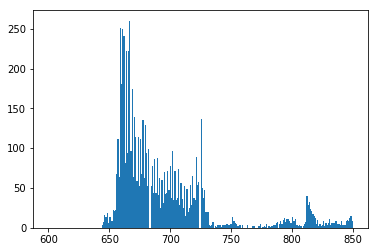

E:\MestradoData\p043\43_8_depth_111.yaml
8 111 E:\MestradoData\p043\43_8_depth_111.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_111.png (240, 320) (128, 128)


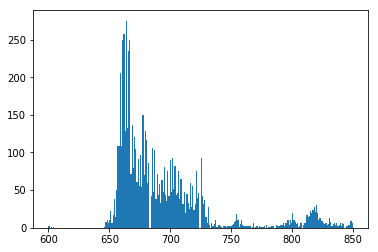

E:\MestradoData\p043\43_9_depth_91.yaml
9 91 E:\MestradoData\p043\43_9_depth_91.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_91.png (240, 320) (128, 128)


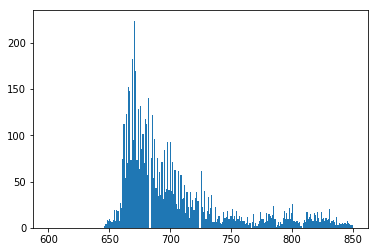

E:\MestradoData\p043\43_9_depth_101.yaml
9 101 E:\MestradoData\p043\43_9_depth_101.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_101.png (240, 320) (128, 128)


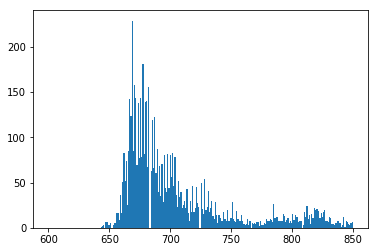

E:\MestradoData\p043\43_9_depth_111.yaml
9 111 E:\MestradoData\p043\43_9_depth_111.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_111.png (240, 320) (128, 128)


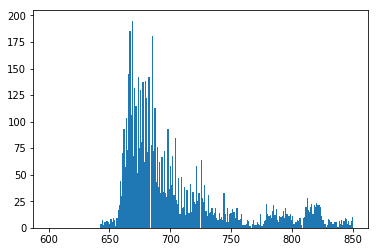

E:\MestradoData\p043\43_10_depth_91.yaml
10 91 E:\MestradoData\p043\43_10_depth_91.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_91.png (240, 320) (128, 128)


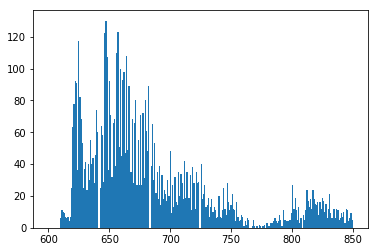

E:\MestradoData\p043\43_10_depth_101.yaml
10 101 E:\MestradoData\p043\43_10_depth_101.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_101.png (240, 320) (128, 128)


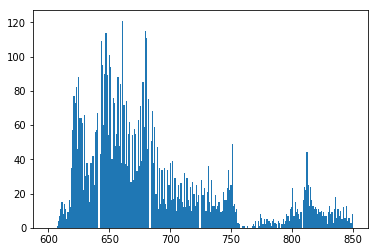

E:\MestradoData\p043\43_10_depth_111.yaml
10 111 E:\MestradoData\p043\43_10_depth_111.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_111.png (240, 320) (128, 128)


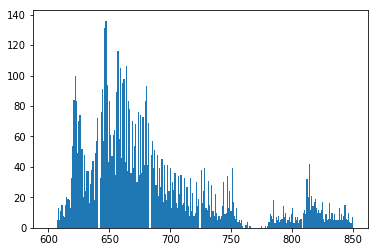

E:\MestradoData\p043\43_11_depth_91.yaml
11 91 E:\MestradoData\p043\43_11_depth_91.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_91.png (240, 320) (128, 128)


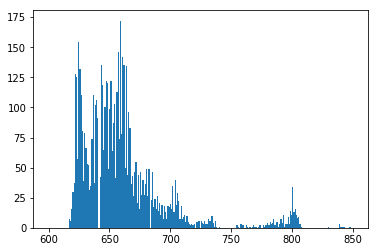

E:\MestradoData\p043\43_11_depth_101.yaml
11 101 E:\MestradoData\p043\43_11_depth_101.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_101.png (240, 320) (128, 128)


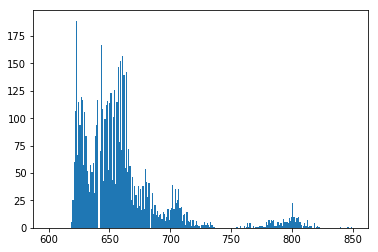

E:\MestradoData\p043\43_11_depth_111.yaml
11 111 E:\MestradoData\p043\43_11_depth_111.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_111.png (240, 320) (128, 128)


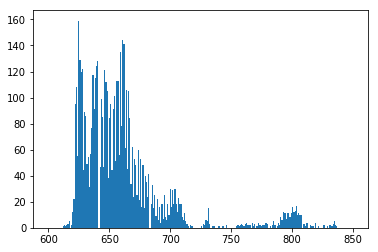

E:\MestradoData\p043\43_12_depth_91.yaml
12 91 E:\MestradoData\p043\43_12_depth_91.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_91.png (240, 320) (128, 128)


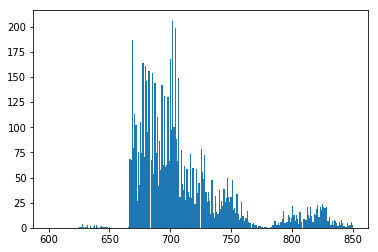

E:\MestradoData\p043\43_12_depth_101.yaml
12 101 E:\MestradoData\p043\43_12_depth_101.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_101.png (240, 320) (128, 128)


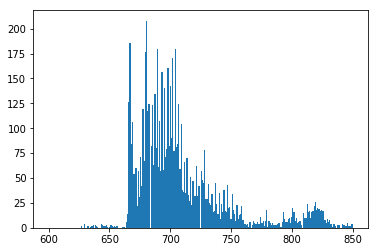

E:\MestradoData\p043\43_12_depth_111.yaml
12 111 E:\MestradoData\p043\43_12_depth_111.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_111.png (240, 320) (128, 128)


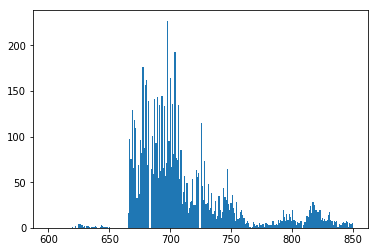

E:\MestradoData\p043\43_13_depth_91.yaml
13 91 E:\MestradoData\p043\43_13_depth_91.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_91.png (240, 320) (128, 128)


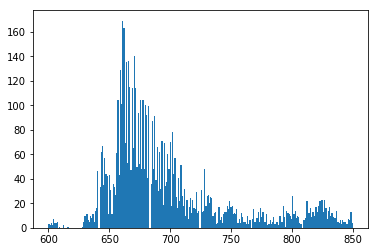

E:\MestradoData\p043\43_13_depth_101.yaml
13 101 E:\MestradoData\p043\43_13_depth_101.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_101.png (240, 320) (128, 128)


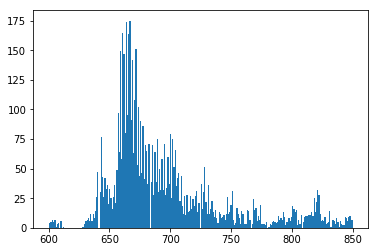

E:\MestradoData\p043\43_13_depth_111.yaml
13 111 E:\MestradoData\p043\43_13_depth_111.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_111.png (240, 320) (128, 128)


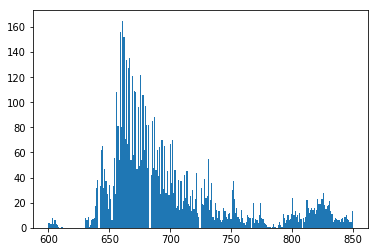

E:\MestradoData\p043\43_14_depth_91.yaml
14 91 E:\MestradoData\p043\43_14_depth_91.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_91.png (240, 320) (128, 128)


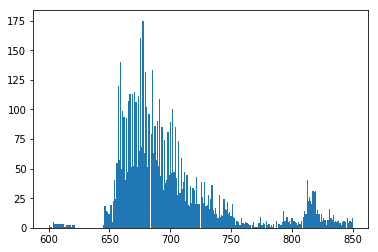

E:\MestradoData\p043\43_14_depth_101.yaml
14 101 E:\MestradoData\p043\43_14_depth_101.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_101.png (240, 320) (128, 128)


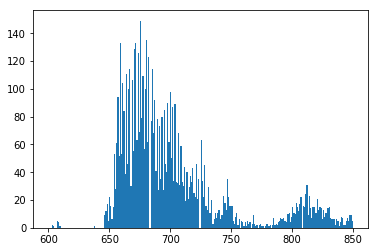

E:\MestradoData\p043\43_14_depth_111.yaml
14 111 E:\MestradoData\p043\43_14_depth_111.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_111.png (240, 320) (128, 128)


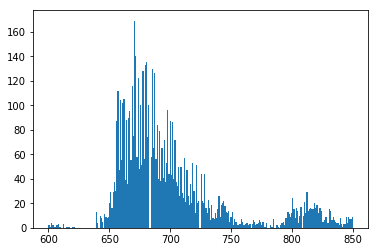

E:\MestradoData\p043\43_15_depth_91.yaml
15 91 E:\MestradoData\p043\43_15_depth_91.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_91.png (240, 320) (128, 128)


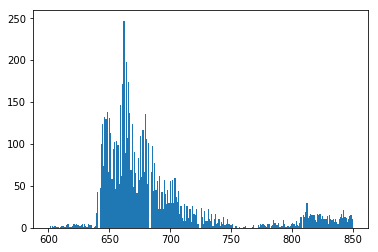

E:\MestradoData\p043\43_15_depth_101.yaml
15 101 E:\MestradoData\p043\43_15_depth_101.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_101.png (240, 320) (128, 128)


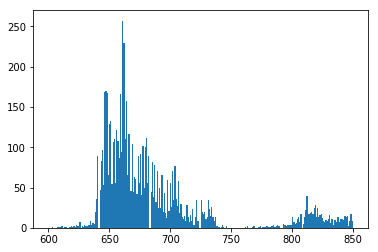

E:\MestradoData\p043\43_15_depth_111.yaml
15 111 E:\MestradoData\p043\43_15_depth_111.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_111.png (240, 320) (128, 128)


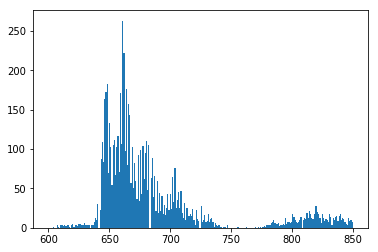

E:\MestradoData\p043\43_16_depth_91.yaml
16 91 E:\MestradoData\p043\43_16_depth_91.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_91.png (240, 320) (128, 128)


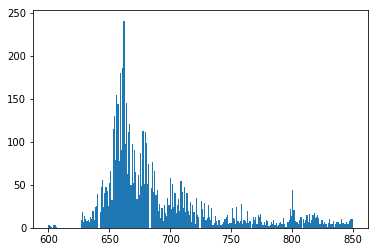

E:\MestradoData\p043\43_16_depth_101.yaml
16 101 E:\MestradoData\p043\43_16_depth_101.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_101.png (240, 320) (128, 128)


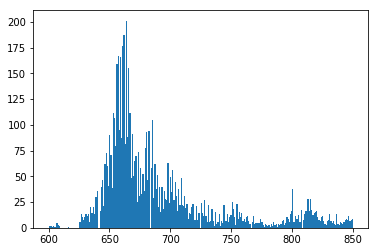

E:\MestradoData\p043\43_16_depth_111.yaml
16 111 E:\MestradoData\p043\43_16_depth_111.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_111.png (240, 320) (128, 128)


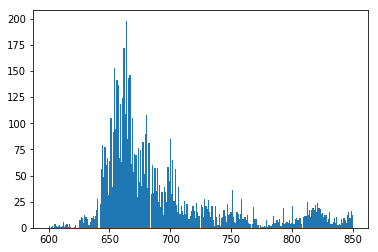

E:\MestradoData\p043\43_17_depth_91.yaml
17 91 E:\MestradoData\p043\43_17_depth_91.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_91.png (240, 320) (128, 128)


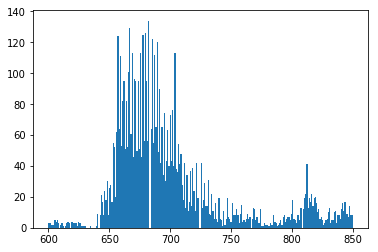

E:\MestradoData\p043\43_17_depth_101.yaml
17 101 E:\MestradoData\p043\43_17_depth_101.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_101.png (240, 320) (128, 128)


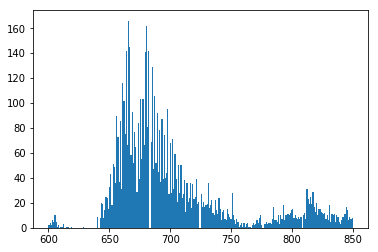

E:\MestradoData\p043\43_17_depth_111.yaml
17 111 E:\MestradoData\p043\43_17_depth_111.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_111.png (240, 320) (128, 128)


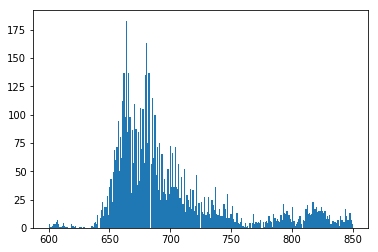

E:\MestradoData\p043\43_18_depth_91.yaml
18 91 E:\MestradoData\p043\43_18_depth_91.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_91.png (240, 320) (128, 128)


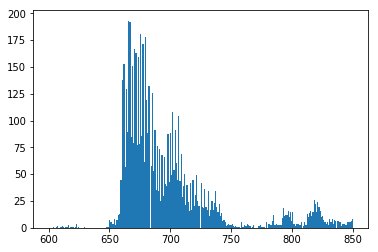

E:\MestradoData\p043\43_18_depth_101.yaml
18 101 E:\MestradoData\p043\43_18_depth_101.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_101.png (240, 320) (128, 128)


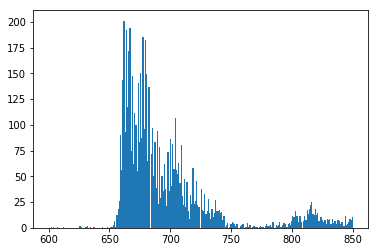

E:\MestradoData\p043\43_18_depth_111.yaml
18 111 E:\MestradoData\p043\43_18_depth_111.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_111.png (240, 320) (128, 128)


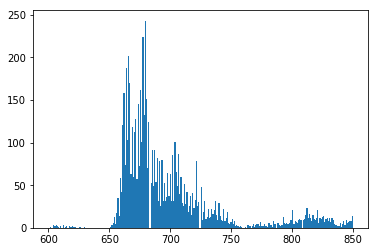

E:\MestradoData\p043\43_19_depth_91.yaml
19 91 E:\MestradoData\p043\43_19_depth_91.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_91.png (240, 320) (128, 128)


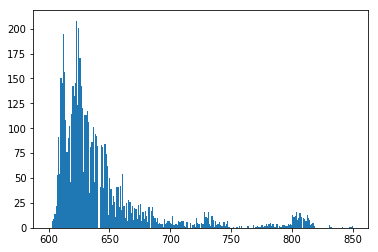

E:\MestradoData\p043\43_19_depth_101.yaml
19 101 E:\MestradoData\p043\43_19_depth_101.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_101.png (240, 320) (128, 128)


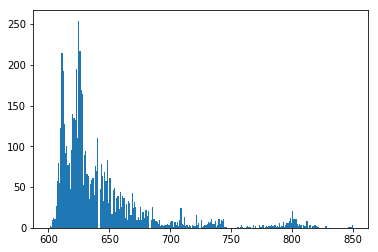

E:\MestradoData\p043\43_19_depth_111.yaml
19 111 E:\MestradoData\p043\43_19_depth_111.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_111.png (240, 320) (128, 128)


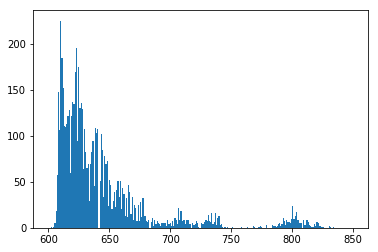

E:\MestradoData\p043\43_3_depth_121.yaml
3 121 E:\MestradoData\p043\43_3_depth_121.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_121.png (240, 320) (128, 128)


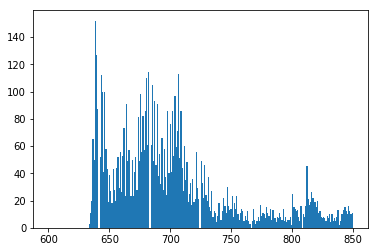

E:\MestradoData\p043\43_3_depth_131.yaml
3 131 E:\MestradoData\p043\43_3_depth_131.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_131.png (240, 320) (128, 128)


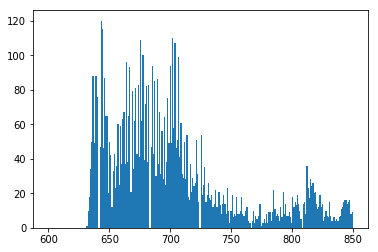

E:\MestradoData\p043\43_3_depth_141.yaml
3 141 E:\MestradoData\p043\43_3_depth_141.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_141.png (240, 320) (128, 128)


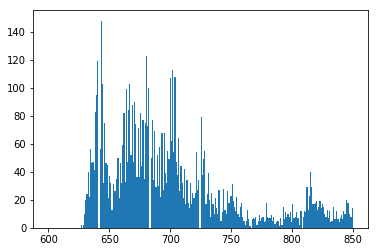

E:\MestradoData\p043\43_4_depth_121.yaml
4 121 E:\MestradoData\p043\43_4_depth_121.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_121.png (240, 320) (128, 128)


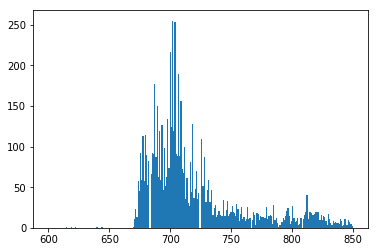

E:\MestradoData\p043\43_4_depth_131.yaml
4 131 E:\MestradoData\p043\43_4_depth_131.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_131.png (240, 320) (128, 128)


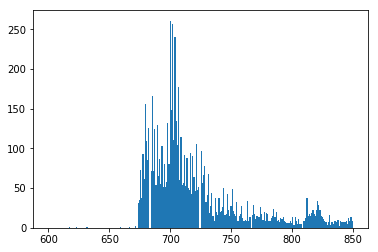

E:\MestradoData\p043\43_4_depth_141.yaml
4 141 E:\MestradoData\p043\43_4_depth_141.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_141.png (240, 320) (128, 128)


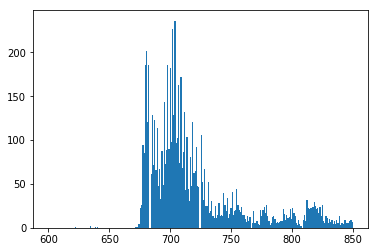

E:\MestradoData\p043\43_7_depth_121.yaml
7 121 E:\MestradoData\p043\43_7_depth_121.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_121.png (240, 320) (128, 128)


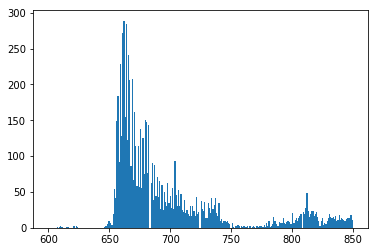

E:\MestradoData\p043\43_7_depth_131.yaml
7 131 E:\MestradoData\p043\43_7_depth_131.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_131.png (240, 320) (128, 128)


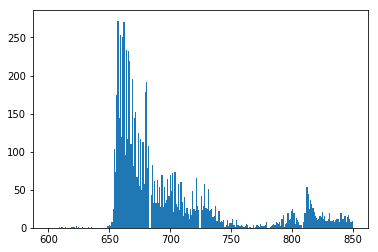

E:\MestradoData\p043\43_7_depth_141.yaml
7 141 E:\MestradoData\p043\43_7_depth_141.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_141.png (240, 320) (128, 128)


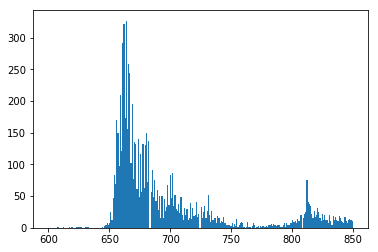

E:\MestradoData\p043\43_8_depth_121.yaml
8 121 E:\MestradoData\p043\43_8_depth_121.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_121.png (240, 320) (128, 128)


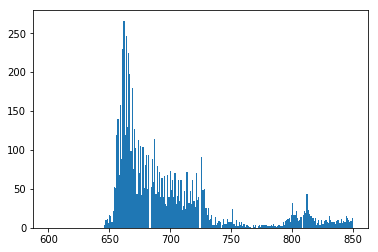

E:\MestradoData\p043\43_8_depth_131.yaml
8 131 E:\MestradoData\p043\43_8_depth_131.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_131.png (240, 320) (128, 128)


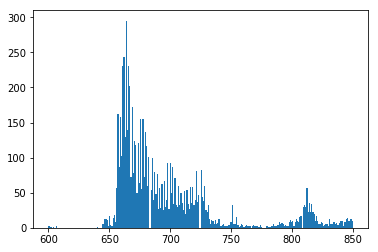

E:\MestradoData\p043\43_8_depth_141.yaml
8 141 E:\MestradoData\p043\43_8_depth_141.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_141.png (240, 320) (128, 128)


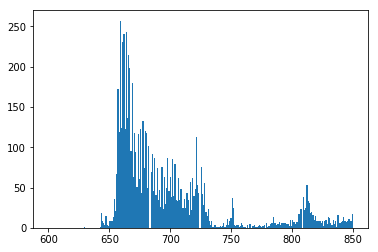

E:\MestradoData\p043\43_9_depth_121.yaml
9 121 E:\MestradoData\p043\43_9_depth_121.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_121.png (240, 320) (128, 128)


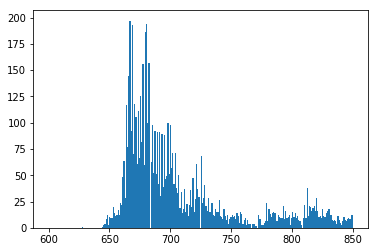

E:\MestradoData\p043\43_9_depth_131.yaml
9 131 E:\MestradoData\p043\43_9_depth_131.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_131.png (240, 320) (128, 128)


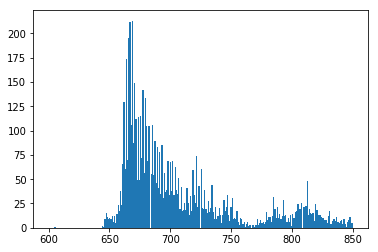

E:\MestradoData\p043\43_9_depth_141.yaml
9 141 E:\MestradoData\p043\43_9_depth_141.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_141.png (240, 320) (128, 128)


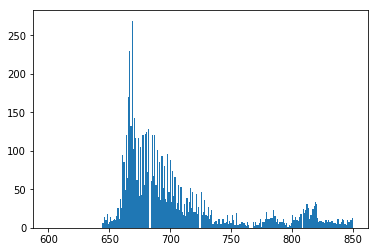

E:\MestradoData\p043\43_10_depth_121.yaml
10 121 E:\MestradoData\p043\43_10_depth_121.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_121.png (240, 320) (128, 128)


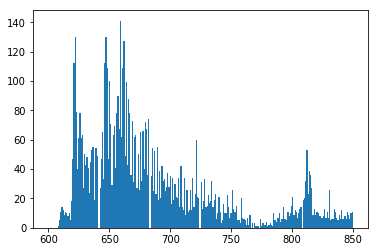

E:\MestradoData\p043\43_10_depth_131.yaml
10 131 E:\MestradoData\p043\43_10_depth_131.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_131.png (240, 320) (128, 128)


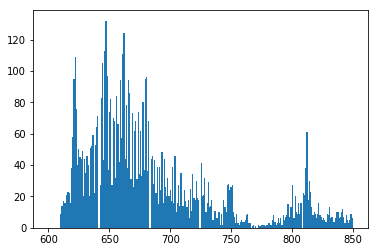

E:\MestradoData\p043\43_10_depth_141.yaml
10 141 E:\MestradoData\p043\43_10_depth_141.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_141.png (240, 320) (128, 128)


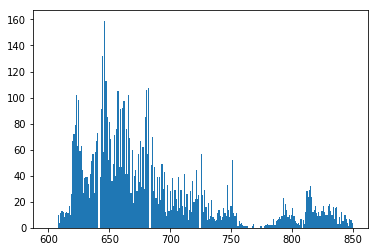

E:\MestradoData\p043\43_11_depth_121.yaml
11 121 E:\MestradoData\p043\43_11_depth_121.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_121.png (240, 320) (128, 128)


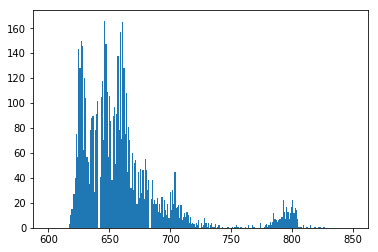

E:\MestradoData\p043\43_11_depth_131.yaml
11 131 E:\MestradoData\p043\43_11_depth_131.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_131.png (240, 320) (128, 128)


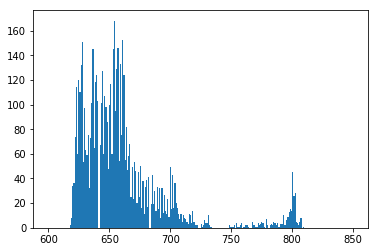

E:\MestradoData\p043\43_11_depth_141.yaml
11 141 E:\MestradoData\p043\43_11_depth_141.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_141.png (240, 320) (128, 128)


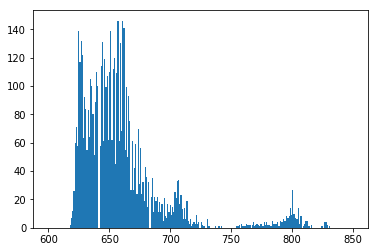

E:\MestradoData\p043\43_12_depth_121.yaml
12 121 E:\MestradoData\p043\43_12_depth_121.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_121.png (240, 320) (128, 128)


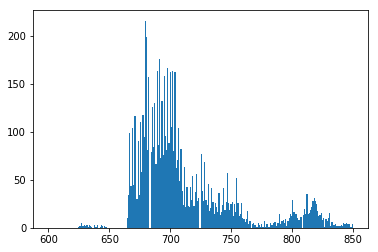

E:\MestradoData\p043\43_12_depth_131.yaml
12 131 E:\MestradoData\p043\43_12_depth_131.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_131.png (240, 320) (128, 128)


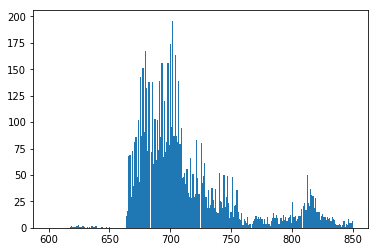

E:\MestradoData\p043\43_12_depth_141.yaml
12 141 E:\MestradoData\p043\43_12_depth_141.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_141.png (240, 320) (128, 128)


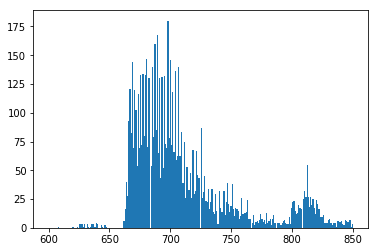

E:\MestradoData\p043\43_13_depth_121.yaml
13 121 E:\MestradoData\p043\43_13_depth_121.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_121.png (240, 320) (128, 128)


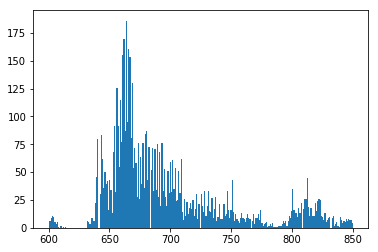

E:\MestradoData\p043\43_13_depth_131.yaml
13 131 E:\MestradoData\p043\43_13_depth_131.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_131.png (240, 320) (128, 128)


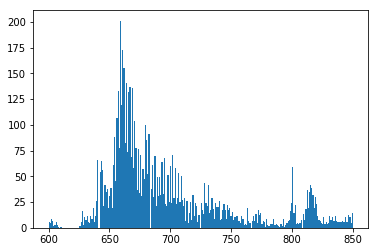

E:\MestradoData\p043\43_13_depth_141.yaml
13 141 E:\MestradoData\p043\43_13_depth_141.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_141.png (240, 320) (128, 128)


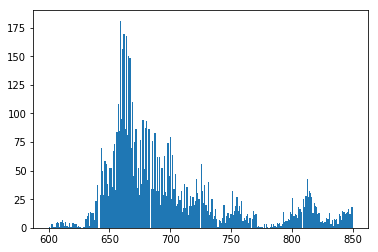

E:\MestradoData\p043\43_14_depth_121.yaml
14 121 E:\MestradoData\p043\43_14_depth_121.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_121.png (240, 320) (128, 128)


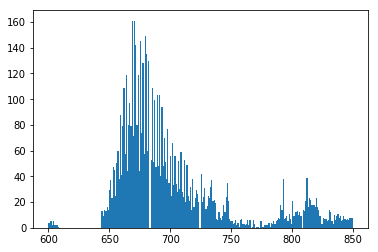

E:\MestradoData\p043\43_14_depth_131.yaml
14 131 E:\MestradoData\p043\43_14_depth_131.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_131.png (240, 320) (128, 128)


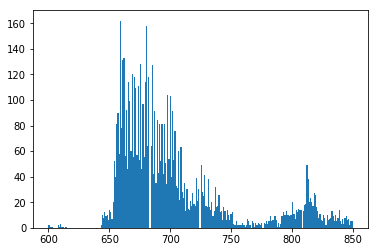

E:\MestradoData\p043\43_14_depth_141.yaml
14 141 E:\MestradoData\p043\43_14_depth_141.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_141.png (240, 320) (128, 128)


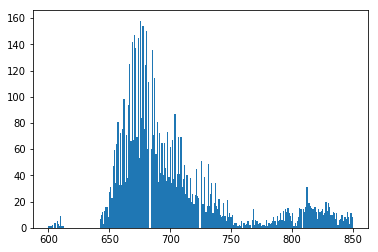

E:\MestradoData\p043\43_15_depth_121.yaml
15 121 E:\MestradoData\p043\43_15_depth_121.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_121.png (240, 320) (128, 128)


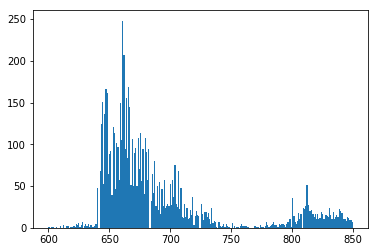

E:\MestradoData\p043\43_15_depth_131.yaml
15 131 E:\MestradoData\p043\43_15_depth_131.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_131.png (240, 320) (128, 128)


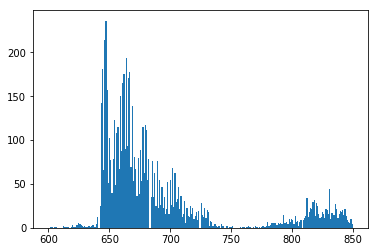

E:\MestradoData\p043\43_15_depth_141.yaml
15 141 E:\MestradoData\p043\43_15_depth_141.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_141.png (240, 320) (128, 128)


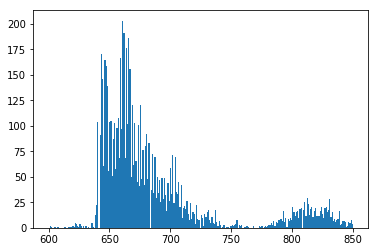

E:\MestradoData\p043\43_16_depth_121.yaml
16 121 E:\MestradoData\p043\43_16_depth_121.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_121.png (240, 320) (128, 128)


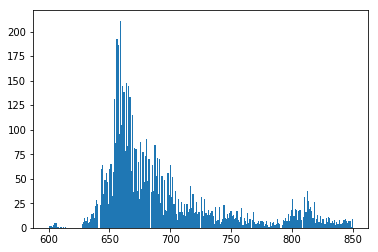

E:\MestradoData\p043\43_16_depth_131.yaml
16 131 E:\MestradoData\p043\43_16_depth_131.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_131.png (240, 320) (128, 128)


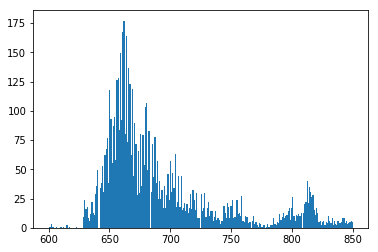

E:\MestradoData\p043\43_16_depth_141.yaml
16 141 E:\MestradoData\p043\43_16_depth_141.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_141.png (240, 320) (128, 128)


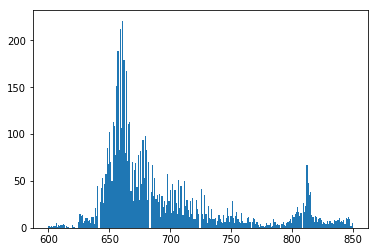

E:\MestradoData\p043\43_17_depth_121.yaml
17 121 E:\MestradoData\p043\43_17_depth_121.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_121.png (240, 320) (128, 128)


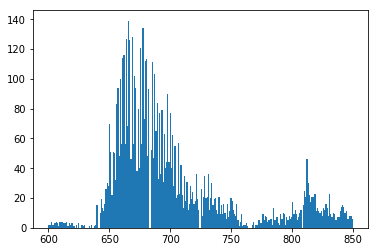

E:\MestradoData\p043\43_17_depth_131.yaml
17 131 E:\MestradoData\p043\43_17_depth_131.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_131.png (240, 320) (128, 128)


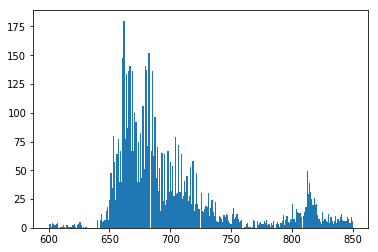

E:\MestradoData\p043\43_17_depth_141.yaml
17 141 E:\MestradoData\p043\43_17_depth_141.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_141.png (240, 320) (128, 128)


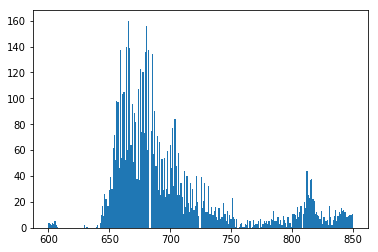

E:\MestradoData\p043\43_18_depth_121.yaml
18 121 E:\MestradoData\p043\43_18_depth_121.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_121.png (240, 320) (128, 128)


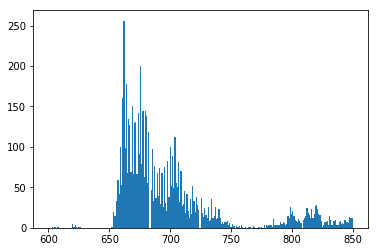

E:\MestradoData\p043\43_18_depth_131.yaml
18 131 E:\MestradoData\p043\43_18_depth_131.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_131.png (240, 320) (128, 128)


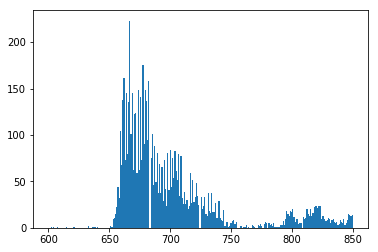

E:\MestradoData\p043\43_18_depth_141.yaml
18 141 E:\MestradoData\p043\43_18_depth_141.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_141.png (240, 320) (128, 128)


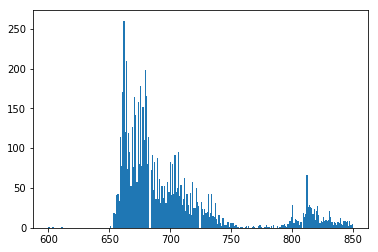

E:\MestradoData\p043\43_19_depth_121.yaml
19 121 E:\MestradoData\p043\43_19_depth_121.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_121.png (240, 320) (128, 128)


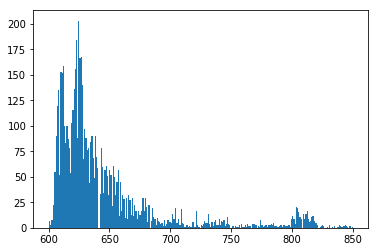

E:\MestradoData\p043\43_19_depth_131.yaml
19 131 E:\MestradoData\p043\43_19_depth_131.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_131.png (240, 320) (128, 128)


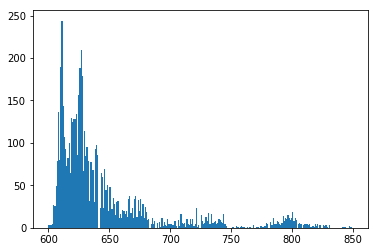

E:\MestradoData\p043\43_19_depth_141.yaml
19 141 E:\MestradoData\p043\43_19_depth_141.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_141.png (240, 320) (128, 128)


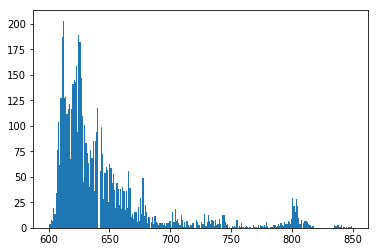

E:\MestradoData\p043\43_3_depth_151.yaml
3 151 E:\MestradoData\p043\43_3_depth_151.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_151.png (240, 320) (128, 128)


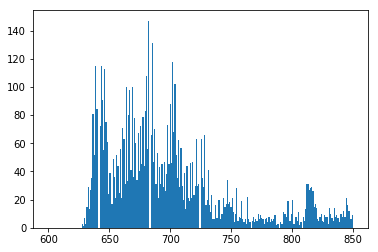

E:\MestradoData\p043\43_3_depth_161.yaml
3 161 E:\MestradoData\p043\43_3_depth_161.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_161.png (240, 320) (128, 128)


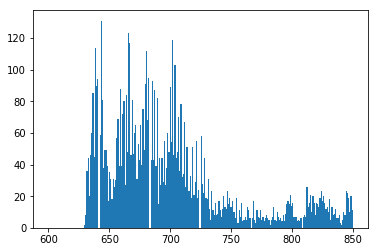

E:\MestradoData\p043\43_3_depth_171.yaml
3 171 E:\MestradoData\p043\43_3_depth_171.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_171.png (240, 320) (128, 128)


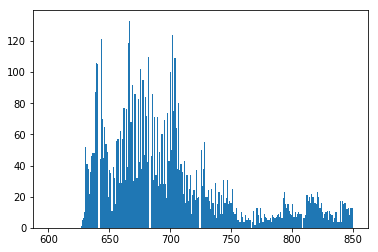

E:\MestradoData\p043\43_4_depth_151.yaml
4 151 E:\MestradoData\p043\43_4_depth_151.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_151.png (240, 320) (128, 128)


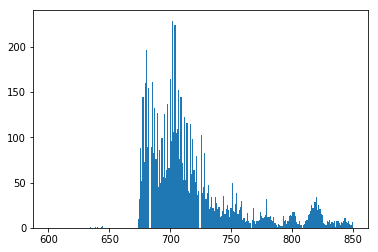

E:\MestradoData\p043\43_4_depth_161.yaml
4 161 E:\MestradoData\p043\43_4_depth_161.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_161.png (240, 320) (128, 128)


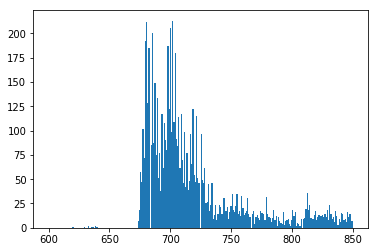

E:\MestradoData\p043\43_4_depth_171.yaml
4 171 E:\MestradoData\p043\43_4_depth_171.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_171.png (240, 320) (128, 128)


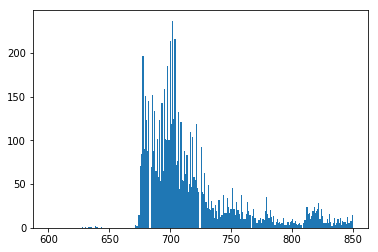

E:\MestradoData\p043\43_7_depth_151.yaml
7 151 E:\MestradoData\p043\43_7_depth_151.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_151.png (240, 320) (128, 128)


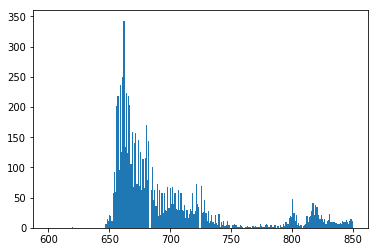

E:\MestradoData\p043\43_7_depth_161.yaml
7 161 E:\MestradoData\p043\43_7_depth_161.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_161.png (240, 320) (128, 128)


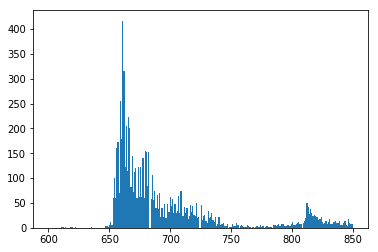

E:\MestradoData\p043\43_7_depth_171.yaml
7 171 E:\MestradoData\p043\43_7_depth_171.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_171.png (240, 320) (128, 128)


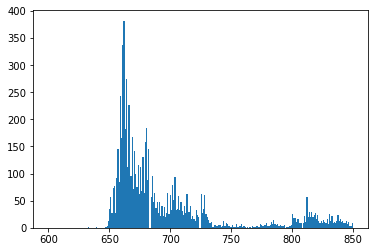

E:\MestradoData\p043\43_8_depth_151.yaml
8 151 E:\MestradoData\p043\43_8_depth_151.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_151.png (240, 320) (128, 128)


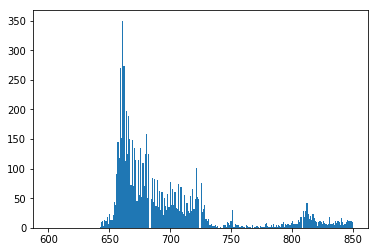

E:\MestradoData\p043\43_8_depth_161.yaml
8 161 E:\MestradoData\p043\43_8_depth_161.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_161.png (240, 320) (128, 128)


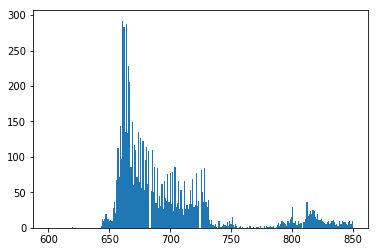

E:\MestradoData\p043\43_8_depth_171.yaml
8 171 E:\MestradoData\p043\43_8_depth_171.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_171.png (240, 320) (128, 128)


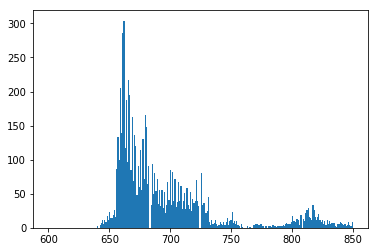

E:\MestradoData\p043\43_9_depth_151.yaml
9 151 E:\MestradoData\p043\43_9_depth_151.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_151.png (240, 320) (128, 128)


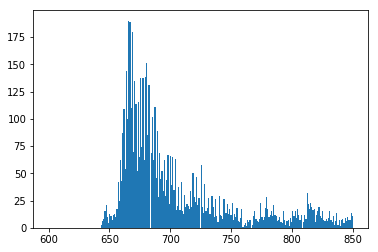

E:\MestradoData\p043\43_9_depth_161.yaml
9 161 E:\MestradoData\p043\43_9_depth_161.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_161.png (240, 320) (128, 128)


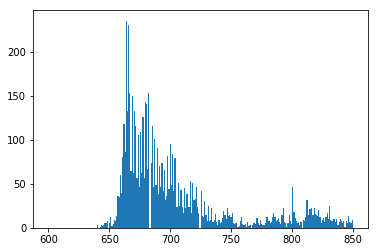

E:\MestradoData\p043\43_9_depth_171.yaml
9 171 E:\MestradoData\p043\43_9_depth_171.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_171.png (240, 320) (128, 128)


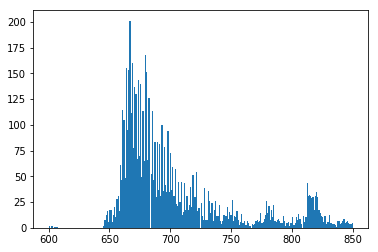

E:\MestradoData\p043\43_10_depth_151.yaml
10 151 E:\MestradoData\p043\43_10_depth_151.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_151.png (240, 320) (128, 128)


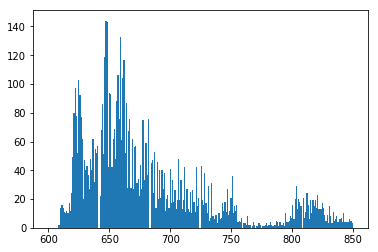

E:\MestradoData\p043\43_10_depth_161.yaml
10 161 E:\MestradoData\p043\43_10_depth_161.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_161.png (240, 320) (128, 128)


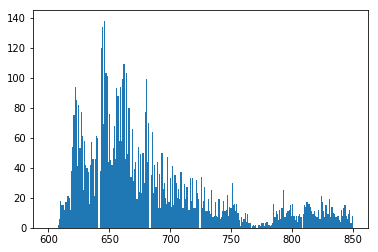

E:\MestradoData\p043\43_10_depth_171.yaml
10 171 E:\MestradoData\p043\43_10_depth_171.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_171.png (240, 320) (128, 128)


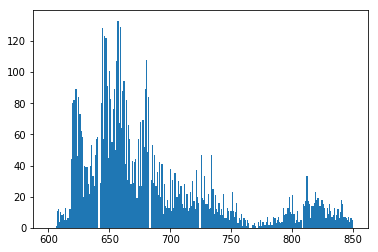

E:\MestradoData\p043\43_11_depth_151.yaml
11 151 E:\MestradoData\p043\43_11_depth_151.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_151.png (240, 320) (128, 128)


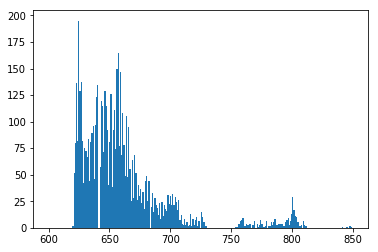

E:\MestradoData\p043\43_11_depth_161.yaml
11 161 E:\MestradoData\p043\43_11_depth_161.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_161.png (240, 320) (128, 128)


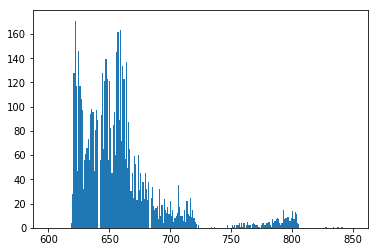

E:\MestradoData\p043\43_11_depth_171.yaml
11 171 E:\MestradoData\p043\43_11_depth_171.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_171.png (240, 320) (128, 128)


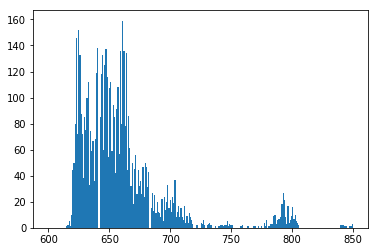

E:\MestradoData\p043\43_12_depth_151.yaml
12 151 E:\MestradoData\p043\43_12_depth_151.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_151.png (240, 320) (128, 128)


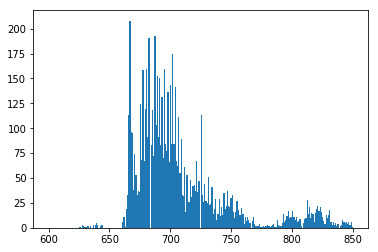

E:\MestradoData\p043\43_12_depth_161.yaml
12 161 E:\MestradoData\p043\43_12_depth_161.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_161.png (240, 320) (128, 128)


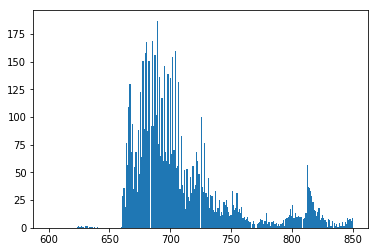

E:\MestradoData\p043\43_12_depth_171.yaml
12 171 E:\MestradoData\p043\43_12_depth_171.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_171.png (240, 320) (128, 128)


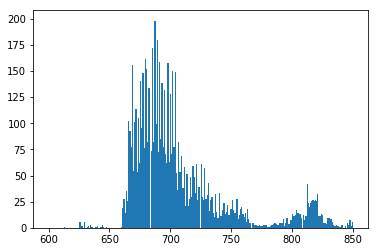

E:\MestradoData\p043\43_13_depth_151.yaml
13 151 E:\MestradoData\p043\43_13_depth_151.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_151.png (240, 320) (128, 128)


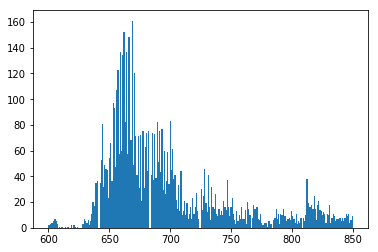

E:\MestradoData\p043\43_13_depth_161.yaml
13 161 E:\MestradoData\p043\43_13_depth_161.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_161.png (240, 320) (128, 128)


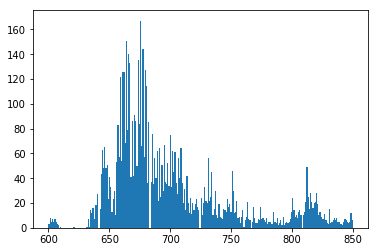

E:\MestradoData\p043\43_13_depth_171.yaml
13 171 E:\MestradoData\p043\43_13_depth_171.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_171.png (240, 320) (128, 128)


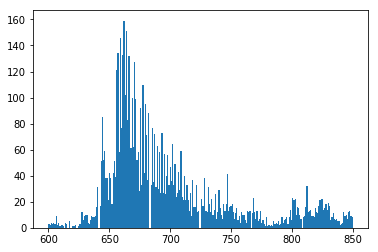

E:\MestradoData\p043\43_14_depth_151.yaml
14 151 E:\MestradoData\p043\43_14_depth_151.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_151.png (240, 320) (128, 128)


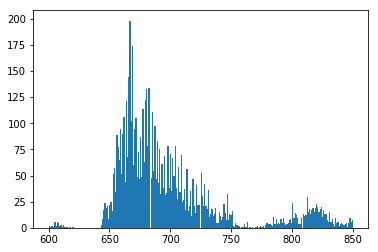

E:\MestradoData\p043\43_14_depth_161.yaml
14 161 E:\MestradoData\p043\43_14_depth_161.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_161.png (240, 320) (128, 128)


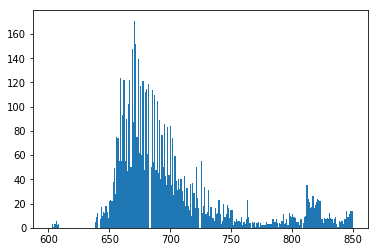

E:\MestradoData\p043\43_14_depth_171.yaml
14 171 E:\MestradoData\p043\43_14_depth_171.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_171.png (240, 320) (128, 128)


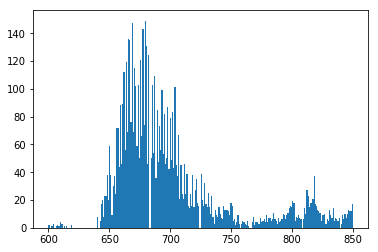

E:\MestradoData\p043\43_15_depth_151.yaml
15 151 E:\MestradoData\p043\43_15_depth_151.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_151.png (240, 320) (128, 128)


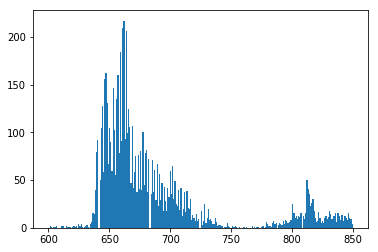

E:\MestradoData\p043\43_15_depth_161.yaml
15 161 E:\MestradoData\p043\43_15_depth_161.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_161.png (240, 320) (128, 128)


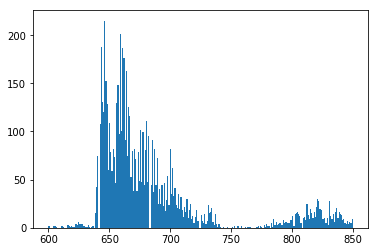

E:\MestradoData\p043\43_15_depth_171.yaml
15 171 E:\MestradoData\p043\43_15_depth_171.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_171.png (240, 320) (128, 128)


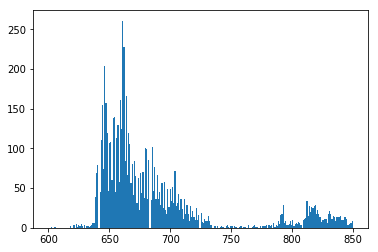

E:\MestradoData\p043\43_16_depth_151.yaml
16 151 E:\MestradoData\p043\43_16_depth_151.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_151.png (240, 320) (128, 128)


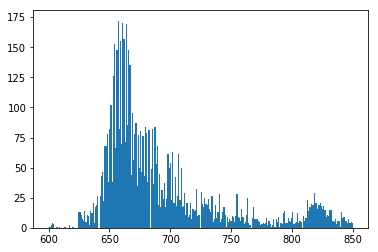

E:\MestradoData\p043\43_16_depth_161.yaml
16 161 E:\MestradoData\p043\43_16_depth_161.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_161.png (240, 320) (128, 128)


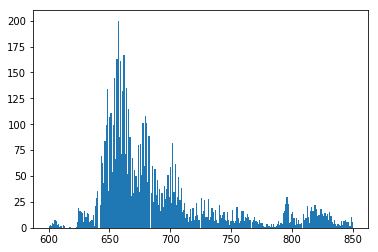

E:\MestradoData\p043\43_16_depth_171.yaml
16 171 E:\MestradoData\p043\43_16_depth_171.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_171.png (240, 320) (128, 128)


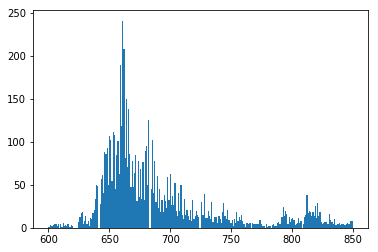

E:\MestradoData\p043\43_17_depth_151.yaml
17 151 E:\MestradoData\p043\43_17_depth_151.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_151.png (240, 320) (128, 128)


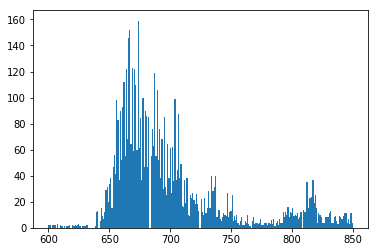

E:\MestradoData\p043\43_17_depth_161.yaml
17 161 E:\MestradoData\p043\43_17_depth_161.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_161.png (240, 320) (128, 128)


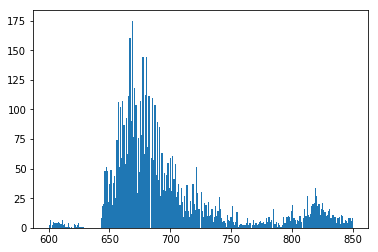

E:\MestradoData\p043\43_17_depth_171.yaml
17 171 E:\MestradoData\p043\43_17_depth_171.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_171.png (240, 320) (128, 128)


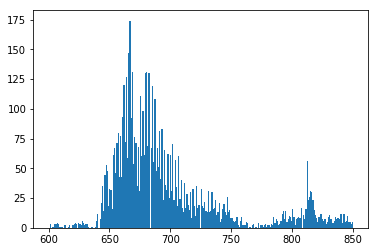

E:\MestradoData\p043\43_18_depth_151.yaml
18 151 E:\MestradoData\p043\43_18_depth_151.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_151.png (240, 320) (128, 128)


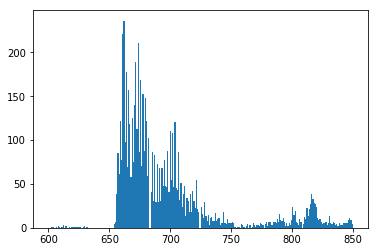

E:\MestradoData\p043\43_18_depth_161.yaml
18 161 E:\MestradoData\p043\43_18_depth_161.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_161.png (240, 320) (128, 128)


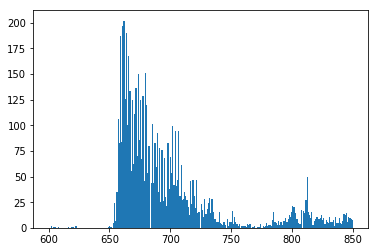

E:\MestradoData\p043\43_18_depth_171.yaml
18 171 E:\MestradoData\p043\43_18_depth_171.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_171.png (240, 320) (128, 128)


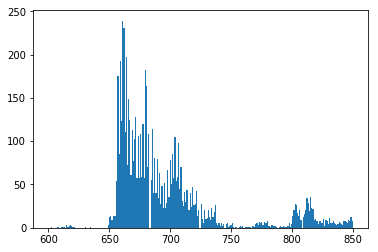

E:\MestradoData\p043\43_19_depth_151.yaml
19 151 E:\MestradoData\p043\43_19_depth_151.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_151.png (240, 320) (128, 128)


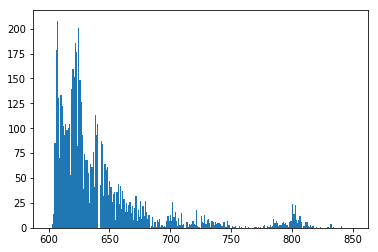

E:\MestradoData\p043\43_19_depth_161.yaml
19 161 E:\MestradoData\p043\43_19_depth_161.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_161.png (240, 320) (128, 128)


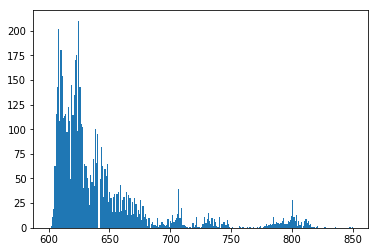

E:\MestradoData\p043\43_19_depth_171.yaml
19 171 E:\MestradoData\p043\43_19_depth_171.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_171.png (240, 320) (128, 128)


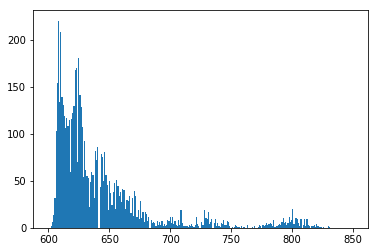

E:\MestradoData\p043\43_3_depth_181.yaml
3 181 E:\MestradoData\p043\43_3_depth_181.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_181.png (240, 320) (128, 128)


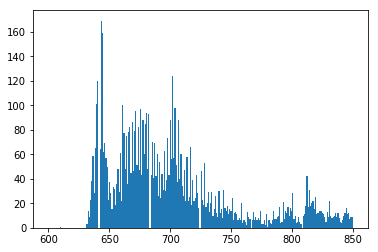

E:\MestradoData\p043\43_3_depth_191.yaml
3 191 E:\MestradoData\p043\43_3_depth_191.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_191.png (240, 320) (128, 128)


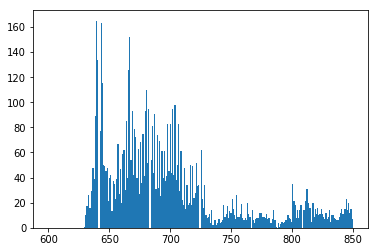

E:\MestradoData\p043\43_3_depth_201.yaml
3 201 E:\MestradoData\p043\43_3_depth_201.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_201.png (240, 320) (128, 128)


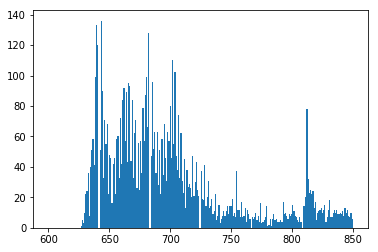

E:\MestradoData\p043\43_4_depth_181.yaml
4 181 E:\MestradoData\p043\43_4_depth_181.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_181.png (240, 320) (128, 128)


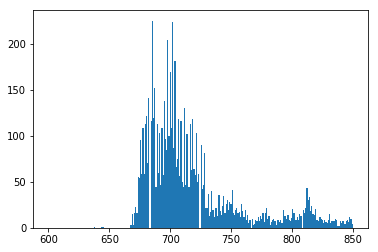

E:\MestradoData\p043\43_4_depth_191.yaml
4 191 E:\MestradoData\p043\43_4_depth_191.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_191.png (240, 320) (128, 128)


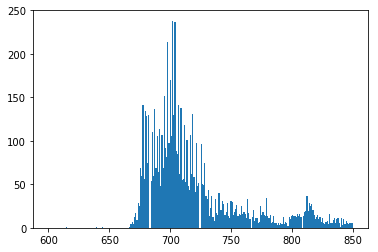

E:\MestradoData\p043\43_4_depth_201.yaml
4 201 E:\MestradoData\p043\43_4_depth_201.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_201.png (240, 320) (128, 128)


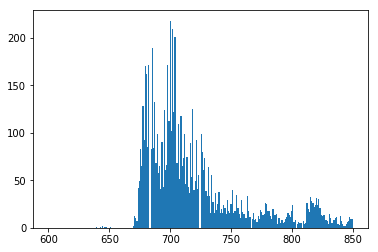

E:\MestradoData\p043\43_7_depth_181.yaml
7 181 E:\MestradoData\p043\43_7_depth_181.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_181.png (240, 320) (128, 128)


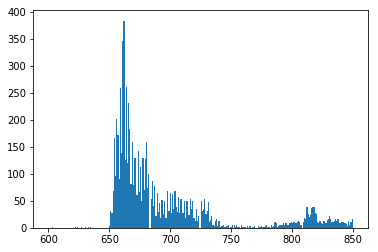

E:\MestradoData\p043\43_7_depth_191.yaml
7 191 E:\MestradoData\p043\43_7_depth_191.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_191.png (240, 320) (128, 128)


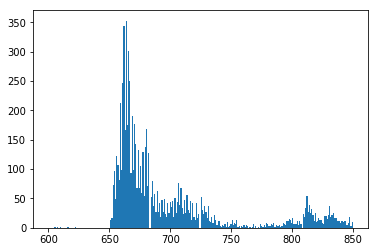

E:\MestradoData\p043\43_7_depth_201.yaml
7 201 E:\MestradoData\p043\43_7_depth_201.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_201.png (240, 320) (128, 128)


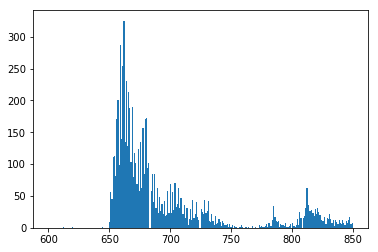

E:\MestradoData\p043\43_8_depth_181.yaml
8 181 E:\MestradoData\p043\43_8_depth_181.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_181.png (240, 320) (128, 128)


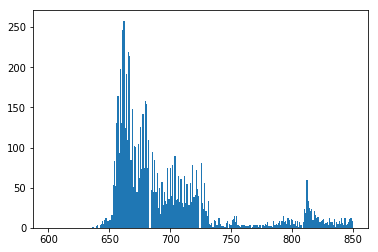

E:\MestradoData\p043\43_8_depth_191.yaml
8 191 E:\MestradoData\p043\43_8_depth_191.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_191.png (240, 320) (128, 128)


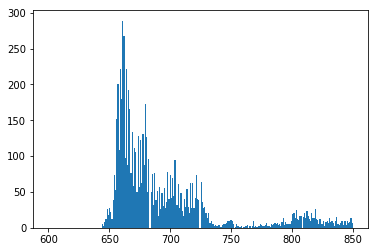

E:\MestradoData\p043\43_8_depth_201.yaml
8 201 E:\MestradoData\p043\43_8_depth_201.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_201.png (240, 320) (128, 128)


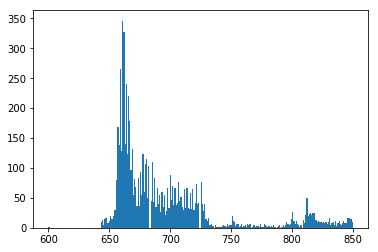

E:\MestradoData\p043\43_9_depth_181.yaml
9 181 E:\MestradoData\p043\43_9_depth_181.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_181.png (240, 320) (128, 128)


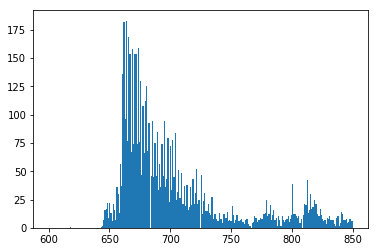

E:\MestradoData\p043\43_9_depth_191.yaml
9 191 E:\MestradoData\p043\43_9_depth_191.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_191.png (240, 320) (128, 128)


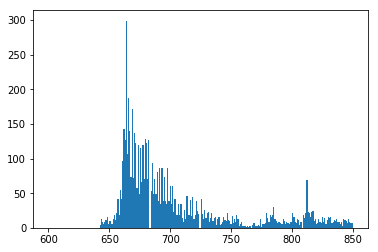

E:\MestradoData\p043\43_9_depth_201.yaml
9 201 E:\MestradoData\p043\43_9_depth_201.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_201.png (240, 320) (128, 128)


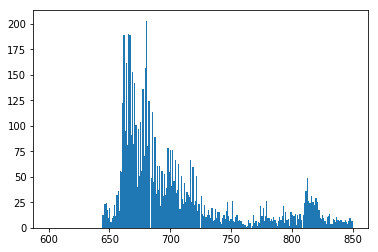

E:\MestradoData\p043\43_10_depth_181.yaml
10 181 E:\MestradoData\p043\43_10_depth_181.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_181.png (240, 320) (128, 128)


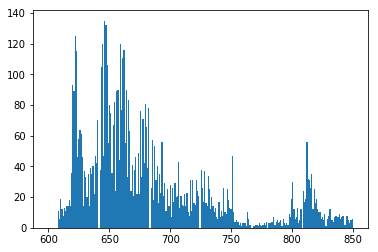

E:\MestradoData\p043\43_10_depth_191.yaml
10 191 E:\MestradoData\p043\43_10_depth_191.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_191.png (240, 320) (128, 128)


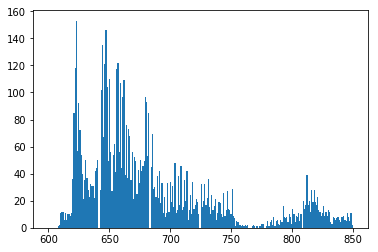

E:\MestradoData\p043\43_10_depth_201.yaml
10 201 E:\MestradoData\p043\43_10_depth_201.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_201.png (240, 320) (128, 128)


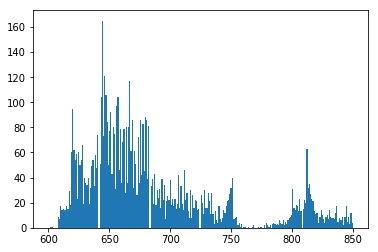

E:\MestradoData\p043\43_11_depth_181.yaml
11 181 E:\MestradoData\p043\43_11_depth_181.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_181.png (240, 320) (128, 128)


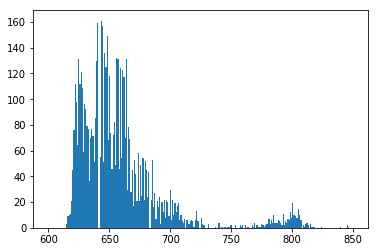

E:\MestradoData\p043\43_11_depth_191.yaml
11 191 E:\MestradoData\p043\43_11_depth_191.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_191.png (240, 320) (128, 128)


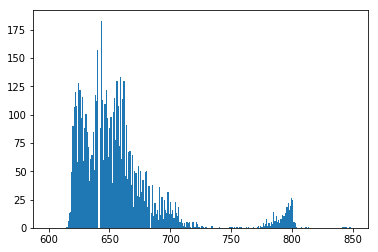

E:\MestradoData\p043\43_11_depth_201.yaml
11 201 E:\MestradoData\p043\43_11_depth_201.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_201.png (240, 320) (128, 128)


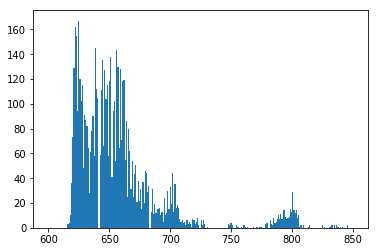

E:\MestradoData\p043\43_12_depth_181.yaml
12 181 E:\MestradoData\p043\43_12_depth_181.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_181.png (240, 320) (128, 128)


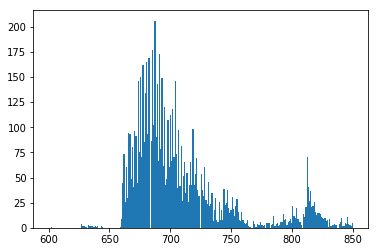

E:\MestradoData\p043\43_12_depth_191.yaml
12 191 E:\MestradoData\p043\43_12_depth_191.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_191.png (240, 320) (128, 128)


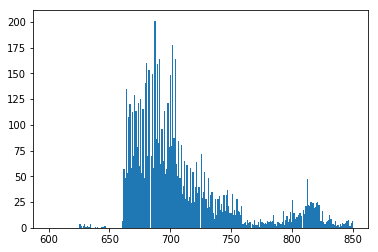

E:\MestradoData\p043\43_12_depth_201.yaml
12 201 E:\MestradoData\p043\43_12_depth_201.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_201.png (240, 320) (128, 128)


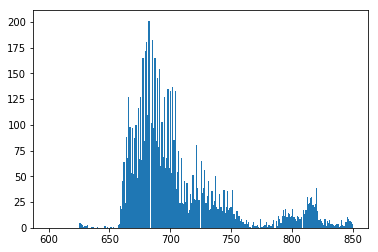

E:\MestradoData\p043\43_13_depth_181.yaml
13 181 E:\MestradoData\p043\43_13_depth_181.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_181.png (240, 320) (128, 128)


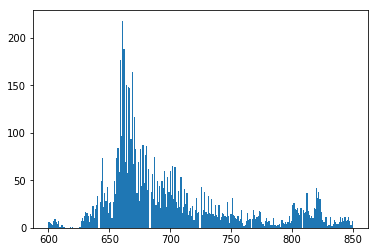

E:\MestradoData\p043\43_13_depth_191.yaml
13 191 E:\MestradoData\p043\43_13_depth_191.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_191.png (240, 320) (128, 128)


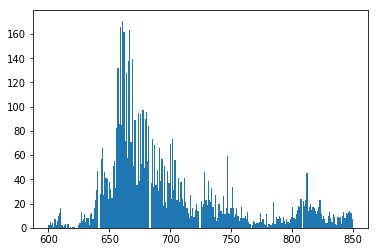

E:\MestradoData\p043\43_13_depth_201.yaml
13 201 E:\MestradoData\p043\43_13_depth_201.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_201.png (240, 320) (128, 128)


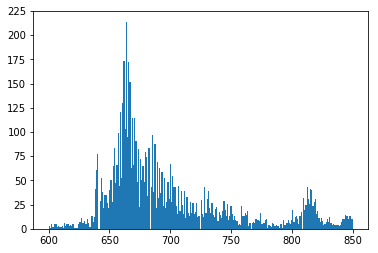

E:\MestradoData\p043\43_14_depth_181.yaml
14 181 E:\MestradoData\p043\43_14_depth_181.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_181.png (240, 320) (128, 128)


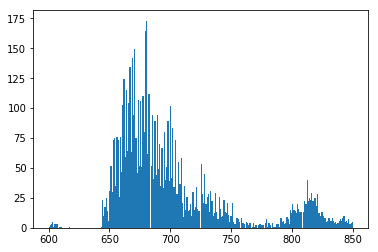

E:\MestradoData\p043\43_14_depth_191.yaml
14 191 E:\MestradoData\p043\43_14_depth_191.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_191.png (240, 320) (128, 128)


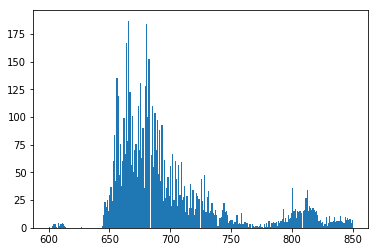

E:\MestradoData\p043\43_14_depth_201.yaml
14 201 E:\MestradoData\p043\43_14_depth_201.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_201.png (240, 320) (128, 128)


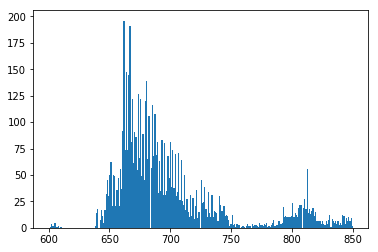

E:\MestradoData\p043\43_15_depth_181.yaml
15 181 E:\MestradoData\p043\43_15_depth_181.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_181.png (240, 320) (128, 128)


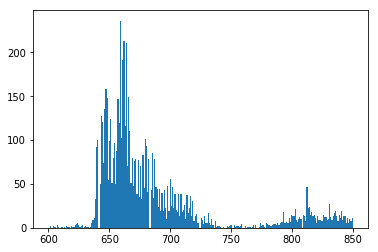

E:\MestradoData\p043\43_15_depth_191.yaml
15 191 E:\MestradoData\p043\43_15_depth_191.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_191.png (240, 320) (128, 128)


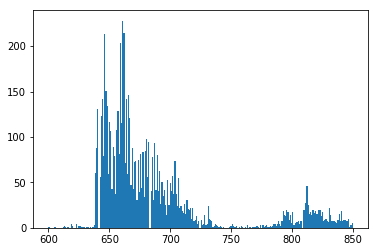

E:\MestradoData\p043\43_15_depth_201.yaml
15 201 E:\MestradoData\p043\43_15_depth_201.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_201.png (240, 320) (128, 128)


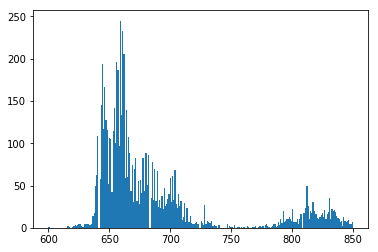

E:\MestradoData\p043\43_16_depth_181.yaml
16 181 E:\MestradoData\p043\43_16_depth_181.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_181.png (240, 320) (128, 128)


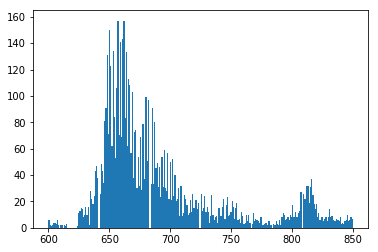

E:\MestradoData\p043\43_16_depth_191.yaml
16 191 E:\MestradoData\p043\43_16_depth_191.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_191.png (240, 320) (128, 128)


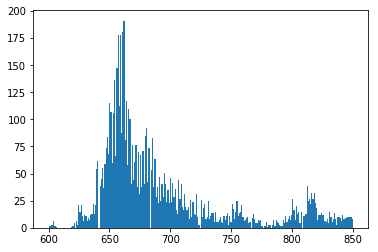

E:\MestradoData\p043\43_16_depth_201.yaml
16 201 E:\MestradoData\p043\43_16_depth_201.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_201.png (240, 320) (128, 128)


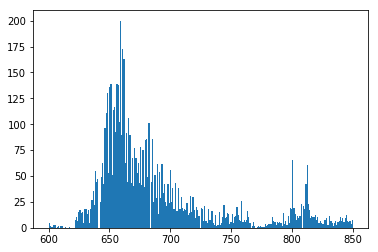

E:\MestradoData\p043\43_17_depth_181.yaml
17 181 E:\MestradoData\p043\43_17_depth_181.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_181.png (240, 320) (128, 128)


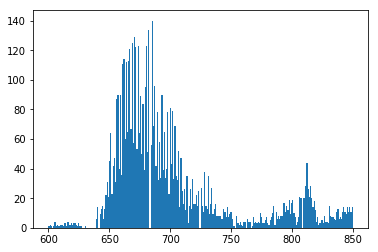

E:\MestradoData\p043\43_17_depth_191.yaml
17 191 E:\MestradoData\p043\43_17_depth_191.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_191.png (240, 320) (128, 128)


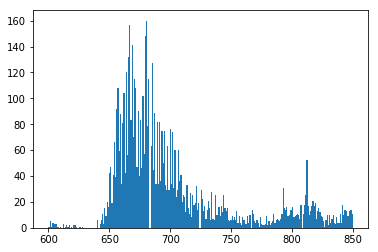

E:\MestradoData\p043\43_17_depth_201.yaml
17 201 E:\MestradoData\p043\43_17_depth_201.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_201.png (240, 320) (128, 128)


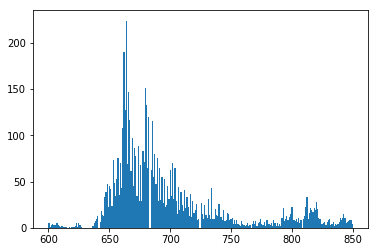

E:\MestradoData\p043\43_18_depth_181.yaml
18 181 E:\MestradoData\p043\43_18_depth_181.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_181.png (240, 320) (128, 128)


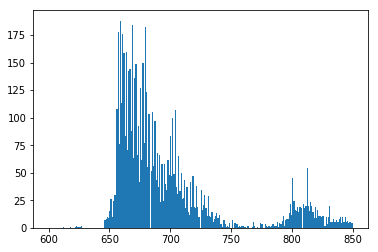

E:\MestradoData\p043\43_18_depth_191.yaml
18 191 E:\MestradoData\p043\43_18_depth_191.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_191.png (240, 320) (128, 128)


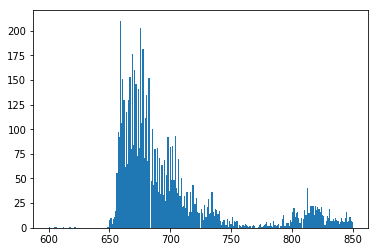

E:\MestradoData\p043\43_18_depth_201.yaml
18 201 E:\MestradoData\p043\43_18_depth_201.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_201.png (240, 320) (128, 128)


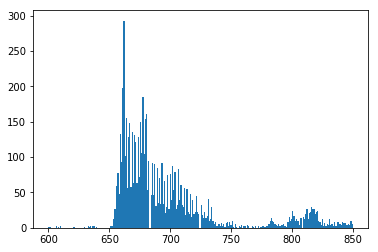

E:\MestradoData\p043\43_19_depth_181.yaml
19 181 E:\MestradoData\p043\43_19_depth_181.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_181.png (240, 320) (128, 128)


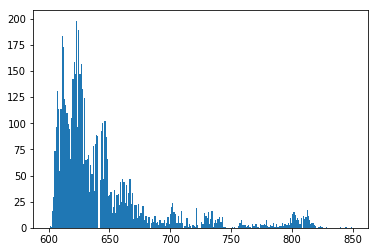

E:\MestradoData\p043\43_19_depth_191.yaml
19 191 E:\MestradoData\p043\43_19_depth_191.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_191.png (240, 320) (128, 128)


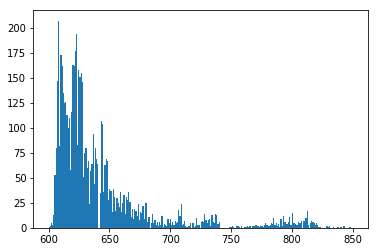

E:\MestradoData\p043\43_19_depth_201.yaml
19 201 E:\MestradoData\p043\43_19_depth_201.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_201.png (240, 320) (128, 128)


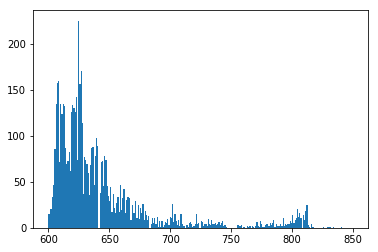

E:\MestradoData\p043\43_3_depth_211.yaml
3 211 E:\MestradoData\p043\43_3_depth_211.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_211.png (240, 320) (128, 128)


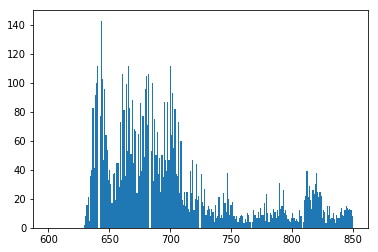

E:\MestradoData\p043\43_3_depth_221.yaml
3 221 E:\MestradoData\p043\43_3_depth_221.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_221.png (240, 320) (128, 128)


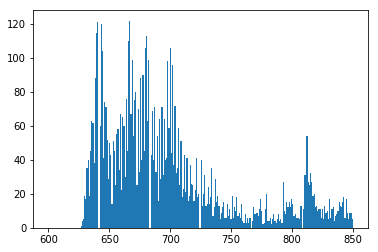

E:\MestradoData\p043\43_3_depth_231.yaml
3 231 E:\MestradoData\p043\43_3_depth_231.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_231.png (240, 320) (128, 128)


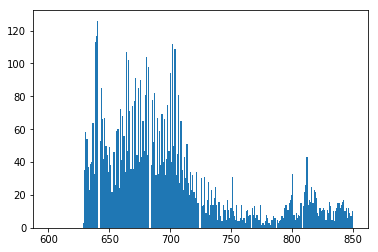

E:\MestradoData\p043\43_4_depth_211.yaml
4 211 E:\MestradoData\p043\43_4_depth_211.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_211.png (240, 320) (128, 128)


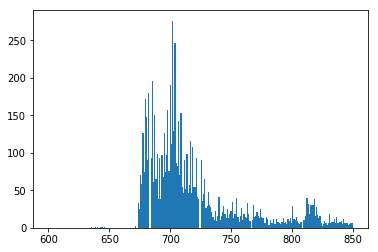

E:\MestradoData\p043\43_4_depth_221.yaml
4 221 E:\MestradoData\p043\43_4_depth_221.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_221.png (240, 320) (128, 128)


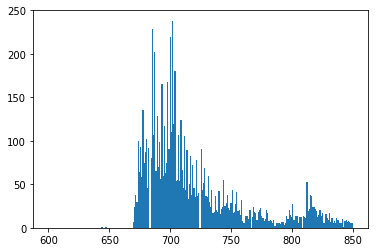

E:\MestradoData\p043\43_4_depth_231.yaml
4 231 E:\MestradoData\p043\43_4_depth_231.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_231.png (240, 320) (128, 128)


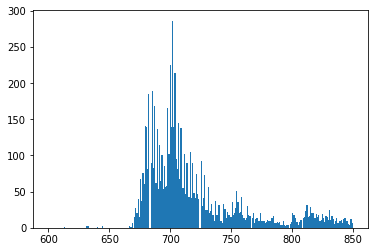

E:\MestradoData\p043\43_7_depth_211.yaml
7 211 E:\MestradoData\p043\43_7_depth_211.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_211.png (240, 320) (128, 128)


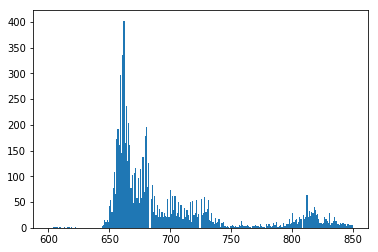

E:\MestradoData\p043\43_7_depth_221.yaml
7 221 E:\MestradoData\p043\43_7_depth_221.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_221.png (240, 320) (128, 128)


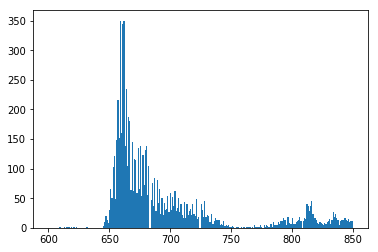

E:\MestradoData\p043\43_7_depth_231.yaml
7 231 E:\MestradoData\p043\43_7_depth_231.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_231.png (240, 320) (128, 128)


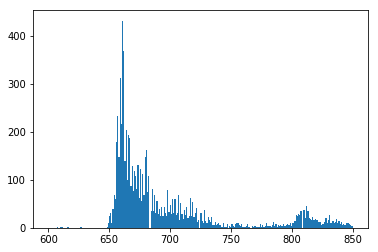

E:\MestradoData\p043\43_8_depth_211.yaml
8 211 E:\MestradoData\p043\43_8_depth_211.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_211.png (240, 320) (128, 128)


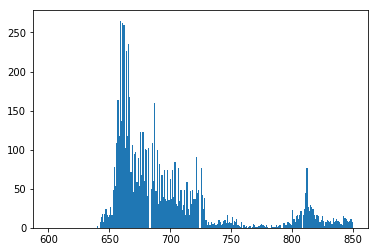

E:\MestradoData\p043\43_8_depth_221.yaml
8 221 E:\MestradoData\p043\43_8_depth_221.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_221.png (240, 320) (128, 128)


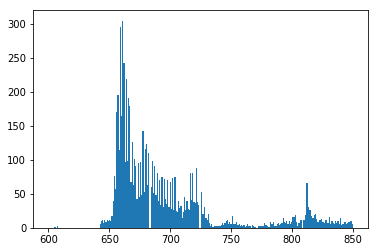

E:\MestradoData\p043\43_8_depth_231.yaml
8 231 E:\MestradoData\p043\43_8_depth_231.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_231.png (240, 320) (128, 128)


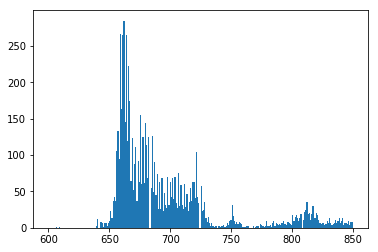

E:\MestradoData\p043\43_9_depth_211.yaml
9 211 E:\MestradoData\p043\43_9_depth_211.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_211.png (240, 320) (128, 128)


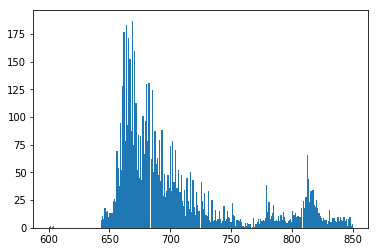

E:\MestradoData\p043\43_9_depth_221.yaml
9 221 E:\MestradoData\p043\43_9_depth_221.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_221.png (240, 320) (128, 128)


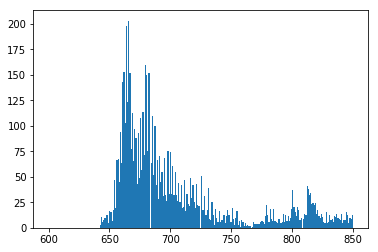

E:\MestradoData\p043\43_9_depth_231.yaml
9 231 E:\MestradoData\p043\43_9_depth_231.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_231.png (240, 320) (128, 128)


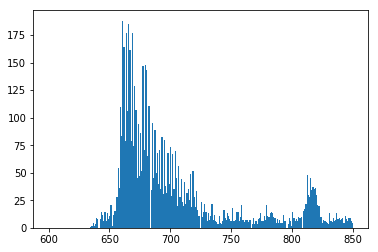

E:\MestradoData\p043\43_10_depth_211.yaml
10 211 E:\MestradoData\p043\43_10_depth_211.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_211.png (240, 320) (128, 128)


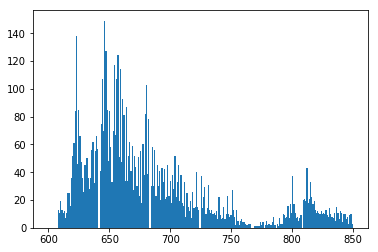

E:\MestradoData\p043\43_10_depth_221.yaml
10 221 E:\MestradoData\p043\43_10_depth_221.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_221.png (240, 320) (128, 128)


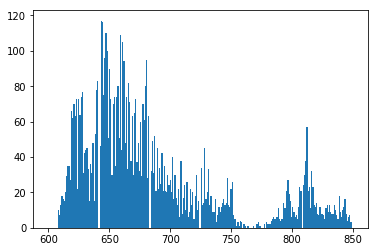

E:\MestradoData\p043\43_10_depth_231.yaml
10 231 E:\MestradoData\p043\43_10_depth_231.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_231.png (240, 320) (128, 128)


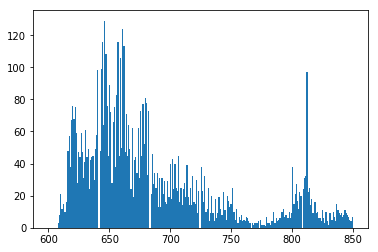

E:\MestradoData\p043\43_11_depth_211.yaml
11 211 E:\MestradoData\p043\43_11_depth_211.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_211.png (240, 320) (128, 128)


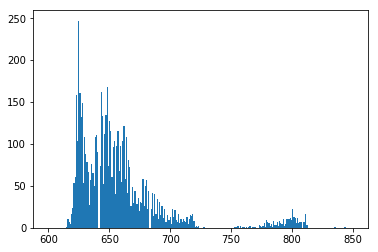

E:\MestradoData\p043\43_11_depth_221.yaml
11 221 E:\MestradoData\p043\43_11_depth_221.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_221.png (240, 320) (128, 128)


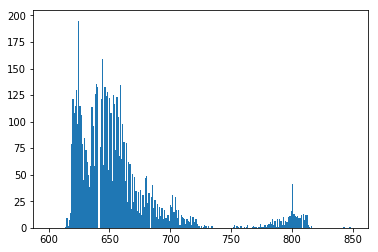

E:\MestradoData\p043\43_11_depth_231.yaml
11 231 E:\MestradoData\p043\43_11_depth_231.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_231.png (240, 320) (128, 128)


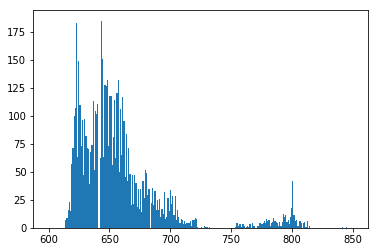

E:\MestradoData\p043\43_12_depth_211.yaml
12 211 E:\MestradoData\p043\43_12_depth_211.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_211.png (240, 320) (128, 128)


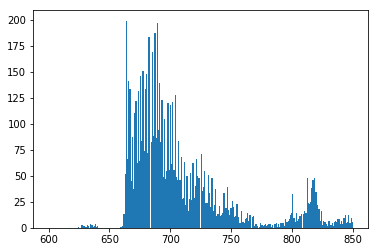

E:\MestradoData\p043\43_12_depth_221.yaml
12 221 E:\MestradoData\p043\43_12_depth_221.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_221.png (240, 320) (128, 128)


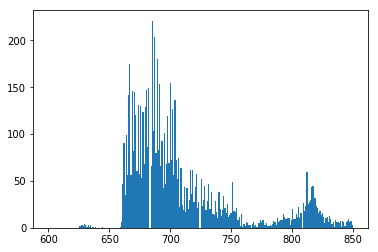

E:\MestradoData\p043\43_12_depth_231.yaml
12 231 E:\MestradoData\p043\43_12_depth_231.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_231.png (240, 320) (128, 128)


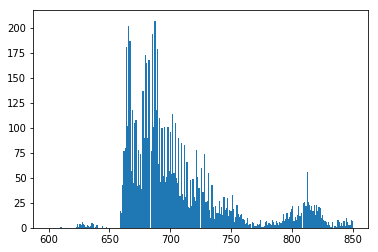

E:\MestradoData\p043\43_13_depth_211.yaml
13 211 E:\MestradoData\p043\43_13_depth_211.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_211.png (240, 320) (128, 128)


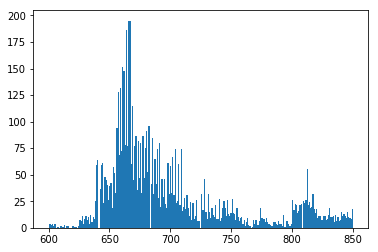

E:\MestradoData\p043\43_13_depth_221.yaml
13 221 E:\MestradoData\p043\43_13_depth_221.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_221.png (240, 320) (128, 128)


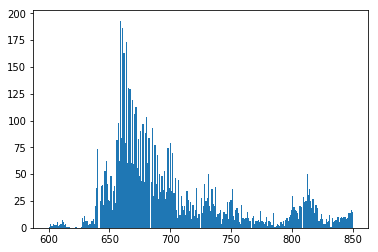

E:\MestradoData\p043\43_13_depth_231.yaml
13 231 E:\MestradoData\p043\43_13_depth_231.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_231.png (240, 320) (128, 128)


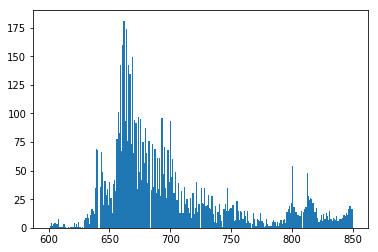

E:\MestradoData\p043\43_14_depth_211.yaml
14 211 E:\MestradoData\p043\43_14_depth_211.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_211.png (240, 320) (128, 128)


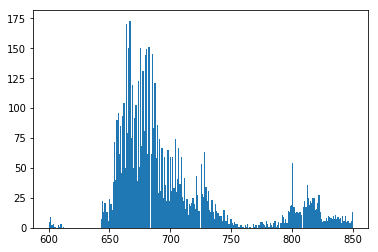

E:\MestradoData\p043\43_14_depth_221.yaml
14 221 E:\MestradoData\p043\43_14_depth_221.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_221.png (240, 320) (128, 128)


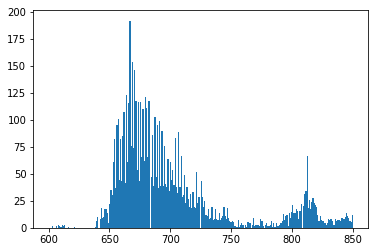

E:\MestradoData\p043\43_14_depth_231.yaml
14 231 E:\MestradoData\p043\43_14_depth_231.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_231.png (240, 320) (128, 128)


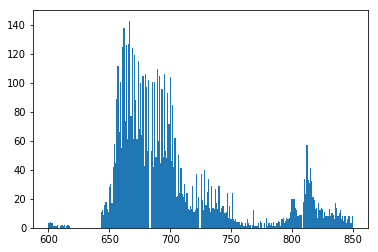

E:\MestradoData\p043\43_15_depth_211.yaml
15 211 E:\MestradoData\p043\43_15_depth_211.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_211.png (240, 320) (128, 128)


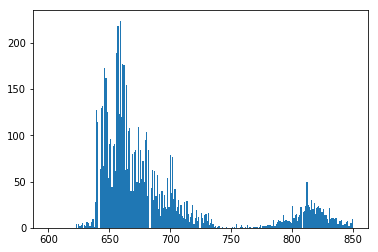

E:\MestradoData\p043\43_15_depth_221.yaml
15 221 E:\MestradoData\p043\43_15_depth_221.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_221.png (240, 320) (128, 128)


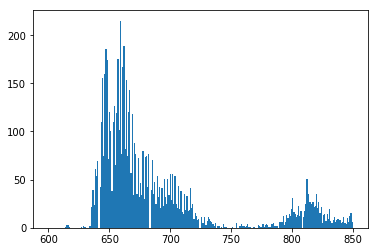

E:\MestradoData\p043\43_15_depth_231.yaml
15 231 E:\MestradoData\p043\43_15_depth_231.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_231.png (240, 320) (128, 128)


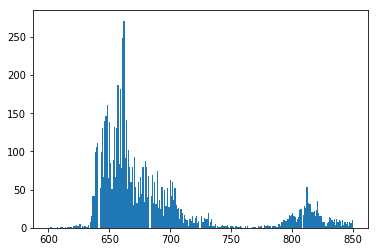

E:\MestradoData\p043\43_16_depth_211.yaml
16 211 E:\MestradoData\p043\43_16_depth_211.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_211.png (240, 320) (128, 128)


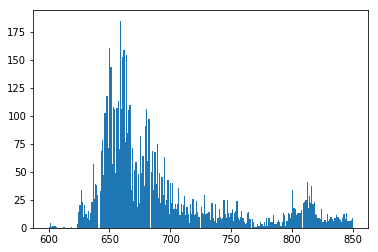

E:\MestradoData\p043\43_16_depth_221.yaml
16 221 E:\MestradoData\p043\43_16_depth_221.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_221.png (240, 320) (128, 128)


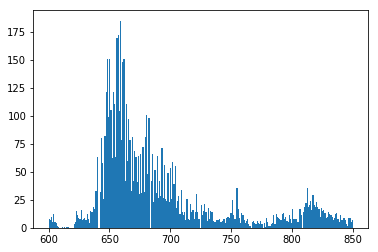

E:\MestradoData\p043\43_16_depth_231.yaml
16 231 E:\MestradoData\p043\43_16_depth_231.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_231.png (240, 320) (128, 128)


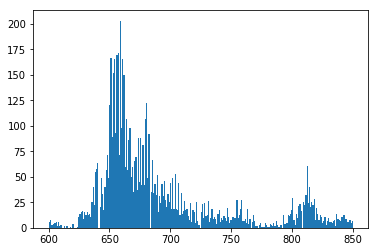

E:\MestradoData\p043\43_17_depth_211.yaml
17 211 E:\MestradoData\p043\43_17_depth_211.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_211.png (240, 320) (128, 128)


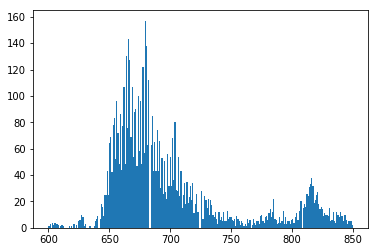

E:\MestradoData\p043\43_17_depth_221.yaml
17 221 E:\MestradoData\p043\43_17_depth_221.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_221.png (240, 320) (128, 128)


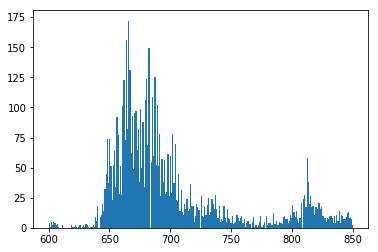

E:\MestradoData\p043\43_17_depth_231.yaml
17 231 E:\MestradoData\p043\43_17_depth_231.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_231.png (240, 320) (128, 128)


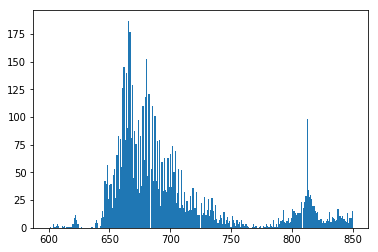

E:\MestradoData\p043\43_18_depth_211.yaml
18 211 E:\MestradoData\p043\43_18_depth_211.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_211.png (240, 320) (128, 128)


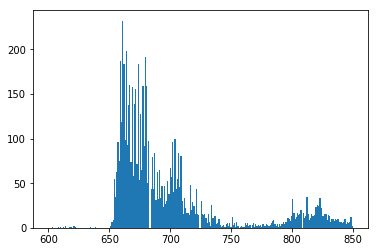

E:\MestradoData\p043\43_18_depth_221.yaml
18 221 E:\MestradoData\p043\43_18_depth_221.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_221.png (240, 320) (128, 128)


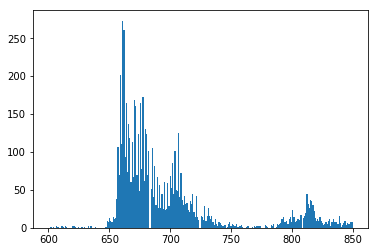

E:\MestradoData\p043\43_18_depth_231.yaml
18 231 E:\MestradoData\p043\43_18_depth_231.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_231.png (240, 320) (128, 128)


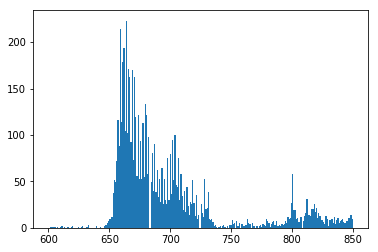

E:\MestradoData\p043\43_19_depth_211.yaml
19 211 E:\MestradoData\p043\43_19_depth_211.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_211.png (240, 320) (128, 128)


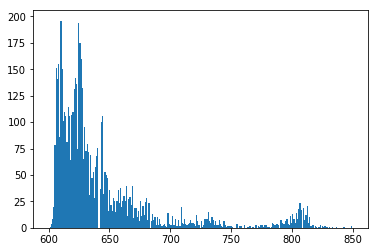

E:\MestradoData\p043\43_19_depth_221.yaml
19 221 E:\MestradoData\p043\43_19_depth_221.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_221.png (240, 320) (128, 128)


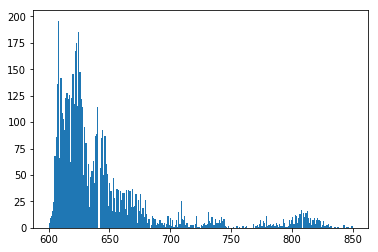

E:\MestradoData\p043\43_19_depth_231.yaml
19 231 E:\MestradoData\p043\43_19_depth_231.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_231.png (240, 320) (128, 128)


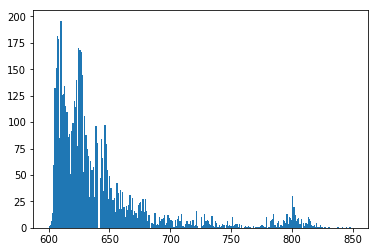

E:\MestradoData\p043\43_3_depth_241.yaml
3 241 E:\MestradoData\p043\43_3_depth_241.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_241.png (240, 320) (128, 128)


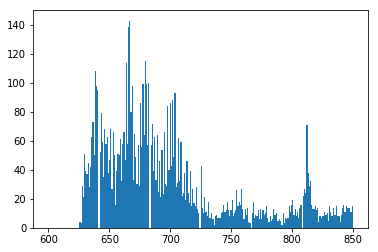

E:\MestradoData\p043\43_3_depth_251.yaml
3 251 E:\MestradoData\p043\43_3_depth_251.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_251.png (240, 320) (128, 128)


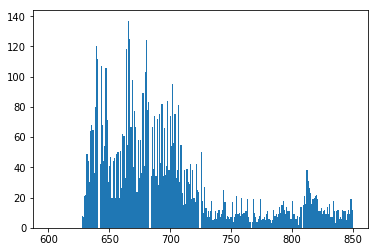

E:\MestradoData\p043\43_3_depth_261.yaml
3 261 E:\MestradoData\p043\43_3_depth_261.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_261.png (240, 320) (128, 128)


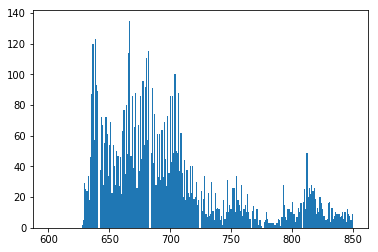

E:\MestradoData\p043\43_4_depth_241.yaml
4 241 E:\MestradoData\p043\43_4_depth_241.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_241.png (240, 320) (128, 128)


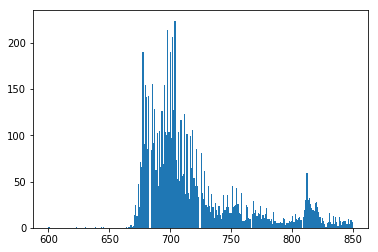

E:\MestradoData\p043\43_4_depth_251.yaml
4 251 E:\MestradoData\p043\43_4_depth_251.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_251.png (240, 320) (128, 128)


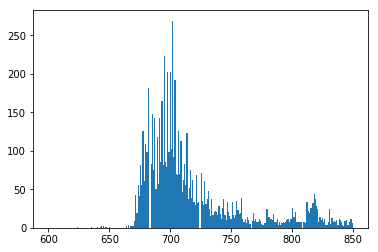

E:\MestradoData\p043\43_4_depth_261.yaml
4 261 E:\MestradoData\p043\43_4_depth_261.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_261.png (240, 320) (128, 128)


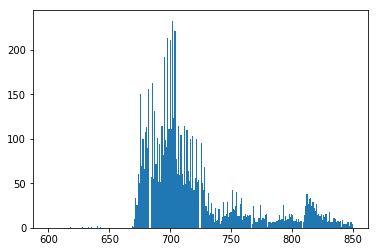

E:\MestradoData\p043\43_7_depth_241.yaml
7 241 E:\MestradoData\p043\43_7_depth_241.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_241.png (240, 320) (128, 128)


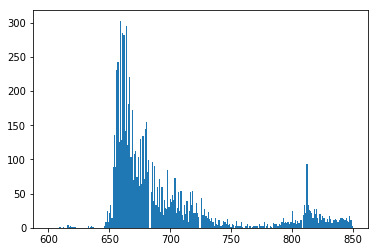

E:\MestradoData\p043\43_7_depth_251.yaml
7 251 E:\MestradoData\p043\43_7_depth_251.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_251.png (240, 320) (128, 128)


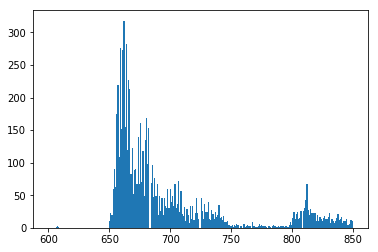

E:\MestradoData\p043\43_7_depth_261.yaml
7 261 E:\MestradoData\p043\43_7_depth_261.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_261.png (240, 320) (128, 128)


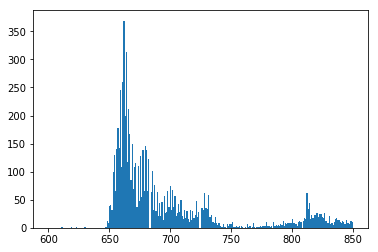

E:\MestradoData\p043\43_8_depth_241.yaml
8 241 E:\MestradoData\p043\43_8_depth_241.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_241.png (240, 320) (128, 128)


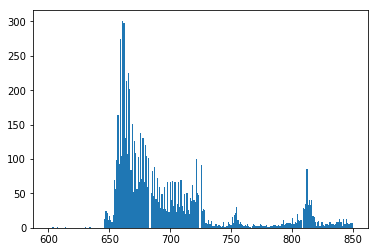

E:\MestradoData\p043\43_8_depth_251.yaml
8 251 E:\MestradoData\p043\43_8_depth_251.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_251.png (240, 320) (128, 128)


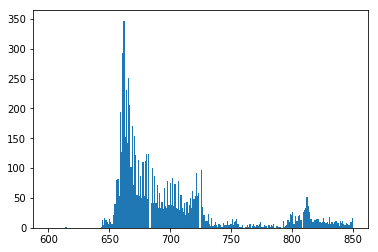

E:\MestradoData\p043\43_8_depth_261.yaml
8 261 E:\MestradoData\p043\43_8_depth_261.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_261.png (240, 320) (128, 128)


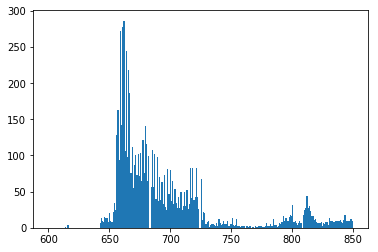

E:\MestradoData\p043\43_9_depth_241.yaml
9 241 E:\MestradoData\p043\43_9_depth_241.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_241.png (240, 320) (128, 128)


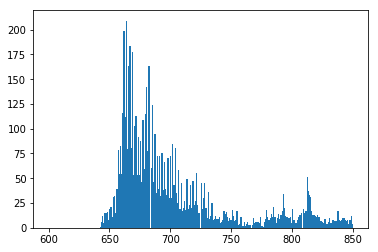

E:\MestradoData\p043\43_9_depth_251.yaml
9 251 E:\MestradoData\p043\43_9_depth_251.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_251.png (240, 320) (128, 128)


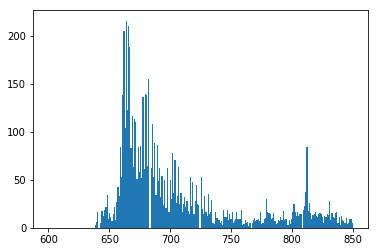

E:\MestradoData\p043\43_9_depth_261.yaml
9 261 E:\MestradoData\p043\43_9_depth_261.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_261.png (240, 320) (128, 128)


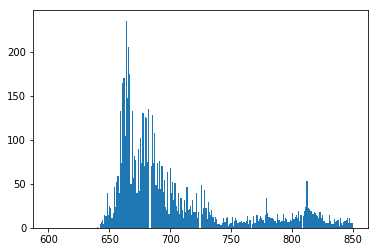

E:\MestradoData\p043\43_10_depth_241.yaml
10 241 E:\MestradoData\p043\43_10_depth_241.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_241.png (240, 320) (128, 128)


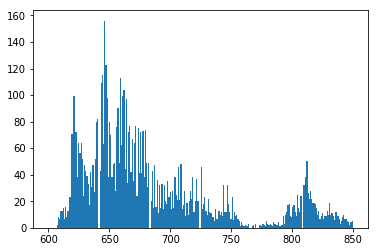

E:\MestradoData\p043\43_10_depth_251.yaml
10 251 E:\MestradoData\p043\43_10_depth_251.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_251.png (240, 320) (128, 128)


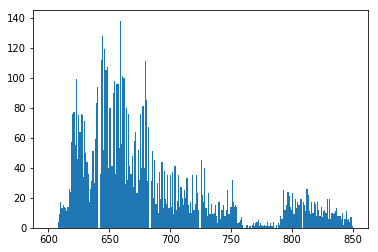

E:\MestradoData\p043\43_10_depth_261.yaml
10 261 E:\MestradoData\p043\43_10_depth_261.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_261.png (240, 320) (128, 128)


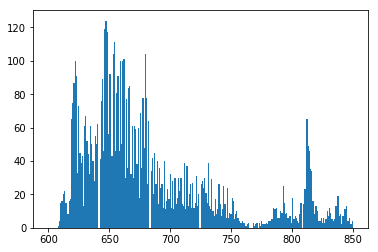

E:\MestradoData\p043\43_11_depth_241.yaml
11 241 E:\MestradoData\p043\43_11_depth_241.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_241.png (240, 320) (128, 128)


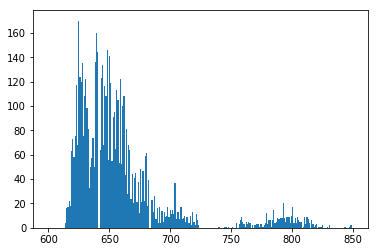

E:\MestradoData\p043\43_11_depth_251.yaml
11 251 E:\MestradoData\p043\43_11_depth_251.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_251.png (240, 320) (128, 128)


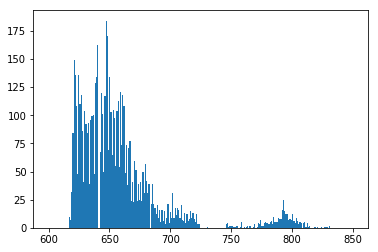

E:\MestradoData\p043\43_11_depth_261.yaml
11 261 E:\MestradoData\p043\43_11_depth_261.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_261.png (240, 320) (128, 128)


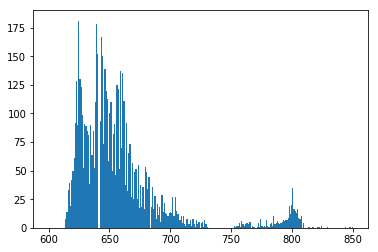

E:\MestradoData\p043\43_12_depth_241.yaml
12 241 E:\MestradoData\p043\43_12_depth_241.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_241.png (240, 320) (128, 128)


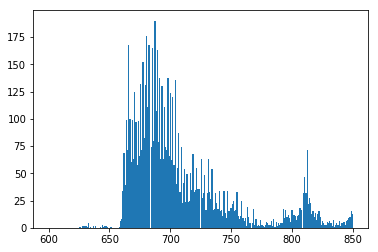

E:\MestradoData\p043\43_12_depth_251.yaml
12 251 E:\MestradoData\p043\43_12_depth_251.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_251.png (240, 320) (128, 128)


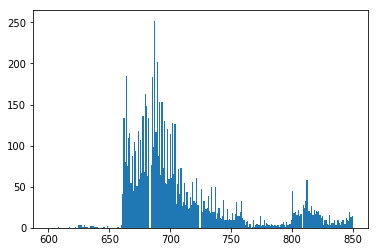

E:\MestradoData\p043\43_12_depth_261.yaml
12 261 E:\MestradoData\p043\43_12_depth_261.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_261.png (240, 320) (128, 128)


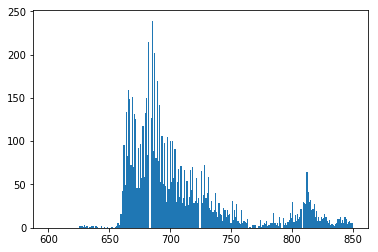

E:\MestradoData\p043\43_13_depth_241.yaml
13 241 E:\MestradoData\p043\43_13_depth_241.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_241.png (240, 320) (128, 128)


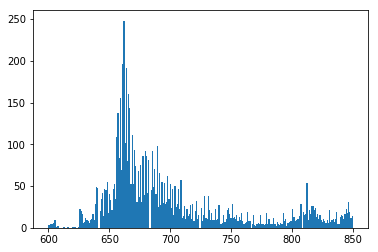

E:\MestradoData\p043\43_13_depth_251.yaml
13 251 E:\MestradoData\p043\43_13_depth_251.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_251.png (240, 320) (128, 128)


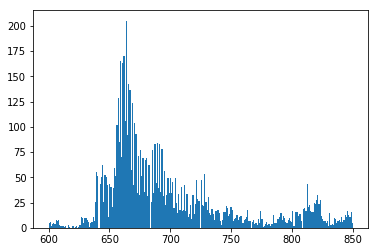

E:\MestradoData\p043\43_13_depth_261.yaml
13 261 E:\MestradoData\p043\43_13_depth_261.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_261.png (240, 320) (128, 128)


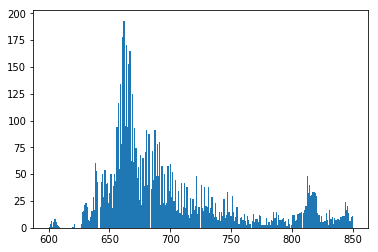

E:\MestradoData\p043\43_14_depth_241.yaml
14 241 E:\MestradoData\p043\43_14_depth_241.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_241.png (240, 320) (128, 128)


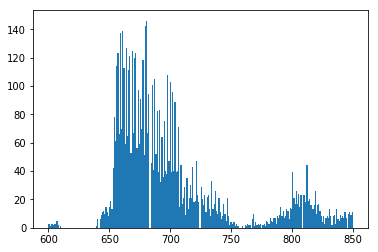

E:\MestradoData\p043\43_14_depth_251.yaml
14 251 E:\MestradoData\p043\43_14_depth_251.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_251.png (240, 320) (128, 128)


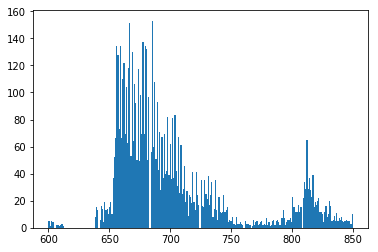

E:\MestradoData\p043\43_14_depth_261.yaml
14 261 E:\MestradoData\p043\43_14_depth_261.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_261.png (240, 320) (128, 128)


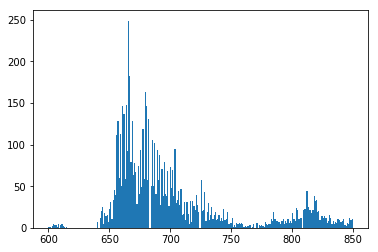

E:\MestradoData\p043\43_15_depth_241.yaml
15 241 E:\MestradoData\p043\43_15_depth_241.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_241.png (240, 320) (128, 128)


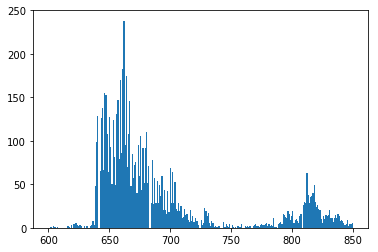

E:\MestradoData\p043\43_15_depth_251.yaml
15 251 E:\MestradoData\p043\43_15_depth_251.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_251.png (240, 320) (128, 128)


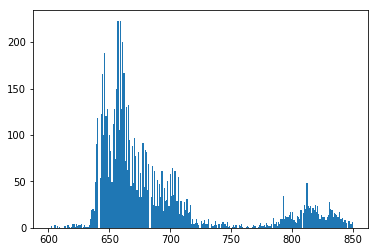

E:\MestradoData\p043\43_15_depth_261.yaml
15 261 E:\MestradoData\p043\43_15_depth_261.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_261.png (240, 320) (128, 128)


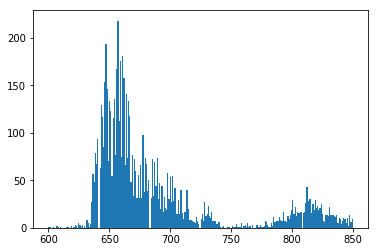

E:\MestradoData\p043\43_16_depth_241.yaml
16 241 E:\MestradoData\p043\43_16_depth_241.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_241.png (240, 320) (128, 128)


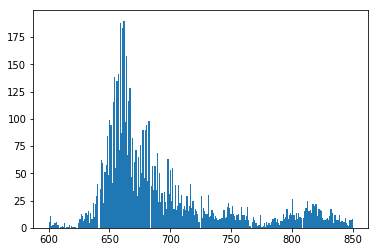

E:\MestradoData\p043\43_16_depth_251.yaml
16 251 E:\MestradoData\p043\43_16_depth_251.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_251.png (240, 320) (128, 128)


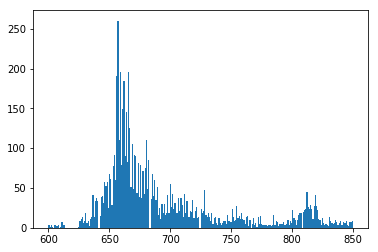

E:\MestradoData\p043\43_16_depth_261.yaml
16 261 E:\MestradoData\p043\43_16_depth_261.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_261.png (240, 320) (128, 128)


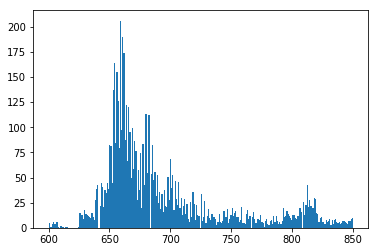

E:\MestradoData\p043\43_17_depth_241.yaml
17 241 E:\MestradoData\p043\43_17_depth_241.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_241.png (240, 320) (128, 128)


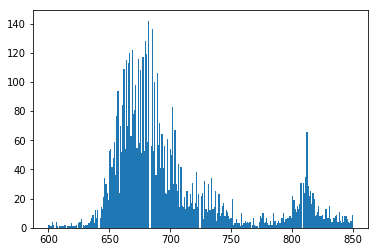

E:\MestradoData\p043\43_17_depth_251.yaml
17 251 E:\MestradoData\p043\43_17_depth_251.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_251.png (240, 320) (128, 128)


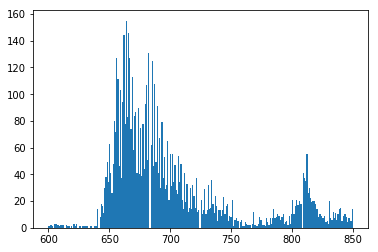

E:\MestradoData\p043\43_17_depth_261.yaml
17 261 E:\MestradoData\p043\43_17_depth_261.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_261.png (240, 320) (128, 128)


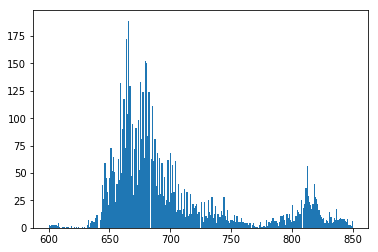

E:\MestradoData\p043\43_18_depth_241.yaml
18 241 E:\MestradoData\p043\43_18_depth_241.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_241.png (240, 320) (128, 128)


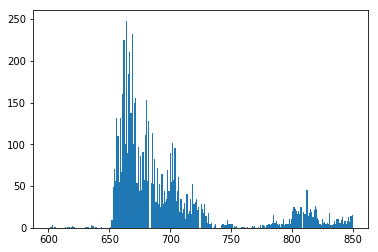

E:\MestradoData\p043\43_18_depth_251.yaml
18 251 E:\MestradoData\p043\43_18_depth_251.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_251.png (240, 320) (128, 128)


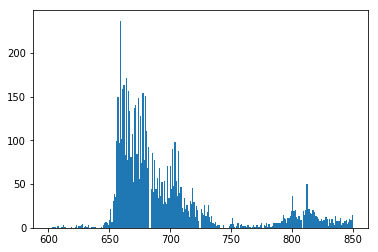

E:\MestradoData\p043\43_18_depth_261.yaml
18 261 E:\MestradoData\p043\43_18_depth_261.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_261.png (240, 320) (128, 128)


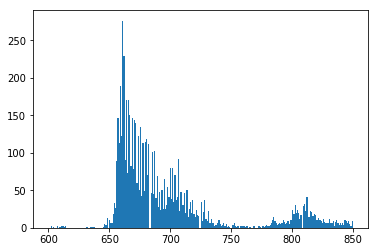

E:\MestradoData\p043\43_19_depth_241.yaml
19 241 E:\MestradoData\p043\43_19_depth_241.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_241.png (240, 320) (128, 128)


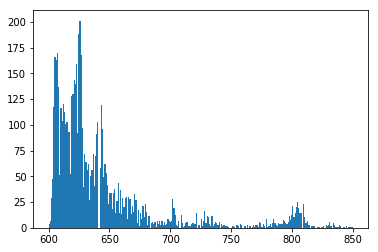

E:\MestradoData\p043\43_19_depth_251.yaml
19 251 E:\MestradoData\p043\43_19_depth_251.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_251.png (240, 320) (128, 128)


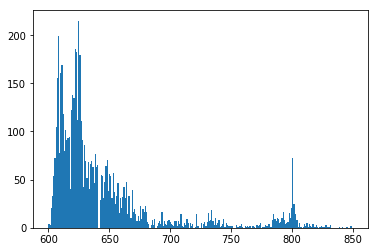

E:\MestradoData\p043\43_19_depth_261.yaml
19 261 E:\MestradoData\p043\43_19_depth_261.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_261.png (240, 320) (128, 128)


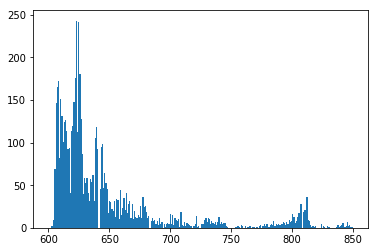

E:\MestradoData\p043\43_3_depth_271.yaml
3 271 E:\MestradoData\p043\43_3_depth_271.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_271.png (240, 320) (128, 128)


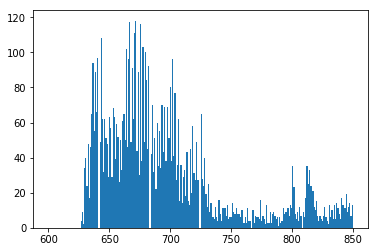

E:\MestradoData\p043\43_3_depth_281.yaml
3 281 E:\MestradoData\p043\43_3_depth_281.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_281.png (240, 320) (128, 128)


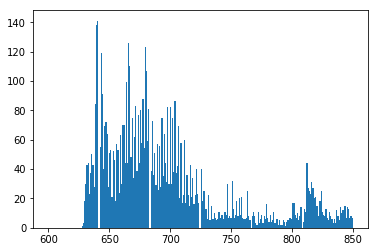

E:\MestradoData\p043\43_3_depth_291.yaml
3 291 E:\MestradoData\p043\43_3_depth_291.yaml depth E:\MestradoData\preprocessed\03\43_3_depth_291.png (240, 320) (128, 128)


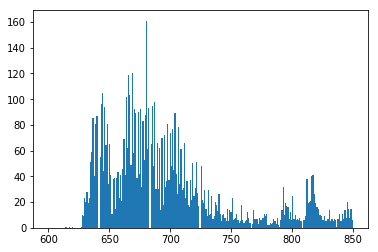

E:\MestradoData\p043\43_4_depth_271.yaml
4 271 E:\MestradoData\p043\43_4_depth_271.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_271.png (240, 320) (128, 128)


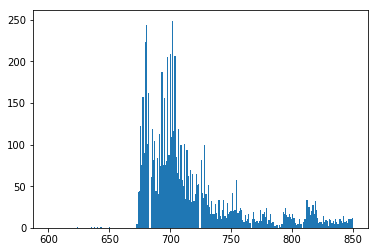

E:\MestradoData\p043\43_4_depth_281.yaml
4 281 E:\MestradoData\p043\43_4_depth_281.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_281.png (240, 320) (128, 128)


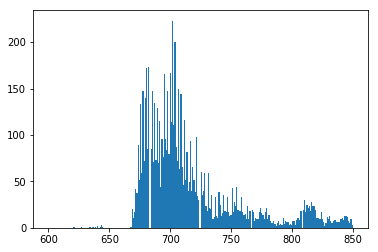

E:\MestradoData\p043\43_4_depth_291.yaml
4 291 E:\MestradoData\p043\43_4_depth_291.yaml depth E:\MestradoData\preprocessed\04\43_4_depth_291.png (240, 320) (128, 128)


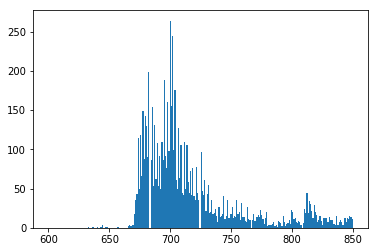

E:\MestradoData\p043\43_7_depth_271.yaml
7 271 E:\MestradoData\p043\43_7_depth_271.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_271.png (240, 320) (128, 128)


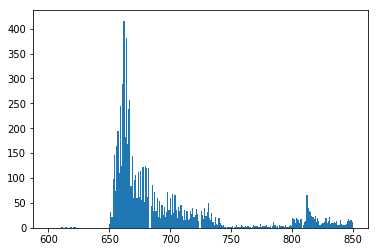

E:\MestradoData\p043\43_7_depth_281.yaml
7 281 E:\MestradoData\p043\43_7_depth_281.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_281.png (240, 320) (128, 128)


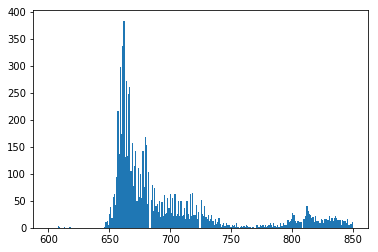

E:\MestradoData\p043\43_7_depth_291.yaml
7 291 E:\MestradoData\p043\43_7_depth_291.yaml depth E:\MestradoData\preprocessed\07\43_7_depth_291.png (240, 320) (128, 128)


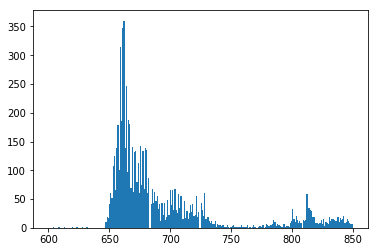

E:\MestradoData\p043\43_8_depth_271.yaml
8 271 E:\MestradoData\p043\43_8_depth_271.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_271.png (240, 320) (128, 128)


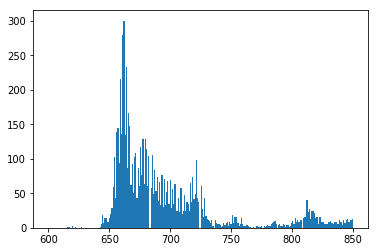

E:\MestradoData\p043\43_8_depth_281.yaml
8 281 E:\MestradoData\p043\43_8_depth_281.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_281.png (240, 320) (128, 128)


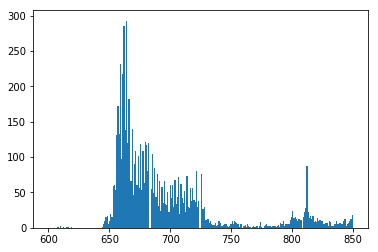

E:\MestradoData\p043\43_8_depth_291.yaml
8 291 E:\MestradoData\p043\43_8_depth_291.yaml depth E:\MestradoData\preprocessed\08\43_8_depth_291.png (240, 320) (128, 128)


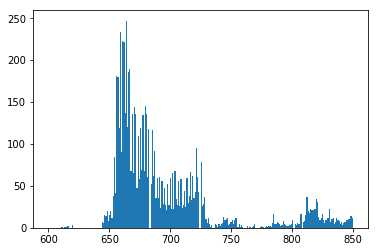

E:\MestradoData\p043\43_9_depth_271.yaml
9 271 E:\MestradoData\p043\43_9_depth_271.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_271.png (240, 320) (128, 128)


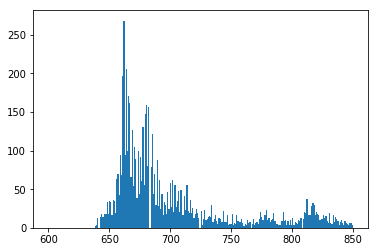

E:\MestradoData\p043\43_9_depth_281.yaml
9 281 E:\MestradoData\p043\43_9_depth_281.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_281.png (240, 320) (128, 128)


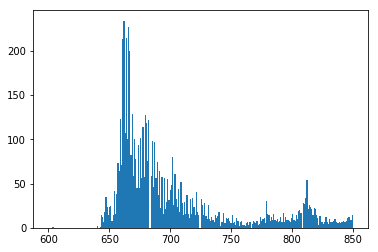

E:\MestradoData\p043\43_9_depth_291.yaml
9 291 E:\MestradoData\p043\43_9_depth_291.yaml depth E:\MestradoData\preprocessed\09\43_9_depth_291.png (240, 320) (128, 128)


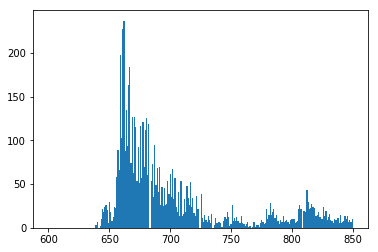

E:\MestradoData\p043\43_10_depth_271.yaml
10 271 E:\MestradoData\p043\43_10_depth_271.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_271.png (240, 320) (128, 128)


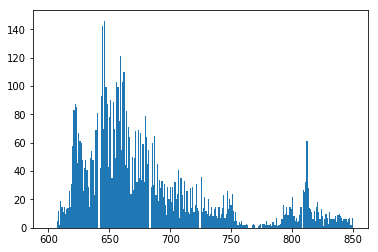

E:\MestradoData\p043\43_10_depth_281.yaml
10 281 E:\MestradoData\p043\43_10_depth_281.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_281.png (240, 320) (128, 128)


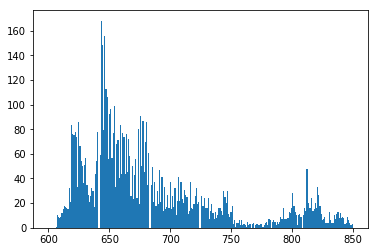

E:\MestradoData\p043\43_10_depth_291.yaml
10 291 E:\MestradoData\p043\43_10_depth_291.yaml depth E:\MestradoData\preprocessed\10\43_10_depth_291.png (240, 320) (128, 128)


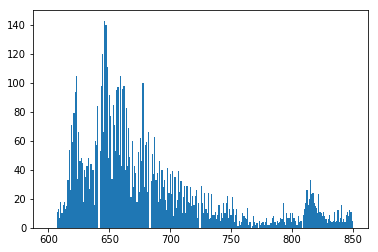

E:\MestradoData\p043\43_11_depth_271.yaml
11 271 E:\MestradoData\p043\43_11_depth_271.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_271.png (240, 320) (128, 128)


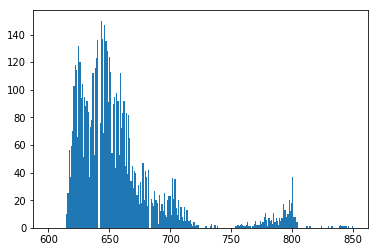

E:\MestradoData\p043\43_11_depth_281.yaml
11 281 E:\MestradoData\p043\43_11_depth_281.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_281.png (240, 320) (128, 128)


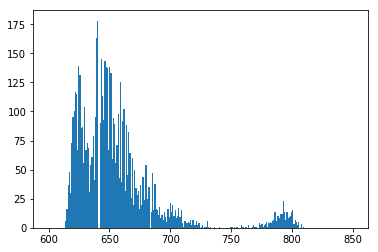

E:\MestradoData\p043\43_11_depth_291.yaml
11 291 E:\MestradoData\p043\43_11_depth_291.yaml depth E:\MestradoData\preprocessed\11\43_11_depth_291.png (240, 320) (128, 128)


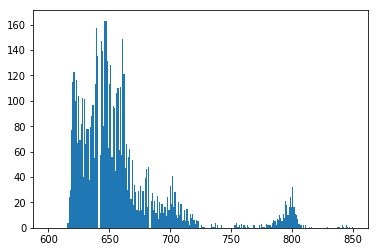

E:\MestradoData\p043\43_12_depth_271.yaml
12 271 E:\MestradoData\p043\43_12_depth_271.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_271.png (240, 320) (128, 128)


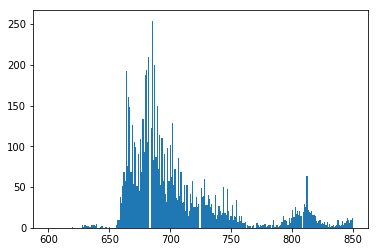

E:\MestradoData\p043\43_12_depth_281.yaml
12 281 E:\MestradoData\p043\43_12_depth_281.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_281.png (240, 320) (128, 128)


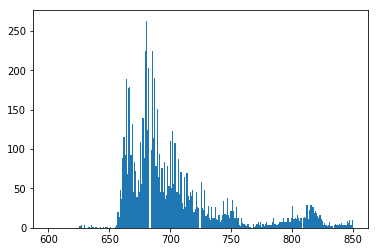

E:\MestradoData\p043\43_12_depth_291.yaml
12 291 E:\MestradoData\p043\43_12_depth_291.yaml depth E:\MestradoData\preprocessed\12\43_12_depth_291.png (240, 320) (128, 128)


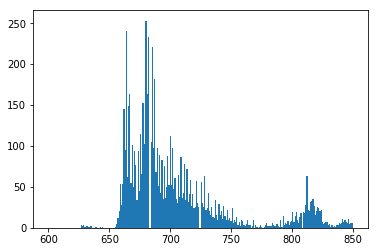

E:\MestradoData\p043\43_13_depth_271.yaml
13 271 E:\MestradoData\p043\43_13_depth_271.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_271.png (240, 320) (128, 128)


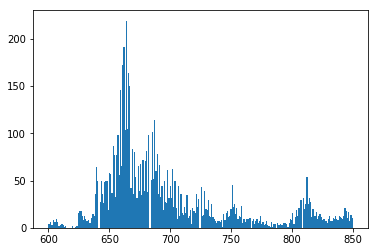

E:\MestradoData\p043\43_13_depth_281.yaml
13 281 E:\MestradoData\p043\43_13_depth_281.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_281.png (240, 320) (128, 128)


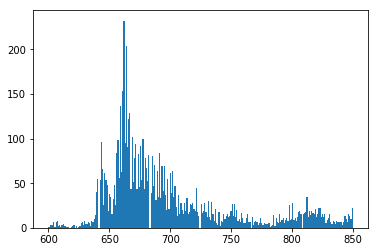

E:\MestradoData\p043\43_13_depth_291.yaml
13 291 E:\MestradoData\p043\43_13_depth_291.yaml depth E:\MestradoData\preprocessed\13\43_13_depth_291.png (240, 320) (128, 128)


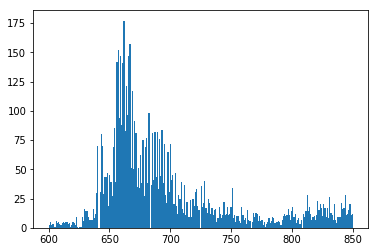

E:\MestradoData\p043\43_14_depth_271.yaml
14 271 E:\MestradoData\p043\43_14_depth_271.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_271.png (240, 320) (128, 128)


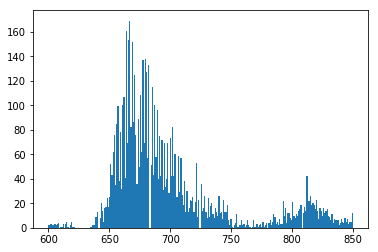

E:\MestradoData\p043\43_14_depth_281.yaml
14 281 E:\MestradoData\p043\43_14_depth_281.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_281.png (240, 320) (128, 128)


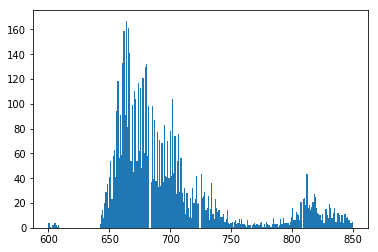

E:\MestradoData\p043\43_14_depth_291.yaml
14 291 E:\MestradoData\p043\43_14_depth_291.yaml depth E:\MestradoData\preprocessed\14\43_14_depth_291.png (240, 320) (128, 128)


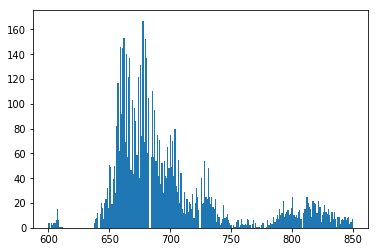

E:\MestradoData\p043\43_15_depth_271.yaml
15 271 E:\MestradoData\p043\43_15_depth_271.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_271.png (240, 320) (128, 128)


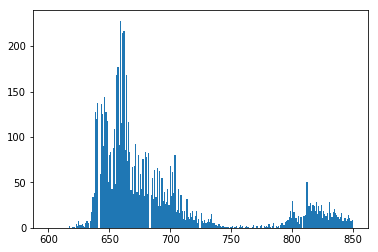

E:\MestradoData\p043\43_15_depth_281.yaml
15 281 E:\MestradoData\p043\43_15_depth_281.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_281.png (240, 320) (128, 128)


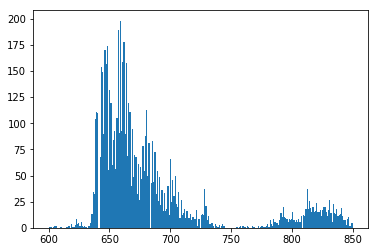

E:\MestradoData\p043\43_15_depth_291.yaml
15 291 E:\MestradoData\p043\43_15_depth_291.yaml depth E:\MestradoData\preprocessed\15\43_15_depth_291.png (240, 320) (128, 128)


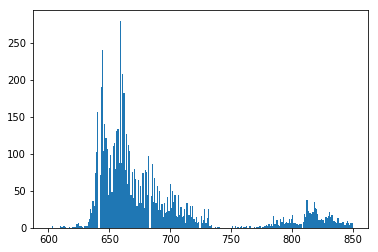

E:\MestradoData\p043\43_16_depth_271.yaml
16 271 E:\MestradoData\p043\43_16_depth_271.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_271.png (240, 320) (128, 128)


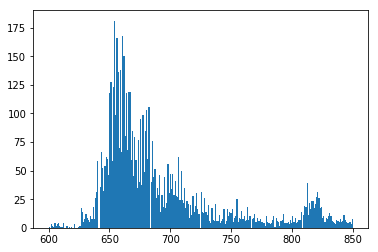

E:\MestradoData\p043\43_16_depth_281.yaml
16 281 E:\MestradoData\p043\43_16_depth_281.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_281.png (240, 320) (128, 128)


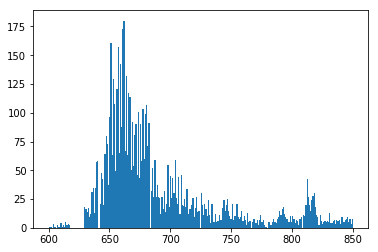

E:\MestradoData\p043\43_16_depth_291.yaml
16 291 E:\MestradoData\p043\43_16_depth_291.yaml depth E:\MestradoData\preprocessed\16\43_16_depth_291.png (240, 320) (128, 128)


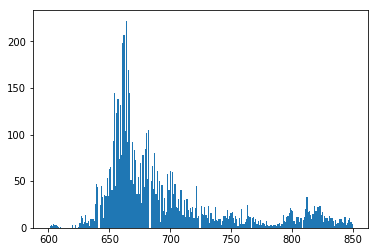

E:\MestradoData\p043\43_17_depth_271.yaml
17 271 E:\MestradoData\p043\43_17_depth_271.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_271.png (240, 320) (128, 128)


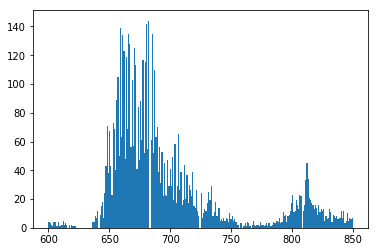

E:\MestradoData\p043\43_17_depth_281.yaml
17 281 E:\MestradoData\p043\43_17_depth_281.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_281.png (240, 320) (128, 128)


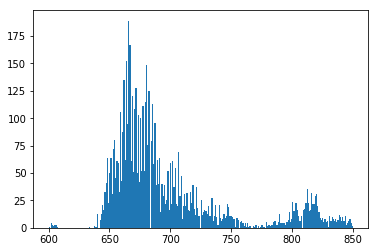

E:\MestradoData\p043\43_17_depth_291.yaml
17 291 E:\MestradoData\p043\43_17_depth_291.yaml depth E:\MestradoData\preprocessed\17\43_17_depth_291.png (240, 320) (128, 128)


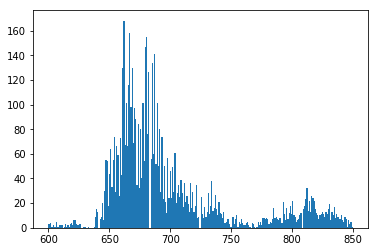

E:\MestradoData\p043\43_18_depth_271.yaml
18 271 E:\MestradoData\p043\43_18_depth_271.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_271.png (240, 320) (128, 128)


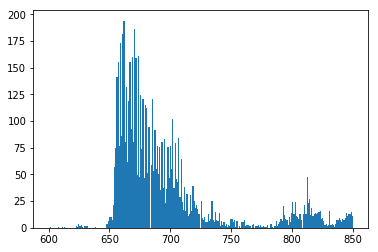

E:\MestradoData\p043\43_18_depth_281.yaml
18 281 E:\MestradoData\p043\43_18_depth_281.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_281.png (240, 320) (128, 128)


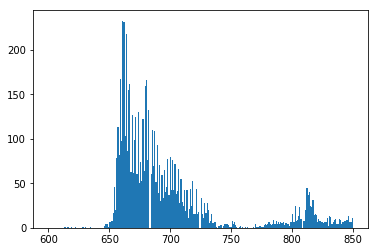

E:\MestradoData\p043\43_18_depth_291.yaml
18 291 E:\MestradoData\p043\43_18_depth_291.yaml depth E:\MestradoData\preprocessed\18\43_18_depth_291.png (240, 320) (128, 128)


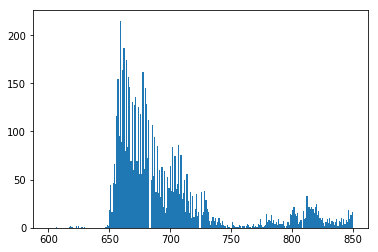

E:\MestradoData\p043\43_19_depth_271.yaml
19 271 E:\MestradoData\p043\43_19_depth_271.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_271.png (240, 320) (128, 128)


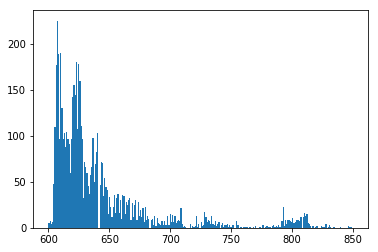

E:\MestradoData\p043\43_19_depth_281.yaml
19 281 E:\MestradoData\p043\43_19_depth_281.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_281.png (240, 320) (128, 128)


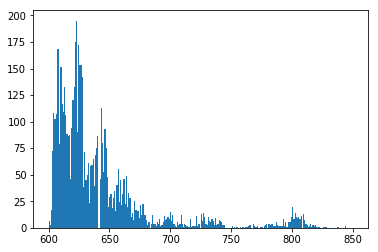

E:\MestradoData\p043\43_19_depth_291.yaml
19 291 E:\MestradoData\p043\43_19_depth_291.yaml depth E:\MestradoData\preprocessed\19\43_19_depth_291.png (240, 320) (128, 128)


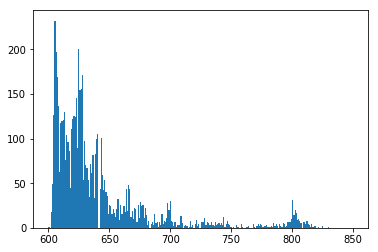

E:\MestradoData\p044\44_3_depth_1.yaml
3 1 E:\MestradoData\p044\44_3_depth_1.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_1.png (240, 320) (128, 128)


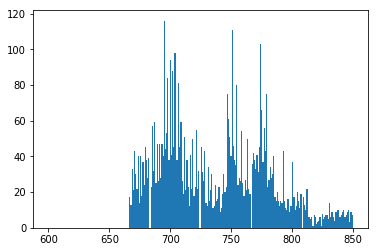

E:\MestradoData\p044\44_3_depth_11.yaml
3 11 E:\MestradoData\p044\44_3_depth_11.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_11.png (240, 320) (128, 128)


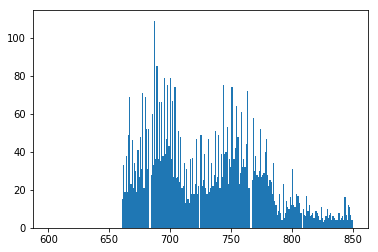

E:\MestradoData\p044\44_3_depth_21.yaml
3 21 E:\MestradoData\p044\44_3_depth_21.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_21.png (240, 320) (128, 128)


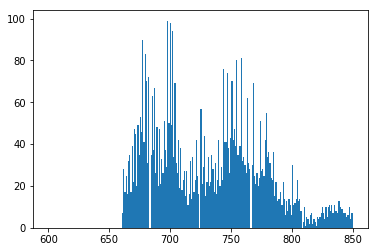

E:\MestradoData\p044\44_4_depth_1.yaml
4 1 E:\MestradoData\p044\44_4_depth_1.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_1.png (240, 320) (128, 128)


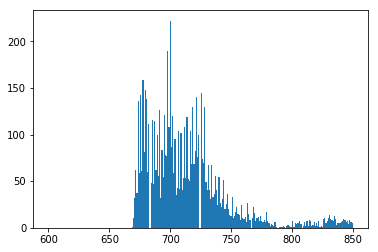

E:\MestradoData\p044\44_4_depth_11.yaml
4 11 E:\MestradoData\p044\44_4_depth_11.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_11.png (240, 320) (128, 128)


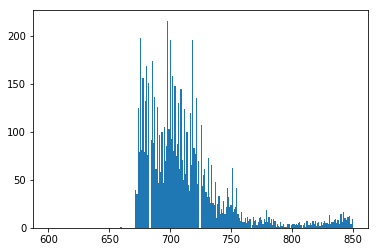

E:\MestradoData\p044\44_4_depth_21.yaml
4 21 E:\MestradoData\p044\44_4_depth_21.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_21.png (240, 320) (128, 128)


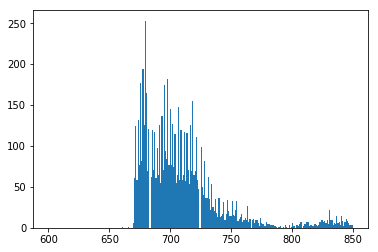

E:\MestradoData\p044\44_7_depth_1.yaml
7 1 E:\MestradoData\p044\44_7_depth_1.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_1.png (240, 320) (128, 128)


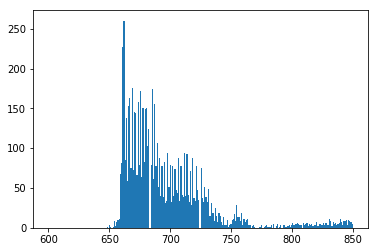

E:\MestradoData\p044\44_7_depth_11.yaml
7 11 E:\MestradoData\p044\44_7_depth_11.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_11.png (240, 320) (128, 128)


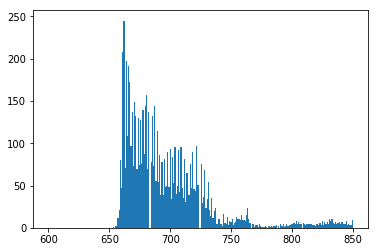

E:\MestradoData\p044\44_7_depth_21.yaml
7 21 E:\MestradoData\p044\44_7_depth_21.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_21.png (240, 320) (128, 128)


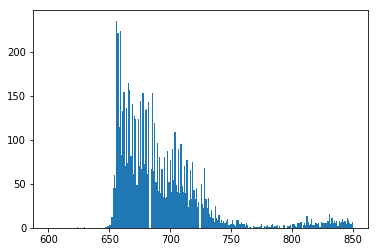

E:\MestradoData\p044\44_8_depth_1.yaml
8 1 E:\MestradoData\p044\44_8_depth_1.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_1.png (240, 320) (128, 128)


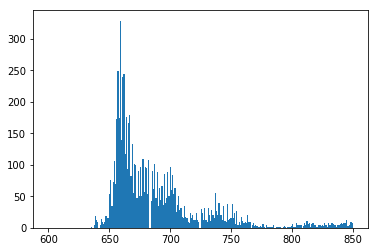

E:\MestradoData\p044\44_8_depth_11.yaml
8 11 E:\MestradoData\p044\44_8_depth_11.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_11.png (240, 320) (128, 128)


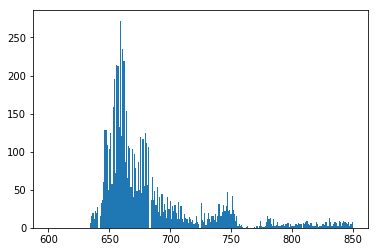

E:\MestradoData\p044\44_8_depth_21.yaml
8 21 E:\MestradoData\p044\44_8_depth_21.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_21.png (240, 320) (128, 128)


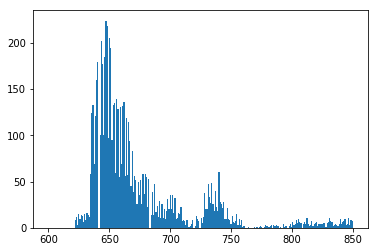

E:\MestradoData\p044\44_9_depth_1.yaml
9 1 E:\MestradoData\p044\44_9_depth_1.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_1.png (240, 320) (128, 128)


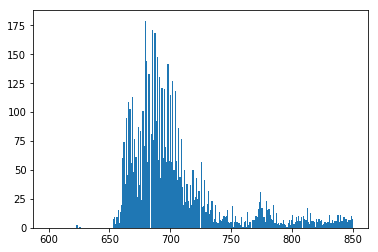

E:\MestradoData\p044\44_9_depth_11.yaml
9 11 E:\MestradoData\p044\44_9_depth_11.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_11.png (240, 320) (128, 128)


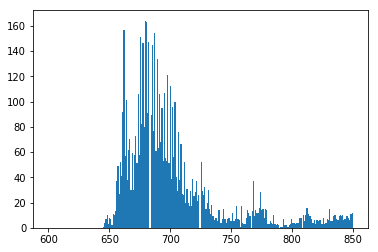

E:\MestradoData\p044\44_9_depth_21.yaml
9 21 E:\MestradoData\p044\44_9_depth_21.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_21.png (240, 320) (128, 128)


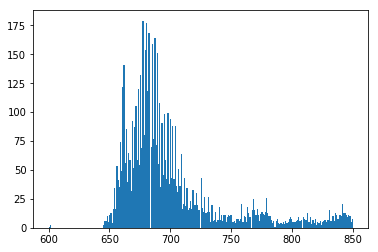

E:\MestradoData\p044\44_10_depth_1.yaml
10 1 E:\MestradoData\p044\44_10_depth_1.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_1.png (240, 320) (128, 128)


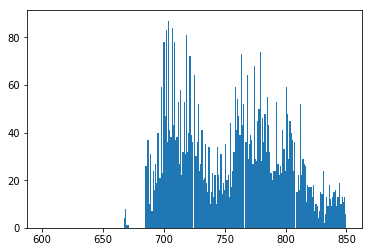

E:\MestradoData\p044\44_10_depth_11.yaml
10 11 E:\MestradoData\p044\44_10_depth_11.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_11.png (240, 320) (128, 128)


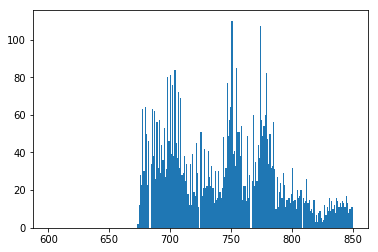

E:\MestradoData\p044\44_10_depth_21.yaml
10 21 E:\MestradoData\p044\44_10_depth_21.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_21.png (240, 320) (128, 128)


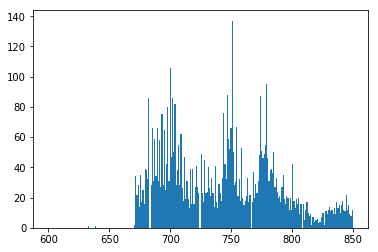

E:\MestradoData\p044\44_11_depth_1.yaml
11 1 E:\MestradoData\p044\44_11_depth_1.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_1.png (240, 320) (128, 128)


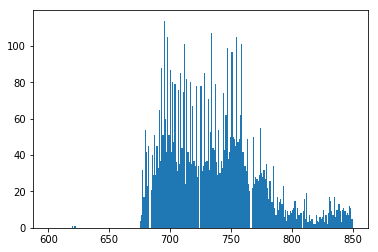

E:\MestradoData\p044\44_11_depth_11.yaml
11 11 E:\MestradoData\p044\44_11_depth_11.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_11.png (240, 320) (128, 128)


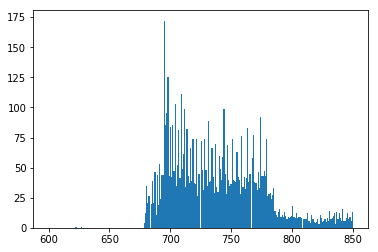

E:\MestradoData\p044\44_11_depth_21.yaml
11 21 E:\MestradoData\p044\44_11_depth_21.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_21.png (240, 320) (128, 128)


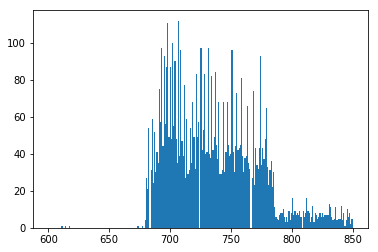

E:\MestradoData\p044\44_12_depth_1.yaml
12 1 E:\MestradoData\p044\44_12_depth_1.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_1.png (240, 320) (128, 128)


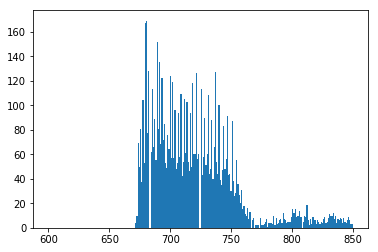

E:\MestradoData\p044\44_12_depth_11.yaml
12 11 E:\MestradoData\p044\44_12_depth_11.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_11.png (240, 320) (128, 128)


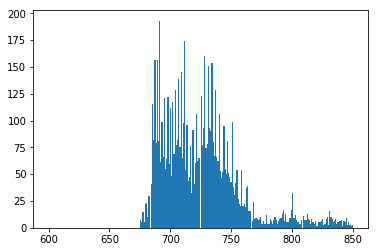

E:\MestradoData\p044\44_12_depth_21.yaml
12 21 E:\MestradoData\p044\44_12_depth_21.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_21.png (240, 320) (128, 128)


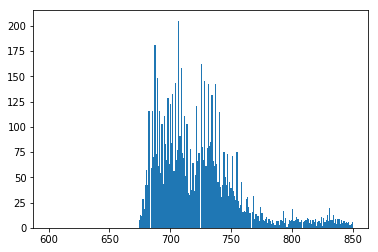

E:\MestradoData\p044\44_13_depth_1.yaml
13 1 E:\MestradoData\p044\44_13_depth_1.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_1.png (240, 320) (128, 128)


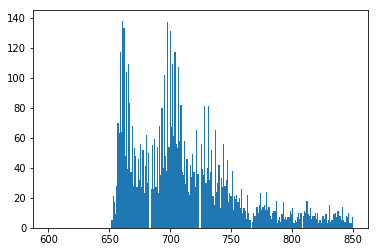

E:\MestradoData\p044\44_13_depth_11.yaml
13 11 E:\MestradoData\p044\44_13_depth_11.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_11.png (240, 320) (128, 128)


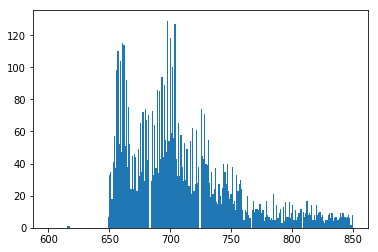

E:\MestradoData\p044\44_13_depth_21.yaml
13 21 E:\MestradoData\p044\44_13_depth_21.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_21.png (240, 320) (128, 128)


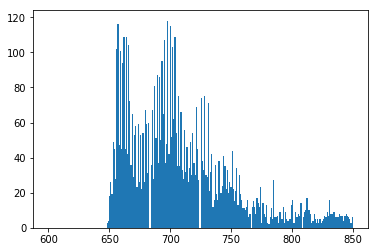

E:\MestradoData\p044\44_14_depth_1.yaml
14 1 E:\MestradoData\p044\44_14_depth_1.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_1.png (240, 320) (128, 128)


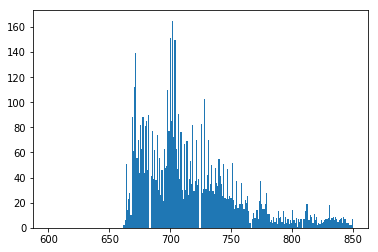

E:\MestradoData\p044\44_14_depth_11.yaml
14 11 E:\MestradoData\p044\44_14_depth_11.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_11.png (240, 320) (128, 128)


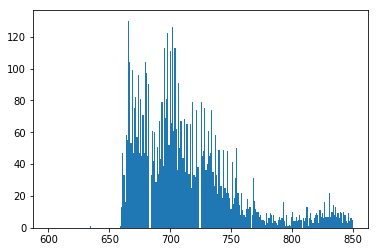

E:\MestradoData\p044\44_14_depth_21.yaml
14 21 E:\MestradoData\p044\44_14_depth_21.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_21.png (240, 320) (128, 128)


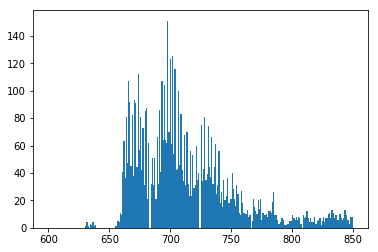

E:\MestradoData\p044\44_15_depth_1.yaml
15 1 E:\MestradoData\p044\44_15_depth_1.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_1.png (240, 320) (128, 128)


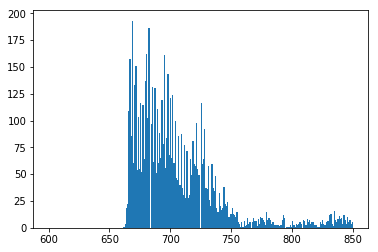

E:\MestradoData\p044\44_15_depth_11.yaml
15 11 E:\MestradoData\p044\44_15_depth_11.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_11.png (240, 320) (128, 128)


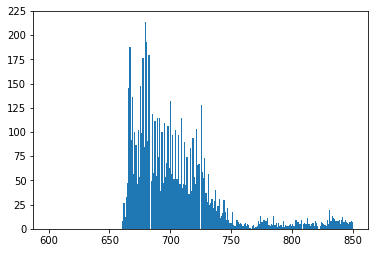

E:\MestradoData\p044\44_15_depth_21.yaml
15 21 E:\MestradoData\p044\44_15_depth_21.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_21.png (240, 320) (128, 128)


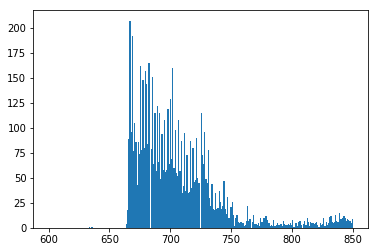

E:\MestradoData\p044\44_16_depth_1.yaml
16 1 E:\MestradoData\p044\44_16_depth_1.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_1.png (240, 320) (128, 128)


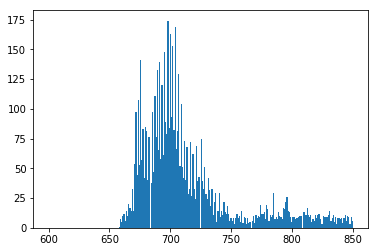

E:\MestradoData\p044\44_16_depth_11.yaml
16 11 E:\MestradoData\p044\44_16_depth_11.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_11.png (240, 320) (128, 128)


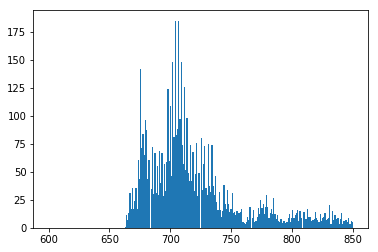

E:\MestradoData\p044\44_16_depth_21.yaml
16 21 E:\MestradoData\p044\44_16_depth_21.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_21.png (240, 320) (128, 128)


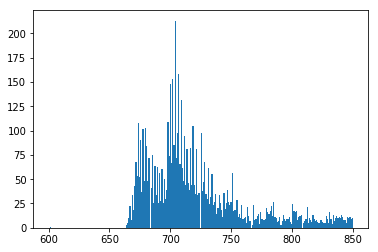

E:\MestradoData\p044\44_17_depth_1.yaml
17 1 E:\MestradoData\p044\44_17_depth_1.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_1.png (240, 320) (128, 128)


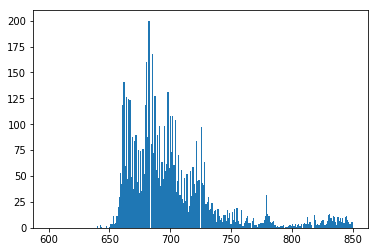

E:\MestradoData\p044\44_17_depth_11.yaml
17 11 E:\MestradoData\p044\44_17_depth_11.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_11.png (240, 320) (128, 128)


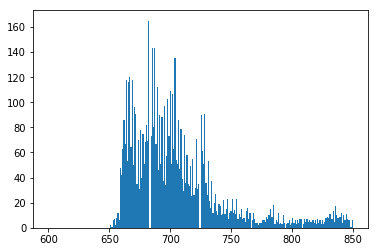

E:\MestradoData\p044\44_17_depth_21.yaml
17 21 E:\MestradoData\p044\44_17_depth_21.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_21.png (240, 320) (128, 128)


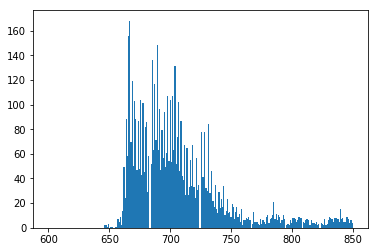

E:\MestradoData\p044\44_18_depth_1.yaml
18 1 E:\MestradoData\p044\44_18_depth_1.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_1.png (240, 320) (128, 128)


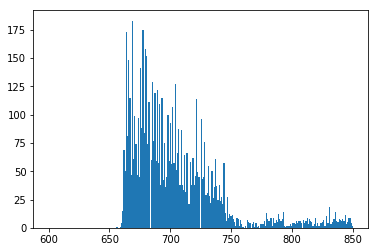

E:\MestradoData\p044\44_18_depth_11.yaml
18 11 E:\MestradoData\p044\44_18_depth_11.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_11.png (240, 320) (128, 128)


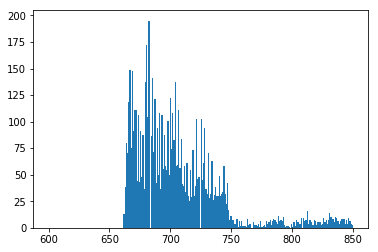

E:\MestradoData\p044\44_18_depth_21.yaml
18 21 E:\MestradoData\p044\44_18_depth_21.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_21.png (240, 320) (128, 128)


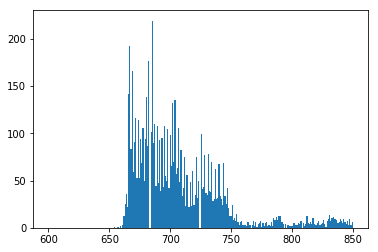

E:\MestradoData\p044\44_19_depth_1.yaml
19 1 E:\MestradoData\p044\44_19_depth_1.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_1.png (240, 320) (128, 128)


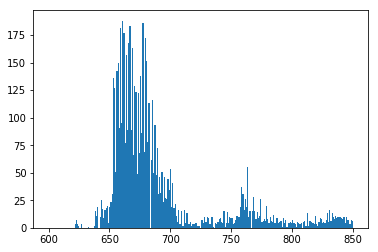

E:\MestradoData\p044\44_19_depth_11.yaml
19 11 E:\MestradoData\p044\44_19_depth_11.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_11.png (240, 320) (128, 128)


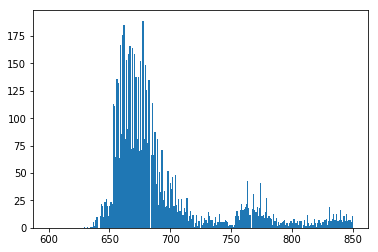

E:\MestradoData\p044\44_19_depth_21.yaml
19 21 E:\MestradoData\p044\44_19_depth_21.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_21.png (240, 320) (128, 128)


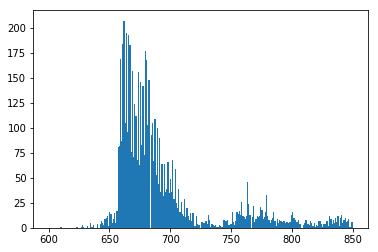

E:\MestradoData\p044\44_3_depth_31.yaml
3 31 E:\MestradoData\p044\44_3_depth_31.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_31.png (240, 320) (128, 128)


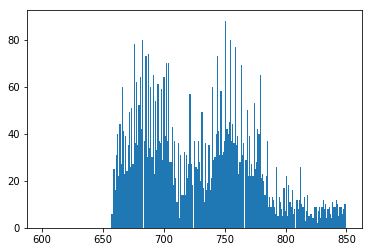

E:\MestradoData\p044\44_3_depth_41.yaml
3 41 E:\MestradoData\p044\44_3_depth_41.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_41.png (240, 320) (128, 128)


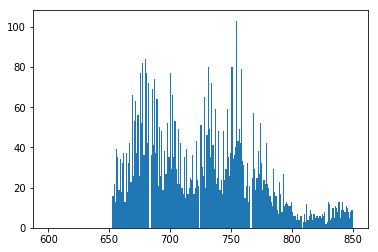

E:\MestradoData\p044\44_3_depth_51.yaml
3 51 E:\MestradoData\p044\44_3_depth_51.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_51.png (240, 320) (128, 128)


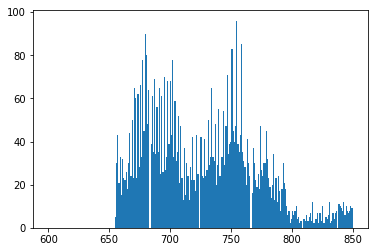

E:\MestradoData\p044\44_4_depth_31.yaml
4 31 E:\MestradoData\p044\44_4_depth_31.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_31.png (240, 320) (128, 128)


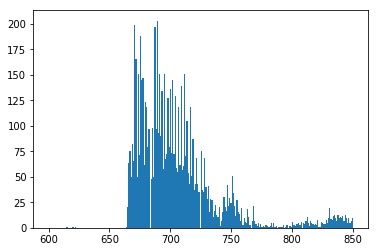

E:\MestradoData\p044\44_4_depth_41.yaml
4 41 E:\MestradoData\p044\44_4_depth_41.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_41.png (240, 320) (128, 128)


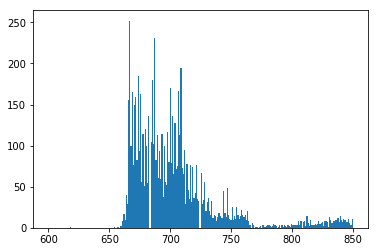

E:\MestradoData\p044\44_4_depth_51.yaml
4 51 E:\MestradoData\p044\44_4_depth_51.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_51.png (240, 320) (128, 128)


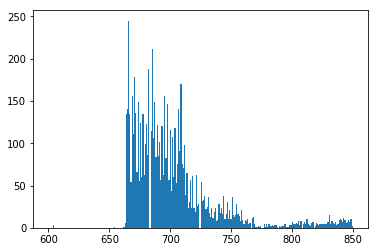

E:\MestradoData\p044\44_7_depth_31.yaml
7 31 E:\MestradoData\p044\44_7_depth_31.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_31.png (240, 320) (128, 128)


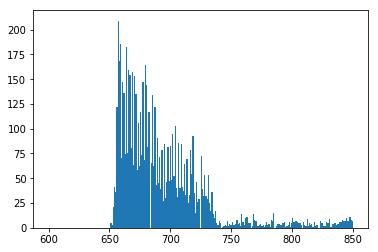

E:\MestradoData\p044\44_7_depth_41.yaml
7 41 E:\MestradoData\p044\44_7_depth_41.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_41.png (240, 320) (128, 128)


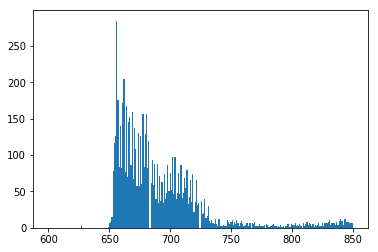

E:\MestradoData\p044\44_7_depth_51.yaml
7 51 E:\MestradoData\p044\44_7_depth_51.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_51.png (240, 320) (128, 128)


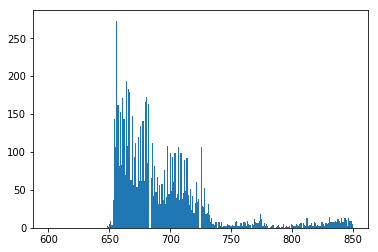

E:\MestradoData\p044\44_8_depth_31.yaml
8 31 E:\MestradoData\p044\44_8_depth_31.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_31.png (240, 320) (128, 128)


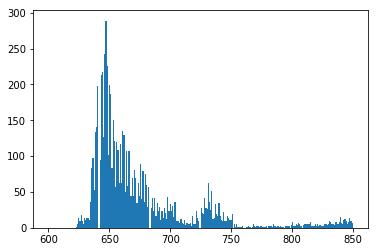

E:\MestradoData\p044\44_8_depth_41.yaml
8 41 E:\MestradoData\p044\44_8_depth_41.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_41.png (240, 320) (128, 128)


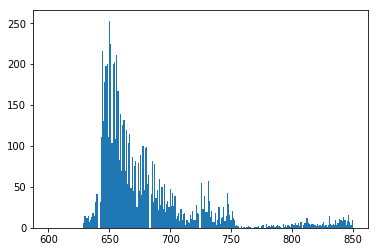

E:\MestradoData\p044\44_8_depth_51.yaml
8 51 E:\MestradoData\p044\44_8_depth_51.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_51.png (240, 320) (128, 128)


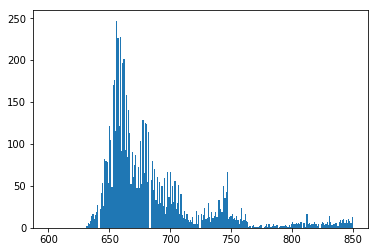

E:\MestradoData\p044\44_9_depth_31.yaml
9 31 E:\MestradoData\p044\44_9_depth_31.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_31.png (240, 320) (128, 128)


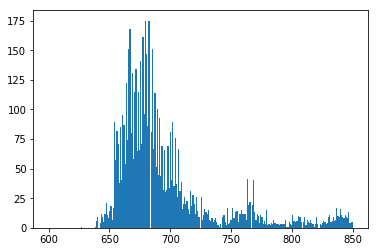

E:\MestradoData\p044\44_9_depth_41.yaml
9 41 E:\MestradoData\p044\44_9_depth_41.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_41.png (240, 320) (128, 128)


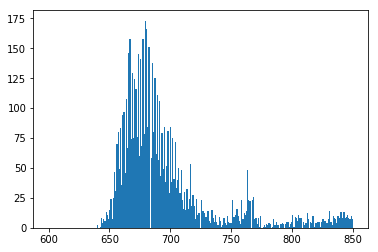

E:\MestradoData\p044\44_9_depth_51.yaml
9 51 E:\MestradoData\p044\44_9_depth_51.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_51.png (240, 320) (128, 128)


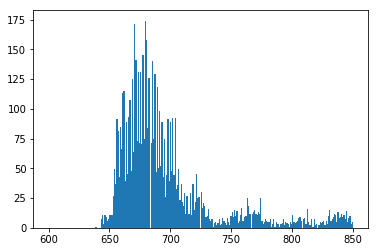

E:\MestradoData\p044\44_10_depth_31.yaml
10 31 E:\MestradoData\p044\44_10_depth_31.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_31.png (240, 320) (128, 128)


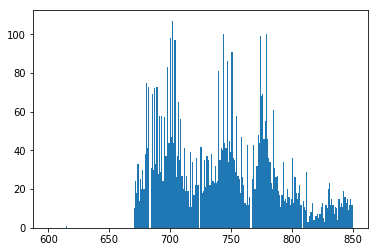

E:\MestradoData\p044\44_10_depth_41.yaml
10 41 E:\MestradoData\p044\44_10_depth_41.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_41.png (240, 320) (128, 128)


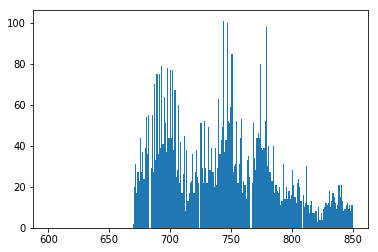

E:\MestradoData\p044\44_10_depth_51.yaml
10 51 E:\MestradoData\p044\44_10_depth_51.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_51.png (240, 320) (128, 128)


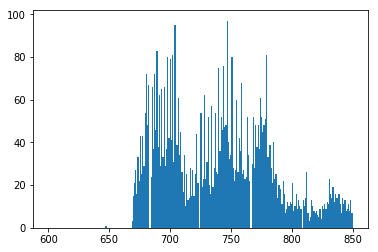

E:\MestradoData\p044\44_11_depth_31.yaml
11 31 E:\MestradoData\p044\44_11_depth_31.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_31.png (240, 320) (128, 128)


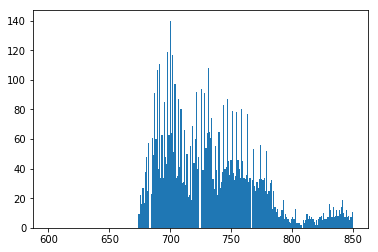

E:\MestradoData\p044\44_11_depth_41.yaml
11 41 E:\MestradoData\p044\44_11_depth_41.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_41.png (240, 320) (128, 128)


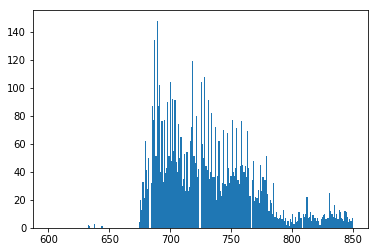

E:\MestradoData\p044\44_11_depth_51.yaml
11 51 E:\MestradoData\p044\44_11_depth_51.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_51.png (240, 320) (128, 128)


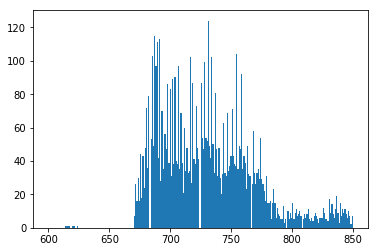

E:\MestradoData\p044\44_12_depth_31.yaml
12 31 E:\MestradoData\p044\44_12_depth_31.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_31.png (240, 320) (128, 128)


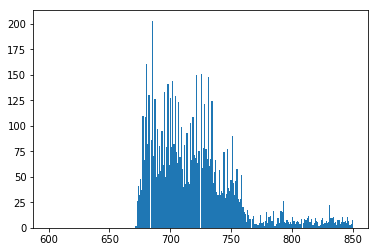

E:\MestradoData\p044\44_12_depth_41.yaml
12 41 E:\MestradoData\p044\44_12_depth_41.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_41.png (240, 320) (128, 128)


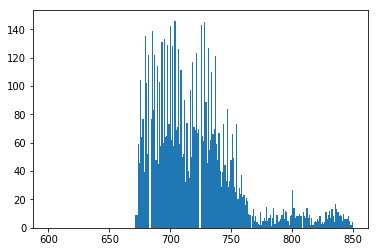

E:\MestradoData\p044\44_12_depth_51.yaml
12 51 E:\MestradoData\p044\44_12_depth_51.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_51.png (240, 320) (128, 128)


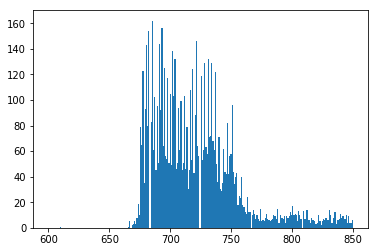

E:\MestradoData\p044\44_13_depth_31.yaml
13 31 E:\MestradoData\p044\44_13_depth_31.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_31.png (240, 320) (128, 128)


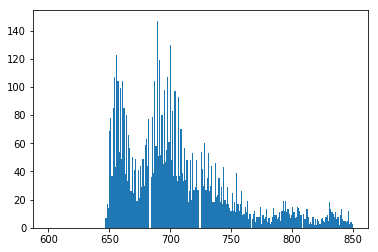

E:\MestradoData\p044\44_13_depth_41.yaml
13 41 E:\MestradoData\p044\44_13_depth_41.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_41.png (240, 320) (128, 128)


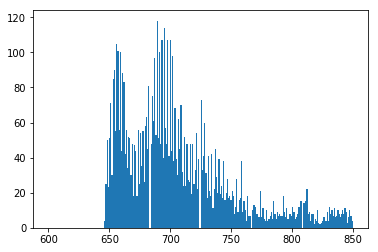

E:\MestradoData\p044\44_13_depth_51.yaml
13 51 E:\MestradoData\p044\44_13_depth_51.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_51.png (240, 320) (128, 128)


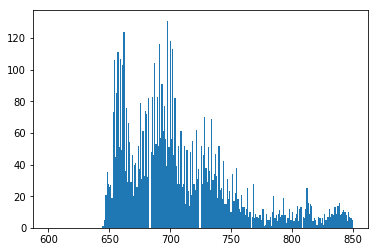

E:\MestradoData\p044\44_14_depth_31.yaml
14 31 E:\MestradoData\p044\44_14_depth_31.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_31.png (240, 320) (128, 128)


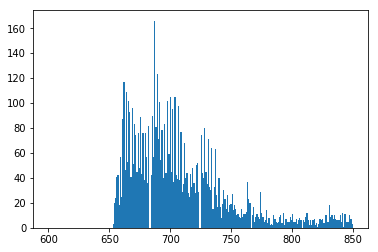

E:\MestradoData\p044\44_14_depth_41.yaml
14 41 E:\MestradoData\p044\44_14_depth_41.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_41.png (240, 320) (128, 128)


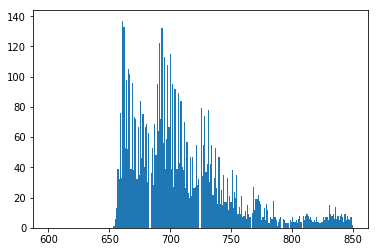

E:\MestradoData\p044\44_14_depth_51.yaml
14 51 E:\MestradoData\p044\44_14_depth_51.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_51.png (240, 320) (128, 128)


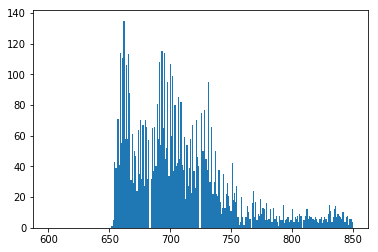

E:\MestradoData\p044\44_15_depth_31.yaml
15 31 E:\MestradoData\p044\44_15_depth_31.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_31.png (240, 320) (128, 128)


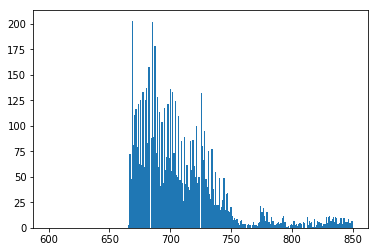

E:\MestradoData\p044\44_15_depth_41.yaml
15 41 E:\MestradoData\p044\44_15_depth_41.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_41.png (240, 320) (128, 128)


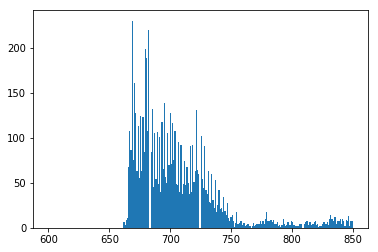

E:\MestradoData\p044\44_15_depth_51.yaml
15 51 E:\MestradoData\p044\44_15_depth_51.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_51.png (240, 320) (128, 128)


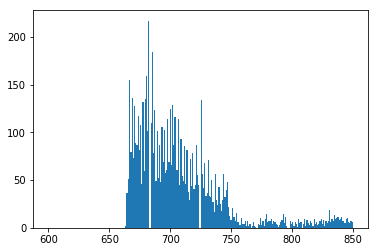

E:\MestradoData\p044\44_16_depth_31.yaml
16 31 E:\MestradoData\p044\44_16_depth_31.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_31.png (240, 320) (128, 128)


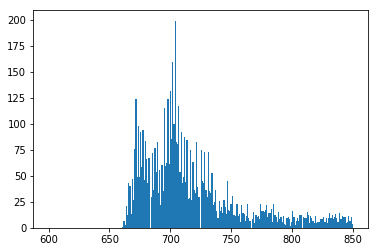

E:\MestradoData\p044\44_16_depth_41.yaml
16 41 E:\MestradoData\p044\44_16_depth_41.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_41.png (240, 320) (128, 128)


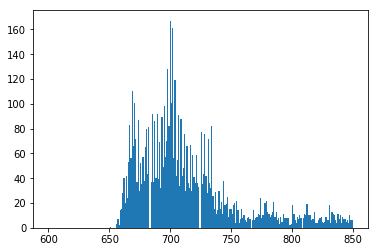

E:\MestradoData\p044\44_16_depth_51.yaml
16 51 E:\MestradoData\p044\44_16_depth_51.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_51.png (240, 320) (128, 128)


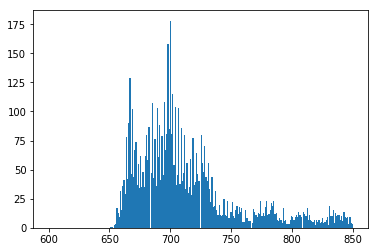

E:\MestradoData\p044\44_17_depth_31.yaml
17 31 E:\MestradoData\p044\44_17_depth_31.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_31.png (240, 320) (128, 128)


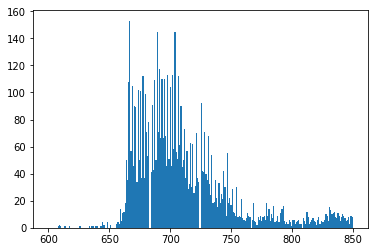

E:\MestradoData\p044\44_17_depth_41.yaml
17 41 E:\MestradoData\p044\44_17_depth_41.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_41.png (240, 320) (128, 128)


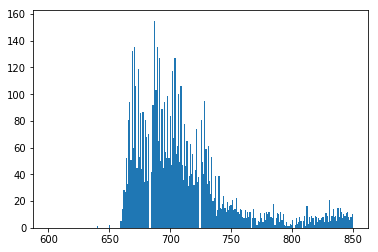

E:\MestradoData\p044\44_17_depth_51.yaml
17 51 E:\MestradoData\p044\44_17_depth_51.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_51.png (240, 320) (128, 128)


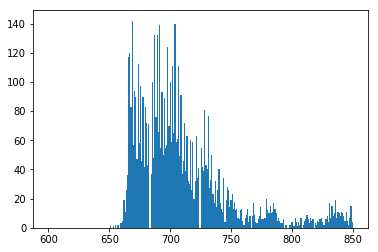

E:\MestradoData\p044\44_18_depth_31.yaml
18 31 E:\MestradoData\p044\44_18_depth_31.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_31.png (240, 320) (128, 128)


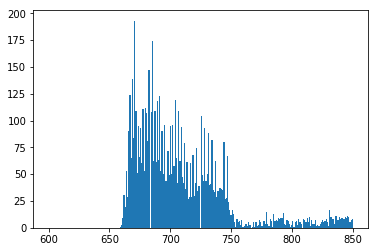

E:\MestradoData\p044\44_18_depth_41.yaml
18 41 E:\MestradoData\p044\44_18_depth_41.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_41.png (240, 320) (128, 128)


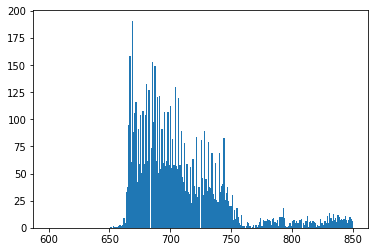

E:\MestradoData\p044\44_18_depth_51.yaml
18 51 E:\MestradoData\p044\44_18_depth_51.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_51.png (240, 320) (128, 128)


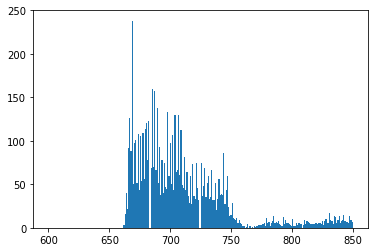

E:\MestradoData\p044\44_19_depth_31.yaml
19 31 E:\MestradoData\p044\44_19_depth_31.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_31.png (240, 320) (128, 128)


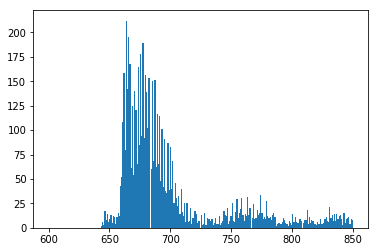

E:\MestradoData\p044\44_19_depth_41.yaml
19 41 E:\MestradoData\p044\44_19_depth_41.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_41.png (240, 320) (128, 128)


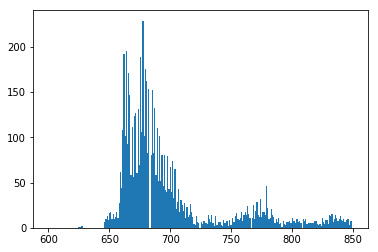

E:\MestradoData\p044\44_19_depth_51.yaml
19 51 E:\MestradoData\p044\44_19_depth_51.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_51.png (240, 320) (128, 128)


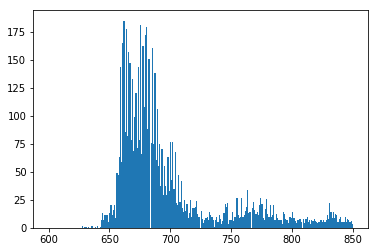

E:\MestradoData\p044\44_3_depth_61.yaml
3 61 E:\MestradoData\p044\44_3_depth_61.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_61.png (240, 320) (128, 128)


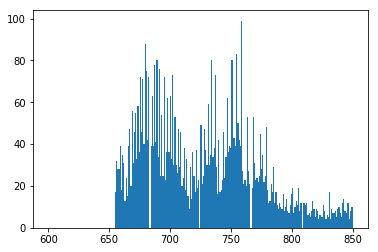

E:\MestradoData\p044\44_3_depth_71.yaml
3 71 E:\MestradoData\p044\44_3_depth_71.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_71.png (240, 320) (128, 128)


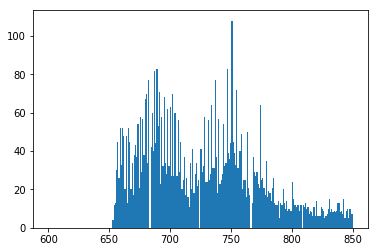

E:\MestradoData\p044\44_3_depth_81.yaml
3 81 E:\MestradoData\p044\44_3_depth_81.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_81.png (240, 320) (128, 128)


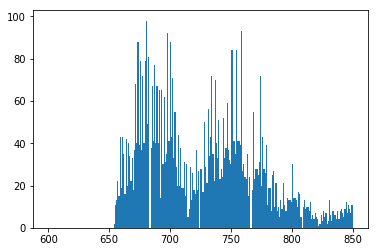

E:\MestradoData\p044\44_4_depth_61.yaml
4 61 E:\MestradoData\p044\44_4_depth_61.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_61.png (240, 320) (128, 128)


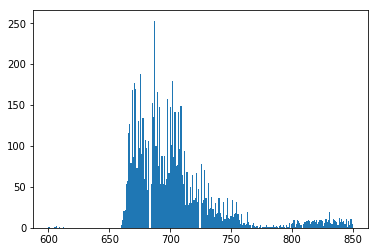

E:\MestradoData\p044\44_4_depth_71.yaml
4 71 E:\MestradoData\p044\44_4_depth_71.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_71.png (240, 320) (128, 128)


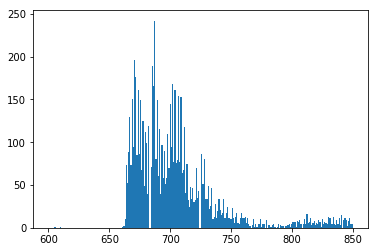

E:\MestradoData\p044\44_4_depth_81.yaml
4 81 E:\MestradoData\p044\44_4_depth_81.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_81.png (240, 320) (128, 128)


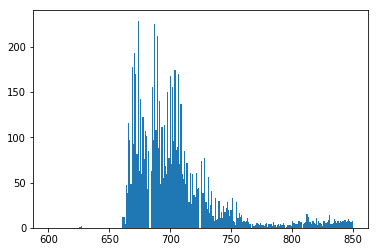

E:\MestradoData\p044\44_7_depth_61.yaml
7 61 E:\MestradoData\p044\44_7_depth_61.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_61.png (240, 320) (128, 128)


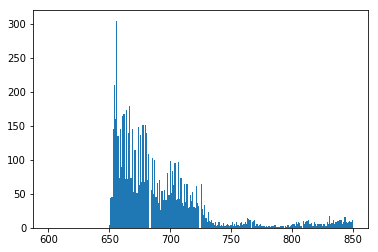

E:\MestradoData\p044\44_7_depth_71.yaml
7 71 E:\MestradoData\p044\44_7_depth_71.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_71.png (240, 320) (128, 128)


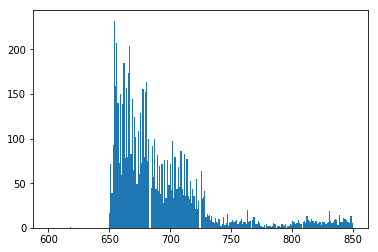

E:\MestradoData\p044\44_7_depth_81.yaml
7 81 E:\MestradoData\p044\44_7_depth_81.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_81.png (240, 320) (128, 128)


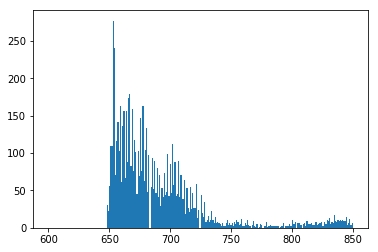

E:\MestradoData\p044\44_8_depth_61.yaml
8 61 E:\MestradoData\p044\44_8_depth_61.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_61.png (240, 320) (128, 128)


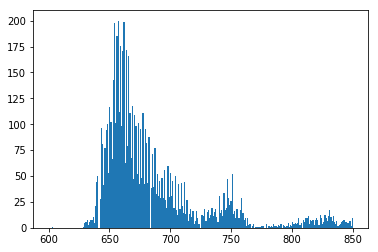

E:\MestradoData\p044\44_8_depth_71.yaml
8 71 E:\MestradoData\p044\44_8_depth_71.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_71.png (240, 320) (128, 128)


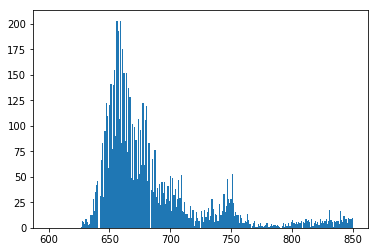

E:\MestradoData\p044\44_8_depth_81.yaml
8 81 E:\MestradoData\p044\44_8_depth_81.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_81.png (240, 320) (128, 128)


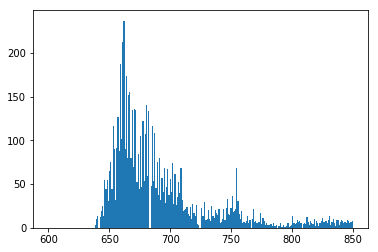

E:\MestradoData\p044\44_9_depth_61.yaml
9 61 E:\MestradoData\p044\44_9_depth_61.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_61.png (240, 320) (128, 128)


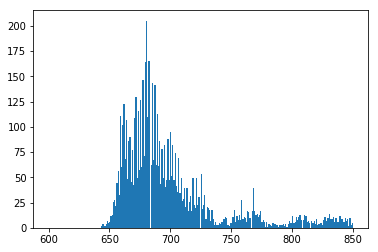

E:\MestradoData\p044\44_9_depth_71.yaml
9 71 E:\MestradoData\p044\44_9_depth_71.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_71.png (240, 320) (128, 128)


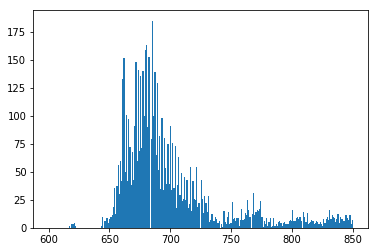

E:\MestradoData\p044\44_9_depth_81.yaml
9 81 E:\MestradoData\p044\44_9_depth_81.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_81.png (240, 320) (128, 128)


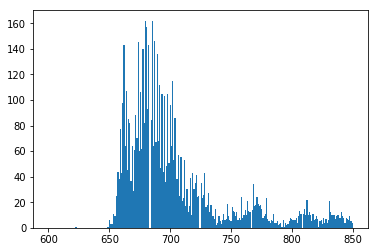

E:\MestradoData\p044\44_10_depth_61.yaml
10 61 E:\MestradoData\p044\44_10_depth_61.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_61.png (240, 320) (128, 128)


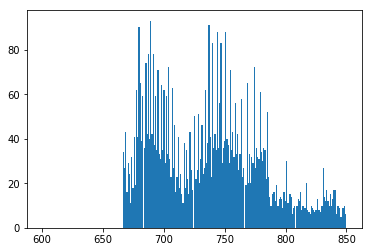

E:\MestradoData\p044\44_10_depth_71.yaml
10 71 E:\MestradoData\p044\44_10_depth_71.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_71.png (240, 320) (128, 128)


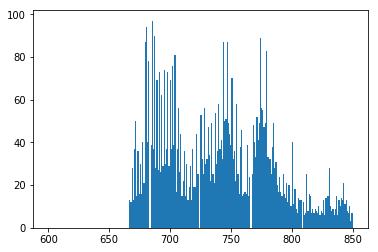

E:\MestradoData\p044\44_10_depth_81.yaml
10 81 E:\MestradoData\p044\44_10_depth_81.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_81.png (240, 320) (128, 128)


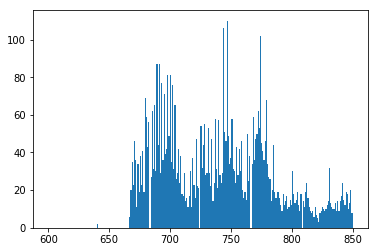

E:\MestradoData\p044\44_11_depth_61.yaml
11 61 E:\MestradoData\p044\44_11_depth_61.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_61.png (240, 320) (128, 128)


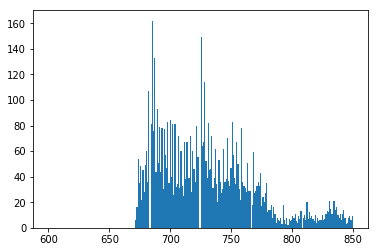

E:\MestradoData\p044\44_11_depth_71.yaml
11 71 E:\MestradoData\p044\44_11_depth_71.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_71.png (240, 320) (128, 128)


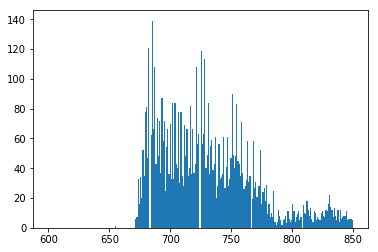

E:\MestradoData\p044\44_11_depth_81.yaml
11 81 E:\MestradoData\p044\44_11_depth_81.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_81.png (240, 320) (128, 128)


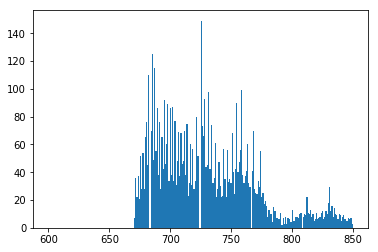

E:\MestradoData\p044\44_12_depth_61.yaml
12 61 E:\MestradoData\p044\44_12_depth_61.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_61.png (240, 320) (128, 128)


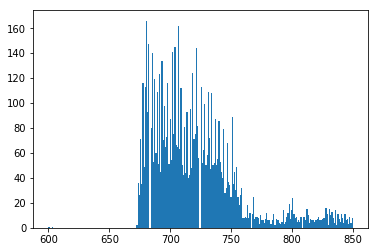

E:\MestradoData\p044\44_12_depth_71.yaml
12 71 E:\MestradoData\p044\44_12_depth_71.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_71.png (240, 320) (128, 128)


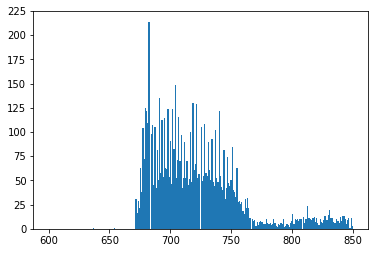

E:\MestradoData\p044\44_12_depth_81.yaml
12 81 E:\MestradoData\p044\44_12_depth_81.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_81.png (240, 320) (128, 128)


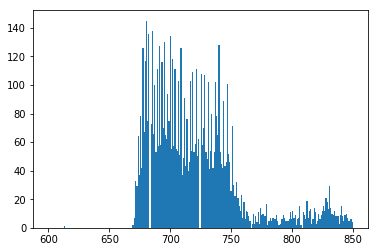

E:\MestradoData\p044\44_13_depth_61.yaml
13 61 E:\MestradoData\p044\44_13_depth_61.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_61.png (240, 320) (128, 128)


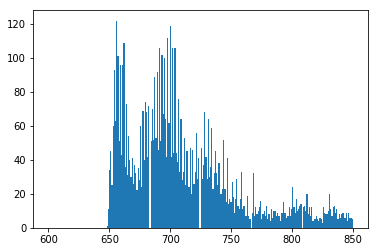

E:\MestradoData\p044\44_13_depth_71.yaml
13 71 E:\MestradoData\p044\44_13_depth_71.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_71.png (240, 320) (128, 128)


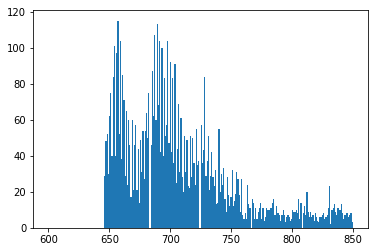

E:\MestradoData\p044\44_13_depth_81.yaml
13 81 E:\MestradoData\p044\44_13_depth_81.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_81.png (240, 320) (128, 128)


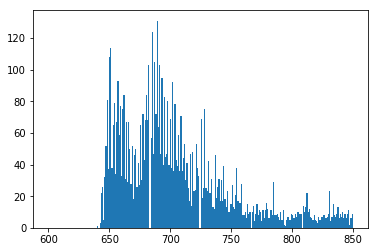

E:\MestradoData\p044\44_14_depth_61.yaml
14 61 E:\MestradoData\p044\44_14_depth_61.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_61.png (240, 320) (128, 128)


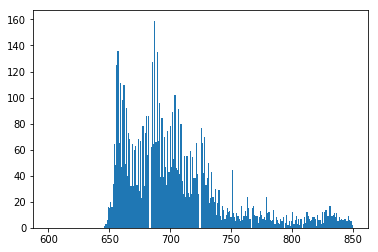

E:\MestradoData\p044\44_14_depth_71.yaml
14 71 E:\MestradoData\p044\44_14_depth_71.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_71.png (240, 320) (128, 128)


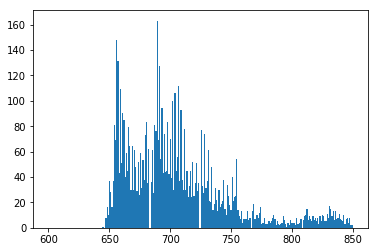

E:\MestradoData\p044\44_14_depth_81.yaml
14 81 E:\MestradoData\p044\44_14_depth_81.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_81.png (240, 320) (128, 128)


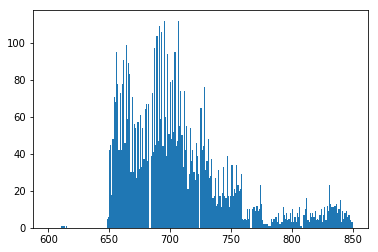

E:\MestradoData\p044\44_15_depth_61.yaml
15 61 E:\MestradoData\p044\44_15_depth_61.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_61.png (240, 320) (128, 128)


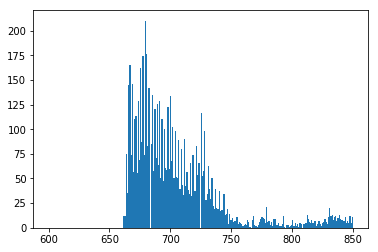

E:\MestradoData\p044\44_15_depth_71.yaml
15 71 E:\MestradoData\p044\44_15_depth_71.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_71.png (240, 320) (128, 128)


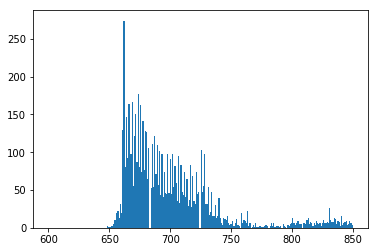

E:\MestradoData\p044\44_15_depth_81.yaml
15 81 E:\MestradoData\p044\44_15_depth_81.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_81.png (240, 320) (128, 128)


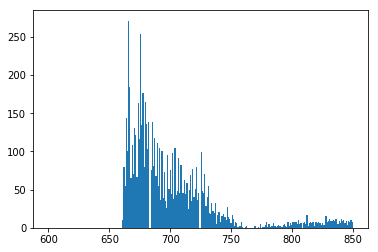

E:\MestradoData\p044\44_16_depth_61.yaml
16 61 E:\MestradoData\p044\44_16_depth_61.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_61.png (240, 320) (128, 128)


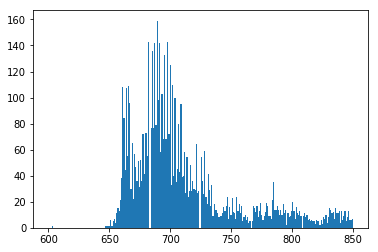

E:\MestradoData\p044\44_16_depth_71.yaml
16 71 E:\MestradoData\p044\44_16_depth_71.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_71.png (240, 320) (128, 128)


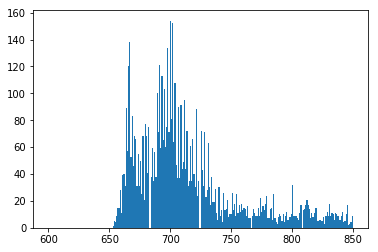

E:\MestradoData\p044\44_16_depth_81.yaml
16 81 E:\MestradoData\p044\44_16_depth_81.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_81.png (240, 320) (128, 128)


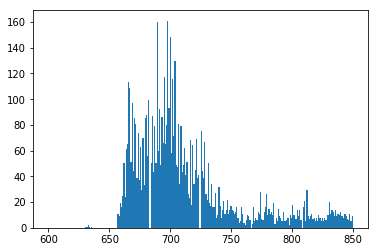

E:\MestradoData\p044\44_17_depth_61.yaml
17 61 E:\MestradoData\p044\44_17_depth_61.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_61.png (240, 320) (128, 128)


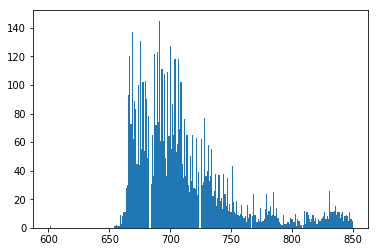

E:\MestradoData\p044\44_17_depth_71.yaml
17 71 E:\MestradoData\p044\44_17_depth_71.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_71.png (240, 320) (128, 128)


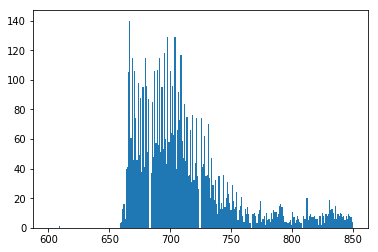

E:\MestradoData\p044\44_17_depth_81.yaml
17 81 E:\MestradoData\p044\44_17_depth_81.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_81.png (240, 320) (128, 128)


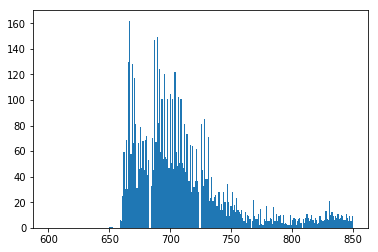

E:\MestradoData\p044\44_18_depth_61.yaml
18 61 E:\MestradoData\p044\44_18_depth_61.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_61.png (240, 320) (128, 128)


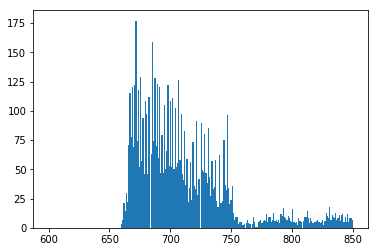

E:\MestradoData\p044\44_18_depth_71.yaml
18 71 E:\MestradoData\p044\44_18_depth_71.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_71.png (240, 320) (128, 128)


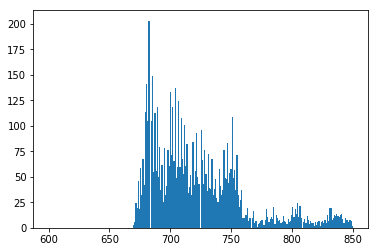

E:\MestradoData\p044\44_18_depth_81.yaml
18 81 E:\MestradoData\p044\44_18_depth_81.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_81.png (240, 320) (128, 128)


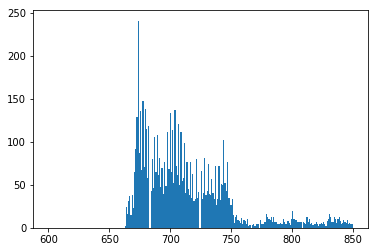

E:\MestradoData\p044\44_19_depth_61.yaml
19 61 E:\MestradoData\p044\44_19_depth_61.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_61.png (240, 320) (128, 128)


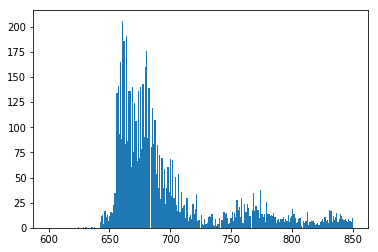

E:\MestradoData\p044\44_19_depth_71.yaml
19 71 E:\MestradoData\p044\44_19_depth_71.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_71.png (240, 320) (128, 128)


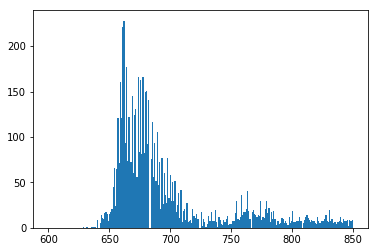

E:\MestradoData\p044\44_19_depth_81.yaml
19 81 E:\MestradoData\p044\44_19_depth_81.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_81.png (240, 320) (128, 128)


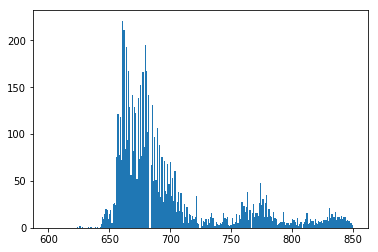

E:\MestradoData\p044\44_3_depth_91.yaml
3 91 E:\MestradoData\p044\44_3_depth_91.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_91.png (240, 320) (128, 128)


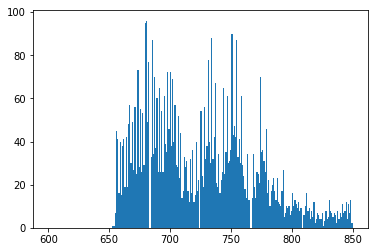

E:\MestradoData\p044\44_3_depth_101.yaml
3 101 E:\MestradoData\p044\44_3_depth_101.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_101.png (240, 320) (128, 128)


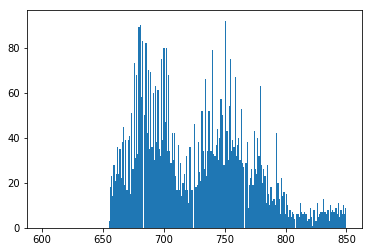

E:\MestradoData\p044\44_3_depth_111.yaml
3 111 E:\MestradoData\p044\44_3_depth_111.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_111.png (240, 320) (128, 128)


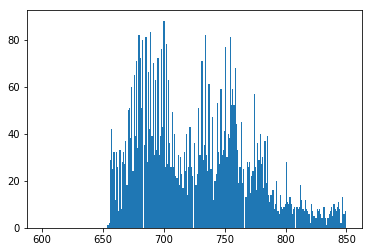

E:\MestradoData\p044\44_4_depth_91.yaml
4 91 E:\MestradoData\p044\44_4_depth_91.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_91.png (240, 320) (128, 128)


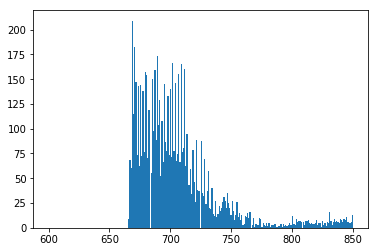

E:\MestradoData\p044\44_4_depth_101.yaml
4 101 E:\MestradoData\p044\44_4_depth_101.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_101.png (240, 320) (128, 128)


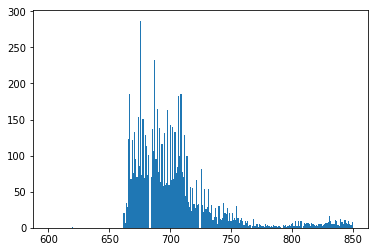

E:\MestradoData\p044\44_4_depth_111.yaml
4 111 E:\MestradoData\p044\44_4_depth_111.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_111.png (240, 320) (128, 128)


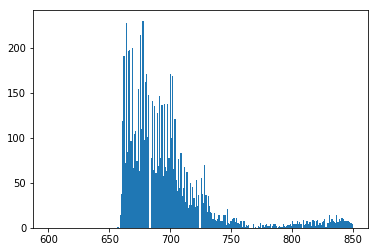

E:\MestradoData\p044\44_7_depth_91.yaml
7 91 E:\MestradoData\p044\44_7_depth_91.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_91.png (240, 320) (128, 128)


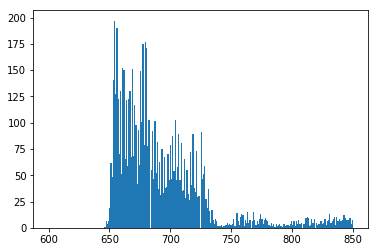

E:\MestradoData\p044\44_7_depth_101.yaml
7 101 E:\MestradoData\p044\44_7_depth_101.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_101.png (240, 320) (128, 128)


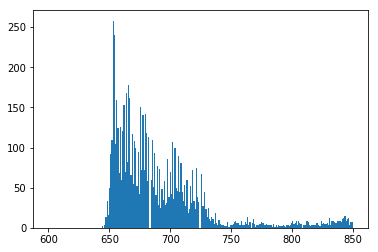

E:\MestradoData\p044\44_7_depth_111.yaml
7 111 E:\MestradoData\p044\44_7_depth_111.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_111.png (240, 320) (128, 128)


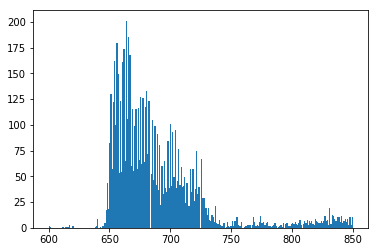

E:\MestradoData\p044\44_8_depth_91.yaml
8 91 E:\MestradoData\p044\44_8_depth_91.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_91.png (240, 320) (128, 128)


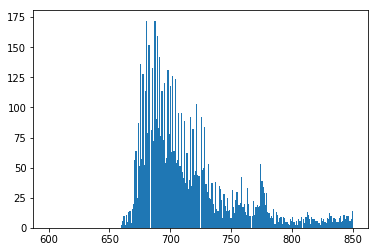

E:\MestradoData\p044\44_8_depth_101.yaml
8 101 E:\MestradoData\p044\44_8_depth_101.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_101.png (240, 320) (128, 128)


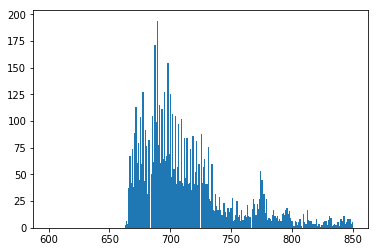

E:\MestradoData\p044\44_8_depth_111.yaml
8 111 E:\MestradoData\p044\44_8_depth_111.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_111.png (240, 320) (128, 128)


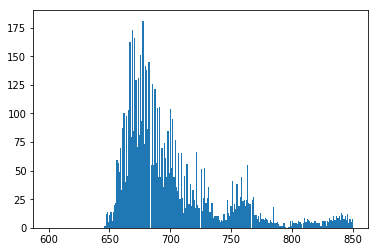

E:\MestradoData\p044\44_9_depth_91.yaml
9 91 E:\MestradoData\p044\44_9_depth_91.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_91.png (240, 320) (128, 128)


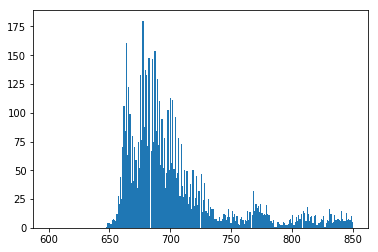

E:\MestradoData\p044\44_9_depth_101.yaml
9 101 E:\MestradoData\p044\44_9_depth_101.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_101.png (240, 320) (128, 128)


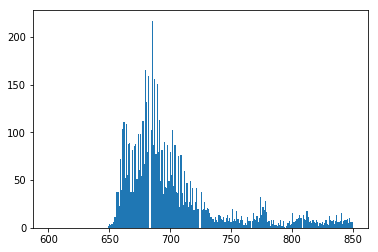

E:\MestradoData\p044\44_9_depth_111.yaml
9 111 E:\MestradoData\p044\44_9_depth_111.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_111.png (240, 320) (128, 128)


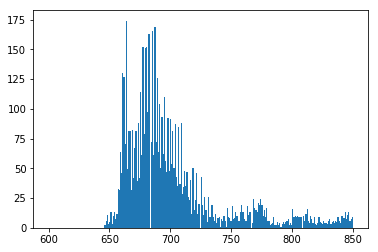

E:\MestradoData\p044\44_10_depth_91.yaml
10 91 E:\MestradoData\p044\44_10_depth_91.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_91.png (240, 320) (128, 128)


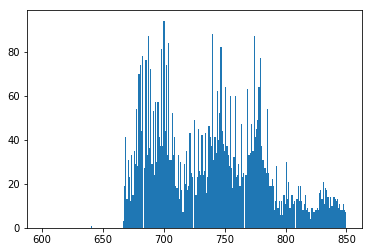

E:\MestradoData\p044\44_10_depth_101.yaml
10 101 E:\MestradoData\p044\44_10_depth_101.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_101.png (240, 320) (128, 128)


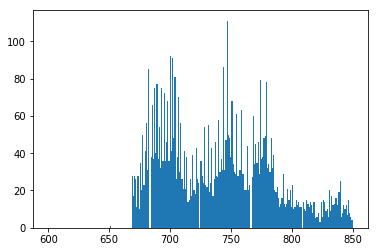

E:\MestradoData\p044\44_10_depth_111.yaml
10 111 E:\MestradoData\p044\44_10_depth_111.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_111.png (240, 320) (128, 128)


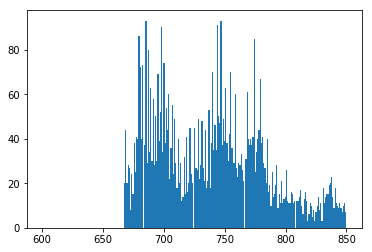

E:\MestradoData\p044\44_11_depth_91.yaml
11 91 E:\MestradoData\p044\44_11_depth_91.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_91.png (240, 320) (128, 128)


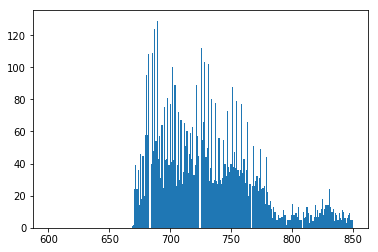

E:\MestradoData\p044\44_11_depth_101.yaml
11 101 E:\MestradoData\p044\44_11_depth_101.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_101.png (240, 320) (128, 128)


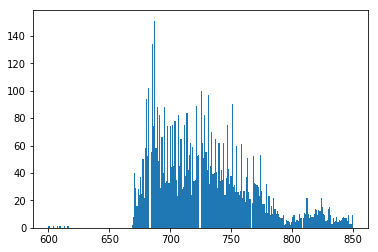

E:\MestradoData\p044\44_11_depth_111.yaml
11 111 E:\MestradoData\p044\44_11_depth_111.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_111.png (240, 320) (128, 128)


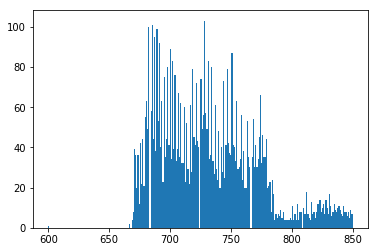

E:\MestradoData\p044\44_12_depth_91.yaml
12 91 E:\MestradoData\p044\44_12_depth_91.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_91.png (240, 320) (128, 128)


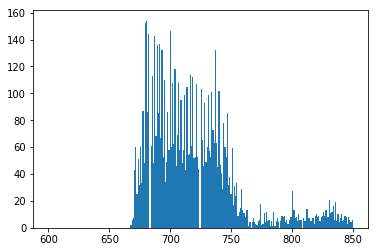

E:\MestradoData\p044\44_12_depth_101.yaml
12 101 E:\MestradoData\p044\44_12_depth_101.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_101.png (240, 320) (128, 128)


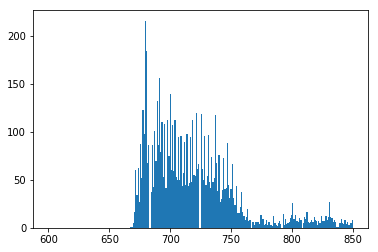

E:\MestradoData\p044\44_12_depth_111.yaml
12 111 E:\MestradoData\p044\44_12_depth_111.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_111.png (240, 320) (128, 128)


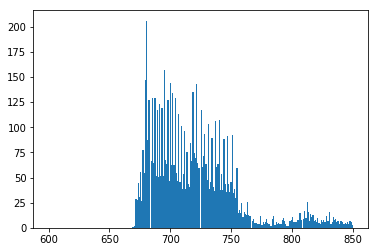

E:\MestradoData\p044\44_13_depth_91.yaml
13 91 E:\MestradoData\p044\44_13_depth_91.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_91.png (240, 320) (128, 128)


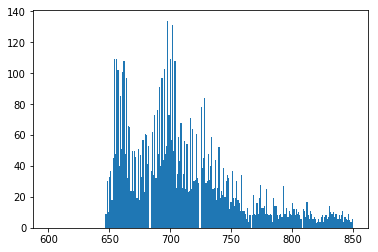

E:\MestradoData\p044\44_13_depth_101.yaml
13 101 E:\MestradoData\p044\44_13_depth_101.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_101.png (240, 320) (128, 128)


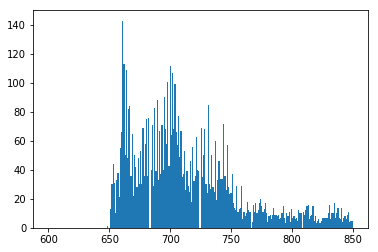

E:\MestradoData\p044\44_13_depth_111.yaml
13 111 E:\MestradoData\p044\44_13_depth_111.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_111.png (240, 320) (128, 128)


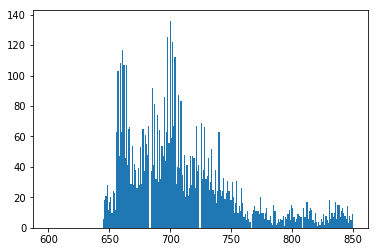

E:\MestradoData\p044\44_14_depth_91.yaml
14 91 E:\MestradoData\p044\44_14_depth_91.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_91.png (240, 320) (128, 128)


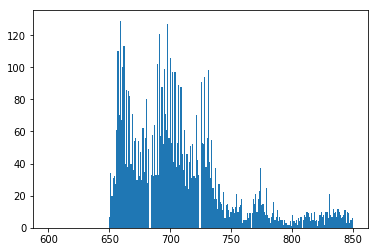

E:\MestradoData\p044\44_14_depth_101.yaml
14 101 E:\MestradoData\p044\44_14_depth_101.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_101.png (240, 320) (128, 128)


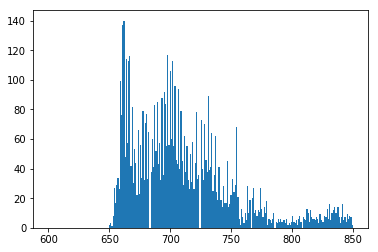

E:\MestradoData\p044\44_14_depth_111.yaml
14 111 E:\MestradoData\p044\44_14_depth_111.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_111.png (240, 320) (128, 128)


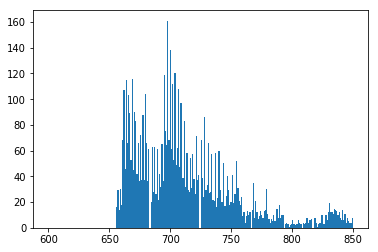

E:\MestradoData\p044\44_15_depth_91.yaml
15 91 E:\MestradoData\p044\44_15_depth_91.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_91.png (240, 320) (128, 128)


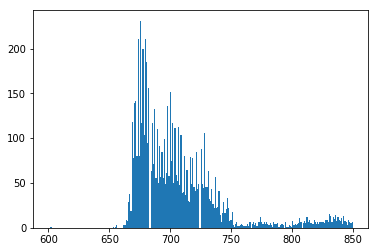

E:\MestradoData\p044\44_15_depth_101.yaml
15 101 E:\MestradoData\p044\44_15_depth_101.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_101.png (240, 320) (128, 128)


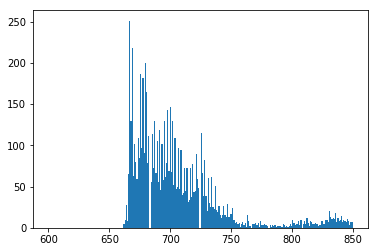

E:\MestradoData\p044\44_15_depth_111.yaml
15 111 E:\MestradoData\p044\44_15_depth_111.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_111.png (240, 320) (128, 128)


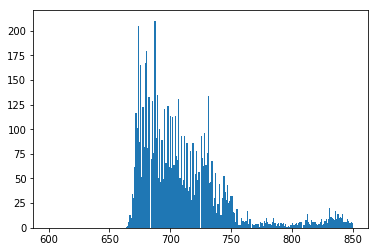

E:\MestradoData\p044\44_16_depth_91.yaml
16 91 E:\MestradoData\p044\44_16_depth_91.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_91.png (240, 320) (128, 128)


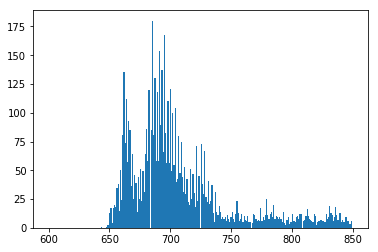

E:\MestradoData\p044\44_16_depth_101.yaml
16 101 E:\MestradoData\p044\44_16_depth_101.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_101.png (240, 320) (128, 128)


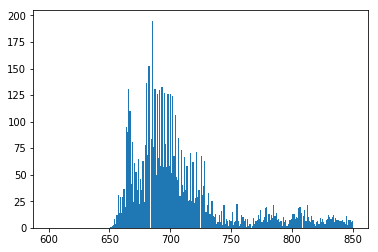

E:\MestradoData\p044\44_16_depth_111.yaml
16 111 E:\MestradoData\p044\44_16_depth_111.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_111.png (240, 320) (128, 128)


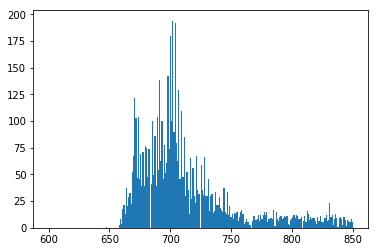

E:\MestradoData\p044\44_17_depth_91.yaml
17 91 E:\MestradoData\p044\44_17_depth_91.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_91.png (240, 320) (128, 128)


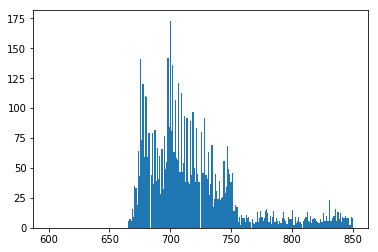

E:\MestradoData\p044\44_17_depth_101.yaml
17 101 E:\MestradoData\p044\44_17_depth_101.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_101.png (240, 320) (128, 128)


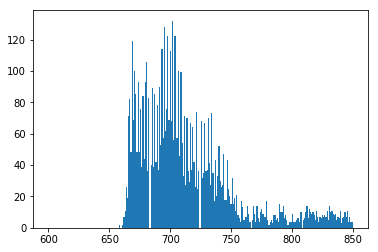

E:\MestradoData\p044\44_17_depth_111.yaml
17 111 E:\MestradoData\p044\44_17_depth_111.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_111.png (240, 320) (128, 128)


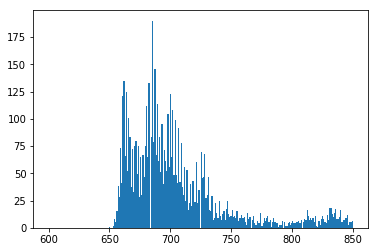

E:\MestradoData\p044\44_18_depth_91.yaml
18 91 E:\MestradoData\p044\44_18_depth_91.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_91.png (240, 320) (128, 128)


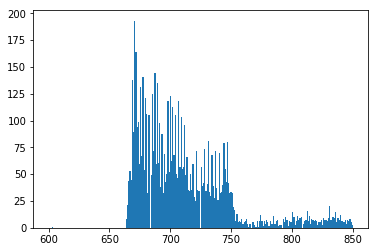

E:\MestradoData\p044\44_18_depth_101.yaml
18 101 E:\MestradoData\p044\44_18_depth_101.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_101.png (240, 320) (128, 128)


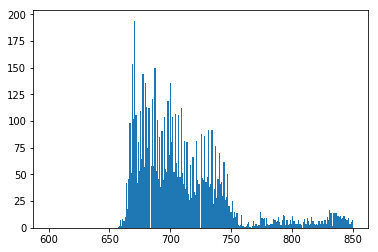

E:\MestradoData\p044\44_18_depth_111.yaml
18 111 E:\MestradoData\p044\44_18_depth_111.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_111.png (240, 320) (128, 128)


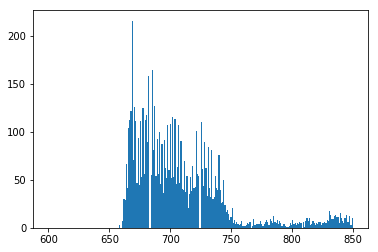

E:\MestradoData\p044\44_19_depth_91.yaml
19 91 E:\MestradoData\p044\44_19_depth_91.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_91.png (240, 320) (128, 128)


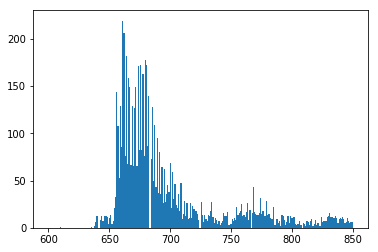

E:\MestradoData\p044\44_19_depth_101.yaml
19 101 E:\MestradoData\p044\44_19_depth_101.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_101.png (240, 320) (128, 128)


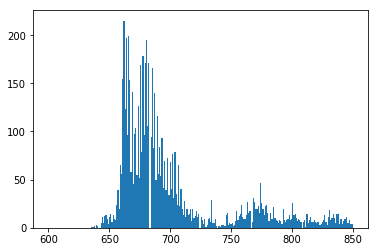

E:\MestradoData\p044\44_19_depth_111.yaml
19 111 E:\MestradoData\p044\44_19_depth_111.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_111.png (240, 320) (128, 128)


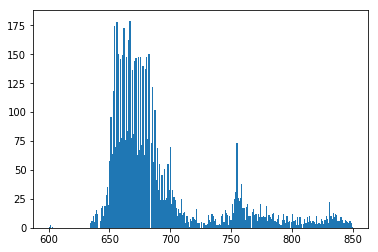

E:\MestradoData\p044\44_3_depth_121.yaml
3 121 E:\MestradoData\p044\44_3_depth_121.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_121.png (240, 320) (128, 128)


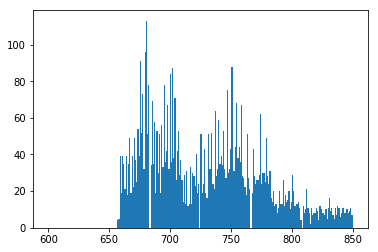

E:\MestradoData\p044\44_3_depth_131.yaml
3 131 E:\MestradoData\p044\44_3_depth_131.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_131.png (240, 320) (128, 128)


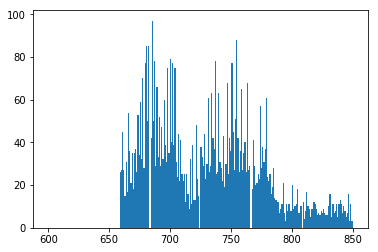

E:\MestradoData\p044\44_3_depth_141.yaml
3 141 E:\MestradoData\p044\44_3_depth_141.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_141.png (240, 320) (128, 128)


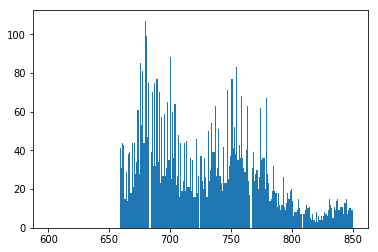

E:\MestradoData\p044\44_4_depth_121.yaml
4 121 E:\MestradoData\p044\44_4_depth_121.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_121.png (240, 320) (128, 128)


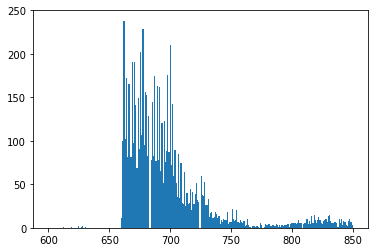

E:\MestradoData\p044\44_4_depth_131.yaml
4 131 E:\MestradoData\p044\44_4_depth_131.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_131.png (240, 320) (128, 128)


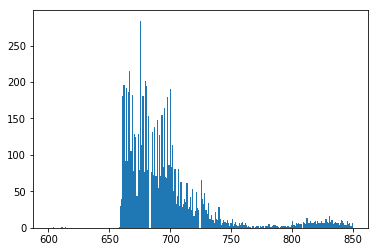

E:\MestradoData\p044\44_4_depth_141.yaml
4 141 E:\MestradoData\p044\44_4_depth_141.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_141.png (240, 320) (128, 128)


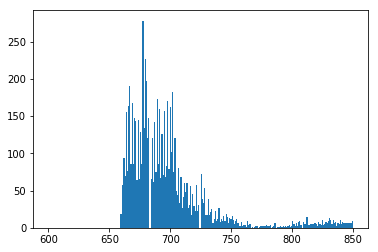

E:\MestradoData\p044\44_7_depth_121.yaml
7 121 E:\MestradoData\p044\44_7_depth_121.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_121.png (240, 320) (128, 128)


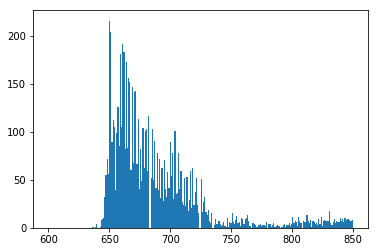

E:\MestradoData\p044\44_7_depth_131.yaml
7 131 E:\MestradoData\p044\44_7_depth_131.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_131.png (240, 320) (128, 128)


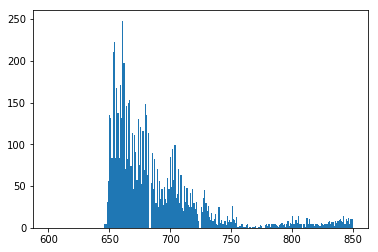

E:\MestradoData\p044\44_7_depth_141.yaml
7 141 E:\MestradoData\p044\44_7_depth_141.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_141.png (240, 320) (128, 128)


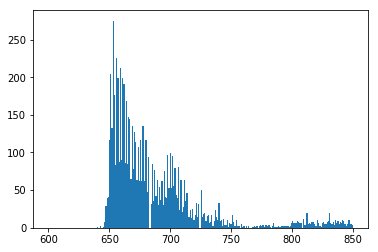

E:\MestradoData\p044\44_8_depth_121.yaml
8 121 E:\MestradoData\p044\44_8_depth_121.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_121.png (240, 320) (128, 128)


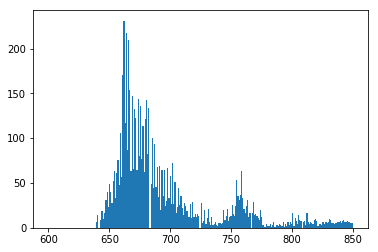

E:\MestradoData\p044\44_8_depth_131.yaml
8 131 E:\MestradoData\p044\44_8_depth_131.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_131.png (240, 320) (128, 128)


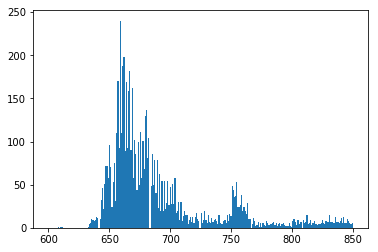

E:\MestradoData\p044\44_8_depth_141.yaml
8 141 E:\MestradoData\p044\44_8_depth_141.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_141.png (240, 320) (128, 128)


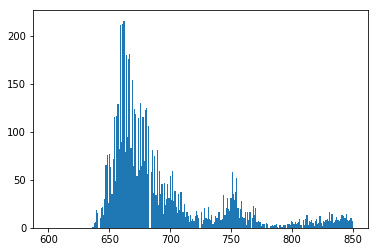

E:\MestradoData\p044\44_9_depth_121.yaml
9 121 E:\MestradoData\p044\44_9_depth_121.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_121.png (240, 320) (128, 128)


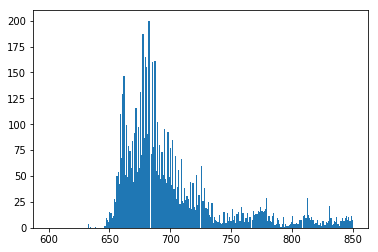

E:\MestradoData\p044\44_9_depth_131.yaml
9 131 E:\MestradoData\p044\44_9_depth_131.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_131.png (240, 320) (128, 128)


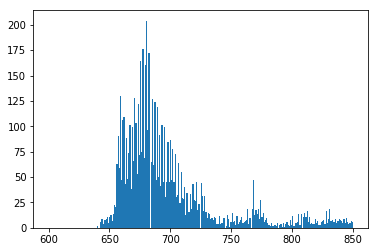

E:\MestradoData\p044\44_9_depth_141.yaml
9 141 E:\MestradoData\p044\44_9_depth_141.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_141.png (240, 320) (128, 128)


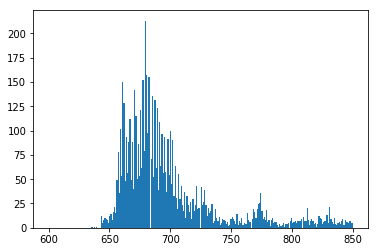

E:\MestradoData\p044\44_10_depth_121.yaml
10 121 E:\MestradoData\p044\44_10_depth_121.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_121.png (240, 320) (128, 128)


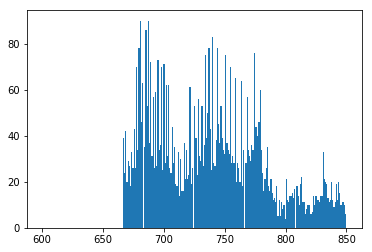

E:\MestradoData\p044\44_10_depth_131.yaml
10 131 E:\MestradoData\p044\44_10_depth_131.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_131.png (240, 320) (128, 128)


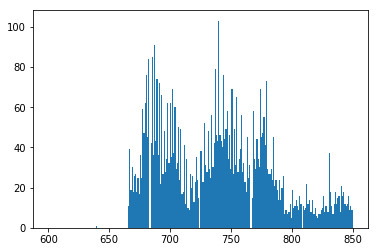

E:\MestradoData\p044\44_10_depth_141.yaml
10 141 E:\MestradoData\p044\44_10_depth_141.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_141.png (240, 320) (128, 128)


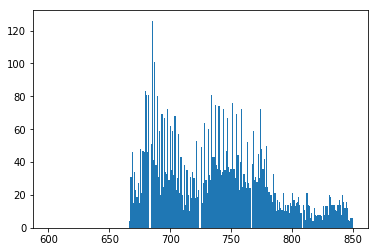

E:\MestradoData\p044\44_11_depth_121.yaml
11 121 E:\MestradoData\p044\44_11_depth_121.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_121.png (240, 320) (128, 128)


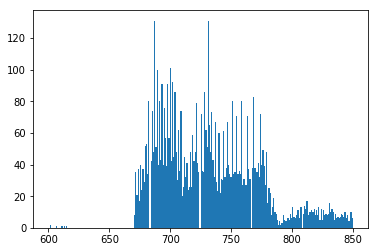

E:\MestradoData\p044\44_11_depth_131.yaml
11 131 E:\MestradoData\p044\44_11_depth_131.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_131.png (240, 320) (128, 128)


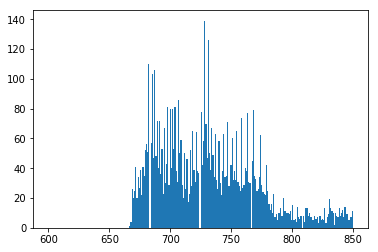

E:\MestradoData\p044\44_11_depth_141.yaml
11 141 E:\MestradoData\p044\44_11_depth_141.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_141.png (240, 320) (128, 128)


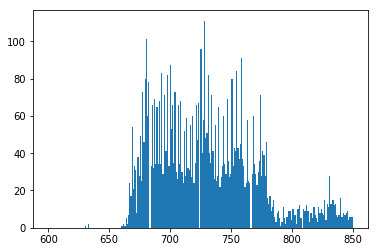

E:\MestradoData\p044\44_12_depth_121.yaml
12 121 E:\MestradoData\p044\44_12_depth_121.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_121.png (240, 320) (128, 128)


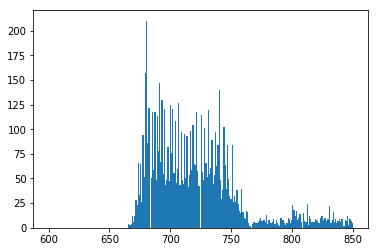

E:\MestradoData\p044\44_12_depth_131.yaml
12 131 E:\MestradoData\p044\44_12_depth_131.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_131.png (240, 320) (128, 128)


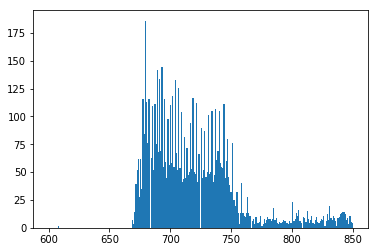

E:\MestradoData\p044\44_12_depth_141.yaml
12 141 E:\MestradoData\p044\44_12_depth_141.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_141.png (240, 320) (128, 128)


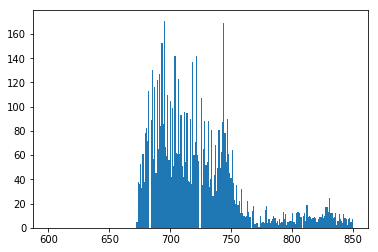

E:\MestradoData\p044\44_13_depth_121.yaml
13 121 E:\MestradoData\p044\44_13_depth_121.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_121.png (240, 320) (128, 128)


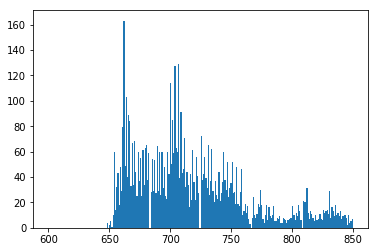

E:\MestradoData\p044\44_13_depth_131.yaml
13 131 E:\MestradoData\p044\44_13_depth_131.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_131.png (240, 320) (128, 128)


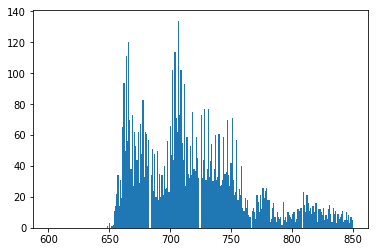

E:\MestradoData\p044\44_13_depth_141.yaml
13 141 E:\MestradoData\p044\44_13_depth_141.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_141.png (240, 320) (128, 128)


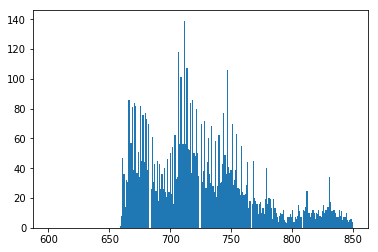

E:\MestradoData\p044\44_14_depth_121.yaml
14 121 E:\MestradoData\p044\44_14_depth_121.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_121.png (240, 320) (128, 128)


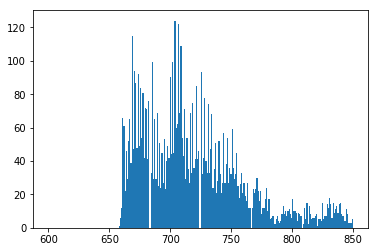

E:\MestradoData\p044\44_14_depth_131.yaml
14 131 E:\MestradoData\p044\44_14_depth_131.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_131.png (240, 320) (128, 128)


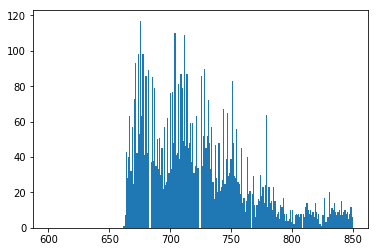

E:\MestradoData\p044\44_14_depth_141.yaml
14 141 E:\MestradoData\p044\44_14_depth_141.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_141.png (240, 320) (128, 128)


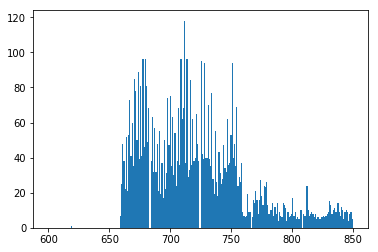

E:\MestradoData\p044\44_15_depth_121.yaml
15 121 E:\MestradoData\p044\44_15_depth_121.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_121.png (240, 320) (128, 128)


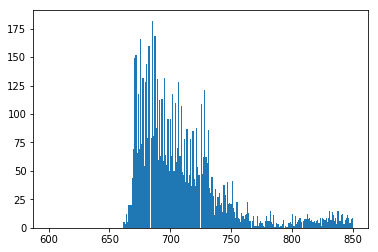

E:\MestradoData\p044\44_15_depth_131.yaml
15 131 E:\MestradoData\p044\44_15_depth_131.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_131.png (240, 320) (128, 128)


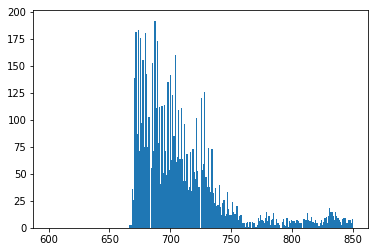

E:\MestradoData\p044\44_15_depth_141.yaml
15 141 E:\MestradoData\p044\44_15_depth_141.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_141.png (240, 320) (128, 128)


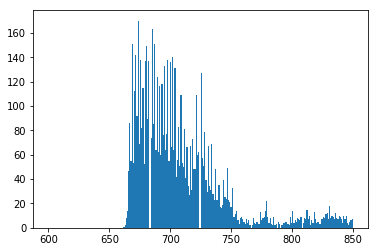

E:\MestradoData\p044\44_16_depth_121.yaml
16 121 E:\MestradoData\p044\44_16_depth_121.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_121.png (240, 320) (128, 128)


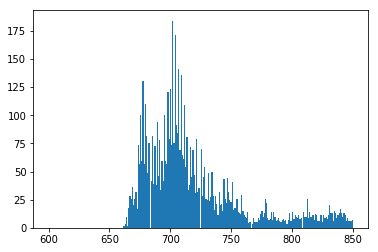

E:\MestradoData\p044\44_16_depth_131.yaml
16 131 E:\MestradoData\p044\44_16_depth_131.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_131.png (240, 320) (128, 128)


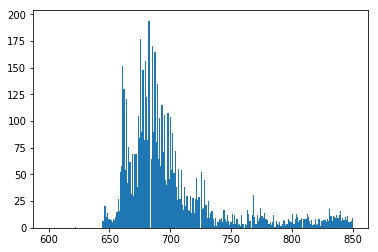

E:\MestradoData\p044\44_16_depth_141.yaml
16 141 E:\MestradoData\p044\44_16_depth_141.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_141.png (240, 320) (128, 128)


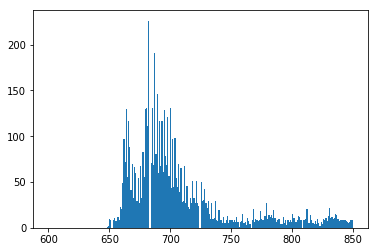

E:\MestradoData\p044\44_17_depth_121.yaml
17 121 E:\MestradoData\p044\44_17_depth_121.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_121.png (240, 320) (128, 128)


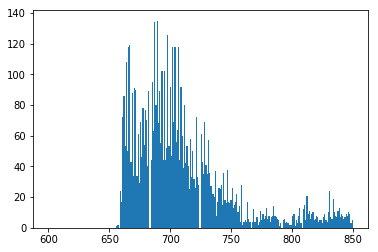

E:\MestradoData\p044\44_17_depth_131.yaml
17 131 E:\MestradoData\p044\44_17_depth_131.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_131.png (240, 320) (128, 128)


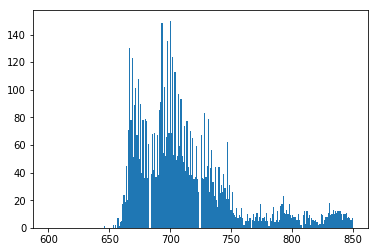

E:\MestradoData\p044\44_17_depth_141.yaml
17 141 E:\MestradoData\p044\44_17_depth_141.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_141.png (240, 320) (128, 128)


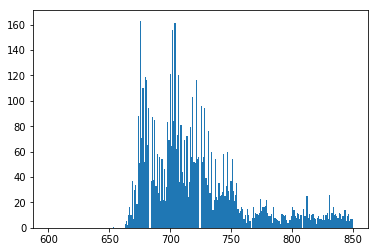

E:\MestradoData\p044\44_18_depth_121.yaml
18 121 E:\MestradoData\p044\44_18_depth_121.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_121.png (240, 320) (128, 128)


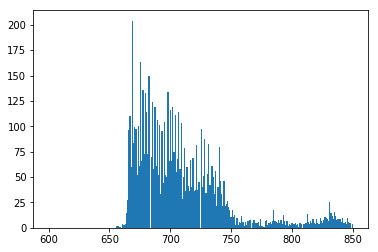

E:\MestradoData\p044\44_18_depth_131.yaml
18 131 E:\MestradoData\p044\44_18_depth_131.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_131.png (240, 320) (128, 128)


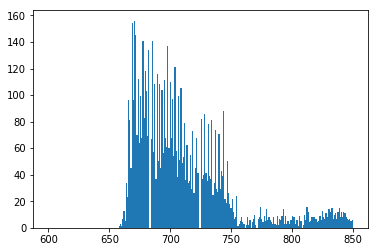

E:\MestradoData\p044\44_18_depth_141.yaml
18 141 E:\MestradoData\p044\44_18_depth_141.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_141.png (240, 320) (128, 128)


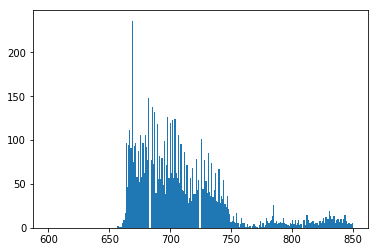

E:\MestradoData\p044\44_19_depth_121.yaml
19 121 E:\MestradoData\p044\44_19_depth_121.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_121.png (240, 320) (128, 128)


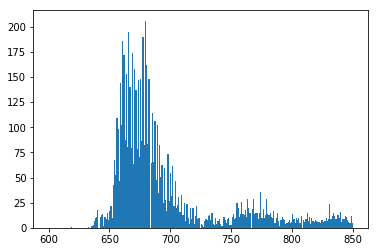

E:\MestradoData\p044\44_19_depth_131.yaml
19 131 E:\MestradoData\p044\44_19_depth_131.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_131.png (240, 320) (128, 128)


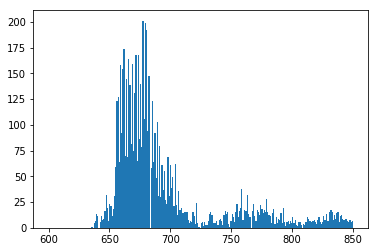

E:\MestradoData\p044\44_19_depth_141.yaml
19 141 E:\MestradoData\p044\44_19_depth_141.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_141.png (240, 320) (128, 128)


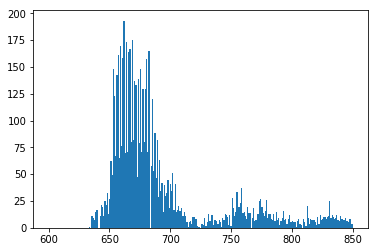

E:\MestradoData\p044\44_3_depth_151.yaml
3 151 E:\MestradoData\p044\44_3_depth_151.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_151.png (240, 320) (128, 128)


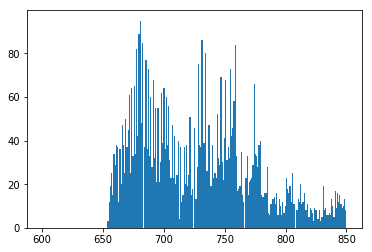

E:\MestradoData\p044\44_3_depth_161.yaml
3 161 E:\MestradoData\p044\44_3_depth_161.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_161.png (240, 320) (128, 128)


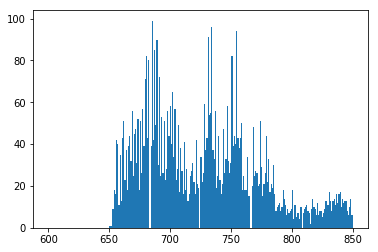

E:\MestradoData\p044\44_3_depth_171.yaml
3 171 E:\MestradoData\p044\44_3_depth_171.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_171.png (240, 320) (128, 128)


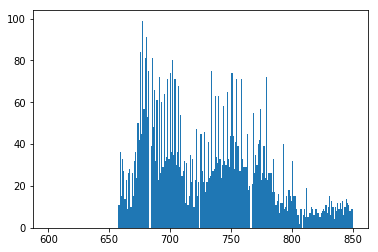

E:\MestradoData\p044\44_4_depth_151.yaml
4 151 E:\MestradoData\p044\44_4_depth_151.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_151.png (240, 320) (128, 128)


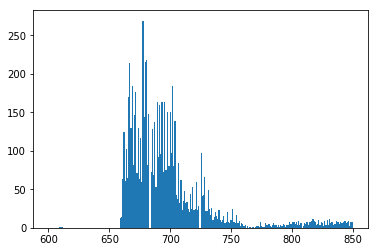

E:\MestradoData\p044\44_4_depth_161.yaml
4 161 E:\MestradoData\p044\44_4_depth_161.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_161.png (240, 320) (128, 128)


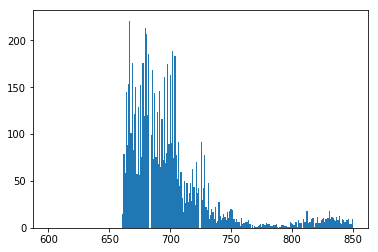

E:\MestradoData\p044\44_4_depth_171.yaml
4 171 E:\MestradoData\p044\44_4_depth_171.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_171.png (240, 320) (128, 128)


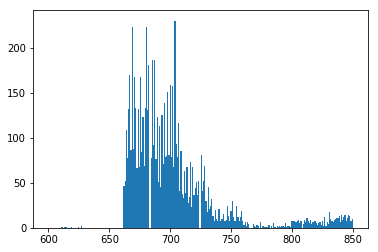

E:\MestradoData\p044\44_7_depth_151.yaml
7 151 E:\MestradoData\p044\44_7_depth_151.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_151.png (240, 320) (128, 128)


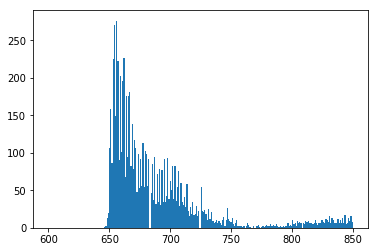

E:\MestradoData\p044\44_7_depth_161.yaml
7 161 E:\MestradoData\p044\44_7_depth_161.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_161.png (240, 320) (128, 128)


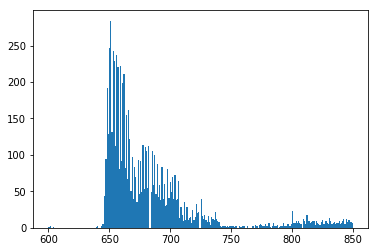

E:\MestradoData\p044\44_7_depth_171.yaml
7 171 E:\MestradoData\p044\44_7_depth_171.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_171.png (240, 320) (128, 128)


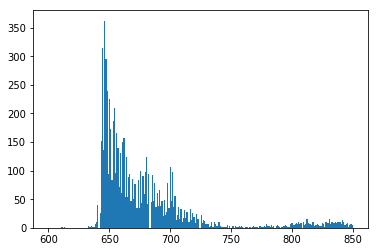

E:\MestradoData\p044\44_8_depth_151.yaml
8 151 E:\MestradoData\p044\44_8_depth_151.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_151.png (240, 320) (128, 128)


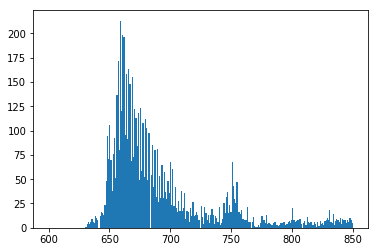

E:\MestradoData\p044\44_8_depth_161.yaml
8 161 E:\MestradoData\p044\44_8_depth_161.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_161.png (240, 320) (128, 128)


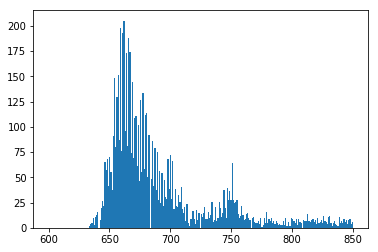

E:\MestradoData\p044\44_8_depth_171.yaml
8 171 E:\MestradoData\p044\44_8_depth_171.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_171.png (240, 320) (128, 128)


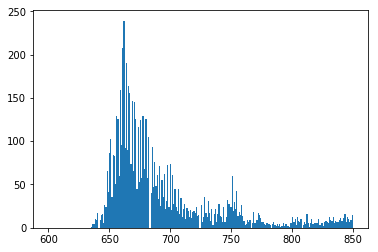

E:\MestradoData\p044\44_9_depth_151.yaml
9 151 E:\MestradoData\p044\44_9_depth_151.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_151.png (240, 320) (128, 128)


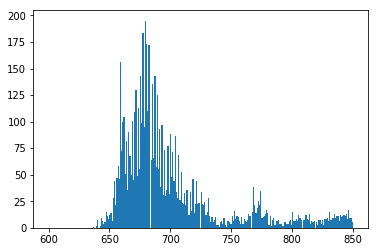

E:\MestradoData\p044\44_9_depth_161.yaml
9 161 E:\MestradoData\p044\44_9_depth_161.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_161.png (240, 320) (128, 128)


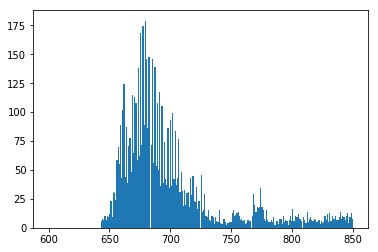

E:\MestradoData\p044\44_9_depth_171.yaml
9 171 E:\MestradoData\p044\44_9_depth_171.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_171.png (240, 320) (128, 128)


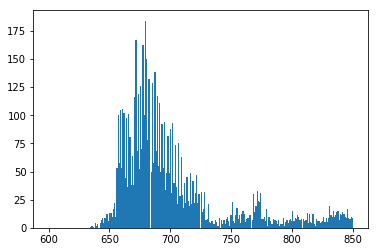

E:\MestradoData\p044\44_10_depth_151.yaml
10 151 E:\MestradoData\p044\44_10_depth_151.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_151.png (240, 320) (128, 128)


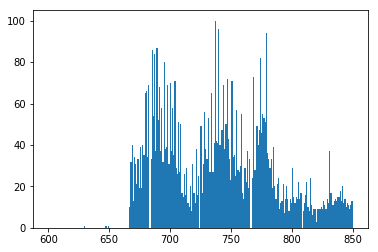

E:\MestradoData\p044\44_10_depth_161.yaml
10 161 E:\MestradoData\p044\44_10_depth_161.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_161.png (240, 320) (128, 128)


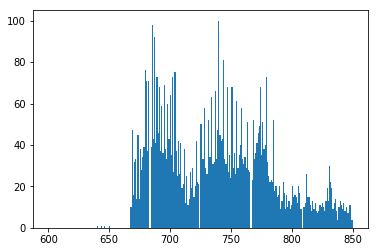

E:\MestradoData\p044\44_10_depth_171.yaml
10 171 E:\MestradoData\p044\44_10_depth_171.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_171.png (240, 320) (128, 128)


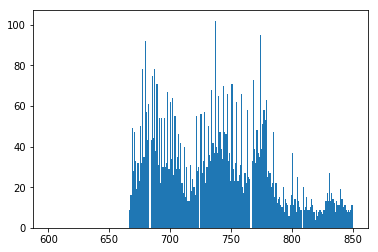

E:\MestradoData\p044\44_11_depth_151.yaml
11 151 E:\MestradoData\p044\44_11_depth_151.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_151.png (240, 320) (128, 128)


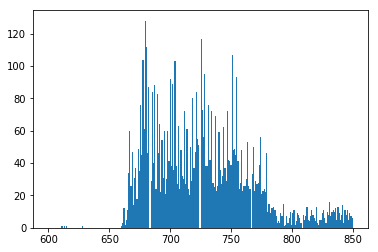

E:\MestradoData\p044\44_11_depth_161.yaml
11 161 E:\MestradoData\p044\44_11_depth_161.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_161.png (240, 320) (128, 128)


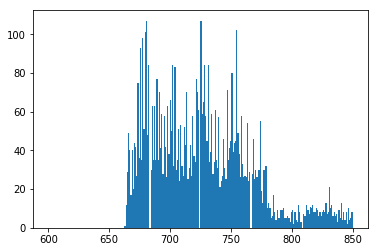

E:\MestradoData\p044\44_11_depth_171.yaml
11 171 E:\MestradoData\p044\44_11_depth_171.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_171.png (240, 320) (128, 128)


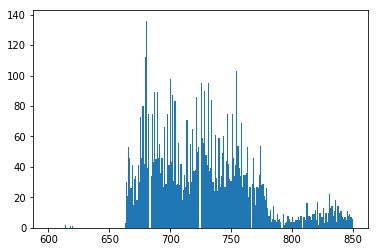

E:\MestradoData\p044\44_12_depth_151.yaml
12 151 E:\MestradoData\p044\44_12_depth_151.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_151.png (240, 320) (128, 128)


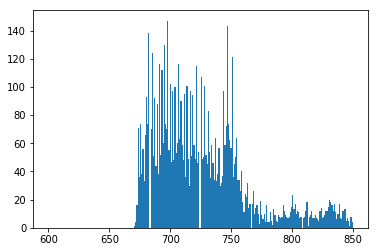

E:\MestradoData\p044\44_12_depth_161.yaml
12 161 E:\MestradoData\p044\44_12_depth_161.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_161.png (240, 320) (128, 128)


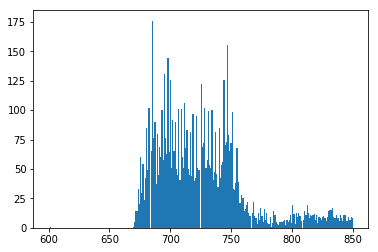

E:\MestradoData\p044\44_12_depth_171.yaml
12 171 E:\MestradoData\p044\44_12_depth_171.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_171.png (240, 320) (128, 128)


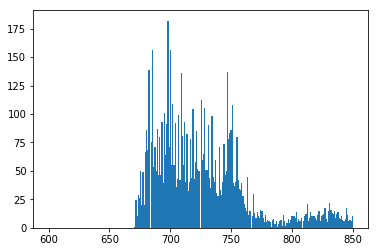

E:\MestradoData\p044\44_13_depth_151.yaml
13 151 E:\MestradoData\p044\44_13_depth_151.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_151.png (240, 320) (128, 128)


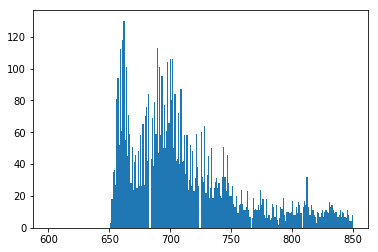

E:\MestradoData\p044\44_13_depth_161.yaml
13 161 E:\MestradoData\p044\44_13_depth_161.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_161.png (240, 320) (128, 128)


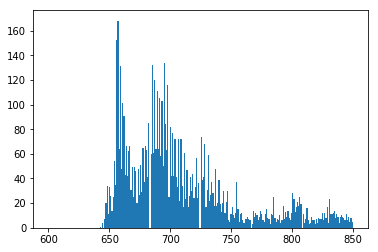

E:\MestradoData\p044\44_13_depth_171.yaml
13 171 E:\MestradoData\p044\44_13_depth_171.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_171.png (240, 320) (128, 128)


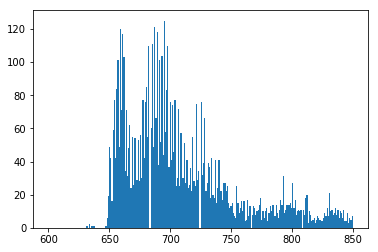

E:\MestradoData\p044\44_14_depth_151.yaml
14 151 E:\MestradoData\p044\44_14_depth_151.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_151.png (240, 320) (128, 128)


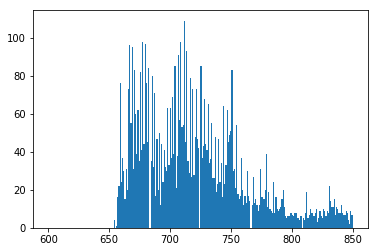

E:\MestradoData\p044\44_14_depth_161.yaml
14 161 E:\MestradoData\p044\44_14_depth_161.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_161.png (240, 320) (128, 128)


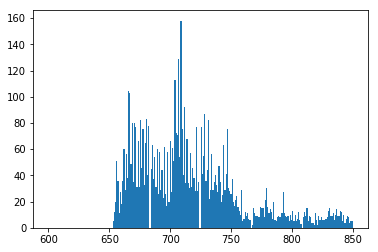

E:\MestradoData\p044\44_14_depth_171.yaml
14 171 E:\MestradoData\p044\44_14_depth_171.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_171.png (240, 320) (128, 128)


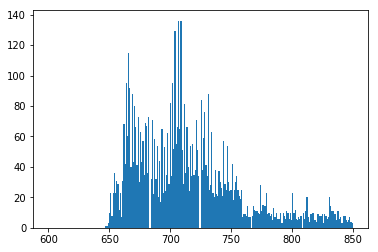

E:\MestradoData\p044\44_15_depth_151.yaml
15 151 E:\MestradoData\p044\44_15_depth_151.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_151.png (240, 320) (128, 128)


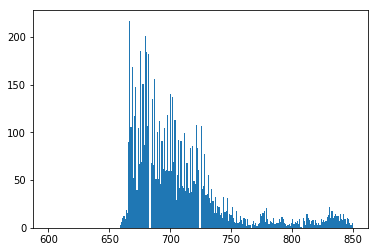

E:\MestradoData\p044\44_15_depth_161.yaml
15 161 E:\MestradoData\p044\44_15_depth_161.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_161.png (240, 320) (128, 128)


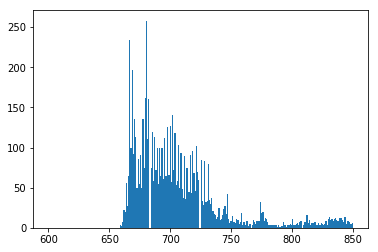

E:\MestradoData\p044\44_15_depth_171.yaml
15 171 E:\MestradoData\p044\44_15_depth_171.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_171.png (240, 320) (128, 128)


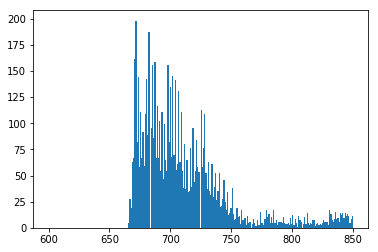

E:\MestradoData\p044\44_16_depth_151.yaml
16 151 E:\MestradoData\p044\44_16_depth_151.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_151.png (240, 320) (128, 128)


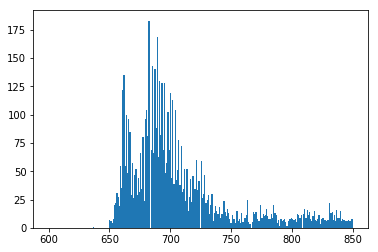

E:\MestradoData\p044\44_16_depth_161.yaml
16 161 E:\MestradoData\p044\44_16_depth_161.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_161.png (240, 320) (128, 128)


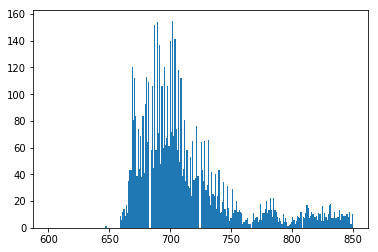

E:\MestradoData\p044\44_16_depth_171.yaml
16 171 E:\MestradoData\p044\44_16_depth_171.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_171.png (240, 320) (128, 128)


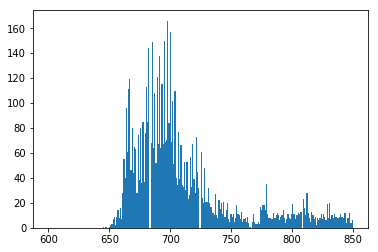

E:\MestradoData\p044\44_17_depth_151.yaml
17 151 E:\MestradoData\p044\44_17_depth_151.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_151.png (240, 320) (128, 128)


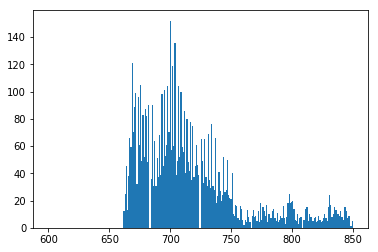

E:\MestradoData\p044\44_17_depth_161.yaml
17 161 E:\MestradoData\p044\44_17_depth_161.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_161.png (240, 320) (128, 128)


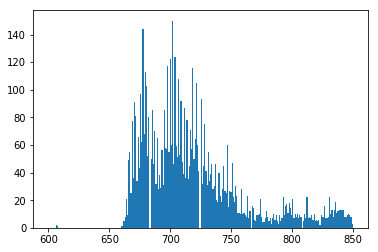

E:\MestradoData\p044\44_17_depth_171.yaml
17 171 E:\MestradoData\p044\44_17_depth_171.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_171.png (240, 320) (128, 128)


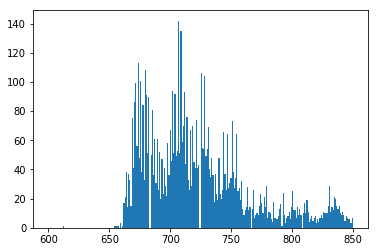

E:\MestradoData\p044\44_18_depth_151.yaml
18 151 E:\MestradoData\p044\44_18_depth_151.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_151.png (240, 320) (128, 128)


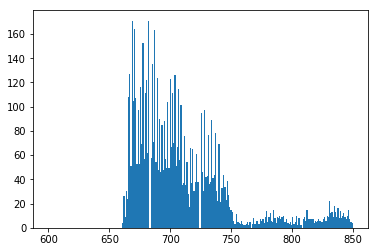

E:\MestradoData\p044\44_18_depth_161.yaml
18 161 E:\MestradoData\p044\44_18_depth_161.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_161.png (240, 320) (128, 128)


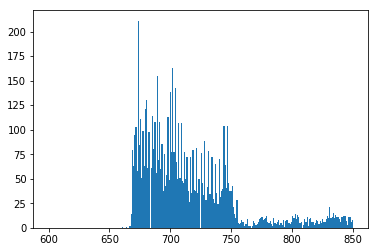

E:\MestradoData\p044\44_18_depth_171.yaml
18 171 E:\MestradoData\p044\44_18_depth_171.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_171.png (240, 320) (128, 128)


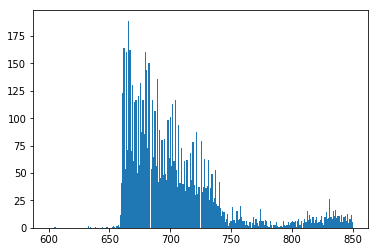

E:\MestradoData\p044\44_19_depth_151.yaml
19 151 E:\MestradoData\p044\44_19_depth_151.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_151.png (240, 320) (128, 128)


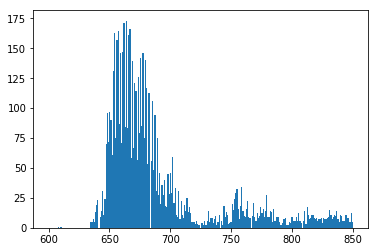

E:\MestradoData\p044\44_19_depth_161.yaml
19 161 E:\MestradoData\p044\44_19_depth_161.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_161.png (240, 320) (128, 128)


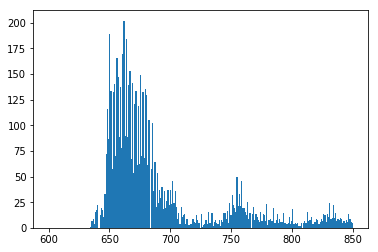

E:\MestradoData\p044\44_19_depth_171.yaml
19 171 E:\MestradoData\p044\44_19_depth_171.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_171.png (240, 320) (128, 128)


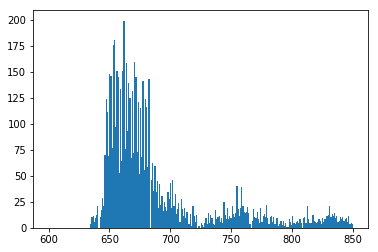

E:\MestradoData\p044\44_3_depth_181.yaml
3 181 E:\MestradoData\p044\44_3_depth_181.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_181.png (240, 320) (128, 128)


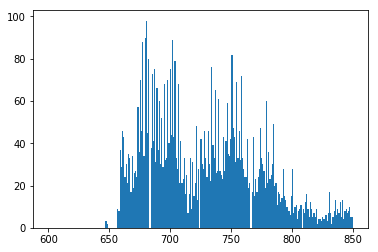

E:\MestradoData\p044\44_3_depth_191.yaml
3 191 E:\MestradoData\p044\44_3_depth_191.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_191.png (240, 320) (128, 128)


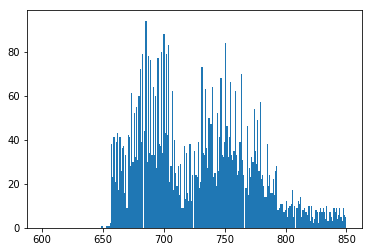

E:\MestradoData\p044\44_3_depth_201.yaml
3 201 E:\MestradoData\p044\44_3_depth_201.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_201.png (240, 320) (128, 128)


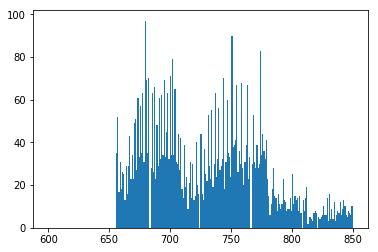

E:\MestradoData\p044\44_4_depth_181.yaml
4 181 E:\MestradoData\p044\44_4_depth_181.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_181.png (240, 320) (128, 128)


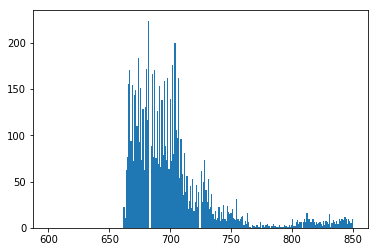

E:\MestradoData\p044\44_4_depth_191.yaml
4 191 E:\MestradoData\p044\44_4_depth_191.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_191.png (240, 320) (128, 128)


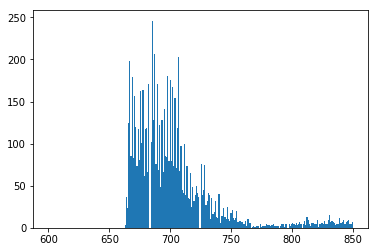

E:\MestradoData\p044\44_4_depth_201.yaml
4 201 E:\MestradoData\p044\44_4_depth_201.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_201.png (240, 320) (128, 128)


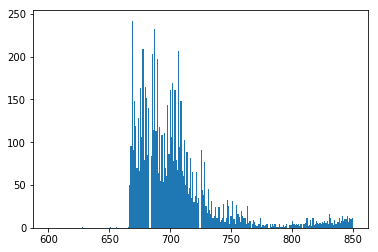

E:\MestradoData\p044\44_7_depth_181.yaml
7 181 E:\MestradoData\p044\44_7_depth_181.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_181.png (240, 320) (128, 128)


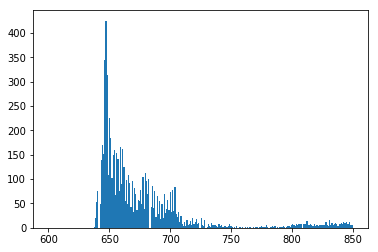

E:\MestradoData\p044\44_7_depth_191.yaml
7 191 E:\MestradoData\p044\44_7_depth_191.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_191.png (240, 320) (128, 128)


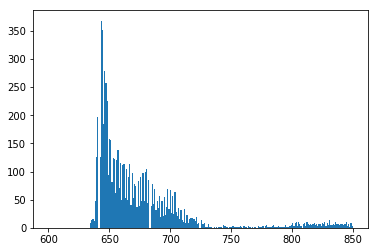

E:\MestradoData\p044\44_7_depth_201.yaml
7 201 E:\MestradoData\p044\44_7_depth_201.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_201.png (240, 320) (128, 128)


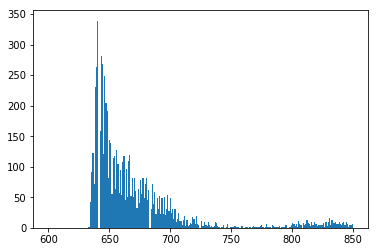

E:\MestradoData\p044\44_8_depth_181.yaml
8 181 E:\MestradoData\p044\44_8_depth_181.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_181.png (240, 320) (128, 128)


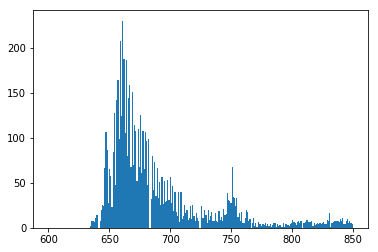

E:\MestradoData\p044\44_8_depth_191.yaml
8 191 E:\MestradoData\p044\44_8_depth_191.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_191.png (240, 320) (128, 128)


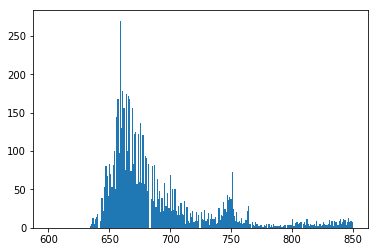

E:\MestradoData\p044\44_8_depth_201.yaml
8 201 E:\MestradoData\p044\44_8_depth_201.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_201.png (240, 320) (128, 128)


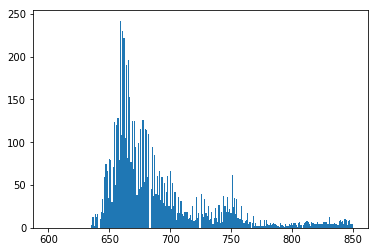

E:\MestradoData\p044\44_9_depth_181.yaml
9 181 E:\MestradoData\p044\44_9_depth_181.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_181.png (240, 320) (128, 128)


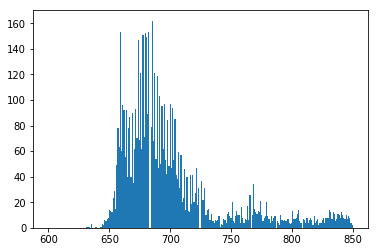

E:\MestradoData\p044\44_9_depth_191.yaml
9 191 E:\MestradoData\p044\44_9_depth_191.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_191.png (240, 320) (128, 128)


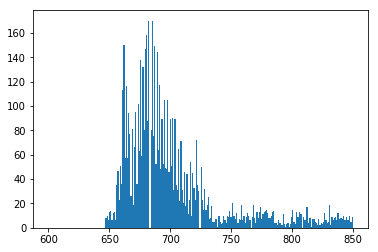

E:\MestradoData\p044\44_9_depth_201.yaml
9 201 E:\MestradoData\p044\44_9_depth_201.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_201.png (240, 320) (128, 128)


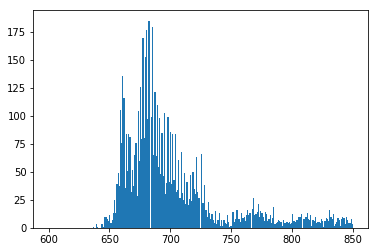

E:\MestradoData\p044\44_10_depth_181.yaml
10 181 E:\MestradoData\p044\44_10_depth_181.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_181.png (240, 320) (128, 128)


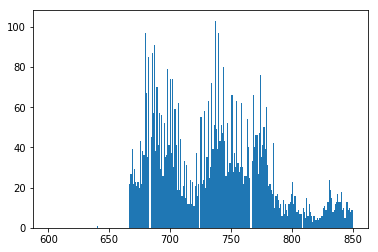

E:\MestradoData\p044\44_10_depth_191.yaml
10 191 E:\MestradoData\p044\44_10_depth_191.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_191.png (240, 320) (128, 128)


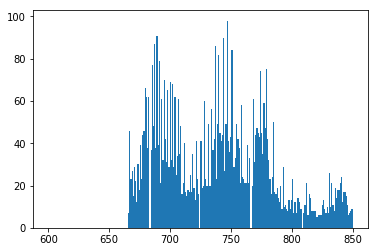

E:\MestradoData\p044\44_10_depth_201.yaml
10 201 E:\MestradoData\p044\44_10_depth_201.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_201.png (240, 320) (128, 128)


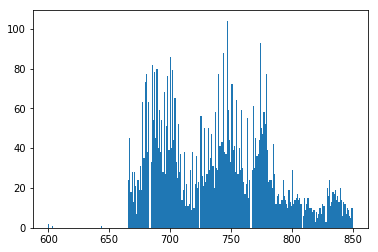

E:\MestradoData\p044\44_11_depth_181.yaml
11 181 E:\MestradoData\p044\44_11_depth_181.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_181.png (240, 320) (128, 128)


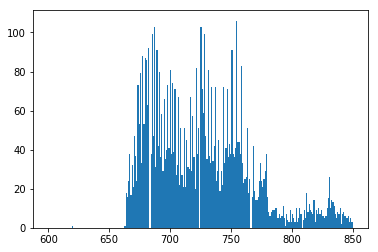

E:\MestradoData\p044\44_11_depth_191.yaml
11 191 E:\MestradoData\p044\44_11_depth_191.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_191.png (240, 320) (128, 128)


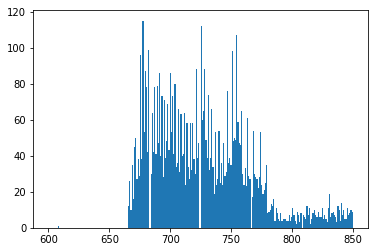

E:\MestradoData\p044\44_11_depth_201.yaml
11 201 E:\MestradoData\p044\44_11_depth_201.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_201.png (240, 320) (128, 128)


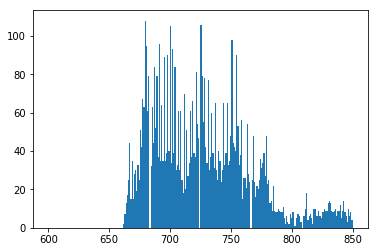

E:\MestradoData\p044\44_12_depth_181.yaml
12 181 E:\MestradoData\p044\44_12_depth_181.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_181.png (240, 320) (128, 128)


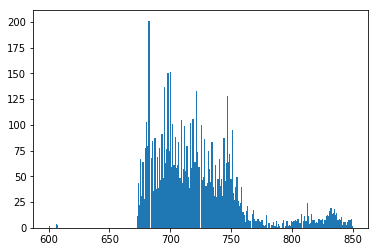

E:\MestradoData\p044\44_12_depth_191.yaml
12 191 E:\MestradoData\p044\44_12_depth_191.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_191.png (240, 320) (128, 128)


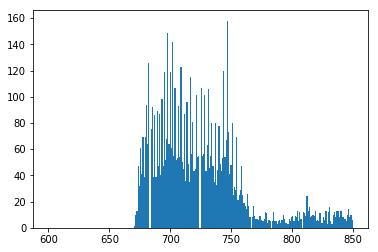

E:\MestradoData\p044\44_12_depth_201.yaml
12 201 E:\MestradoData\p044\44_12_depth_201.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_201.png (240, 320) (128, 128)


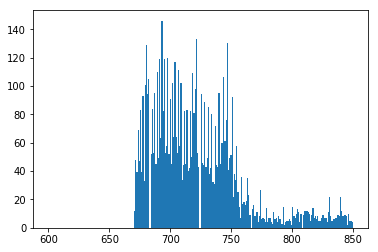

E:\MestradoData\p044\44_13_depth_181.yaml
13 181 E:\MestradoData\p044\44_13_depth_181.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_181.png (240, 320) (128, 128)


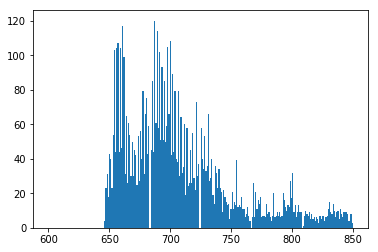

E:\MestradoData\p044\44_13_depth_191.yaml
13 191 E:\MestradoData\p044\44_13_depth_191.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_191.png (240, 320) (128, 128)


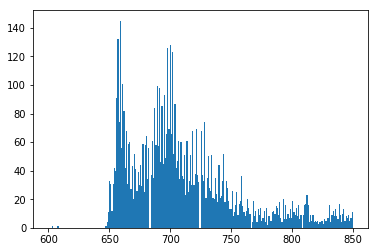

E:\MestradoData\p044\44_13_depth_201.yaml
13 201 E:\MestradoData\p044\44_13_depth_201.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_201.png (240, 320) (128, 128)


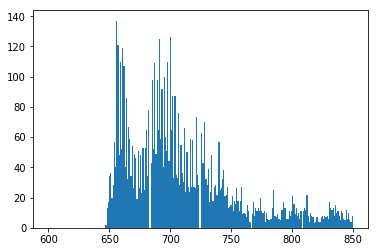

E:\MestradoData\p044\44_14_depth_181.yaml
14 181 E:\MestradoData\p044\44_14_depth_181.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_181.png (240, 320) (128, 128)


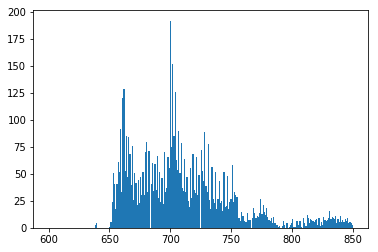

E:\MestradoData\p044\44_14_depth_191.yaml
14 191 E:\MestradoData\p044\44_14_depth_191.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_191.png (240, 320) (128, 128)


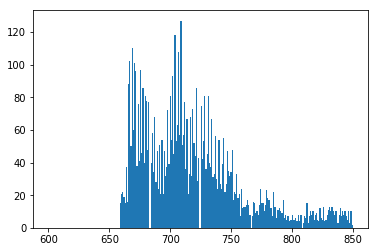

E:\MestradoData\p044\44_14_depth_201.yaml
14 201 E:\MestradoData\p044\44_14_depth_201.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_201.png (240, 320) (128, 128)


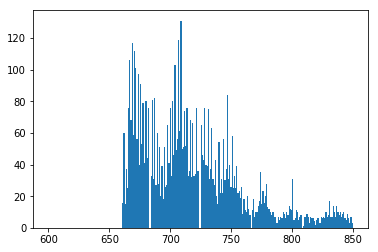

E:\MestradoData\p044\44_15_depth_181.yaml
15 181 E:\MestradoData\p044\44_15_depth_181.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_181.png (240, 320) (128, 128)


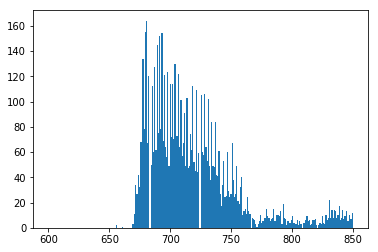

E:\MestradoData\p044\44_15_depth_191.yaml
15 191 E:\MestradoData\p044\44_15_depth_191.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_191.png (240, 320) (128, 128)


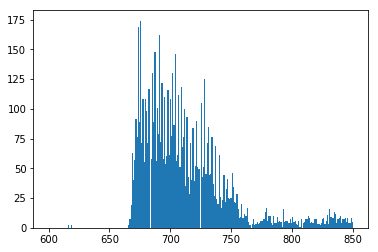

E:\MestradoData\p044\44_15_depth_201.yaml
15 201 E:\MestradoData\p044\44_15_depth_201.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_201.png (240, 320) (128, 128)


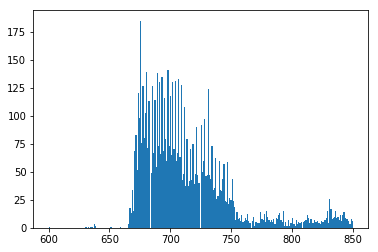

E:\MestradoData\p044\44_16_depth_181.yaml
16 181 E:\MestradoData\p044\44_16_depth_181.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_181.png (240, 320) (128, 128)


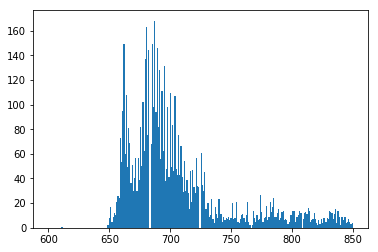

E:\MestradoData\p044\44_16_depth_191.yaml
16 191 E:\MestradoData\p044\44_16_depth_191.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_191.png (240, 320) (128, 128)


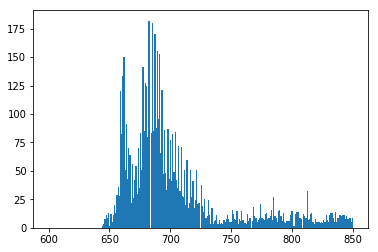

E:\MestradoData\p044\44_16_depth_201.yaml
16 201 E:\MestradoData\p044\44_16_depth_201.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_201.png (240, 320) (128, 128)


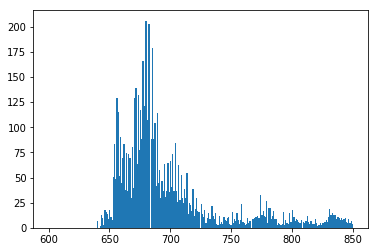

E:\MestradoData\p044\44_17_depth_181.yaml
17 181 E:\MestradoData\p044\44_17_depth_181.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_181.png (240, 320) (128, 128)


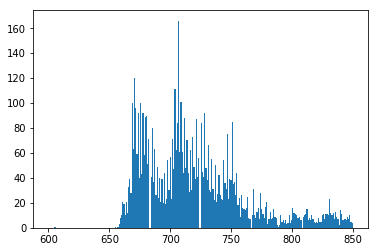

E:\MestradoData\p044\44_17_depth_191.yaml
17 191 E:\MestradoData\p044\44_17_depth_191.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_191.png (240, 320) (128, 128)


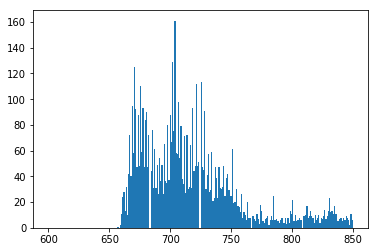

E:\MestradoData\p044\44_17_depth_201.yaml
17 201 E:\MestradoData\p044\44_17_depth_201.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_201.png (240, 320) (128, 128)


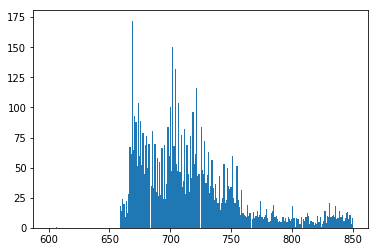

E:\MestradoData\p044\44_18_depth_181.yaml
18 181 E:\MestradoData\p044\44_18_depth_181.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_181.png (240, 320) (128, 128)


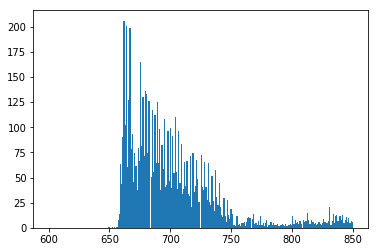

E:\MestradoData\p044\44_18_depth_191.yaml
18 191 E:\MestradoData\p044\44_18_depth_191.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_191.png (240, 320) (128, 128)


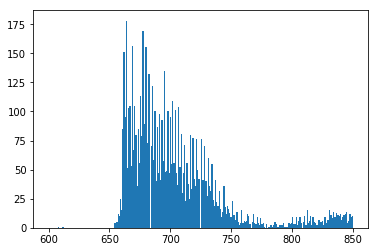

E:\MestradoData\p044\44_18_depth_201.yaml
18 201 E:\MestradoData\p044\44_18_depth_201.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_201.png (240, 320) (128, 128)


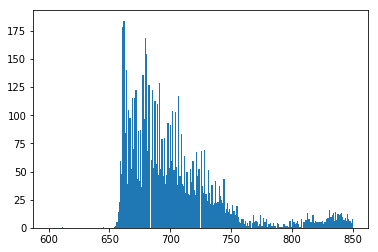

E:\MestradoData\p044\44_19_depth_181.yaml
19 181 E:\MestradoData\p044\44_19_depth_181.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_181.png (240, 320) (128, 128)


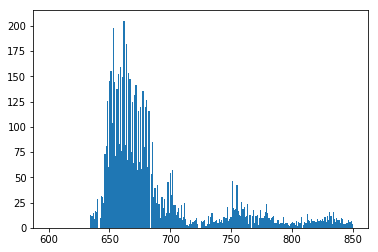

E:\MestradoData\p044\44_19_depth_191.yaml
19 191 E:\MestradoData\p044\44_19_depth_191.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_191.png (240, 320) (128, 128)


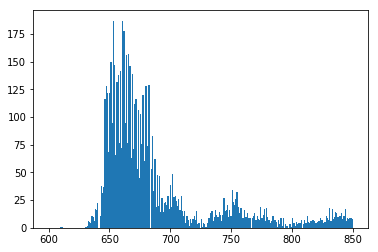

E:\MestradoData\p044\44_19_depth_201.yaml
19 201 E:\MestradoData\p044\44_19_depth_201.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_201.png (240, 320) (128, 128)


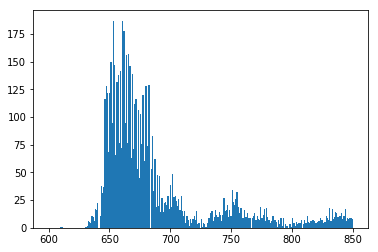

E:\MestradoData\p044\44_3_depth_211.yaml
3 211 E:\MestradoData\p044\44_3_depth_211.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_211.png (240, 320) (128, 128)


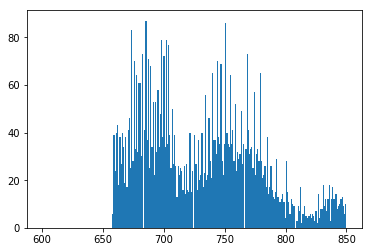

E:\MestradoData\p044\44_3_depth_221.yaml
3 221 E:\MestradoData\p044\44_3_depth_221.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_221.png (240, 320) (128, 128)


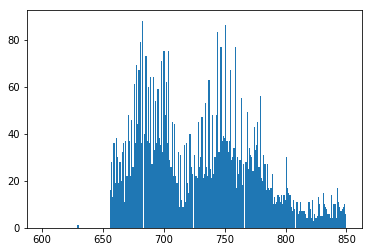

E:\MestradoData\p044\44_3_depth_231.yaml
3 231 E:\MestradoData\p044\44_3_depth_231.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_231.png (240, 320) (128, 128)


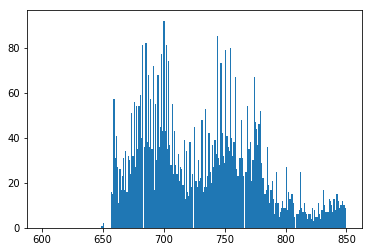

E:\MestradoData\p044\44_4_depth_211.yaml
4 211 E:\MestradoData\p044\44_4_depth_211.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_211.png (240, 320) (128, 128)


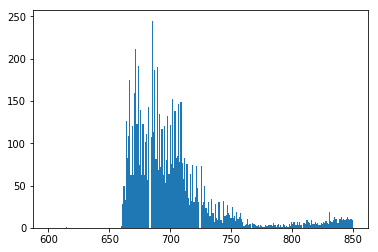

E:\MestradoData\p044\44_4_depth_221.yaml
4 221 E:\MestradoData\p044\44_4_depth_221.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_221.png (240, 320) (128, 128)


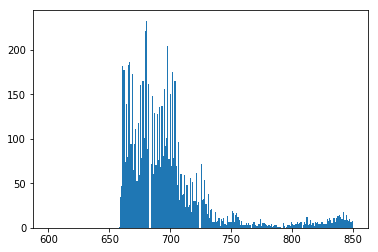

E:\MestradoData\p044\44_4_depth_231.yaml
4 231 E:\MestradoData\p044\44_4_depth_231.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_231.png (240, 320) (128, 128)


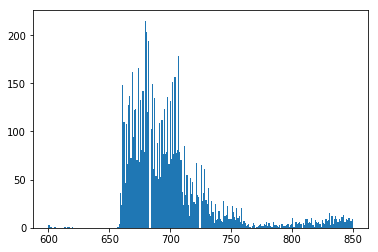

E:\MestradoData\p044\44_7_depth_211.yaml
7 211 E:\MestradoData\p044\44_7_depth_211.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_211.png (240, 320) (128, 128)


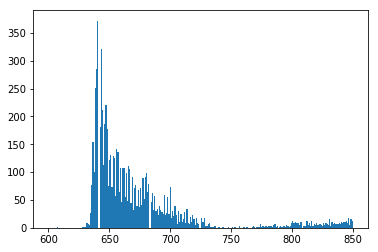

E:\MestradoData\p044\44_7_depth_221.yaml
7 221 E:\MestradoData\p044\44_7_depth_221.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_221.png (240, 320) (128, 128)


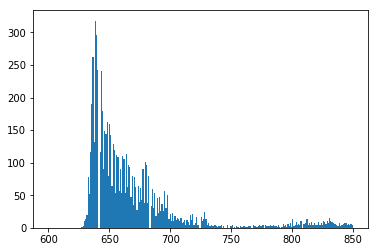

E:\MestradoData\p044\44_7_depth_231.yaml
7 231 E:\MestradoData\p044\44_7_depth_231.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_231.png (240, 320) (128, 128)


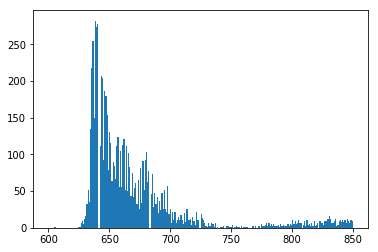

E:\MestradoData\p044\44_8_depth_211.yaml
8 211 E:\MestradoData\p044\44_8_depth_211.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_211.png (240, 320) (128, 128)


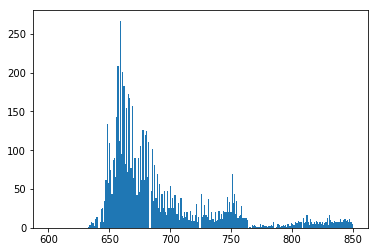

E:\MestradoData\p044\44_8_depth_221.yaml
8 221 E:\MestradoData\p044\44_8_depth_221.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_221.png (240, 320) (128, 128)


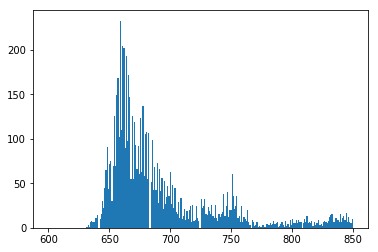

E:\MestradoData\p044\44_8_depth_231.yaml
8 231 E:\MestradoData\p044\44_8_depth_231.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_231.png (240, 320) (128, 128)


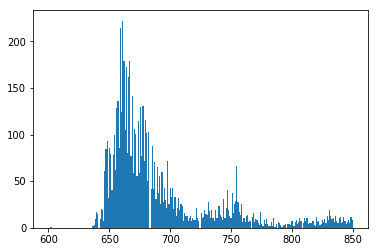

E:\MestradoData\p044\44_9_depth_211.yaml
9 211 E:\MestradoData\p044\44_9_depth_211.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_211.png (240, 320) (128, 128)


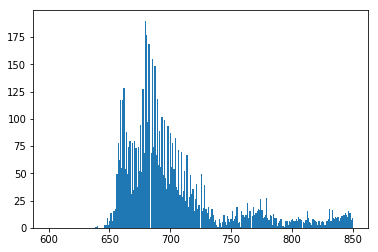

E:\MestradoData\p044\44_9_depth_221.yaml
9 221 E:\MestradoData\p044\44_9_depth_221.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_221.png (240, 320) (128, 128)


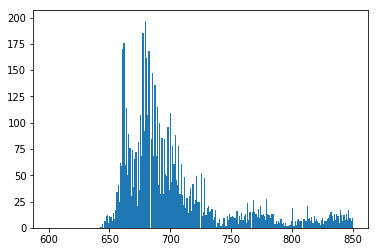

E:\MestradoData\p044\44_9_depth_231.yaml
9 231 E:\MestradoData\p044\44_9_depth_231.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_231.png (240, 320) (128, 128)


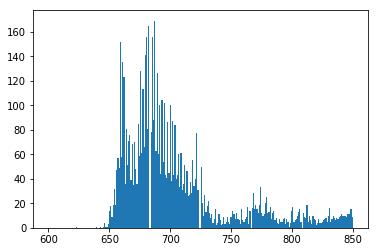

E:\MestradoData\p044\44_10_depth_211.yaml
10 211 E:\MestradoData\p044\44_10_depth_211.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_211.png (240, 320) (128, 128)


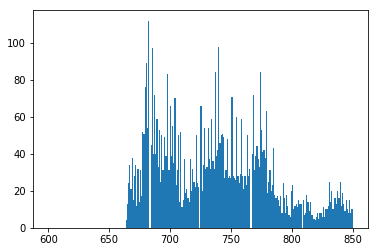

E:\MestradoData\p044\44_10_depth_221.yaml
10 221 E:\MestradoData\p044\44_10_depth_221.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_221.png (240, 320) (128, 128)


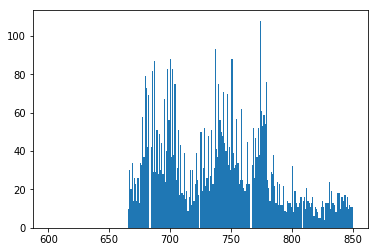

E:\MestradoData\p044\44_10_depth_231.yaml
10 231 E:\MestradoData\p044\44_10_depth_231.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_231.png (240, 320) (128, 128)


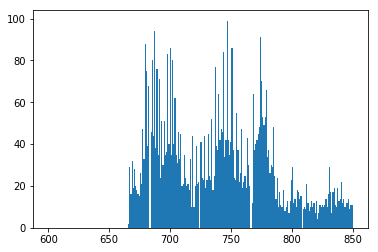

E:\MestradoData\p044\44_11_depth_211.yaml
11 211 E:\MestradoData\p044\44_11_depth_211.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_211.png (240, 320) (128, 128)


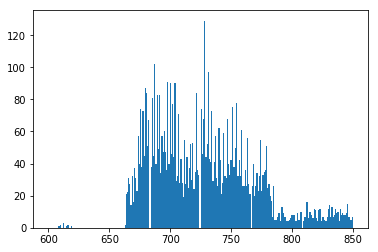

E:\MestradoData\p044\44_11_depth_221.yaml
11 221 E:\MestradoData\p044\44_11_depth_221.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_221.png (240, 320) (128, 128)


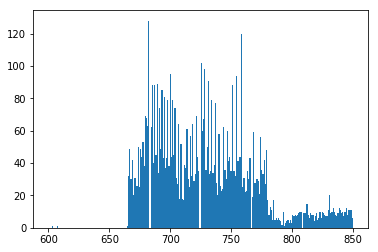

E:\MestradoData\p044\44_11_depth_231.yaml
11 231 E:\MestradoData\p044\44_11_depth_231.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_231.png (240, 320) (128, 128)


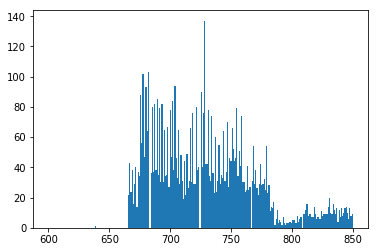

E:\MestradoData\p044\44_12_depth_211.yaml
12 211 E:\MestradoData\p044\44_12_depth_211.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_211.png (240, 320) (128, 128)


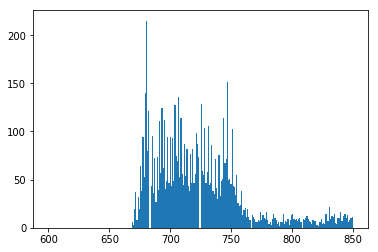

E:\MestradoData\p044\44_12_depth_221.yaml
12 221 E:\MestradoData\p044\44_12_depth_221.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_221.png (240, 320) (128, 128)


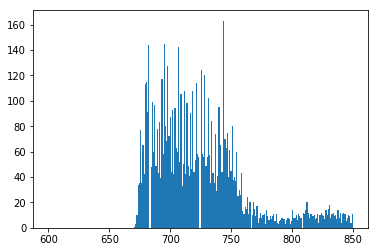

E:\MestradoData\p044\44_12_depth_231.yaml
12 231 E:\MestradoData\p044\44_12_depth_231.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_231.png (240, 320) (128, 128)


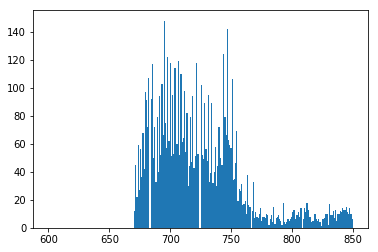

E:\MestradoData\p044\44_13_depth_211.yaml
13 211 E:\MestradoData\p044\44_13_depth_211.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_211.png (240, 320) (128, 128)


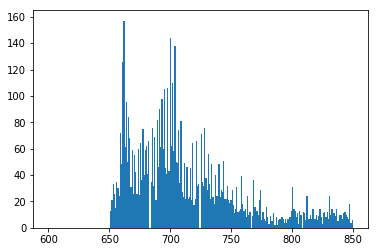

E:\MestradoData\p044\44_13_depth_221.yaml
13 221 E:\MestradoData\p044\44_13_depth_221.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_221.png (240, 320) (128, 128)


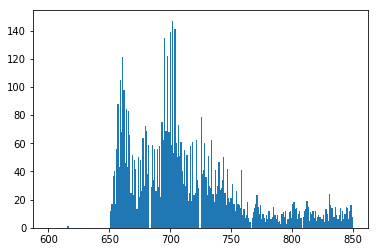

E:\MestradoData\p044\44_13_depth_231.yaml
13 231 E:\MestradoData\p044\44_13_depth_231.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_231.png (240, 320) (128, 128)


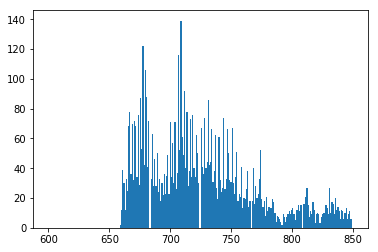

E:\MestradoData\p044\44_14_depth_211.yaml
14 211 E:\MestradoData\p044\44_14_depth_211.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_211.png (240, 320) (128, 128)


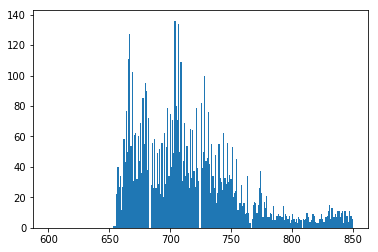

E:\MestradoData\p044\44_14_depth_221.yaml
14 221 E:\MestradoData\p044\44_14_depth_221.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_221.png (240, 320) (128, 128)


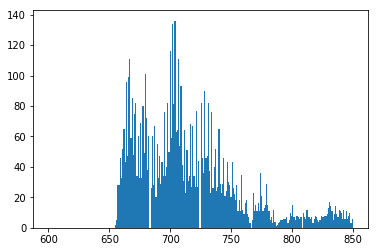

E:\MestradoData\p044\44_14_depth_231.yaml
14 231 E:\MestradoData\p044\44_14_depth_231.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_231.png (240, 320) (128, 128)


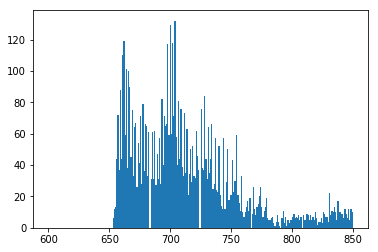

E:\MestradoData\p044\44_15_depth_211.yaml
15 211 E:\MestradoData\p044\44_15_depth_211.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_211.png (240, 320) (128, 128)


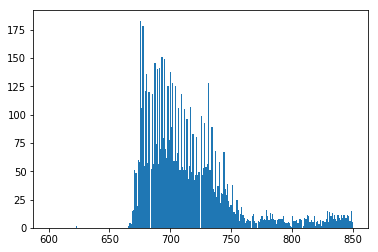

E:\MestradoData\p044\44_15_depth_221.yaml
15 221 E:\MestradoData\p044\44_15_depth_221.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_221.png (240, 320) (128, 128)


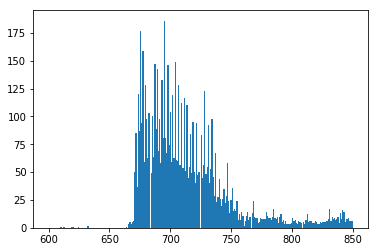

E:\MestradoData\p044\44_15_depth_231.yaml
15 231 E:\MestradoData\p044\44_15_depth_231.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_231.png (240, 320) (128, 128)


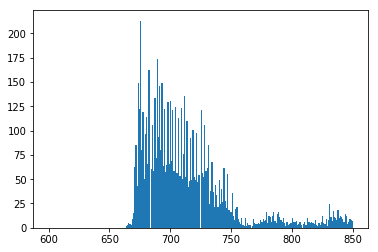

E:\MestradoData\p044\44_16_depth_211.yaml
16 211 E:\MestradoData\p044\44_16_depth_211.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_211.png (240, 320) (128, 128)


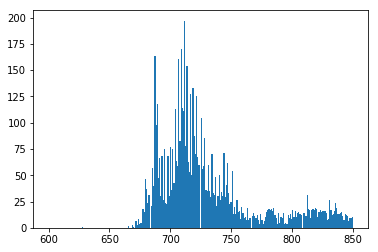

E:\MestradoData\p044\44_16_depth_221.yaml
16 221 E:\MestradoData\p044\44_16_depth_221.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_221.png (240, 320) (128, 128)


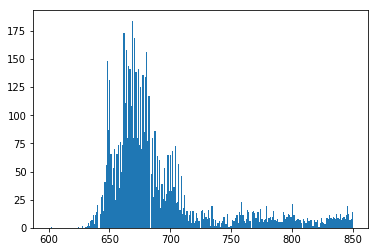

E:\MestradoData\p044\44_16_depth_231.yaml
16 231 E:\MestradoData\p044\44_16_depth_231.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_231.png (240, 320) (128, 128)


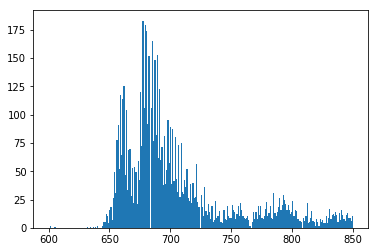

E:\MestradoData\p044\44_17_depth_211.yaml
17 211 E:\MestradoData\p044\44_17_depth_211.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_211.png (240, 320) (128, 128)


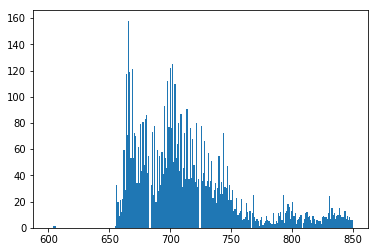

E:\MestradoData\p044\44_17_depth_221.yaml
17 221 E:\MestradoData\p044\44_17_depth_221.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_221.png (240, 320) (128, 128)


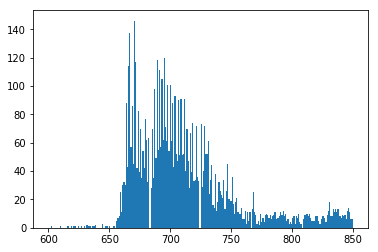

E:\MestradoData\p044\44_17_depth_231.yaml
17 231 E:\MestradoData\p044\44_17_depth_231.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_231.png (240, 320) (128, 128)


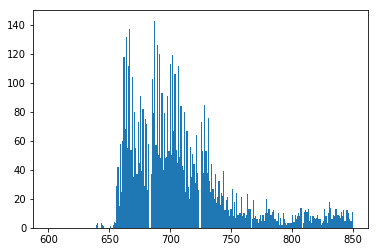

E:\MestradoData\p044\44_18_depth_211.yaml
18 211 E:\MestradoData\p044\44_18_depth_211.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_211.png (240, 320) (128, 128)


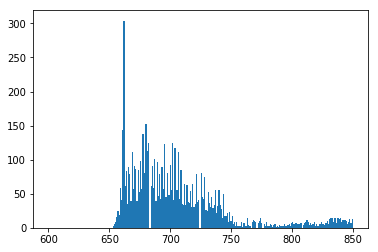

E:\MestradoData\p044\44_18_depth_221.yaml
18 221 E:\MestradoData\p044\44_18_depth_221.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_221.png (240, 320) (128, 128)


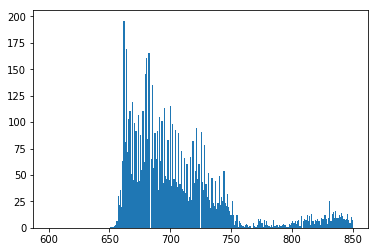

E:\MestradoData\p044\44_18_depth_231.yaml
18 231 E:\MestradoData\p044\44_18_depth_231.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_231.png (240, 320) (128, 128)


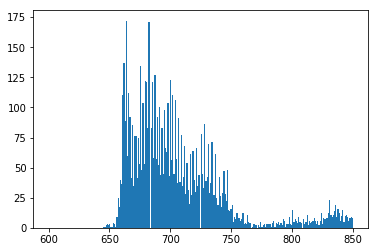

E:\MestradoData\p044\44_19_depth_211.yaml
19 211 E:\MestradoData\p044\44_19_depth_211.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_211.png (240, 320) (128, 128)


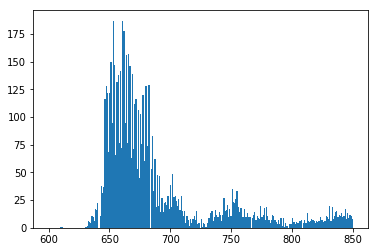

E:\MestradoData\p044\44_19_depth_221.yaml
19 221 E:\MestradoData\p044\44_19_depth_221.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_221.png (240, 320) (128, 128)


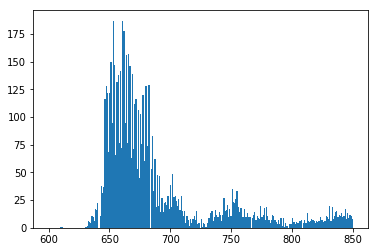

E:\MestradoData\p044\44_19_depth_231.yaml
19 231 E:\MestradoData\p044\44_19_depth_231.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_231.png (240, 320) (128, 128)


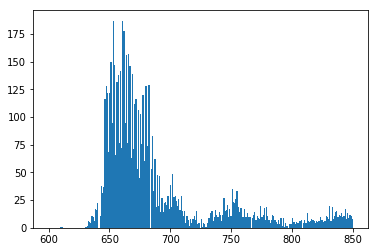

E:\MestradoData\p044\44_3_depth_241.yaml
3 241 E:\MestradoData\p044\44_3_depth_241.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_241.png (240, 320) (128, 128)


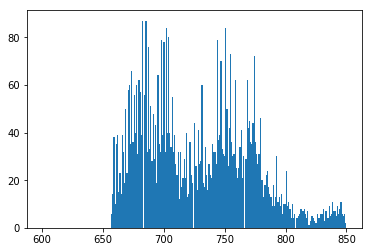

E:\MestradoData\p044\44_3_depth_251.yaml
3 251 E:\MestradoData\p044\44_3_depth_251.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_251.png (240, 320) (128, 128)


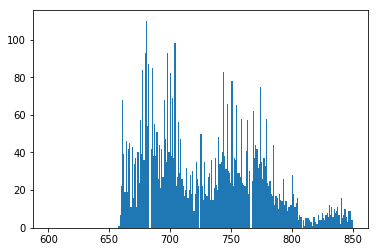

E:\MestradoData\p044\44_3_depth_261.yaml
3 261 E:\MestradoData\p044\44_3_depth_261.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_261.png (240, 320) (128, 128)


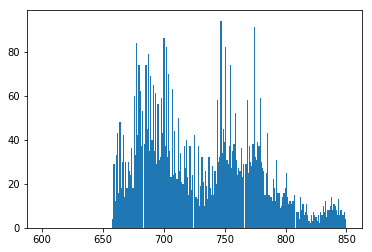

E:\MestradoData\p044\44_4_depth_241.yaml
4 241 E:\MestradoData\p044\44_4_depth_241.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_241.png (240, 320) (128, 128)


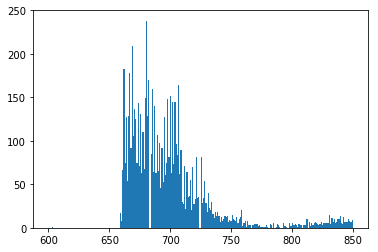

E:\MestradoData\p044\44_4_depth_251.yaml
4 251 E:\MestradoData\p044\44_4_depth_251.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_251.png (240, 320) (128, 128)


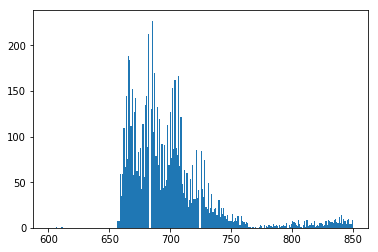

E:\MestradoData\p044\44_4_depth_261.yaml
4 261 E:\MestradoData\p044\44_4_depth_261.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_261.png (240, 320) (128, 128)


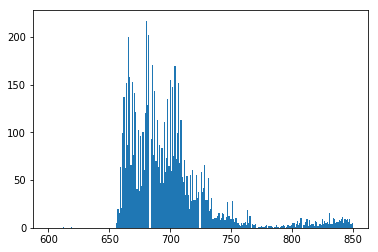

E:\MestradoData\p044\44_7_depth_241.yaml
7 241 E:\MestradoData\p044\44_7_depth_241.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_241.png (240, 320) (128, 128)


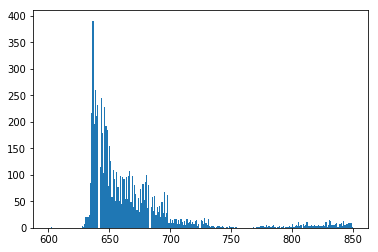

E:\MestradoData\p044\44_7_depth_251.yaml
7 251 E:\MestradoData\p044\44_7_depth_251.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_251.png (240, 320) (128, 128)


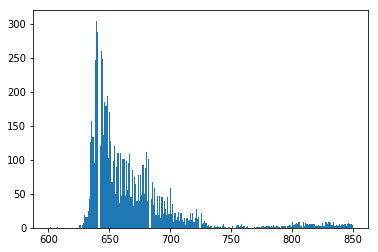

E:\MestradoData\p044\44_7_depth_261.yaml
7 261 E:\MestradoData\p044\44_7_depth_261.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_261.png (240, 320) (128, 128)


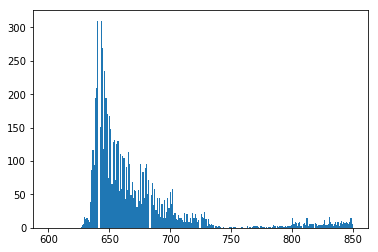

E:\MestradoData\p044\44_8_depth_241.yaml
8 241 E:\MestradoData\p044\44_8_depth_241.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_241.png (240, 320) (128, 128)


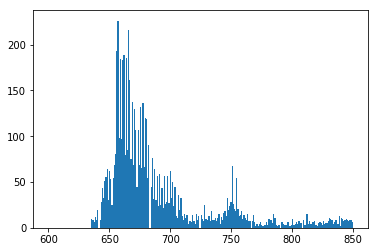

E:\MestradoData\p044\44_8_depth_251.yaml
8 251 E:\MestradoData\p044\44_8_depth_251.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_251.png (240, 320) (128, 128)


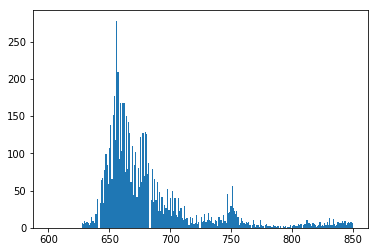

E:\MestradoData\p044\44_8_depth_261.yaml
8 261 E:\MestradoData\p044\44_8_depth_261.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_261.png (240, 320) (128, 128)


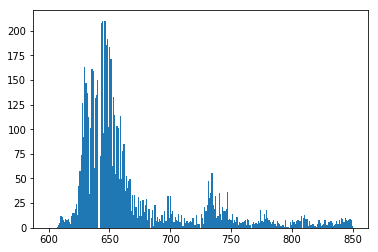

E:\MestradoData\p044\44_9_depth_241.yaml
9 241 E:\MestradoData\p044\44_9_depth_241.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_241.png (240, 320) (128, 128)


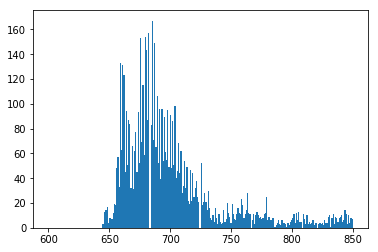

E:\MestradoData\p044\44_9_depth_251.yaml
9 251 E:\MestradoData\p044\44_9_depth_251.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_251.png (240, 320) (128, 128)


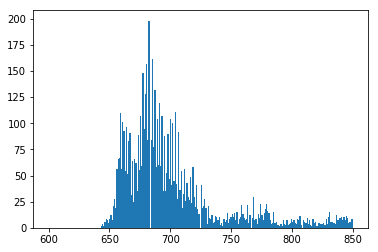

E:\MestradoData\p044\44_9_depth_261.yaml
9 261 E:\MestradoData\p044\44_9_depth_261.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_261.png (240, 320) (128, 128)


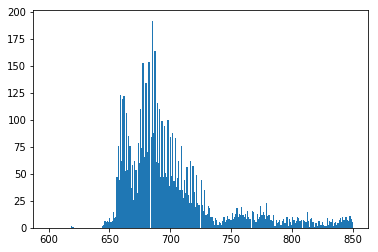

E:\MestradoData\p044\44_10_depth_241.yaml
10 241 E:\MestradoData\p044\44_10_depth_241.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_241.png (240, 320) (128, 128)


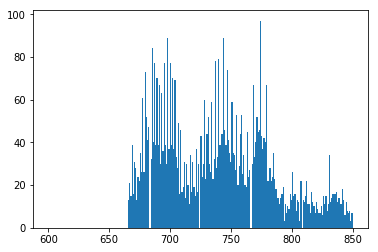

E:\MestradoData\p044\44_10_depth_251.yaml
10 251 E:\MestradoData\p044\44_10_depth_251.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_251.png (240, 320) (128, 128)


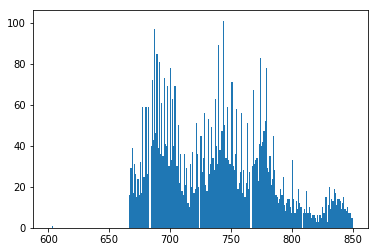

E:\MestradoData\p044\44_10_depth_261.yaml
10 261 E:\MestradoData\p044\44_10_depth_261.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_261.png (240, 320) (128, 128)


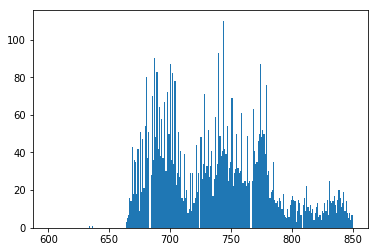

E:\MestradoData\p044\44_11_depth_241.yaml
11 241 E:\MestradoData\p044\44_11_depth_241.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_241.png (240, 320) (128, 128)


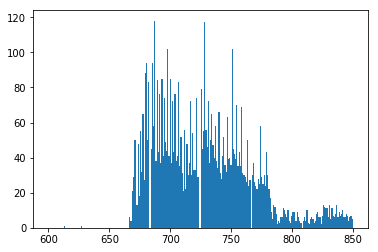

E:\MestradoData\p044\44_11_depth_251.yaml
11 251 E:\MestradoData\p044\44_11_depth_251.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_251.png (240, 320) (128, 128)


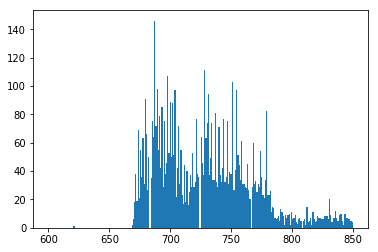

E:\MestradoData\p044\44_11_depth_261.yaml
11 261 E:\MestradoData\p044\44_11_depth_261.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_261.png (240, 320) (128, 128)


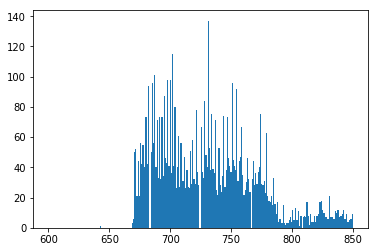

E:\MestradoData\p044\44_12_depth_241.yaml
12 241 E:\MestradoData\p044\44_12_depth_241.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_241.png (240, 320) (128, 128)


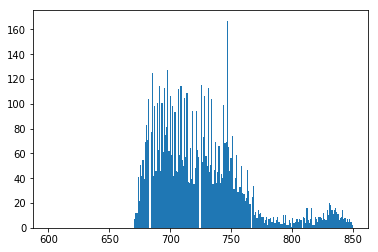

E:\MestradoData\p044\44_12_depth_251.yaml
12 251 E:\MestradoData\p044\44_12_depth_251.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_251.png (240, 320) (128, 128)


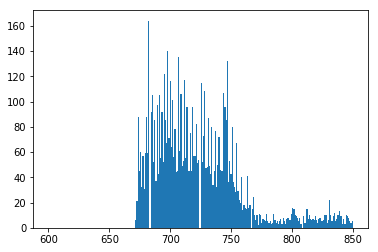

E:\MestradoData\p044\44_12_depth_261.yaml
12 261 E:\MestradoData\p044\44_12_depth_261.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_261.png (240, 320) (128, 128)


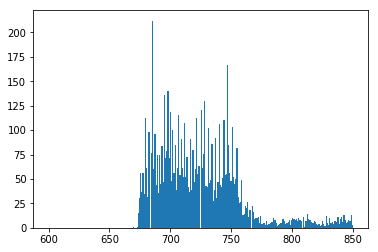

E:\MestradoData\p044\44_13_depth_241.yaml
13 241 E:\MestradoData\p044\44_13_depth_241.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_241.png (240, 320) (128, 128)


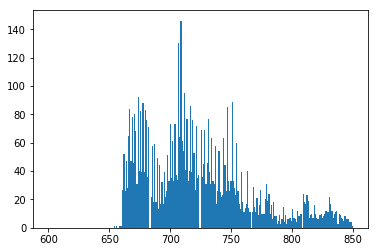

E:\MestradoData\p044\44_13_depth_251.yaml
13 251 E:\MestradoData\p044\44_13_depth_251.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_251.png (240, 320) (128, 128)


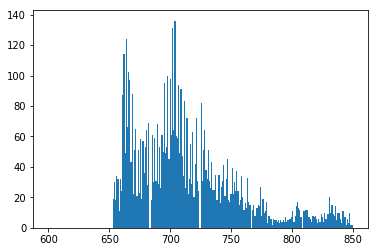

E:\MestradoData\p044\44_13_depth_261.yaml
13 261 E:\MestradoData\p044\44_13_depth_261.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_261.png (240, 320) (128, 128)


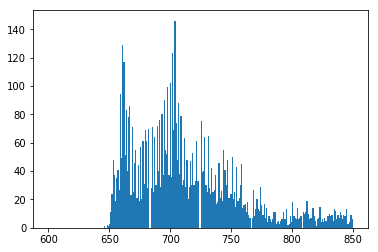

E:\MestradoData\p044\44_14_depth_241.yaml
14 241 E:\MestradoData\p044\44_14_depth_241.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_241.png (240, 320) (128, 128)


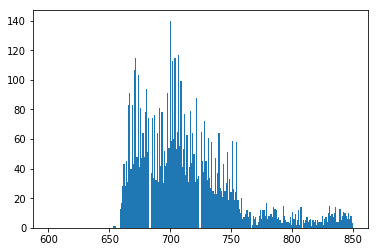

E:\MestradoData\p044\44_14_depth_251.yaml
14 251 E:\MestradoData\p044\44_14_depth_251.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_251.png (240, 320) (128, 128)


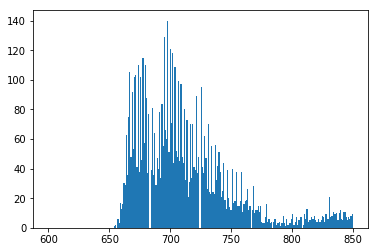

E:\MestradoData\p044\44_14_depth_261.yaml
14 261 E:\MestradoData\p044\44_14_depth_261.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_261.png (240, 320) (128, 128)


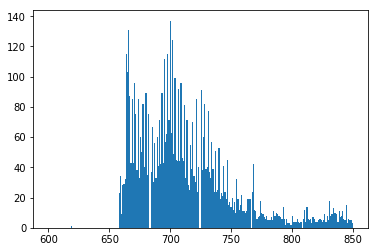

E:\MestradoData\p044\44_15_depth_241.yaml
15 241 E:\MestradoData\p044\44_15_depth_241.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_241.png (240, 320) (128, 128)


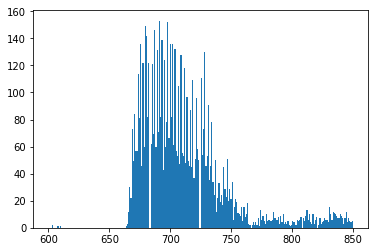

E:\MestradoData\p044\44_15_depth_251.yaml
15 251 E:\MestradoData\p044\44_15_depth_251.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_251.png (240, 320) (128, 128)


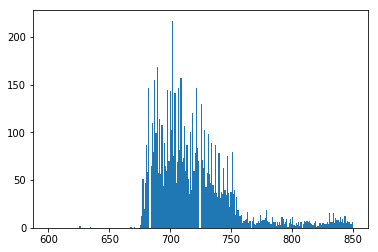

E:\MestradoData\p044\44_15_depth_261.yaml
15 261 E:\MestradoData\p044\44_15_depth_261.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_261.png (240, 320) (128, 128)


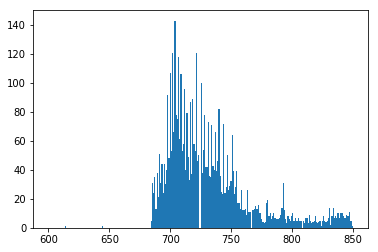

E:\MestradoData\p044\44_16_depth_241.yaml
16 241 E:\MestradoData\p044\44_16_depth_241.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_241.png (240, 320) (128, 128)


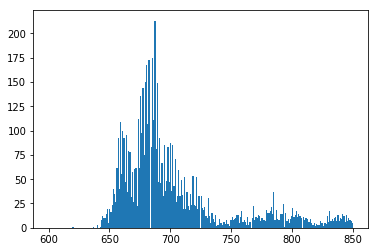

E:\MestradoData\p044\44_16_depth_251.yaml
16 251 E:\MestradoData\p044\44_16_depth_251.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_251.png (240, 320) (128, 128)


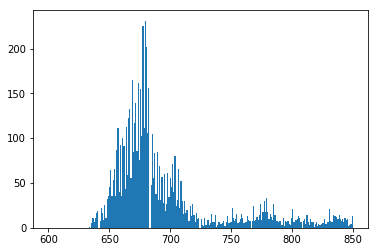

E:\MestradoData\p044\44_16_depth_261.yaml
16 261 E:\MestradoData\p044\44_16_depth_261.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_261.png (240, 320) (128, 128)


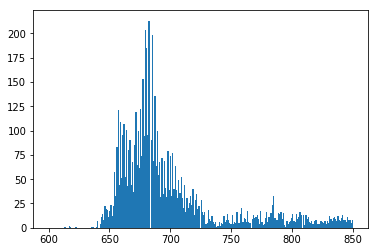

E:\MestradoData\p044\44_17_depth_241.yaml
17 241 E:\MestradoData\p044\44_17_depth_241.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_241.png (240, 320) (128, 128)


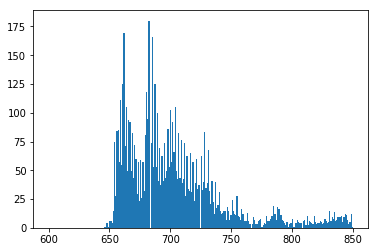

E:\MestradoData\p044\44_17_depth_251.yaml
17 251 E:\MestradoData\p044\44_17_depth_251.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_251.png (240, 320) (128, 128)


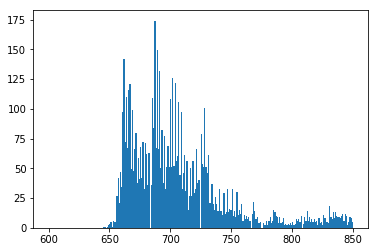

E:\MestradoData\p044\44_17_depth_261.yaml
17 261 E:\MestradoData\p044\44_17_depth_261.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_261.png (240, 320) (128, 128)


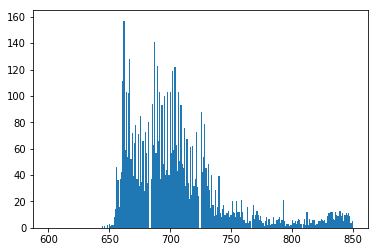

E:\MestradoData\p044\44_18_depth_241.yaml
18 241 E:\MestradoData\p044\44_18_depth_241.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_241.png (240, 320) (128, 128)


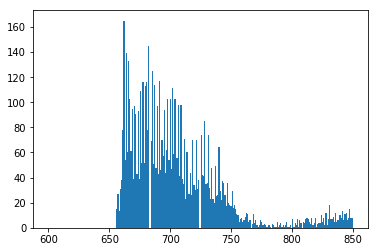

E:\MestradoData\p044\44_18_depth_251.yaml
18 251 E:\MestradoData\p044\44_18_depth_251.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_251.png (240, 320) (128, 128)


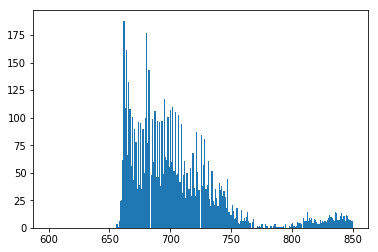

E:\MestradoData\p044\44_18_depth_261.yaml
18 261 E:\MestradoData\p044\44_18_depth_261.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_261.png (240, 320) (128, 128)


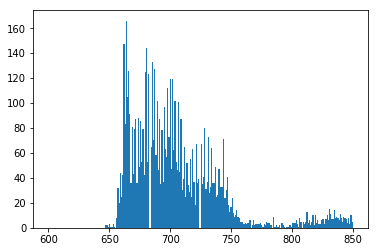

E:\MestradoData\p044\44_19_depth_241.yaml
19 241 E:\MestradoData\p044\44_19_depth_241.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_241.png (240, 320) (128, 128)


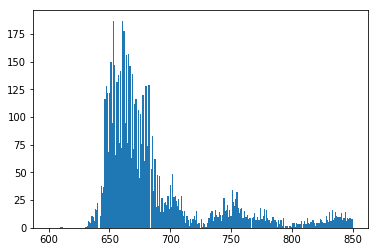

E:\MestradoData\p044\44_19_depth_251.yaml
19 251 E:\MestradoData\p044\44_19_depth_251.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_251.png (240, 320) (128, 128)


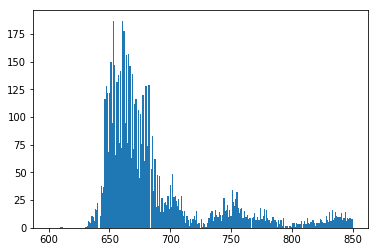

E:\MestradoData\p044\44_19_depth_261.yaml
19 261 E:\MestradoData\p044\44_19_depth_261.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_261.png (240, 320) (128, 128)


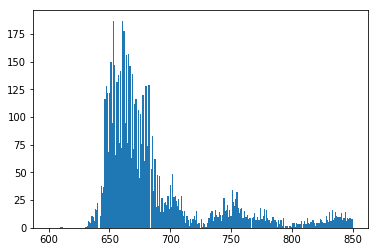

E:\MestradoData\p044\44_3_depth_271.yaml
3 271 E:\MestradoData\p044\44_3_depth_271.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_271.png (240, 320) (128, 128)


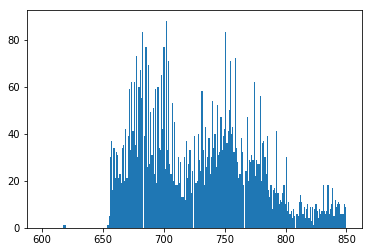

E:\MestradoData\p044\44_3_depth_281.yaml
3 281 E:\MestradoData\p044\44_3_depth_281.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_281.png (240, 320) (128, 128)


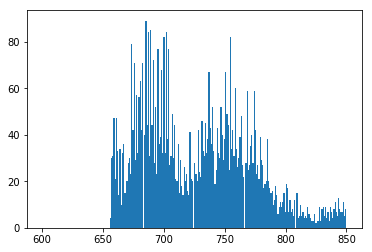

E:\MestradoData\p044\44_3_depth_291.yaml
3 291 E:\MestradoData\p044\44_3_depth_291.yaml depth E:\MestradoData\preprocessed\03\44_3_depth_291.png (240, 320) (128, 128)


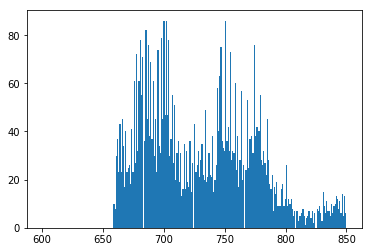

E:\MestradoData\p044\44_4_depth_271.yaml
4 271 E:\MestradoData\p044\44_4_depth_271.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_271.png (240, 320) (128, 128)


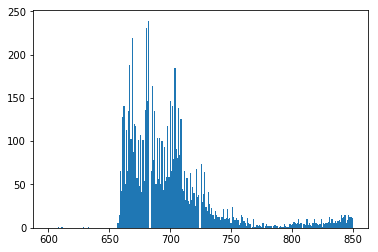

E:\MestradoData\p044\44_4_depth_281.yaml
4 281 E:\MestradoData\p044\44_4_depth_281.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_281.png (240, 320) (128, 128)


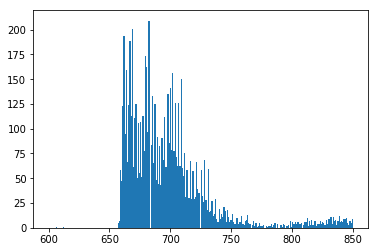

E:\MestradoData\p044\44_4_depth_291.yaml
4 291 E:\MestradoData\p044\44_4_depth_291.yaml depth E:\MestradoData\preprocessed\04\44_4_depth_291.png (240, 320) (128, 128)


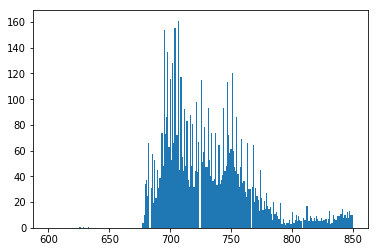

E:\MestradoData\p044\44_7_depth_271.yaml
7 271 E:\MestradoData\p044\44_7_depth_271.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_271.png (240, 320) (128, 128)


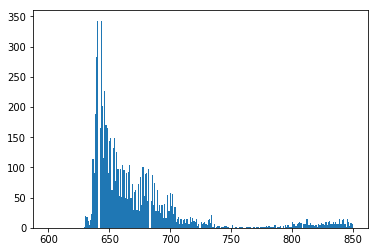

E:\MestradoData\p044\44_7_depth_281.yaml
7 281 E:\MestradoData\p044\44_7_depth_281.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_281.png (240, 320) (128, 128)


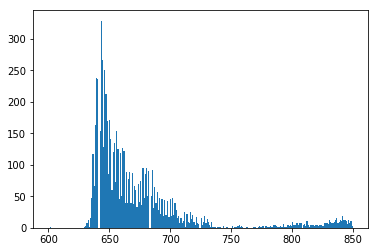

E:\MestradoData\p044\44_7_depth_291.yaml
7 291 E:\MestradoData\p044\44_7_depth_291.yaml depth E:\MestradoData\preprocessed\07\44_7_depth_291.png (240, 320) (128, 128)


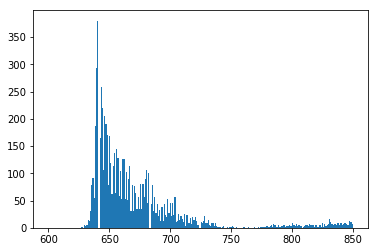

E:\MestradoData\p044\44_8_depth_271.yaml
8 271 E:\MestradoData\p044\44_8_depth_271.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_271.png (240, 320) (128, 128)


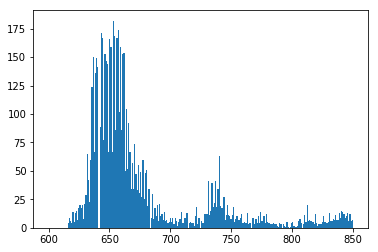

E:\MestradoData\p044\44_8_depth_281.yaml
8 281 E:\MestradoData\p044\44_8_depth_281.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_281.png (240, 320) (128, 128)


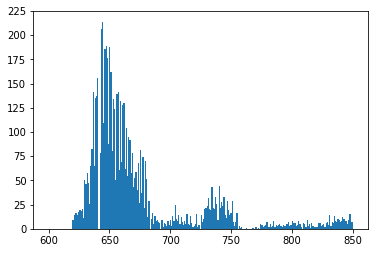

E:\MestradoData\p044\44_8_depth_291.yaml
8 291 E:\MestradoData\p044\44_8_depth_291.yaml depth E:\MestradoData\preprocessed\08\44_8_depth_291.png (240, 320) (128, 128)


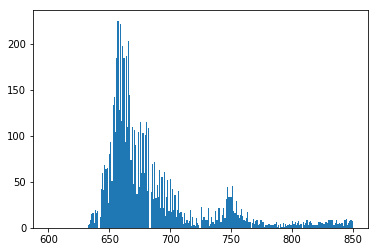

E:\MestradoData\p044\44_9_depth_271.yaml
9 271 E:\MestradoData\p044\44_9_depth_271.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_271.png (240, 320) (128, 128)


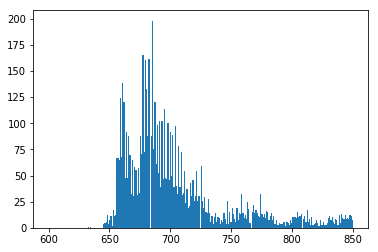

E:\MestradoData\p044\44_9_depth_281.yaml
9 281 E:\MestradoData\p044\44_9_depth_281.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_281.png (240, 320) (128, 128)


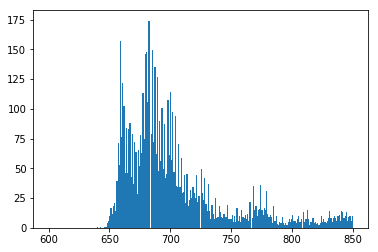

E:\MestradoData\p044\44_9_depth_291.yaml
9 291 E:\MestradoData\p044\44_9_depth_291.yaml depth E:\MestradoData\preprocessed\09\44_9_depth_291.png (240, 320) (128, 128)


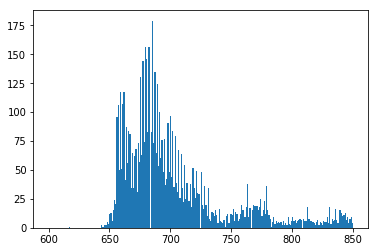

E:\MestradoData\p044\44_10_depth_271.yaml
10 271 E:\MestradoData\p044\44_10_depth_271.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_271.png (240, 320) (128, 128)


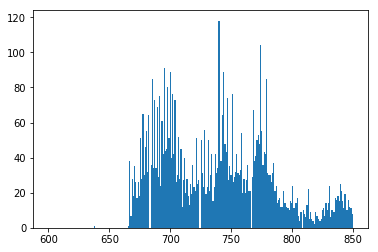

E:\MestradoData\p044\44_10_depth_281.yaml
10 281 E:\MestradoData\p044\44_10_depth_281.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_281.png (240, 320) (128, 128)


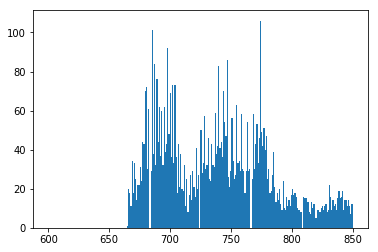

E:\MestradoData\p044\44_10_depth_291.yaml
10 291 E:\MestradoData\p044\44_10_depth_291.yaml depth E:\MestradoData\preprocessed\10\44_10_depth_291.png (240, 320) (128, 128)


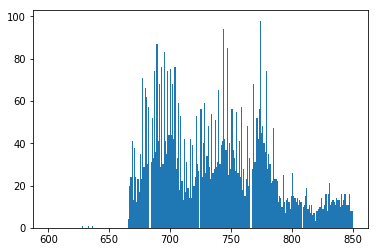

E:\MestradoData\p044\44_11_depth_271.yaml
11 271 E:\MestradoData\p044\44_11_depth_271.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_271.png (240, 320) (128, 128)


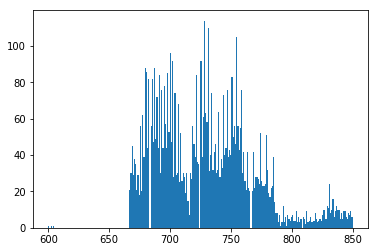

E:\MestradoData\p044\44_11_depth_281.yaml
11 281 E:\MestradoData\p044\44_11_depth_281.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_281.png (240, 320) (128, 128)


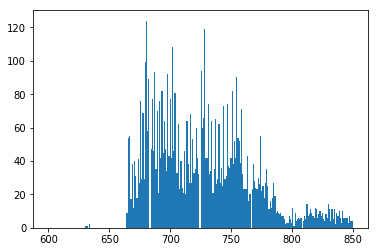

E:\MestradoData\p044\44_11_depth_291.yaml
11 291 E:\MestradoData\p044\44_11_depth_291.yaml depth E:\MestradoData\preprocessed\11\44_11_depth_291.png (240, 320) (128, 128)


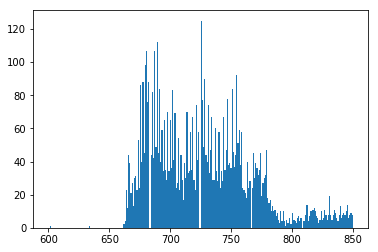

E:\MestradoData\p044\44_12_depth_271.yaml
12 271 E:\MestradoData\p044\44_12_depth_271.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_271.png (240, 320) (128, 128)


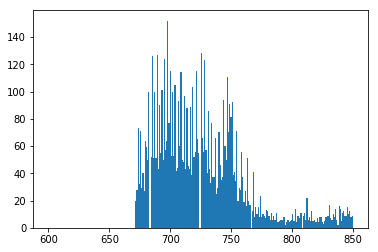

E:\MestradoData\p044\44_12_depth_281.yaml
12 281 E:\MestradoData\p044\44_12_depth_281.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_281.png (240, 320) (128, 128)


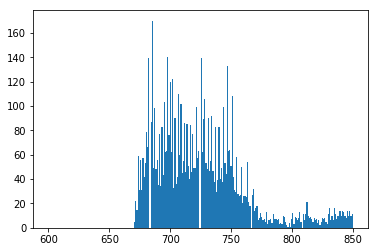

E:\MestradoData\p044\44_12_depth_291.yaml
12 291 E:\MestradoData\p044\44_12_depth_291.yaml depth E:\MestradoData\preprocessed\12\44_12_depth_291.png (240, 320) (128, 128)


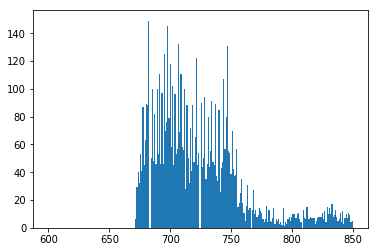

E:\MestradoData\p044\44_13_depth_271.yaml
13 271 E:\MestradoData\p044\44_13_depth_271.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_271.png (240, 320) (128, 128)


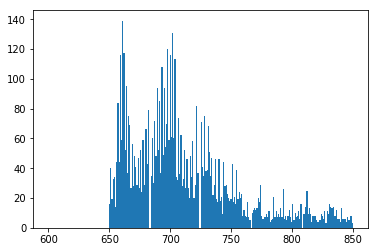

E:\MestradoData\p044\44_13_depth_281.yaml
13 281 E:\MestradoData\p044\44_13_depth_281.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_281.png (240, 320) (128, 128)


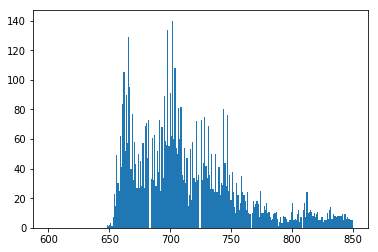

E:\MestradoData\p044\44_13_depth_291.yaml
13 291 E:\MestradoData\p044\44_13_depth_291.yaml depth E:\MestradoData\preprocessed\13\44_13_depth_291.png (240, 320) (128, 128)


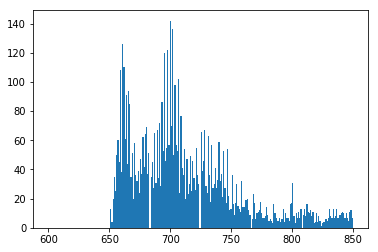

E:\MestradoData\p044\44_14_depth_271.yaml
14 271 E:\MestradoData\p044\44_14_depth_271.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_271.png (240, 320) (128, 128)


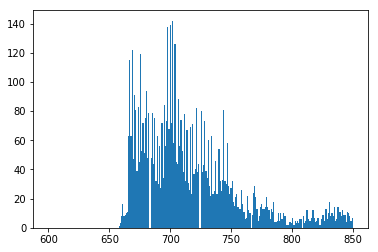

E:\MestradoData\p044\44_14_depth_281.yaml
14 281 E:\MestradoData\p044\44_14_depth_281.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_281.png (240, 320) (128, 128)


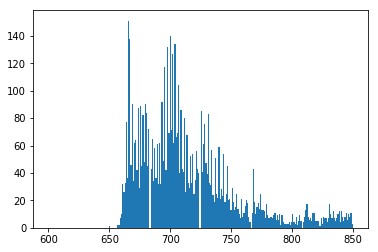

E:\MestradoData\p044\44_14_depth_291.yaml
14 291 E:\MestradoData\p044\44_14_depth_291.yaml depth E:\MestradoData\preprocessed\14\44_14_depth_291.png (240, 320) (128, 128)


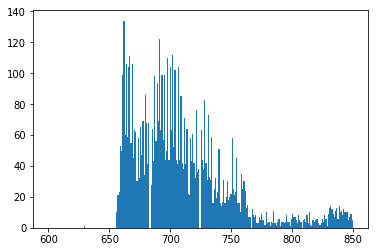

E:\MestradoData\p044\44_15_depth_271.yaml
15 271 E:\MestradoData\p044\44_15_depth_271.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_271.png (240, 320) (128, 128)


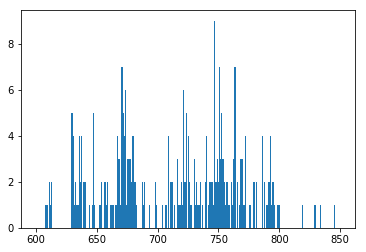

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: E:\MestradoData\preprocessed\15\44_15_depth_271.png is a low contrast image
  warn('%s is a low contrast image' % fname)


E:\MestradoData\p044\44_15_depth_281.yaml
15 281 E:\MestradoData\p044\44_15_depth_281.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_281.png (240, 320) (128, 128)


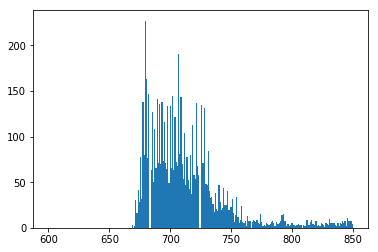

E:\MestradoData\p044\44_15_depth_291.yaml
15 291 E:\MestradoData\p044\44_15_depth_291.yaml depth E:\MestradoData\preprocessed\15\44_15_depth_291.png (240, 320) (128, 128)


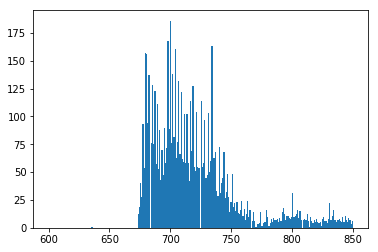

E:\MestradoData\p044\44_16_depth_271.yaml
16 271 E:\MestradoData\p044\44_16_depth_271.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_271.png (240, 320) (128, 128)


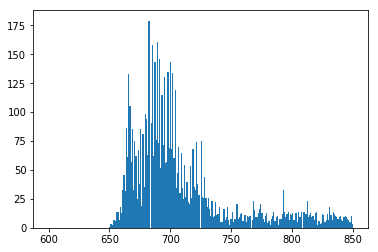

E:\MestradoData\p044\44_16_depth_281.yaml
16 281 E:\MestradoData\p044\44_16_depth_281.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_281.png (240, 320) (128, 128)


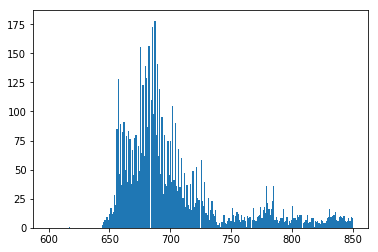

E:\MestradoData\p044\44_16_depth_291.yaml
16 291 E:\MestradoData\p044\44_16_depth_291.yaml depth E:\MestradoData\preprocessed\16\44_16_depth_291.png (240, 320) (128, 128)


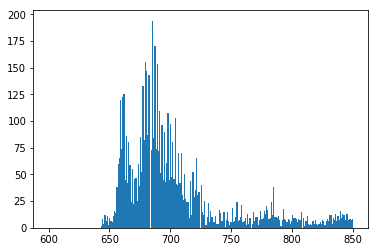

E:\MestradoData\p044\44_17_depth_271.yaml
17 271 E:\MestradoData\p044\44_17_depth_271.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_271.png (240, 320) (128, 128)


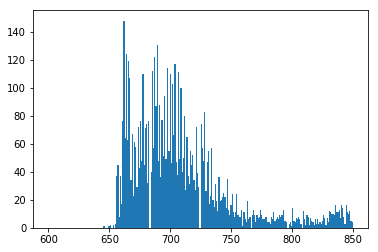

E:\MestradoData\p044\44_17_depth_281.yaml
17 281 E:\MestradoData\p044\44_17_depth_281.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_281.png (240, 320) (128, 128)


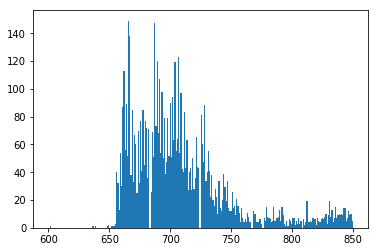

E:\MestradoData\p044\44_17_depth_291.yaml
17 291 E:\MestradoData\p044\44_17_depth_291.yaml depth E:\MestradoData\preprocessed\17\44_17_depth_291.png (240, 320) (128, 128)


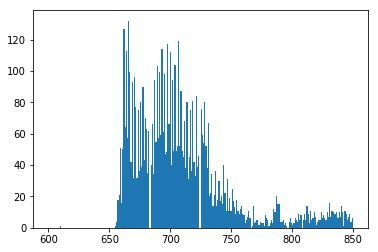

E:\MestradoData\p044\44_18_depth_271.yaml
18 271 E:\MestradoData\p044\44_18_depth_271.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_271.png (240, 320) (128, 128)


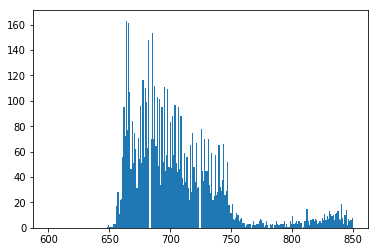

E:\MestradoData\p044\44_18_depth_281.yaml
18 281 E:\MestradoData\p044\44_18_depth_281.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_281.png (240, 320) (128, 128)


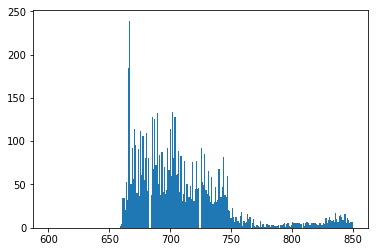

E:\MestradoData\p044\44_18_depth_291.yaml
18 291 E:\MestradoData\p044\44_18_depth_291.yaml depth E:\MestradoData\preprocessed\18\44_18_depth_291.png (240, 320) (128, 128)


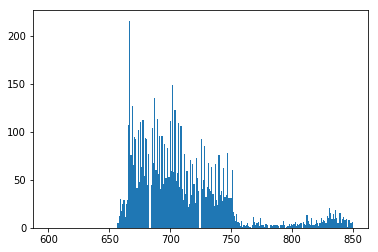

E:\MestradoData\p044\44_19_depth_271.yaml
19 271 E:\MestradoData\p044\44_19_depth_271.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_271.png (240, 320) (128, 128)


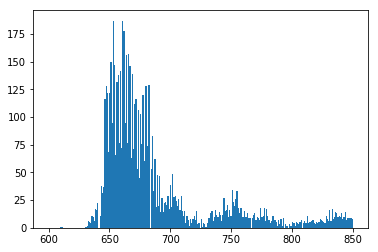

E:\MestradoData\p044\44_19_depth_281.yaml
19 281 E:\MestradoData\p044\44_19_depth_281.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_281.png (240, 320) (128, 128)


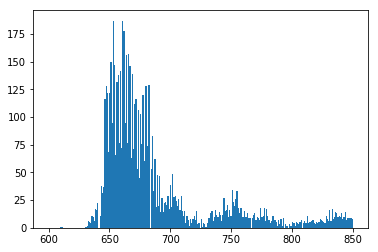

E:\MestradoData\p044\44_19_depth_291.yaml
19 291 E:\MestradoData\p044\44_19_depth_291.yaml depth E:\MestradoData\preprocessed\19\44_19_depth_291.png (240, 320) (128, 128)


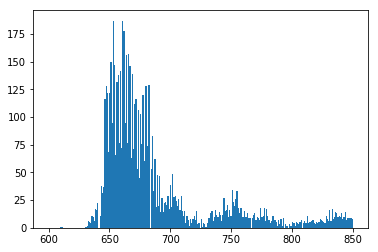

6106.062079604938


In [18]:
tic = time.clock()
for c in classes:
    for p in persons:
        for findex in range(1,301,30):
            pattern = prefix + p[0] + '\\' + p[1] +'_'+ str(c) + '_' + type_file + '_' + str(findex) + '.txt'
            #print(pattern)
            files_list = glob.glob(pattern)
            try:
                if len(files_list) == 1:
                    vertices = read_vertices(files_list[0])
                    middle = [int(vertices[0][0]+(vertices[2][0]-vertices[0][0])/2), 
                              int(vertices[0][1]+(vertices[2][1]-vertices[0][1])/2)]
                    #print (files_list[0], vertices, middle)
                    for c_r in same_crop_rect[c]:
                        for i in range(findex, findex+30, 10):
                            img_type = 'depth'
                            crop_file = prefix + p[0] + '\\' + p[1] +'_'+ str(c_r) + '_' + img_type + '_' + str(i) + '.yaml'
                            #print(c_r, i, crop_file, img_type)
                            #img = cv2.imread(crop_file,0)
                            img = read_yaml_depth(crop_file)
                            if not img is None:
                                save_file = prepro_data + "{:02d}".format(c_r) + '\\' + p[1] +'_'+ str(c_r) + '_' + img_type + '_' + str(i) + '.png'
                                #print(save_file, img.shape)
                                img_crop = img[(middle[1]+shift_img[img_type][1]-pad):(middle[1]+shift_img[img_type][1]+pad),
                                               (middle[0]+shift_img[img_type][0]-pad):(middle[0]+shift_img[img_type][0]+pad)]                                    
                                print(c_r, i, crop_file, img_type, save_file, img.shape, img_crop.shape)
                                
                                plt.hist(img_crop.ravel(),256,[600,850])
                                plt.show()
                                
                                img_crop[img_crop > 765] = 0
                                img_rescale = exposure.equalize_hist(img_crop)
                                
                                #plt.imshow(img_rescale)
                                #plt.show()
                                
                                io.imsave(save_file,img_rescale)
            except Exception as ex:
                print(ex)
print(time.clock() - tic)

NameError: name 'depr' is not defined